        ANÁLISIS DE REGRESIÓN LINEAL - GOLES DE FÚTBOL
n=6 | α=0.05 | X=Goles anotados (X) | Y=Goles recibidos (Y)

--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---
X: μ=38.67, σ=8.59, rango=[27, 50]
Y: μ=31.17, σ=6.11, rango=[22, 39]

Normalidad (Shapiro-Wilk):
  X: p=0.9283 ✓ Normal
  Y: p=0.9500 ✓ Normal

Correlación: Pearson=-0.4365 | Spearman=-0.4286
Magnitud: Moderada | Dirección: Negativa

--- PRUEBA DE CORRELACIÓN ---
H₀: ρ=0 vs H₁: ρ≠0 | t=-0.970, t_crit=±2.776, p=0.3868
Decisión: ✗ No rechazar H₀

--- MODELO DE REGRESIÓN ---
Ecuación: Ŷ = 43.1715 + -0.3105X
  b₀ (intersección): 43.1715 → Goles recibidos base
  b₁ (pendiente): -0.3105 → Por cada gol anotado adicional, cambio en goles recibidos

Bondad de ajuste:
  R² = 0.1905 (19.1% variabilidad explicada)
  Error estándar (s_y,x) = 6.1488

--- PRUEBAS DE SIGNIFICANCIA (α=0.05) ---
1. Pendiente: H₀: β=0 vs H₁: β≠0
   t=-0.970, t_crit=±2.776, p=0.3868
   → ✗ Pendiente NO significativa

2. Modelo (ANOVA): H₀: modelo no significat

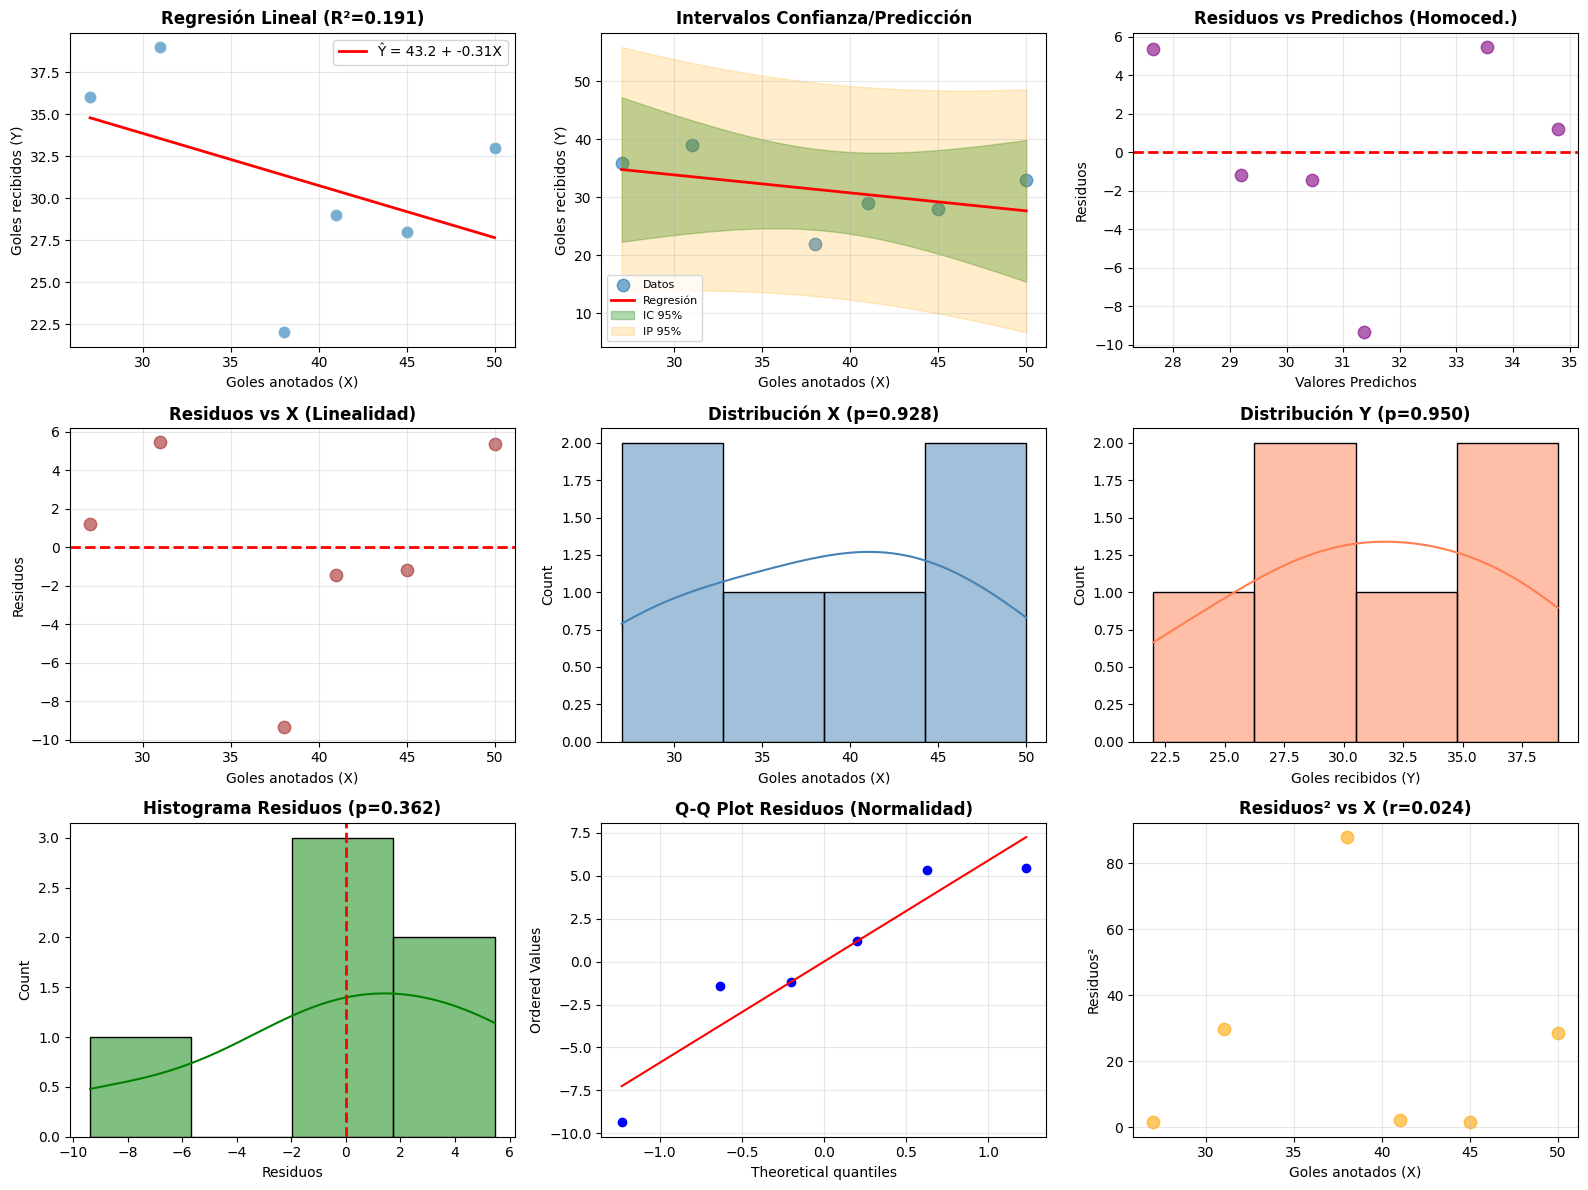


✓ ANÁLISIS COMPLETADO


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import numpy as np

# --- DATOS DEL PROBLEMA 1 (GOLES) ---
data_goles = {
    'Equipo': ['Leones', 'Águilas', 'Tigres', 'Toros', 'Pumas', 'Jaguares'],
    'Goles anotados (X)': [38, 45, 31, 50, 27, 41],
    'Goles recibidos (Y)': [22, 28, 39, 33, 36, 29]
}
df_goles = pd.DataFrame(data_goles)

var_x_goles = 'Goles anotados (X)'
var_y_goles = 'Goles recibidos (Y)'
n_goles, alfa_goles = len(df_goles), 0.05

print("=" * 70)
print("        ANÁLISIS DE REGRESIÓN LINEAL - GOLES DE FÚTBOL")
print("=" * 70)
print(f"n={n_goles} | α={alfa_goles} | X={var_x_goles} | Y={var_y_goles}\n")

# --- ANÁLISIS DESCRIPTIVO ---
mean_x_goles, mean_y_goles = df_goles[var_x_goles].mean(), df_goles[var_y_goles].mean()
std_x_goles, std_y_goles = df_goles[var_x_goles].std(ddof=1), df_goles[var_y_goles].std(ddof=1)
min_x_goles, max_x_goles = df_goles[var_x_goles].min(), df_goles[var_x_goles].max()
min_y_goles, max_y_goles = df_goles[var_y_goles].min(), df_goles[var_y_goles].max()

# Correlaciones y Normalidad
pearson_goles = df_goles[var_x_goles].corr(df_goles[var_y_goles])
spearman_goles = df_goles[var_x_goles].corr(df_goles[var_y_goles], method='spearman')
shapiro_x_goles = shapiro(df_goles[var_x_goles])
shapiro_y_goles = shapiro(df_goles[var_y_goles])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---")
print(f"X: μ={mean_x_goles:.2f}, σ={std_x_goles:.2f}, rango=[{min_x_goles}, {max_x_goles}]")
print(f"Y: μ={mean_y_goles:.2f}, σ={std_y_goles:.2f}, rango=[{min_y_goles}, {max_y_goles}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_goles.pvalue:.4f} {'✓ Normal' if shapiro_x_goles.pvalue > alfa_goles else '✗ No normal'}")
print(f"  Y: p={shapiro_y_goles.pvalue:.4f} {'✓ Normal' if shapiro_y_goles.pvalue > alfa_goles else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_goles:.4f} | Spearman={spearman_goles:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_goles) > 0.7 else 'Moderada' if abs(pearson_goles) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_goles > 0 else 'Negativa'}")

# --- PRUEBA DE HIPÓTESIS PARA CORRELACIÓN ---
gl_goles = n_goles - 2
try:
    t_corr_goles = pearson_goles * np.sqrt(n_goles - 2) / np.sqrt(1 - pearson_goles**2)
except ZeroDivisionError:
    t_corr_goles = float('nan')
p_corr_goles = t.sf(abs(t_corr_goles), gl_goles) * 2 if not np.isnan(t_corr_goles) else float('nan')
t_crit_corr_goles = t.ppf(1 - alfa_goles/2, gl_goles)

print(f"\n--- PRUEBA DE CORRELACIÓN ---")
print(f"H₀: ρ=0 vs H₁: ρ≠0 | t={t_corr_goles:.3f}, t_crit=±{t_crit_corr_goles:.3f}, p={p_corr_goles:.4f}")
print(f"Decisión: {'✓ Rechazar H₀ - Correlación SIGNIFICATIVA' if p_corr_goles < alfa_goles else '✗ No rechazar H₀'}")

# --- REGRESIÓN Y PRUEBAS ---
b1_goles = pearson_goles * (std_y_goles / std_x_goles)
b0_goles = mean_y_goles - b1_goles * mean_x_goles
df_goles['y_pred'] = b0_goles + b1_goles * df_goles[var_x_goles]
df_goles['residuos'] = df_goles[var_y_goles] - df_goles['y_pred']

# Errores y pruebas
SSE_goles = ((df_goles[var_y_goles] - df_goles['y_pred']) ** 2).sum()
SS_Total_goles = ((df_goles[var_y_goles] - mean_y_goles) ** 2).sum()
SSR_goles = SS_Total_goles - SSE_goles
s_yx_goles = np.sqrt(SSE_goles / (n_goles - 2))
suma_desv_x_goles = ((df_goles[var_x_goles] - mean_x_goles) ** 2).sum()
s_b_goles = s_yx_goles / np.sqrt(suma_desv_x_goles)

# Estadísticos t y F
t_calc_goles = b1_goles / s_b_goles
p_val_t_goles = t.sf(abs(t_calc_goles), gl_goles) * 2  # dos colas
t_crit_pend_goles = t.ppf(1 - alfa_goles/2, gl_goles)
F_calc_goles = (SSR_goles / 1) / (SSE_goles / gl_goles)
p_val_f_goles = f_dist.sf(F_calc_goles, 1, gl_goles)
r2_goles = 1 - (SSE_goles / SS_Total_goles)


print(f"\n--- MODELO DE REGRESIÓN ---")
print(f"Ecuación: Ŷ = {b0_goles:.4f} + {b1_goles:.4f}X")
print(f"  b₀ (intersección): {b0_goles:.4f} → Goles recibidos base")
print(f"  b₁ (pendiente): {b1_goles:.4f} → Por cada gol anotado adicional, cambio en goles recibidos")
print(f"\nBondad de ajuste:")
print(f"  R² = {r2_goles:.4f} ({r2_goles*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_goles:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (α={alfa_goles}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_goles:.3f}, t_crit=±{t_crit_pend_goles:.3f}, p={p_val_t_goles:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_goles < alfa_goles else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_goles:.3f}, p={p_val_f_goles:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_goles < alfa_goles else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA ---
print(f"\n--- TABLA ANOVA ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_goles:<12.4f} {1:<6} {SSR_goles:<12.4f} {F_calc_goles:<10.3f} {p_val_f_goles:<10.6f}")
print(f"{'Error':<12} {SSE_goles:<12.4f} {gl_goles:<6} {SSE_goles/gl_goles:<12.4f}")
print(f"{'Total':<12} {SS_Total_goles:<12.4f} {n_goles-1:<6}")

# --- SUPUESTOS DEL MODELO ---
print(f"\n{'='*70}")
print("--- VALIDACIÓN DE SUPUESTOS DEL MODELO ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gráfico)
print(f"\n1. LINEALIDAD:")
print(f"   • Correlación sugiere relación lineal: r={pearson_goles:.4f}")
print(f"   • Revisar diagrama de dispersión para confirmar")
print(f"   → {'✓ Supuesto plausible' if abs(pearson_goles) > 0.5 else '⚠ Revisar gráfico - correlación débil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   • No hay orden temporal en los datos")
print(f"   • Asumimos observaciones independientes entre equipos")
print(f"   → ✓ Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_goles = shapiro(df_goles['residuos'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   • Shapiro-Wilk: W={shapiro_res_goles.statistic:.4f}, p={shapiro_res_goles.pvalue:.4f}")
print(f"   • Media residuos: {df_goles['residuos'].mean():.4f} (debe ≈ 0)")
print(f"   → {'✓ Residuos normales' if shapiro_res_goles.pvalue > alfa_goles else '⚠ Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_goles['res_std'] = df_goles['residuos'] / s_yx_goles
# Prueba de Breusch-Pagan simplificada: correlación entre residuos² y X
residuos_cuadrados_goles = df_goles['residuos'] ** 2
corr_hetero_goles = df_goles[var_x_goles].corr(residuos_cuadrados_goles)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_goles >= 4:
    mediana_x_goles = df_goles[var_x_goles].median()
    grupo1_goles = df_goles[df_goles[var_x_goles] <= mediana_x_goles]['residuos'].abs()
    grupo2_goles = df_goles[df_goles[var_x_goles] > mediana_x_goles]['residuos'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_goles) > 0 and len(grupo2_goles) > 0:
        levene_stat_goles, levene_p_goles = levene(grupo1_goles, grupo2_goles)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   • Test de Levene: W={levene_stat_goles:.4f}, p={levene_p_goles:.4f}")
        print(f"   • Correlación |residuos| vs X: {corr_hetero_goles:.4f}")
        print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_goles > alfa_goles and abs(corr_hetero_goles) < 0.3:
            print(f"   → ✓ Homocedasticidad cumplida")
        elif levene_p_goles <= alfa_goles:
            print(f"   → ⚠ Posible heterocedasticidad detectada")
        else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   • No se puede realizar el test de Levene con los grupos formados.")
         print(f"   • Correlación |residuos| vs X: {corr_hetero_goles:.4f}")
         print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(corr_hetero_goles) < 0.3:
             print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
         else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   • Tamaño de muestra ({n_goles}) muy pequeño para test de Levene.")
    print(f"   • Correlación |residuos| vs X: {corr_hetero_goles:.4f}")
    print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(corr_hetero_goles) < 0.3:
        print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
    else:
        print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")


# 5. OUTLIERS
outliers_goles = df_goles[np.abs(df_goles['res_std']) > 2.5]
print(f"\n5. VALORES ATÍPICOS (OUTLIERS):")
print(f"   • Outliers (|res_std| > 2.5): {len(outliers_goles)}/{n_goles} ({len(outliers_goles)/n_goles*100:.1f}%)")
if len(outliers_goles) > 0:
    for idx, row in outliers_goles.iterrows():
        print(f"     • {row['Equipo']}: res_std={row['res_std']:.2f}")
print(f"   → {'✓ Sin outliers significativos' if len(outliers_goles) == 0 else '⚠ Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_goles = True
if n_goles >= 4:
    mediana_x_goles_check = df_goles[var_x_goles].median()
    grupo1_goles_check = df_goles[df_goles[var_x_goles] <= mediana_x_goles_check]['residuos'].abs()
    grupo2_goles_check = df_goles[df_goles[var_x_goles] > mediana_x_goles_check]['residuos'].abs()
    if len(grupo1_goles_check) == 0 or len(grupo2_goles_check) == 0:
        levene_check_goles = False
    else:
        levene_check_goles = levene_p_goles > alfa_goles and abs(corr_hetero_goles) < 0.3
else:
    levene_check_goles = abs(corr_hetero_goles) < 0.3 # Rely on correlation for small sample

supuestos_ok_goles = (
    abs(pearson_goles) > 0.5 and
    shapiro_res_goles.pvalue > alfa_goles and
    levene_check_goles and
    len(outliers_goles) <= n_goles * 0.15
)

print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS: {'✓ TODOS CUMPLIDOS' if supuestos_ok_goles else '⚠ REVISAR SUPUESTOS'}")
print(f"{'='*70}")


# --- INTERVALOS (ejemplos) ---
t_crit_goles = t.ppf(1 - alfa_goles/2, gl_goles)
x_ejemplos_goles = [30, 40, 50] # Ejemplos de goles anotados


print(f"\n--- INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%) ---")
print(f"{'X':<8} {'Ŷ':<10} {'IC Media':<25} {'IP Individual':<25}")
print("-" * 68)

for x_val in x_ejemplos_goles:
    y_pred = b0_goles + b1_goles * x_val

    # IC para la media
    error_conf = np.sqrt((1/n_goles) + ((x_val - mean_x_goles)**2 / suma_desv_x_goles))
    margen_conf = t_crit_goles * s_yx_goles * error_conf
    ic_inf, ic_sup = y_pred - margen_conf, y_pred + margen_conf

    # IP individual
    error_pred = np.sqrt(1 + (1/n_goles) + ((x_val - mean_x_goles)**2 / suma_desv_x_goles))
    margen_pred = t_crit_goles * s_yx_goles * error_pred
    ip_inf, ip_sup = y_pred - margen_pred, y_pred + margen_pred

    print(f"{x_val:<8} {y_pred:<10.2f} [{ic_inf:.1f}, {ic_sup:.1f}]{'':>10} [{ip_inf:.1f}, {ip_sup:.1f}]")


# --- EVALUACIÓN DE TRANSFORMACIÓN ---
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? ---")
necesita_goles = False
razones_goles = []

if shapiro_x_goles.pvalue <= alfa_goles or shapiro_y_goles.pvalue <= alfa_goles:
    razones_goles.append("Variables originales no normales")
    necesita_goles = True
if shapiro_res_goles.pvalue <= alfa_goles:
    razones_goles.append("Residuos no normales")
    necesita_goles = True
if n_goles >= 4 and (levene_p_goles <= alfa_goles or abs(corr_hetero_goles) >= 0.3):
    razones_goles.append("Posible heterocedasticidad")
    necesita_goles = True
elif n_goles < 4 and abs(corr_hetero_goles) >= 0.3:
     razones_goles.append("Posible heterocedasticidad (basado en correlación)")
     necesita_goles = True

if abs(pearson_goles) < 0.5:
    razones_goles.append(f"Correlación débil (r={pearson_goles:.3f})")
    necesita_goles = True
if len(outliers_goles) > n_goles * 0.15:
    razones_goles.append(f"Exceso de outliers ({len(outliers_goles)})")
    necesita_goles = True

if necesita_goles:
    print("⚠ CONSIDERAR TRANSFORMACIÓN:")
    for r in razones_goles:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas:")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - √Y: para datos de conteo con varianza proporcional a media")
    print("    - 1/Y: para relaciones no lineales decrecientes")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")


# --- RESUMEN EJECUTIVO ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO")
print(f"{'='*70}")
print(f"""
📊 MODELO: Ŷ = {b0_goles:.2f} + {b1_goles:.3f}X
   Interpretación: Por cada gol anotado adicional → {b1_goles:.3f} cambio en goles recibidos

📈 BONDAD DE AJUSTE:
   • R² = {r2_goles:.3f} ({r2_goles*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_goles) > 0.7 else 'moderada' if abs(pearson_goles) > 0.4 else 'débil'}: r = {pearson_goles:.3f}
   • Error típico de predicción: ±{s_yx_goles:.2f} goles recibidos

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_goles < alfa_goles else '✗ No significativa'} (p={p_corr_goles:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_goles < alfa_goles else '✗ No significativa'} (p={p_val_t_goles:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_goles < alfa_goles else '✗ No significativo'} (p={p_val_f_goles:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_goles) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_goles.pvalue > alfa_goles else '⚠'} (p={shapiro_res_goles.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_goles>=4 and levene_p_goles > alfa_goles and abs(corr_hetero_goles) < 0.3) or (n_goles<4 and abs(corr_hetero_goles) < 0.3) else '⚠'} (Levene p={levene_p_goles:.3f} if n_goles>=4 and len(grupo1_goles)>0 and len(grupo2_goles)>0 else 'N/A')
   • Outliers: {len(outliers_goles)}/{n_goles} → {'✓ Aceptable' if len(outliers_goles) <= n_goles*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")

if p_val_t_goles < alfa_goles and p_val_f_goles < alfa_goles and supuestos_ok_goles:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo cumple los supuestos y las pruebas estadísticas confirman
   que los goles anotados son un predictor significativo de los goles
   recibidos. Aunque la muestra es pequeña, se puede usar con cautela
   para entender la relación.
""")
elif p_val_t_goles < alfa_goles and p_val_f_goles < alfa_goles:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, el tamaño de muestra es muy pequeño
   y algunos supuestos (como la homocedasticidad) son difíciles de validar.
   Usar con MUCHA PRECAUCIÓN y considerar:
   • Recolectar MUCHOS más datos de temporadas o equipos adicionales.
   • Explorar modelos alternativos o no paramétricos.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable. Se recomienda:
   • Recolectar MUCHOS más datos o mejorar calidad de datos
   • Considerar otras variables explicativas (ej: defensa, posesión)
   • Explorar modelos alternativos (no lineal, multivariado)
""")

print("\n" + "=" * 70)

# --- GRÁFICOS ---
fig = plt.figure(figsize=(16, 12))

# 1. Dispersión con regresión
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_goles, y=var_y_goles, data=df_goles, s=80, alpha=0.6)
x_line_goles = np.linspace(df_goles[var_x_goles].min(), df_goles[var_x_goles].max(), 100)
y_line_goles = b0_goles + b1_goles * x_line_goles
plt.plot(x_line_goles, y_line_goles, 'r-', lw=2, label=f'Ŷ = {b0_goles:.1f} + {b1_goles:.2f}X')
plt.title(f'Regresión Lineal (R²={r2_goles:.3f})', fontweight='bold')
plt.xlabel(var_x_goles)
plt.ylabel(var_y_goles)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_goles[var_x_goles], df_goles[var_y_goles], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_goles, y_line_goles, 'r-', lw=2, label='Regresión')

# Calcular bandas
ic_lower_goles, ic_upper_goles = [], []
ip_lower_goles, ip_upper_goles = [], []
for x_val in x_line_goles:
    y_p = b0_goles + b1_goles * x_val
    e_conf = np.sqrt((1/n_goles) + ((x_val - mean_x_goles)**2 / suma_desv_x_goles))
    e_pred = np.sqrt(1 + (1/n_goles) + ((x_val - mean_x_goles)**2 / suma_desv_x_goles))
    ic_lower_goles.append(y_p - t_crit_goles * s_yx_goles * e_conf)
    ic_upper_goles.append(y_p + t_crit_goles * s_yx_goles * e_conf)
    ip_lower_goles.append(y_p - t_crit_goles * s_yx_goles * e_pred)
    ip_upper_goles.append(y_p + t_crit_goles * s_yx_goles * e_pred)

plt.fill_between(x_line_goles, ic_lower_goles, ic_upper_goles, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_goles, ip_lower_goles, ip_upper_goles, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción', fontweight='bold')
plt.xlabel(var_x_goles)
plt.ylabel(var_y_goles)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_goles['y_pred'], df_goles['residuos'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Homoced.)', fontweight='bold')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 4. Residuos vs X
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_goles[var_x_goles], df_goles['residuos'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Linealidad)', fontweight='bold')
plt.xlabel(var_x_goles)
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 5. Histograma X
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_goles[var_x_goles], kde=True, color='steelblue')
plt.title(f'Distribución X (p={shapiro_x_goles.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_goles)

# 6. Histograma Y
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_goles[var_y_goles], kde=True, color='coral')
plt.title(f'Distribución Y (p={shapiro_y_goles.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_goles)

# 7. Histograma Residuos
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_goles['residuos'], kde=True, color='green')
plt.axvline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (p={shapiro_res_goles.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos')

# 8. Q-Q Plot Residuos
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_goles['residuos'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Normalidad)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_goles[var_x_goles], residuos_cuadrados_goles, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (r={corr_hetero_goles:.3f})', fontweight='bold')
plt.xlabel(var_x_goles)
plt.ylabel('Residuos²')
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()


print("\n✓ ANÁLISIS COMPLETADO")

   ANÁLISIS DE REGRESIÓN LINEAL - HORAS DE ESTUDIO vs CALIFICACIÓN
n=12 | α=0.05 | X=Horas de estudio (X) | Y=Calificación final (Y)

--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---
X: μ=7.58, σ=2.15, rango=[4, 11]
Y: μ=80.67, σ=8.50, rango=[65, 94]

Normalidad (Shapiro-Wilk):
  X: p=0.9239 ✓ Normal
  Y: p=0.9994 ✓ Normal

Correlación: Pearson=0.8965 | Spearman=0.9190
Magnitud: Fuerte | Dirección: Positiva

--- PRUEBA DE CORRELACIÓN ---
H₀: ρ=0 vs H₁: ρ≠0 | t=6.399, t_crit=±2.228, p=0.0001
Decisión: ✓ Rechazar H₀ - Correlación SIGNIFICATIVA

--- MODELO DE REGRESIÓN ---
Ecuación: Ŷ = 53.8085 + 3.5417X
  b₀ (intersección): 53.8085 → Calificación base sin estudio
  b₁ (pendiente): 3.5417 → Por cada hora de estudio adicional, cambio en calificación

Bondad de ajuste:
  R² = 0.8037 (80.4% variabilidad explicada)
  Error estándar (s_y,x) = 3.9494

--- PRUEBAS DE SIGNIFICANCIA (α=0.05) ---
1. Pendiente: H₀: β=0 vs H₁: β≠0
   t=6.399, t_crit=±2.228, p=0.0001
   → ✓ Pendiente SIGNIFICATIVA

2. 

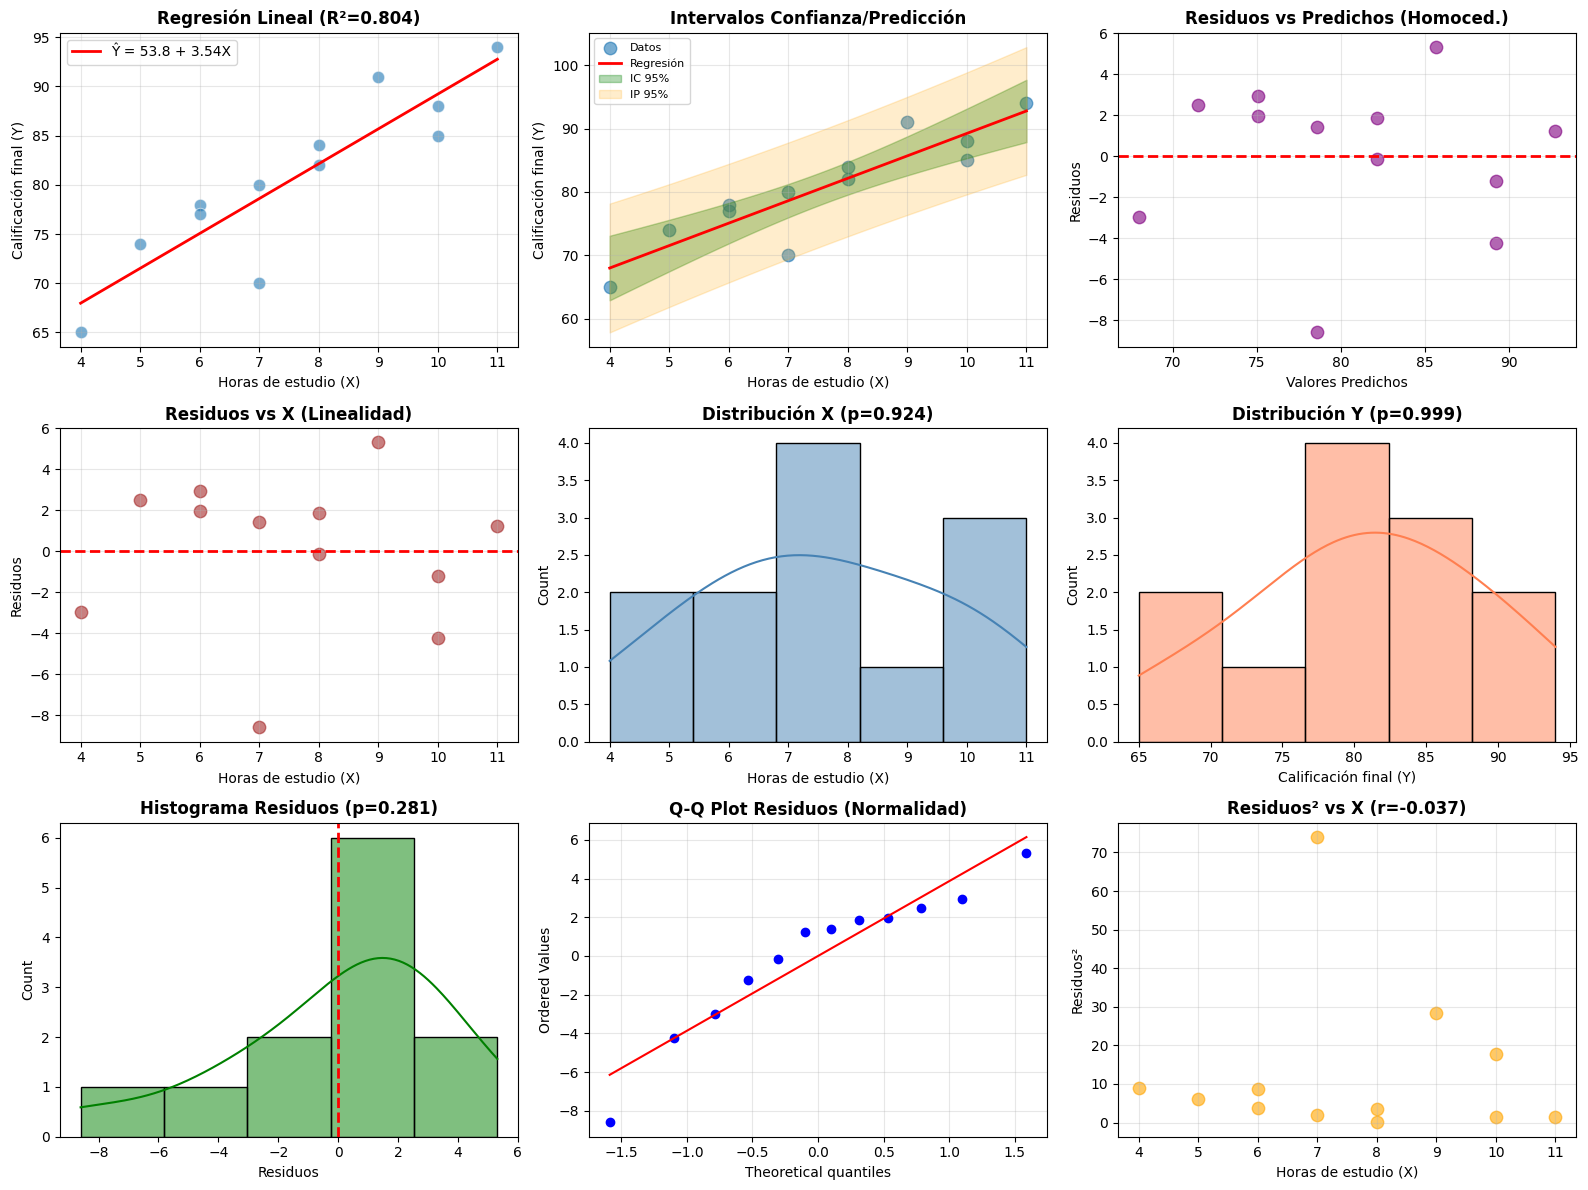


✓ ANÁLISIS COMPLETADO


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import numpy as np

# --- DATOS DEL PROBLEMA 2 (HORAS DE ESTUDIO Y CALIFICACIÓN) ---
data_estudio = {
    'Horas de estudio (X)': [4, 7, 10, 6, 8, 9, 5, 11, 7, 6, 8, 10],
    'Calificación final (Y)': [65, 70, 85, 78, 82, 91, 74, 94, 80, 77, 84, 88]
}
df_estudio = pd.DataFrame(data_estudio)

var_x_estudio = 'Horas de estudio (X)'
var_y_estudio = 'Calificación final (Y)'
n_estudio, alfa_estudio = len(df_estudio), 0.05

print("=" * 70)
print("   ANÁLISIS DE REGRESIÓN LINEAL - HORAS DE ESTUDIO vs CALIFICACIÓN")
print("=" * 70)
print(f"n={n_estudio} | α={alfa_estudio} | X={var_x_estudio} | Y={var_y_estudio}\n")

# --- ANÁLISIS DESCRIPTIVO ---
mean_x_estudio, mean_y_estudio = df_estudio[var_x_estudio].mean(), df_estudio[var_y_estudio].mean()
std_x_estudio, std_y_estudio = df_estudio[var_x_estudio].std(ddof=1), df_estudio[var_y_estudio].std(ddof=1)
min_x_estudio, max_x_estudio = df_estudio[var_x_estudio].min(), df_estudio[var_x_estudio].max()
min_y_estudio, max_y_estudio = df_estudio[var_y_estudio].min(), df_estudio[var_y_estudio].max()

# Correlaciones y Normalidad
pearson_estudio = df_estudio[var_x_estudio].corr(df_estudio[var_y_estudio])
spearman_estudio = df_estudio[var_x_estudio].corr(df_estudio[var_y_estudio], method='spearman')
shapiro_x_estudio = shapiro(df_estudio[var_x_estudio])
shapiro_y_estudio = shapiro(df_estudio[var_y_estudio])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---")
print(f"X: μ={mean_x_estudio:.2f}, σ={std_x_estudio:.2f}, rango=[{min_x_estudio}, {max_x_estudio}]")
print(f"Y: μ={mean_y_estudio:.2f}, σ={std_y_estudio:.2f}, rango=[{min_y_estudio}, {max_y_estudio}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_estudio.pvalue:.4f} {'✓ Normal' if shapiro_x_estudio.pvalue > alfa_estudio else '✗ No normal'}")
print(f"  Y: p={shapiro_y_estudio.pvalue:.4f} {'✓ Normal' if shapiro_y_estudio.pvalue > alfa_estudio else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_estudio:.4f} | Spearman={spearman_estudio:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_estudio) > 0.7 else 'Moderada' if abs(pearson_estudio) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_estudio > 0 else 'Negativa'}")

# --- PRUEBA DE HIPÓTESIS PARA CORRELACIÓN ---
gl_estudio = n_estudio - 2
try:
    t_corr_estudio = pearson_estudio * np.sqrt(n_estudio - 2) / np.sqrt(1 - pearson_estudio**2)
except ZeroDivisionError:
    t_corr_estudio = float('nan')
p_corr_estudio = t.sf(abs(t_corr_estudio), gl_estudio) * 2 if not np.isnan(t_corr_estudio) else float('nan')
t_crit_corr_estudio = t.ppf(1 - alfa_estudio/2, gl_estudio)

print(f"\n--- PRUEBA DE CORRELACIÓN ---")
print(f"H₀: ρ=0 vs H₁: ρ≠0 | t={t_corr_estudio:.3f}, t_crit=±{t_crit_corr_estudio:.3f}, p={p_corr_estudio:.4f}")
print(f"Decisión: {'✓ Rechazar H₀ - Correlación SIGNIFICATIVA' if p_corr_estudio < alfa_estudio else '✗ No rechazar H₀'}")

# --- REGRESIÓN Y PRUEBAS ---
b1_estudio = pearson_estudio * (std_y_estudio / std_x_estudio)
b0_estudio = mean_y_estudio - b1_estudio * mean_x_estudio
df_estudio['y_pred'] = b0_estudio + b1_estudio * df_estudio[var_x_estudio]
df_estudio['residuos'] = df_estudio[var_y_estudio] - df_estudio['y_pred']

# Errores y pruebas
SSE_estudio = ((df_estudio[var_y_estudio] - df_estudio['y_pred']) ** 2).sum()
SS_Total_estudio = ((df_estudio[var_y_estudio] - mean_y_estudio) ** 2).sum()
SSR_estudio = SS_Total_estudio - SSE_estudio
s_yx_estudio = np.sqrt(SSE_estudio / (n_estudio - 2))
suma_desv_x_estudio = ((df_estudio[var_x_estudio] - mean_x_estudio) ** 2).sum()
s_b_estudio = s_yx_estudio / np.sqrt(suma_desv_x_estudio)

# Estadísticos t y F
t_calc_estudio = b1_estudio / s_b_estudio
p_val_t_estudio = t.sf(abs(t_calc_estudio), gl_estudio) * 2  # dos colas
t_crit_pend_estudio = t.ppf(1 - alfa_estudio/2, gl_estudio)
F_calc_estudio = (SSR_estudio / 1) / (SSE_estudio / gl_estudio)
p_val_f_estudio = f_dist.sf(F_calc_estudio, 1, gl_estudio)
r2_estudio = 1 - (SSE_estudio / SS_Total_estudio)


print(f"\n--- MODELO DE REGRESIÓN ---")
print(f"Ecuación: Ŷ = {b0_estudio:.4f} + {b1_estudio:.4f}X")
print(f"  b₀ (intersección): {b0_estudio:.4f} → Calificación base sin estudio")
print(f"  b₁ (pendiente): {b1_estudio:.4f} → Por cada hora de estudio adicional, cambio en calificación")
print(f"\nBondad de ajuste:")
print(f"  R² = {r2_estudio:.4f} ({r2_estudio*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_estudio:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (α={alfa_estudio}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_estudio:.3f}, t_crit=±{t_crit_pend_estudio:.3f}, p={p_val_t_estudio:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_estudio < alfa_estudio else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_estudio:.3f}, p={p_val_f_estudio:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_estudio < alfa_estudio else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA ---
print(f"\n--- TABLA ANOVA ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_estudio:<12.4f} {1:<6} {SSR_estudio:<12.4f} {F_calc_estudio:<10.3f} {p_val_f_estudio:<10.6f}")
print(f"{'Error':<12} {SSE_estudio:<12.4f} {gl_estudio:<6} {SSE_estudio/gl_estudio:<12.4f}")
print(f"{'Total':<12} {SS_Total_estudio:<12.4f} {n_estudio-1:<6}")

# --- SUPUESTOS DEL MODELO ---
print(f"\n{'='*70}")
print("--- VALIDACIÓN DE SUPUESTOS DEL MODELO ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gráfico)
print(f"\n1. LINEALIDAD:")
print(f"   • Correlación sugiere relación lineal: r={pearson_estudio:.4f}")
print(f"   • Revisar diagrama de dispersión para confirmar")
print(f"   → {'✓ Supuesto plausible' if abs(pearson_estudio) > 0.5 else '⚠ Revisar gráfico - correlación débil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   • No hay orden temporal en los datos")
print(f"   • Asumimos observaciones independientes entre estudiantes")
print(f"   → ✓ Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_estudio = shapiro(df_estudio['residuos'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   • Shapiro-Wilk: W={shapiro_res_estudio.statistic:.4f}, p={shapiro_res_estudio.pvalue:.4f}")
print(f"   • Media residuos: {df_estudio['residuos'].mean():.4f} (debe ≈ 0)")
print(f"   → {'✓ Residuos normales' if shapiro_res_estudio.pvalue > alfa_estudio else '⚠ Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_estudio['res_std'] = df_estudio['residuos'] / s_yx_estudio
# Prueba de Breusch-Pagan simplificada: correlación entre residuos² y X
residuos_cuadrados_estudio = df_estudio['residuos'] ** 2
corr_hetero_estudio = df_estudio[var_x_estudio].corr(residuos_cuadrados_estudio)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_estudio >= 4:
    mediana_x_estudio = df_estudio[var_x_estudio].median()
    grupo1_estudio = df_estudio[df_estudio[var_x_estudio] <= mediana_x_estudio]['residuos'].abs()
    grupo2_estudio = df_estudio[df_estudio[var_x_estudio] > mediana_x_estudio]['residuos'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_estudio) > 0 and len(grupo2_estudio) > 0:
        levene_stat_estudio, levene_p_estudio = levene(grupo1_estudio, grupo2_estudio)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   • Test de Levene: W={levene_stat_estudio:.4f}, p={levene_p_estudio:.4f}")
        print(f"   • Correlación |residuos| vs X: {corr_hetero_estudio:.4f}")
        print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_estudio > alfa_estudio and abs(corr_hetero_estudio) < 0.3:
            print(f"   → ✓ Homocedasticidad cumplida")
        elif levene_p_estudio <= alfa_estudio:
            print(f"   → ⚠ Posible heterocedasticidad detectada")
        else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   • No se puede realizar el test de Levene con los grupos formados.")
         print(f"   • Correlación |residuos| vs X: {corr_hetero_estudio:.4f}")
         print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(corr_hetero_estudio) < 0.3:
             print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
         else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   • Tamaño de muestra ({n_estudio}) muy pequeño para test de Levene.")
    print(f"   • Correlación |residuos| vs X: {corr_hetero_estudio:.4f}")
    print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(corr_hetero_estudio) < 0.3:
        print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
    else:
        print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")


# 5. OUTLIERS
outliers_estudio = df_estudio[np.abs(df_estudio['res_std']) > 2.5]
print(f"\n5. VALORES ATÍPICOS (OUTLIERS):")
print(f"   • Outliers (|res_std| > 2.5): {len(outliers_estudio)}/{n_estudio} ({len(outliers_estudio)/n_estudio*100:.1f}%)")
if len(outliers_estudio) > 0:
    for idx, row in outliers_estudio.iterrows():
        print(f"     • Estudiante {idx+1}: res_std={row['res_std']:.2f}") # Assuming row index corresponds to student number
print(f"   → {'✓ Sin outliers significativos' if len(outliers_estudio) == 0 else '⚠ Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_estudio = True
if n_estudio >= 4:
    mediana_x_estudio_check = df_estudio[var_x_estudio].median()
    grupo1_estudio_check = df_estudio[df_estudio[var_x_estudio] <= mediana_x_estudio_check]['residuos'].abs()
    grupo2_estudio_check = df_estudio[df_estudio[var_x_estudio] > mediana_x_estudio_check]['residuos'].abs()
    if len(grupo1_estudio_check) == 0 or len(grupo2_estudio_check) == 0:
        levene_check_estudio = False
    else:
        levene_check_estudio = levene_p_estudio > alfa_estudio and abs(corr_hetero_estudio) < 0.3
else:
    levene_check_estudio = abs(corr_hetero_estudio) < 0.3 # Rely on correlation for small sample


supuestos_ok_estudio = (
    abs(pearson_estudio) > 0.5 and
    shapiro_res_estudio.pvalue > alfa_estudio and
    levene_check_estudio and
    len(outliers_estudio) <= n_estudio * 0.15
)


print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS: {'✓ TODOS CUMPLIDOS' if supuestos_ok_estudio else '⚠ REVISAR SUPUESTOS'}")
print(f"{'='*70}")


# --- INTERVALOS (ejemplos) ---
t_crit_estudio = t.ppf(1 - alfa_estudio/2, gl_estudio)
x_ejemplos_estudio = [5, 8, 12] # Ejemplos de horas de estudio


print(f"\n--- INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%) ---")
print(f"{'X':<8} {'Ŷ':<10} {'IC Media':<25} {'IP Individual':<25}")
print("-" * 68)

for x_val in x_ejemplos_estudio:
    y_pred = b0_estudio + b1_estudio * x_val

    # IC para la media
    error_conf = np.sqrt((1/n_estudio) + ((x_val - mean_x_estudio)**2 / suma_desv_x_estudio))
    margen_conf = t_crit_estudio * s_yx_estudio * error_conf
    ic_inf, ic_sup = y_pred - margen_conf, y_pred + margen_conf

    # IP individual
    error_pred = np.sqrt(1 + (1/n_estudio) + ((x_val - mean_x_estudio)**2 / suma_desv_x_estudio))
    margen_pred = t_crit_estudio * s_yx_estudio * error_pred
    ip_inf, ip_sup = y_pred - margen_pred, y_pred + margen_pred

    print(f"{x_val:<8} {y_pred:<10.2f} [{ic_inf:.1f}, {ic_sup:.1f}]{'':>10} [{ip_inf:.1f}, {ip_sup:.1f}]")


# --- EVALUACIÓN DE TRANSFORMACIÓN ---
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? ---")
necesita_estudio = False
razones_estudio = []

if shapiro_x_estudio.pvalue <= alfa_estudio or shapiro_y_estudio.pvalue <= alfa_estudio:
    razones_estudio.append("Variables originales no normales")
    necesita_estudio = True
if shapiro_res_estudio.pvalue <= alfa_estudio:
    razones_estudio.append("Residuos no normales")
    necesita_estudio = True
if n_estudio >= 4 and (levene_p_estudio <= alfa_estudio or abs(corr_hetero_estudio) >= 0.3):
    razones_estudio.append("Posible heterocedasticidad")
    necesita_estudio = True
elif n_estudio < 4 and abs(corr_hetero_estudio) >= 0.3:
     razones_estudio.append("Posible heterocedasticidad (basado en correlación)")
     necesita_estudio = True

if abs(pearson_estudio) < 0.5:
    razones_estudio.append(f"Correlación débil (r={pearson_estudio:.3f})")
    necesita_estudio = True
if len(outliers_estudio) > n_estudio * 0.15:
    razones_estudio.append(f"Exceso de outliers ({len(outliers_estudio)})")
    necesita_estudio = True

if necesita_estudio:
    print("⚠ CONSIDERAR TRANSFORMACIÓN:")
    for r in razones_estudio:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas:")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - √Y: para datos de conteo con varianza proporcional a media")
    print("    - 1/Y: para relaciones no lineales decrecientes")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")


# --- RESUMEN EJECUTIVO ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO")
print(f"{'='*70}")
print(f"""
📊 MODELO: Ŷ = {b0_estudio:.2f} + {b1_estudio:.3f}X
   Interpretación: Por cada hora de estudio adicional → {b1_estudio:.3f} cambio en calificación

📈 BONDAD DE AJUSTE:
   • R² = {r2_estudio:.3f} ({r2_estudio*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_estudio) > 0.7 else 'moderada' if abs(pearson_estudio) > 0.4 else 'débil'}: r = {pearson_estudio:.3f}
   • Error típico de predicción: ±{s_yx_estudio:.2f} puntos de calificación

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_estudio < alfa_estudio else '✗ No significativa'} (p={p_corr_estudio:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_estudio < alfa_estudio else '✗ No significativa'} (p={p_val_t_estudio:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_estudio < alfa_estudio else '✗ No significativo'} (p={p_val_f_estudio:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_estudio) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_estudio.pvalue > alfa_estudio else '⚠'} (p={shapiro_res_estudio.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_estudio>=4 and levene_p_estudio > alfa_estudio and abs(corr_hetero_estudio) < 0.3) or (n_estudio<4 and abs(corr_hetero_estudio) < 0.3) else '⚠'} (Levene p={levene_p_estudio:.3f} if n_estudio>=4 and len(grupo1_estudio)>0 and len(grupo2_estudio)>0 else 'N/A')
   • Outliers: {len(outliers_estudio)}/{n_estudio} → {'✓ Aceptable' if len(outliers_estudio) <= n_estudio*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")

if p_val_t_estudio < alfa_estudio and p_val_f_estudio < alfa_estudio and supuestos_ok_estudio:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo cumple los supuestos y las pruebas estadísticas confirman
   que las horas de estudio son un predictor significativo de la calificación final.
""")
elif p_val_t_estudio < alfa_estudio and p_val_f_estudio < alfa_estudio:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, algunos supuestos podrían no cumplirse.
   Revisar los gráficos y la validación de supuestos. Considerar:
   • Recolectar más datos.
   • Explorar transformaciones de datos si los supuestos fallan.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable. Se recomienda:
   • Recolectar más datos o mejorar calidad de datos
   • Considerar otras variables explicativas (ej: asistencia, horas de sueño)
   • Explorar modelos alternativos (no lineal, multivariado)
""")

print("\n" + "=" * 70)


# --- GRÁFICOS ---
fig = plt.figure(figsize=(16, 12))

# 1. Dispersión con regresión
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_estudio, y=var_y_estudio, data=df_estudio, s=80, alpha=0.6)
x_line_estudio = np.linspace(df_estudio[var_x_estudio].min(), df_estudio[var_x_estudio].max(), 100)
y_line_estudio = b0_estudio + b1_estudio * x_line_estudio
plt.plot(x_line_estudio, y_line_estudio, 'r-', lw=2, label=f'Ŷ = {b0_estudio:.1f} + {b1_estudio:.2f}X')
plt.title(f'Regresión Lineal (R²={r2_estudio:.3f})', fontweight='bold')
plt.xlabel(var_x_estudio)
plt.ylabel(var_y_estudio)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_estudio[var_x_estudio], df_estudio[var_y_estudio], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_estudio, y_line_estudio, 'r-', lw=2, label='Regresión')

# Calcular bandas
ic_lower_estudio, ic_upper_estudio = [], []
ip_lower_estudio, ip_upper_estudio = [], []
for x_val in x_line_estudio:
    y_p = b0_estudio + b1_estudio * x_val
    e_conf = np.sqrt((1/n_estudio) + ((x_val - mean_x_estudio)**2 / suma_desv_x_estudio))
    e_pred = np.sqrt(1 + (1/n_estudio) + ((x_val - mean_x_estudio)**2 / suma_desv_x_estudio))
    ic_lower_estudio.append(y_p - t_crit_estudio * s_yx_estudio * e_conf)
    ic_upper_estudio.append(y_p + t_crit_estudio * s_yx_estudio * e_conf)
    ip_lower_estudio.append(y_p - t_crit_estudio * s_yx_estudio * e_pred)
    ip_upper_estudio.append(y_p + t_crit_estudio * s_yx_estudio * e_pred)

plt.fill_between(x_line_estudio, ic_lower_estudio, ic_upper_estudio, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_estudio, ip_lower_estudio, ip_upper_estudio, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción', fontweight='bold')
plt.xlabel(var_x_estudio)
plt.ylabel(var_y_estudio)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_estudio['y_pred'], df_estudio['residuos'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Homoced.)', fontweight='bold')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 4. Residuos vs X
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_estudio[var_x_estudio], df_estudio['residuos'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Linealidad)', fontweight='bold')
plt.xlabel(var_x_estudio)
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 5. Histograma X
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_estudio[var_x_estudio], kde=True, color='steelblue')
plt.title(f'Distribución X (p={shapiro_x_estudio.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_estudio)

# 6. Histograma Y
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_estudio[var_y_estudio], kde=True, color='coral')
plt.title(f'Distribución Y (p={shapiro_y_estudio.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_estudio)

# 7. Histograma Residuos
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_estudio['residuos'], kde=True, color='green')
plt.axvline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (p={shapiro_res_estudio.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos')

# 8. Q-Q Plot Residuos
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_estudio['residuos'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Normalidad)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_estudio[var_x_estudio], residuos_cuadrados_estudio, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (r={corr_hetero_estudio:.3f})', fontweight='bold')
plt.xlabel(var_x_estudio)
plt.ylabel('Residuos²')
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()


print("\n✓ ANÁLISIS COMPLETADO")

      ANÁLISIS DE REGRESIÓN LINEAL - LLAMADAS DIARIAS vs VENTAS
n=10 | α=0.05 | X=Llamadas diarias (X) | Y=Ventas semanales (Y)

--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---
X: μ=19.60, σ=3.20, rango=[15, 25]
Y: μ=7.40, σ=2.07, rango=[5, 11]

Normalidad (Shapiro-Wilk):
  X: p=0.9697 ✓ Normal
  Y: p=0.4473 ✓ Normal

Correlación: Pearson=0.9838 | Spearman=0.9909
Magnitud: Fuerte | Dirección: Positiva

--- PRUEBA DE CORRELACIÓN ---
H₀: ρ=0 vs H₁: ρ≠0 | t=15.510, t_crit=±2.306, p=0.0000
Decisión: ✓ Rechazar H₀ - Correlación SIGNIFICATIVA

--- MODELO DE REGRESIÓN ---
Ecuación: Ŷ = -5.0303 + 0.6342X
  b₀ (intersección): -5.0303 → Ventas base sin llamadas
  b₁ (pendiente): 0.6342 → Por cada llamada diaria adicional, cambio en ventas semanales

Bondad de ajuste:
  R² = 0.9678 (96.8% variabilidad explicada)
  Error estándar (s_y,x) = 0.3931

--- PRUEBAS DE SIGNIFICANCIA (α=0.05) ---
1. Pendiente: H₀: β=0 vs H₁: β≠0
   t=15.510, t_crit=±2.306, p=0.0000
   → ✓ Pendiente SIGNIFICATIVA

2. Model

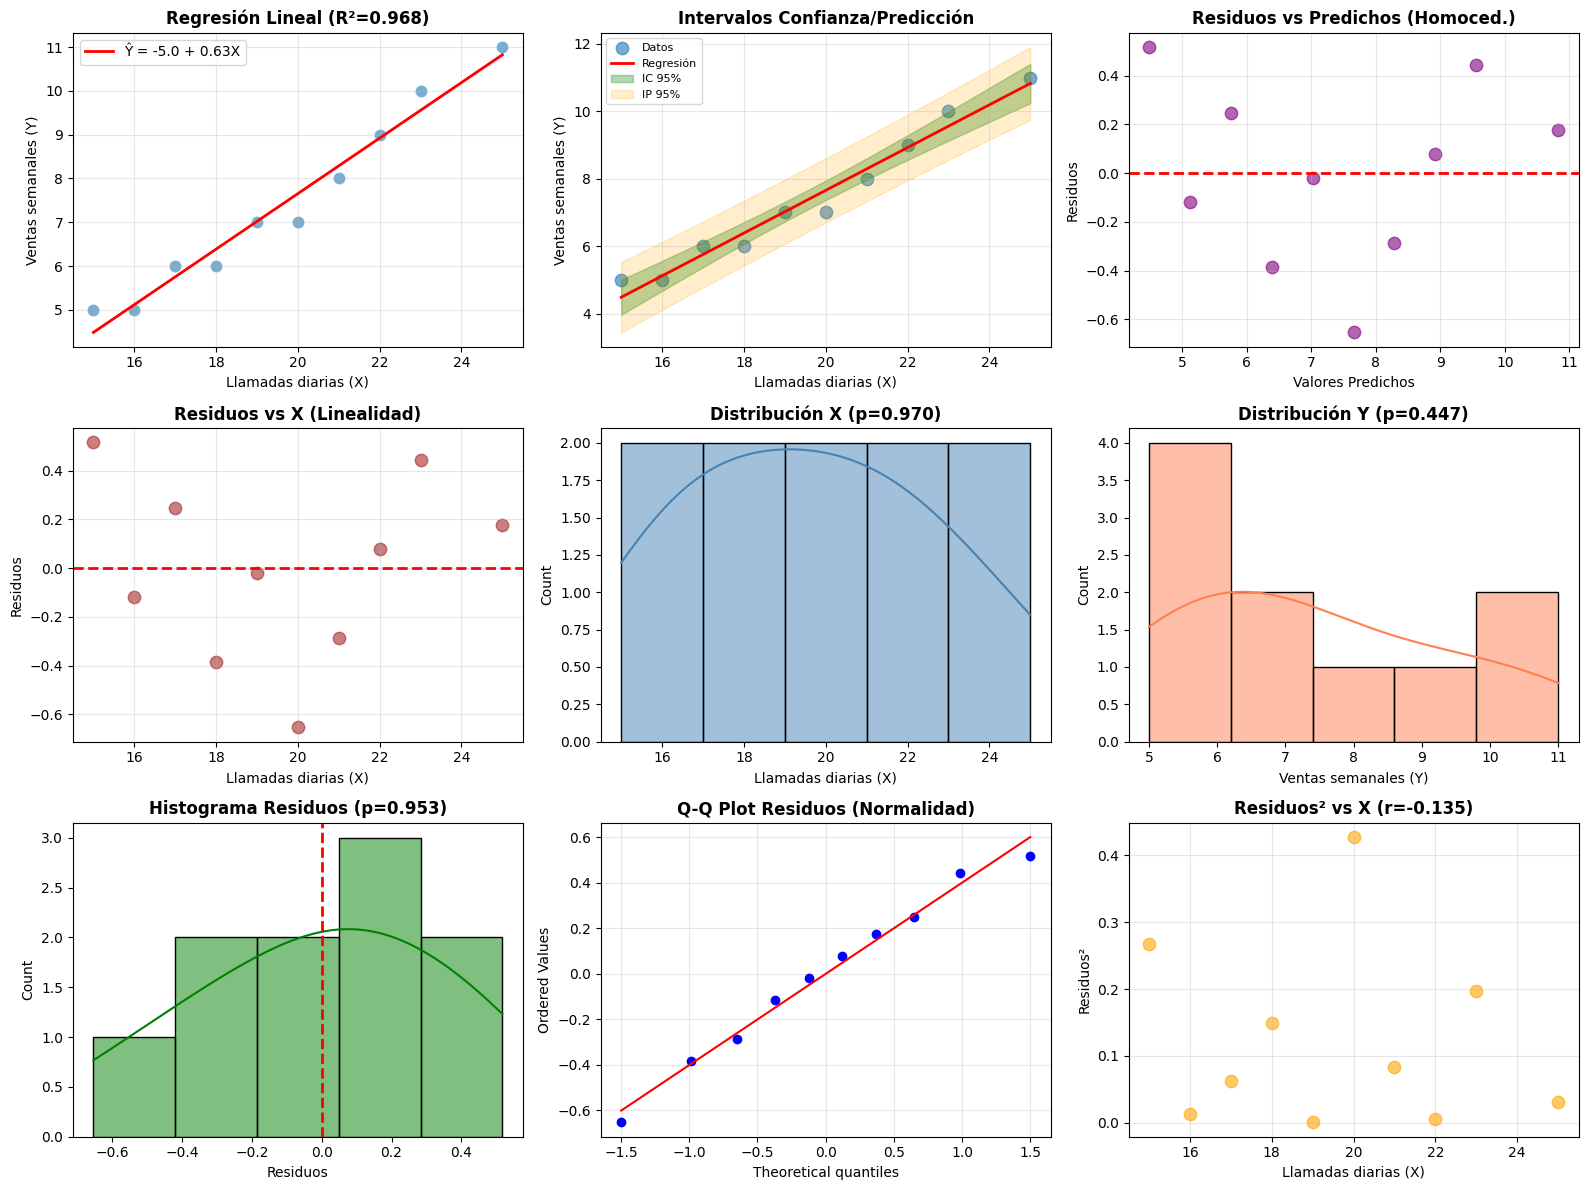


✓ ANÁLISIS COMPLETADO


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import numpy as np

# --- DATOS DEL PROBLEMA 3 (LLAMADAS VS VENTAS) ---
data_ventas = {
    'Llamadas diarias (X)': [15, 20, 18, 25, 22, 17, 19, 23, 21, 16],
    'Ventas semanales (Y)': [5, 7, 6, 11, 9, 6, 7, 10, 8, 5]
}
df_ventas = pd.DataFrame(data_ventas)

var_x_ventas = 'Llamadas diarias (X)'
var_y_ventas = 'Ventas semanales (Y)'
n_ventas, alfa_ventas = len(df_ventas), 0.05

print("=" * 70)
print("      ANÁLISIS DE REGRESIÓN LINEAL - LLAMADAS DIARIAS vs VENTAS")
print("=" * 70)
print(f"n={n_ventas} | α={alfa_ventas} | X={var_x_ventas} | Y={var_y_ventas}\n")

# --- ANÁLISIS DESCRIPTIVO ---
mean_x_ventas, mean_y_ventas = df_ventas[var_x_ventas].mean(), df_ventas[var_y_ventas].mean()
std_x_ventas, std_y_ventas = df_ventas[var_x_ventas].std(ddof=1), df_ventas[var_y_ventas].std(ddof=1)
min_x_ventas, max_x_ventas = df_ventas[var_x_ventas].min(), df_ventas[var_x_ventas].max()
min_y_ventas, max_y_ventas = df_ventas[var_y_ventas].min(), df_ventas[var_y_ventas].max()

# Correlaciones y Normalidad
pearson_ventas = df_ventas[var_x_ventas].corr(df_ventas[var_y_ventas])
spearman_ventas = df_ventas[var_x_ventas].corr(df_ventas[var_y_ventas], method='spearman')
shapiro_x_ventas = shapiro(df_ventas[var_x_ventas])
shapiro_y_ventas = shapiro(df_ventas[var_y_ventas])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---")
print(f"X: μ={mean_x_ventas:.2f}, σ={std_x_ventas:.2f}, rango=[{min_x_ventas}, {max_x_ventas}]")
print(f"Y: μ={mean_y_ventas:.2f}, σ={std_y_ventas:.2f}, rango=[{min_y_ventas}, {max_y_ventas}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_ventas.pvalue:.4f} {'✓ Normal' if shapiro_x_ventas.pvalue > alfa_ventas else '✗ No normal'}")
print(f"  Y: p={shapiro_y_ventas.pvalue:.4f} {'✓ Normal' if shapiro_y_ventas.pvalue > alfa_ventas else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_ventas:.4f} | Spearman={spearman_ventas:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_ventas) > 0.7 else 'Moderada' if abs(pearson_ventas) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_ventas > 0 else 'Negativa'}")

# --- PRUEBA DE HIPÓTESIS PARA CORRELACIÓN ---
gl_ventas = n_ventas - 2
try:
    t_corr_ventas = pearson_ventas * np.sqrt(n_ventas - 2) / np.sqrt(1 - pearson_ventas**2)
except ZeroDivisionError:
    t_corr_ventas = float('nan')
p_corr_ventas = t.sf(abs(t_corr_ventas), gl_ventas) * 2 if not np.isnan(t_corr_ventas) else float('nan')
t_crit_corr_ventas = t.ppf(1 - alfa_ventas/2, gl_ventas)

print(f"\n--- PRUEBA DE CORRELACIÓN ---")
print(f"H₀: ρ=0 vs H₁: ρ≠0 | t={t_corr_ventas:.3f}, t_crit=±{t_crit_corr_ventas:.3f}, p={p_corr_ventas:.4f}")
print(f"Decisión: {'✓ Rechazar H₀ - Correlación SIGNIFICATIVA' if p_corr_ventas < alfa_ventas else '✗ No rechazar H₀'}")

# --- REGRESIÓN Y PRUEBAS ---
b1_ventas = pearson_ventas * (std_y_ventas / std_x_ventas)
b0_ventas = mean_y_ventas - b1_ventas * mean_x_ventas
df_ventas['y_pred'] = b0_ventas + b1_ventas * df_ventas[var_x_ventas]
df_ventas['residuos'] = df_ventas[var_y_ventas] - df_ventas['y_pred']

# Errores y pruebas
SSE_ventas = ((df_ventas[var_y_ventas] - df_ventas['y_pred']) ** 2).sum()
SS_Total_ventas = ((df_ventas[var_y_ventas] - mean_y_ventas) ** 2).sum()
SSR_ventas = SS_Total_ventas - SSE_ventas
s_yx_ventas = np.sqrt(SSE_ventas / (n_ventas - 2))
suma_desv_x_ventas = ((df_ventas[var_x_ventas] - mean_x_ventas) ** 2).sum()
s_b_ventas = s_yx_ventas / np.sqrt(suma_desv_x_ventas)

# Estadísticos t y F
t_calc_ventas = b1_ventas / s_b_ventas
p_val_t_ventas = t.sf(abs(t_calc_ventas), gl_ventas) * 2  # dos colas
t_crit_pend_ventas = t.ppf(1 - alfa_ventas/2, gl_ventas)
F_calc_ventas = (SSR_ventas / 1) / (SSE_ventas / gl_ventas)
p_val_f_ventas = f_dist.sf(F_calc_ventas, 1, gl_ventas)
r2_ventas = 1 - (SSE_ventas / SS_Total_ventas)


print(f"\n--- MODELO DE REGRESIÓN ---")
print(f"Ecuación: Ŷ = {b0_ventas:.4f} + {b1_ventas:.4f}X")
print(f"  b₀ (intersección): {b0_ventas:.4f} → Ventas base sin llamadas")
print(f"  b₁ (pendiente): {b1_ventas:.4f} → Por cada llamada diaria adicional, cambio en ventas semanales")
print(f"\nBondad de ajuste:")
print(f"  R² = {r2_ventas:.4f} ({r2_ventas*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_ventas:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (α={alfa_ventas}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_ventas:.3f}, t_crit=±{t_crit_pend_ventas:.3f}, p={p_val_t_ventas:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_ventas < alfa_ventas else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_ventas:.3f}, p={p_val_f_ventas:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_ventas < alfa_ventas else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA ---
print(f"\n--- TABLA ANOVA ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_ventas:<12.4f} {1:<6} {SSR_ventas:<12.4f} {F_calc_ventas:<10.3f} {p_val_f_ventas:<10.6f}")
print(f"{'Error':<12} {SSE_ventas:<12.4f} {gl_ventas:<6} {SSE_ventas/gl_ventas:<12.4f}")
print(f"{'Total':<12} {SS_Total_ventas:<12.4f} {n_ventas-1:<6}")

# --- SUPUESTOS DEL MODELO ---
print(f"\n{'='*70}")
print("--- VALIDACIÓN DE SUPUESTOS DEL MODELO ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gráfico)
print(f"\n1. LINEALIDAD:")
print(f"   • Correlación sugiere relación lineal: r={pearson_ventas:.4f}")
print(f"   • Revisar diagrama de dispersión para confirmar")
print(f"   → {'✓ Supuesto plausible' if abs(pearson_ventas) > 0.5 else '⚠ Revisar gráfico - correlación débil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   • No hay orden temporal en los datos")
print(f"   • Asumimos observaciones independientes entre empleados")
print(f"   → ✓ Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_ventas = shapiro(df_ventas['residuos'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   • Shapiro-Wilk: W={shapiro_res_ventas.statistic:.4f}, p={shapiro_res_ventas.pvalue:.4f}")
print(f"   • Media residuos: {df_ventas['residuos'].mean():.4f} (debe ≈ 0)")
print(f"   → {'✓ Residuos normales' if shapiro_res_ventas.pvalue > alfa_ventas else '⚠ Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_ventas['res_std'] = df_ventas['residuos'] / s_yx_ventas
# Prueba de Breusch-Pagan simplificada: correlación entre residuos² y X
residuos_cuadrados_ventas = df_ventas['residuos'] ** 2
corr_hetero_ventas = df_ventas[var_x_ventas].corr(residuos_cuadrados_ventas)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_ventas >= 4:
    mediana_x_ventas = df_ventas[var_x_ventas].median()
    grupo1_ventas = df_ventas[df_ventas[var_x_ventas] <= mediana_x_ventas]['residuos'].abs()
    grupo2_ventas = df_ventas[df_ventas[var_x_ventas] > mediana_x_ventas]['residuos'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_ventas) > 0 and len(grupo2_ventas) > 0:
        levene_stat_ventas, levene_p_ventas = levene(grupo1_ventas, grupo2_ventas)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   • Test de Levene: W={levene_stat_ventas:.4f}, p={levene_p_ventas:.4f}")
        print(f"   • Correlación |residuos| vs X: {corr_hetero_ventas:.4f}")
        print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_ventas > alfa_ventas and abs(corr_hetero_ventas) < 0.3:
            print(f"   → ✓ Homocedasticidad cumplida")
        elif levene_p_ventas <= alfa_ventas:
            print(f"   → ⚠ Posible heterocedasticidad detectada")
        else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   • No se puede realizar el test de Levene con los grupos formados.")
         print(f"   • Correlación |residuos| vs X: {corr_hetero_ventas:.4f}")
         print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(corr_hetero_ventas) < 0.3:
             print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
         else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   • Tamaño de muestra ({n_ventas}) muy pequeño para test de Levene.")
    print(f"   • Correlación |residuos| vs X: {corr_hetero_ventas:.4f}")
    print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(corr_hetero_ventas) < 0.3:
        print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
    else:
        print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")


# 5. OUTLIERS
outliers_ventas = df_ventas[np.abs(df_ventas['res_std']) > 2.5]
print(f"\n5. VALORES ATÍPICOS (OUTLIERS):")
print(f"   • Outliers (|res_std| > 2.5): {len(outliers_ventas)}/{n_ventas} ({len(outliers_ventas)/n_ventas*100:.1f}%)")
if len(outliers_ventas) > 0:
    for idx, row in outliers_ventas.iterrows():
        print(f"     • Empleado {idx+1}: res_std={row['res_std']:.2f}") # Assuming row index corresponds to employee number
print(f"   → {'✓ Sin outliers significativos' if len(outliers_ventas) == 0 else '⚠ Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_ventas = True
if n_ventas >= 4:
    mediana_x_ventas_check = df_ventas[var_x_ventas].median()
    grupo1_ventas_check = df_ventas[df_ventas[var_x_ventas] <= mediana_x_ventas_check]['residuos'].abs()
    grupo2_ventas_check = df_ventas[df_ventas[var_x_ventas] > mediana_x_ventas_check]['residuos'].abs()
    if len(grupo1_ventas_check) == 0 or len(grupo2_ventas_check) == 0:
        levene_check_ventas = False
    else:
        levene_check_ventas = levene_p_ventas > alfa_ventas and abs(corr_hetero_ventas) < 0.3
else:
    levene_check_ventas = abs(corr_hetero_ventas) < 0.3 # Rely on correlation for small sample


supuestos_ok_ventas = (
    abs(pearson_ventas) > 0.5 and
    shapiro_res_ventas.pvalue > alfa_ventas and
    levene_check_ventas and
    len(outliers_ventas) <= n_ventas * 0.15
)


print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS: {'✓ TODOS CUMPLIDOS' if supuestos_ok_ventas else '⚠ REVISAR SUPUESTOS'}")
print(f"{'='*70}")


# --- INTERVALOS (ejemplos) ---
t_crit_ventas = t.ppf(1 - alfa_ventas/2, gl_ventas)
x_ejemplos_ventas = [16, 20, 24] # Ejemplos de llamadas diarias


print(f"\n--- INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%) ---")
print(f"{'X':<8} {'Ŷ':<10} {'IC Media':<25} {'IP Individual':<25}")
print("-" * 68)

for x_val in x_ejemplos_ventas:
    y_pred = b0_ventas + b1_ventas * x_val

    # IC para la media
    error_conf = np.sqrt((1/n_ventas) + ((x_val - mean_x_ventas)**2 / suma_desv_x_ventas))
    margen_conf = t_crit_ventas * s_yx_ventas * error_conf
    ic_inf, ic_sup = y_pred - margen_conf, y_pred + margen_conf

    # IP individual
    error_pred = np.sqrt(1 + (1/n_ventas) + ((x_val - mean_x_ventas)**2 / suma_desv_x_ventas))
    margen_pred = t_crit_ventas * s_yx_ventas * error_pred
    ip_inf, ip_sup = y_pred - margen_pred, y_pred + margen_pred

    print(f"{x_val:<8} {y_pred:<10.2f} [{ic_inf:.1f}, {ic_sup:.1f}]{'':>10} [{ip_inf:.1f}, {ip_sup:.1f}]")


# --- EVALUACIÓN DE TRANSFORMACIÓN ---
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? ---")
necesita_ventas = False
razones_ventas = []

if shapiro_x_ventas.pvalue <= alfa_ventas or shapiro_y_ventas.pvalue <= alfa_ventas:
    razones_ventas.append("Variables originales no normales")
    necesita_ventas = True
if shapiro_res_ventas.pvalue <= alfa_ventas:
    razones_ventas.append("Residuos no normales")
    necesita_ventas = True
if n_ventas >= 4 and (levene_p_ventas <= alfa_ventas or abs(corr_hetero_ventas) >= 0.3):
    razones_ventas.append("Posible heterocedasticidad")
    necesita_ventas = True
elif n_ventas < 4 and abs(corr_hetero_ventas) >= 0.3:
     razones_ventas.append("Posible heterocedasticidad (basado en correlación)")
     necesita_ventas = True

if abs(pearson_ventas) < 0.5:
    razones_ventas.append(f"Correlación débil (r={pearson_ventas:.3f})")
    necesita_ventas = True
if len(outliers_ventas) > n_ventas * 0.15:
    razones_ventas.append(f"Exceso de outliers ({len(outliers_ventas)})")
    necesita_ventas = True

if necesita_ventas:
    print("⚠ CONSIDERAR TRANSFORMACIÓN:")
    for r in razones_ventas:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas:")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - √Y: para datos de conteo con varianza proporcional a media")
    print("    - 1/Y: para relaciones no lineales decrecientes")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")


# --- RESUMEN EJECUTIVO ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO")
print(f"{'='*70}")
print(f"""
📊 MODELO: Ŷ = {b0_ventas:.2f} + {b1_ventas:.3f}X
   Interpretación: Por cada llamada diaria adicional → {b1_ventas:.3f} cambio en ventas semanales

📈 BONDAD DE AJUSTE:
   • R² = {r2_ventas:.3f} ({r2_ventas*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_ventas) > 0.7 else 'moderada' if abs(pearson_ventas) > 0.4 else 'débil'}: r = {pearson_ventas:.3f}
   • Error típico de predicción: ±{s_yx_ventas:.2f} ventas semanales

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_ventas < alfa_ventas else '✗ No significativa'} (p={p_corr_ventas:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_ventas < alfa_ventas else '✗ No significativa'} (p={p_val_t_ventas:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_ventas < alfa_ventas else '✗ No significativo'} (p={p_val_f_ventas:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_ventas) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_ventas.pvalue > alfa_ventas else '⚠'} (p={shapiro_res_ventas.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_ventas>=4 and levene_p_ventas > alfa_ventas and abs(corr_hetero_ventas) < 0.3) or (n_ventas<4 and abs(corr_hetero_ventas) < 0.3) else '⚠'} (Levene p={levene_p_ventas:.3f} if n_ventas>=4 and len(grupo1_ventas)>0 and len(grupo2_ventas)>0 else 'N/A')
   • Outliers: {len(outliers_ventas)}/{n_ventas} → {'✓ Aceptable' if len(outliers_ventas) <= n_ventas*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")

if p_val_t_ventas < alfa_ventas and p_val_f_ventas < alfa_ventas and supuestos_ok_ventas:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo cumple los supuestos y las pruebas estadísticas confirman
   que las llamadas diarias son un predictor significativo de las ventas semanales.
""")
elif p_val_t_ventas < alfa_ventas and p_val_f_ventas < alfa_ventas:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, algunos supuestos podrían no cumplirse.
   Revisar los gráficos y la validación de supuestos. Considerar:
   • Recolectar más datos.
   • Explorar transformaciones de datos si los supuestos fallan.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable. Se recomienda:
   • Recolectar más datos o mejorar calidad de datos
   • Considerar otras variables explicativas (ej: experiencia, capacitación)
   • Explorar modelos alternativos (no lineal, multivariado)
""")

print("\n" + "=" * 70)


# --- GRÁFICOS ---
fig = plt.figure(figsize=(16, 12))

# 1. Dispersión con regresión
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_ventas, y=var_y_ventas, data=df_ventas, s=80, alpha=0.6)
x_line_ventas = np.linspace(df_ventas[var_x_ventas].min(), df_ventas[var_x_ventas].max(), 100)
y_line_ventas = b0_ventas + b1_ventas * x_line_ventas
plt.plot(x_line_ventas, y_line_ventas, 'r-', lw=2, label=f'Ŷ = {b0_ventas:.1f} + {b1_ventas:.2f}X')
plt.title(f'Regresión Lineal (R²={r2_ventas:.3f})', fontweight='bold')
plt.xlabel(var_x_ventas)
plt.ylabel(var_y_ventas)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_ventas[var_x_ventas], df_ventas[var_y_ventas], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_ventas, y_line_ventas, 'r-', lw=2, label='Regresión')

# Calcular bandas
ic_lower_ventas, ic_upper_ventas = [], []
ip_lower_ventas, ip_upper_ventas = [], []
for x_val in x_line_ventas:
    y_p = b0_ventas + b1_ventas * x_val
    e_conf = np.sqrt((1/n_ventas) + ((x_val - mean_x_ventas)**2 / suma_desv_x_ventas))
    e_pred = np.sqrt(1 + (1/n_ventas) + ((x_val - mean_x_ventas)**2 / suma_desv_x_ventas))
    ic_lower_ventas.append(y_p - t_crit_ventas * s_yx_ventas * e_conf)
    ic_upper_ventas.append(y_p + t_crit_ventas * s_yx_ventas * e_conf)
    ip_lower_ventas.append(y_p - t_crit_ventas * s_yx_ventas * e_pred)
    ip_upper_ventas.append(y_p + t_crit_ventas * s_yx_ventas * e_pred)

plt.fill_between(x_line_ventas, ic_lower_ventas, ic_upper_ventas, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_ventas, ip_lower_ventas, ip_upper_ventas, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción', fontweight='bold')
plt.xlabel(var_x_ventas)
plt.ylabel(var_y_ventas)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_ventas['y_pred'], df_ventas['residuos'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Homoced.)', fontweight='bold')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 4. Residuos vs X
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_ventas[var_x_ventas], df_ventas['residuos'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Linealidad)', fontweight='bold')
plt.xlabel(var_x_ventas)
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 5. Histograma X
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_ventas[var_x_ventas], kde=True, color='steelblue')
plt.title(f'Distribución X (p={shapiro_x_ventas.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_ventas)

# 6. Histograma Y
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_ventas[var_y_ventas], kde=True, color='coral')
plt.title(f'Distribución Y (p={shapiro_y_ventas.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_ventas)

# 7. Histograma Residuos
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_ventas['residuos'], kde=True, color='green')
plt.axvline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (p={shapiro_res_ventas.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos')

# 8. Q-Q Plot Residuos
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_ventas['residuos'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Normalidad)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_ventas[var_x_ventas], residuos_cuadrados_ventas, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (r={corr_hetero_ventas:.3f})', fontweight='bold')
plt.xlabel(var_x_ventas)
plt.ylabel('Residuos²')
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()


print("\n✓ ANÁLISIS COMPLETADO")

    ANÁLISIS DE REGRESIÓN LINEAL - TAMAÑO DE TIENDA vs VENTAS
n=23 | α=0.05 | X=Tamaño de la tienda (miles de pies cuadrados) (X) | Y=Ventas anuales (miles de $) (Y)

--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---
X: μ=3.75, σ=1.47, rango=[1.5, 7.0]
Y: μ=4.92, σ=2.41, rango=[1.43, 9.18]

Normalidad (Shapiro-Wilk):
  X: p=0.5600 ✓ Normal
  Y: p=0.1772 ✓ Normal

Correlación: Pearson=0.7138 | Spearman=0.7500
Magnitud: Fuerte | Dirección: Positiva

--- PRUEBA DE CORRELACIÓN ---
H₀: ρ=0 vs H₁: ρ≠0 | t=4.670, t_crit=±2.080, p=0.0001
Decisión: ✓ Rechazar H₀ - Correlación SIGNIFICATIVA

--- MODELO DE REGRESIÓN ---
Ecuación: Ŷ = 0.5291 + 1.1703X
  b₀ (intersección): 0.5291 → Ventas base para tamaño de tienda 0
  b₁ (pendiente): 1.1703 → Por cada mil pies cuadrados adicionales, cambio en ventas anuales

Bondad de ajuste:
  R² = 0.5094 (50.9% variabilidad explicada)
  Error estándar (s_y,x) = 1.7308

--- PRUEBAS DE SIGNIFICANCIA (α=0.05) ---
1. Pendiente: H₀: β=0 vs H₁: β≠0
   t=4.670, t_crit=±2

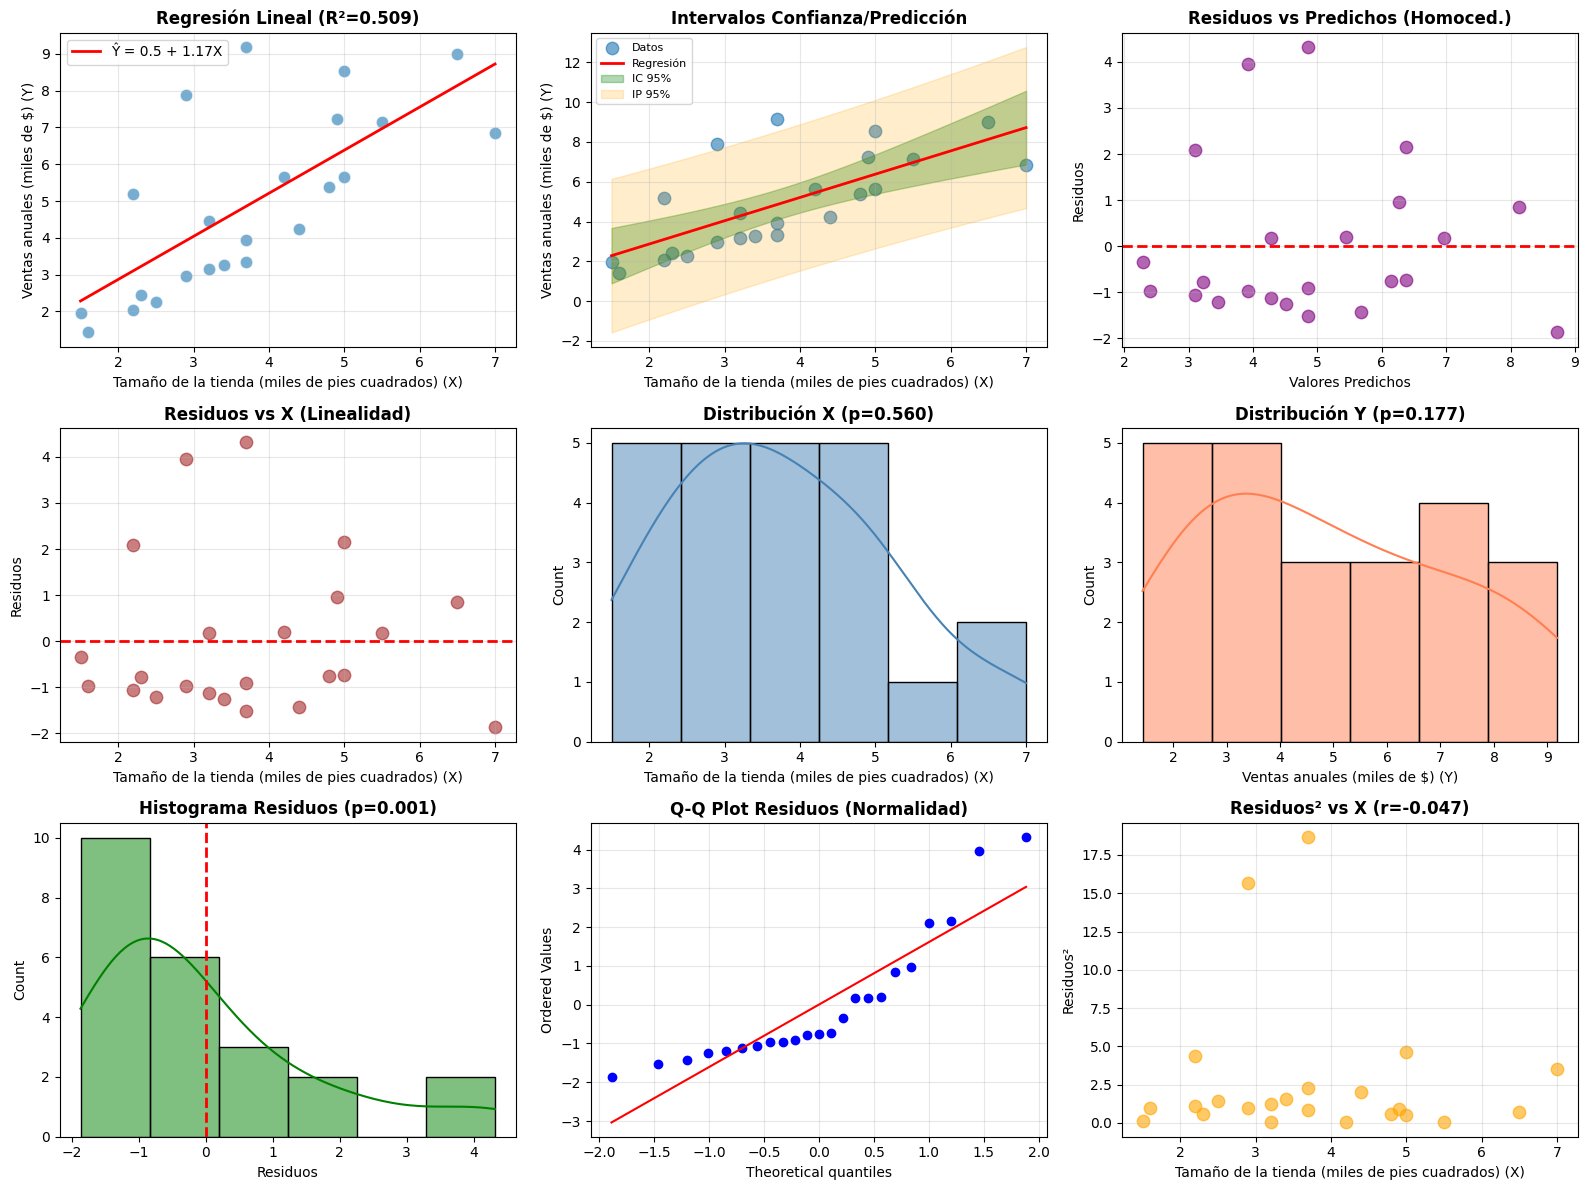


✓ ANÁLISIS COMPLETADO


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import numpy as np

# --- DATOS DEL PROBLEMA 4 (TAMAÑO DE TIENDA vs VENTAS) ---
data_ventas_tienda = {
    'Tamaño de la tienda (miles de pies cuadrados) (X)': [3.7, 5.0, 7.0, 6.5, 2.2, 5.5, 2.9, 4.2, 3.4, 2.5, 1.5, 3.7, 4.9, 3.2, 2.2, 1.6, 2.3, 2.9, 3.2, 3.7, 4.4, 4.8, 5.0],
    'Ventas anuales (miles de $) (Y)': [9.18, 8.54, 6.85, 8.98, 5.20, 7.15, 7.88, 5.65, 3.26, 2.25, 1.95, 3.34, 7.23, 4.45, 2.05, 1.43, 2.44, 2.95, 3.16, 3.95, 4.25, 5.39, 5.64]
}
df_ventas_tienda = pd.DataFrame(data_ventas_tienda)

var_x_tienda = 'Tamaño de la tienda (miles de pies cuadrados) (X)'
var_y_tienda = 'Ventas anuales (miles de $) (Y)'
n_tienda, alfa_tienda = len(df_ventas_tienda), 0.05

print("=" * 70)
print("    ANÁLISIS DE REGRESIÓN LINEAL - TAMAÑO DE TIENDA vs VENTAS")
print("=" * 70)
print(f"n={n_tienda} | α={alfa_tienda} | X={var_x_tienda} | Y={var_y_tienda}\n")

# --- ANÁLISIS DESCRIPTIVO ---
mean_x_tienda, mean_y_tienda = df_ventas_tienda[var_x_tienda].mean(), df_ventas_tienda[var_y_tienda].mean()
std_x_tienda, std_y_tienda = df_ventas_tienda[var_x_tienda].std(ddof=1), df_ventas_tienda[var_y_tienda].std(ddof=1)
min_x_tienda, max_x_tienda = df_ventas_tienda[var_x_tienda].min(), df_ventas_tienda[var_x_tienda].max()
min_y_tienda, max_y_tienda = df_ventas_tienda[var_y_tienda].min(), df_ventas_tienda[var_y_tienda].max()

# Correlaciones y Normalidad
pearson_tienda = df_ventas_tienda[var_x_tienda].corr(df_ventas_tienda[var_y_tienda])
spearman_tienda = df_ventas_tienda[var_x_tienda].corr(df_ventas_tienda[var_y_tienda], method='spearman')
shapiro_x_tienda = shapiro(df_ventas_tienda[var_x_tienda])
shapiro_y_tienda = shapiro(df_ventas_tienda[var_y_tienda])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---")
print(f"X: μ={mean_x_tienda:.2f}, σ={std_x_tienda:.2f}, rango=[{min_x_tienda}, {max_x_tienda}]")
print(f"Y: μ={mean_y_tienda:.2f}, σ={std_y_tienda:.2f}, rango=[{min_y_tienda}, {max_y_tienda}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_tienda.pvalue:.4f} {'✓ Normal' if shapiro_x_tienda.pvalue > alfa_tienda else '✗ No normal'}")
print(f"  Y: p={shapiro_y_tienda.pvalue:.4f} {'✓ Normal' if shapiro_y_tienda.pvalue > alfa_tienda else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_tienda:.4f} | Spearman={spearman_tienda:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_tienda) > 0.7 else 'Moderada' if abs(pearson_tienda) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_tienda > 0 else 'Negativa'}")

# --- PRUEBA DE HIPÓTESIS PARA CORRELACIÓN ---
gl_tienda = n_tienda - 2
try:
    t_corr_tienda = pearson_tienda * np.sqrt(n_tienda - 2) / np.sqrt(1 - pearson_tienda**2)
except ZeroDivisionError:
    t_corr_tienda = float('nan')
p_corr_tienda = t.sf(abs(t_corr_tienda), gl_tienda) * 2 if not np.isnan(t_corr_tienda) else float('nan')
t_crit_corr_tienda = t.ppf(1 - alfa_tienda/2, gl_tienda)

print(f"\n--- PRUEBA DE CORRELACIÓN ---")
print(f"H₀: ρ=0 vs H₁: ρ≠0 | t={t_corr_tienda:.3f}, t_crit=±{t_crit_corr_tienda:.3f}, p={p_corr_tienda:.4f}")
print(f"Decisión: {'✓ Rechazar H₀ - Correlación SIGNIFICATIVA' if p_corr_tienda < alfa_tienda else '✗ No rechazar H₀'}")

# --- REGRESIÓN Y PRUEBAS ---
b1_tienda = pearson_tienda * (std_y_tienda / std_x_tienda)
b0_tienda = mean_y_tienda - b1_tienda * mean_x_tienda
df_ventas_tienda['y_pred'] = b0_tienda + b1_tienda * df_ventas_tienda[var_x_tienda]
df_ventas_tienda['residuos'] = df_ventas_tienda[var_y_tienda] - df_ventas_tienda['y_pred']

# Errores y pruebas
SSE_tienda = ((df_ventas_tienda[var_y_tienda] - df_ventas_tienda['y_pred']) ** 2).sum()
SS_Total_tienda = ((df_ventas_tienda[var_y_tienda] - mean_y_tienda) ** 2).sum()
SSR_tienda = SS_Total_tienda - SSE_tienda
s_yx_tienda = np.sqrt(SSE_tienda / (n_tienda - 2))
suma_desv_x_tienda = ((df_ventas_tienda[var_x_tienda] - mean_x_tienda) ** 2).sum()
s_b_tienda = s_yx_tienda / np.sqrt(suma_desv_x_tienda)

# Estadísticos t y F
t_calc_tienda = b1_tienda / s_b_tienda
p_val_t_tienda = t.sf(abs(t_calc_tienda), gl_tienda) * 2  # dos colas
t_crit_pend_tienda = t.ppf(1 - alfa_tienda/2, gl_tienda)
F_calc_tienda = (SSR_tienda / 1) / (SSE_tienda / gl_tienda)
p_val_f_tienda = f_dist.sf(F_calc_tienda, 1, gl_tienda)
r2_tienda = 1 - (SSE_tienda / SS_Total_tienda)


print(f"\n--- MODELO DE REGRESIÓN ---")
print(f"Ecuación: Ŷ = {b0_tienda:.4f} + {b1_tienda:.4f}X")
print(f"  b₀ (intersección): {b0_tienda:.4f} → Ventas base para tamaño de tienda 0")
print(f"  b₁ (pendiente): {b1_tienda:.4f} → Por cada mil pies cuadrados adicionales, cambio en ventas anuales")
print(f"\nBondad de ajuste:")
print(f"  R² = {r2_tienda:.4f} ({r2_tienda*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_tienda:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (α={alfa_tienda}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_tienda:.3f}, t_crit=±{t_crit_pend_tienda:.3f}, p={p_val_t_tienda:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_tienda < alfa_tienda else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_tienda:.3f}, p={p_val_f_tienda:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_tienda < alfa_tienda else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA ---
print(f"\n--- TABLA ANOVA ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_tienda:<12.4f} {1:<6} {SSR_tienda:<12.4f} {F_calc_tienda:<10.3f} {p_val_f_tienda:<10.6f}")
print(f"{'Error':<12} {SSE_tienda:<12.4f} {gl_tienda:<6} {SSE_tienda/gl_tienda:<12.4f}")
print(f"{'Total':<12} {SS_Total_tienda:<12.4f} {n_tienda-1:<6}")

# --- SUPUESTOS DEL MODELO ---
print(f"\n{'='*70}")
print("--- VALIDACIÓN DE SUPUESTOS DEL MODELO ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gráfico)
print(f"\n1. LINEALIDAD:")
print(f"   • Correlación sugiere relación lineal: r={pearson_tienda:.4f}")
print(f"   • Revisar diagrama de dispersión para confirmar")
print(f"   → {'✓ Supuesto plausible' if abs(pearson_tienda) > 0.5 else '⚠ Revisar gráfico - correlación débil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   • No hay orden temporal en los datos")
print(f"   • Asumimos observaciones independientes entre tiendas")
print(f"   → ✓ Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_tienda = shapiro(df_ventas_tienda['residuos'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   • Shapiro-Wilk: W={shapiro_res_tienda.statistic:.4f}, p={shapiro_res_tienda.pvalue:.4f}")
print(f"   • Media residuos: {df_ventas_tienda['residuos'].mean():.4f} (debe ≈ 0)")
print(f"   → {'✓ Residuos normales' if shapiro_res_tienda.pvalue > alfa_tienda else '⚠ Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_ventas_tienda['res_std'] = df_ventas_tienda['residuos'] / s_yx_tienda
# Prueba de Breusch-Pagan simplificada: correlación entre residuos² y X
residuos_cuadrados_tienda = df_ventas_tienda['residuos'] ** 2
corr_hetero_tienda = df_ventas_tienda[var_x_tienda].corr(residuos_cuadrados_tienda)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_tienda >= 4:
    mediana_x_tienda = df_ventas_tienda[var_x_tienda].median()
    grupo1_tienda = df_ventas_tienda[df_ventas_tienda[var_x_tienda] <= mediana_x_tienda]['residuos'].abs()
    grupo2_tienda = df_ventas_tienda[df_ventas_tienda[var_x_tienda] > mediana_x_tienda]['residuos'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_tienda) > 0 and len(grupo2_tienda) > 0:
        levene_stat_tienda, levene_p_tienda = levene(grupo1_tienda, grupo2_tienda)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   • Test de Levene: W={levene_stat_tienda:.4f}, p={levene_p_tienda:.4f}")
        print(f"   • Correlación |residuos| vs X: {corr_hetero_tienda:.4f}")
        print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_tienda > alfa_tienda and abs(corr_hetero_tienda) < 0.3:
            print(f"   → ✓ Homocedasticidad cumplida")
        elif levene_p_tienda <= alfa_tienda:
            print(f"   → ⚠ Posible heterocedasticidad detectada")
        else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   • No se puede realizar el test de Levene con los grupos formados.")
         print(f"   • Correlación |residuos| vs X: {corr_hetero_tienda:.4f}")
         print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(corr_hetero_tienda) < 0.3:
             print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
         else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   • Tamaño de muestra ({n_tienda}) muy pequeño para test de Levene.")
    print(f"   • Correlación |residuos| vs X: {corr_hetero_tienda:.4f}")
    print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(corr_hetero_tienda) < 0.3:
        print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
    else:
        print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")


# 5. OUTLIERS
outliers_tienda = df_ventas_tienda[np.abs(df_ventas_tienda['res_std']) > 2.5]
print(f"\n5. VALORES ATÍPICOS (OUTLIERS):")
print(f"   • Outliers (|res_std| > 2.5): {len(outliers_tienda)}/{n_tienda} ({len(outliers_tienda)/n_tienda*100:.1f}%)")
if len(outliers_tienda) > 0:
    for idx, row in outliers_tienda.iterrows():
        print(f"     • Tienda {idx+1}: res_std={row['res_std']:.2f}") # Assuming row index corresponds to store number
print(f"   → {'✓ Sin outliers significativos' if len(outliers_tienda) == 0 else '⚠ Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_tienda = True
if n_tienda >= 4:
    mediana_x_tienda_check = df_ventas_tienda[var_x_tienda].median()
    grupo1_tienda_check = df_ventas_tienda[df_ventas_tienda[var_x_tienda] <= mediana_x_tienda_check]['residuos'].abs()
    grupo2_tienda_check = df_ventas_tienda[df_ventas_tienda[var_x_tienda] > mediana_x_tienda_check]['residuos'].abs()
    if len(grupo1_tienda_check) == 0 or len(grupo2_tienda_check) == 0:
        levene_check_tienda = False
    else:
        levene_check_tienda = levene_p_tienda > alfa_tienda and abs(corr_hetero_tienda) < 0.3
else:
    levene_check_tienda = abs(corr_hetero_tienda) < 0.3 # Rely on correlation for small sample


supuestos_ok_tienda = (
    abs(pearson_tienda) > 0.5 and
    shapiro_res_tienda.pvalue > alfa_tienda and
    levene_check_tienda and
    len(outliers_tienda) <= n_tienda * 0.15
)


print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS: {'✓ TODOS CUMPLIDOS' if supuestos_ok_tienda else '⚠ REVISAR SUPUESTOS'}")
print(f"{'='*70}")


# --- INTERVALOS (ejemplos) ---
t_crit_tienda = t.ppf(1 - alfa_tienda/2, gl_tienda)
x_ejemplos_tienda = [3.0, 5.0, 7.0] # Ejemplos de tamaño de tienda


print(f"\n--- INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%) ---")
print(f"{'X':<8} {'Ŷ':<10} {'IC Media':<25} {'IP Individual':<25}")
print("-" * 68)

for x_val in x_ejemplos_tienda:
    y_pred = b0_tienda + b1_tienda * x_val

    # IC para la media
    error_conf = np.sqrt((1/n_tienda) + ((x_val - mean_x_tienda)**2 / suma_desv_x_tienda))
    margen_conf = t_crit_tienda * s_yx_tienda * error_conf
    ic_inf, ic_sup = y_pred - margen_conf, y_pred + margen_conf

    # IP individual
    error_pred = np.sqrt(1 + (1/n_tienda) + ((x_val - mean_x_tienda)**2 / suma_desv_x_tienda))
    margen_pred = t_crit_tienda * s_yx_tienda * error_pred
    ip_inf, ip_sup = y_pred - margen_pred, y_pred + margen_pred

    print(f"{x_val:<8.1f} {y_pred:<10.2f} [{ic_inf:.1f}, {ic_sup:.1f}]{'':>10} [{ip_inf:.1f}, {ip_sup:.1f}]")


# --- EVALUACIÓN DE TRANSFORMACIÓN ---
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? ---")
necesita_tienda = False
razones_tienda = []

if shapiro_x_tienda.pvalue <= alfa_tienda or shapiro_y_tienda.pvalue <= alfa_tienda:
    razones_tienda.append("Variables originales no normales")
    necesita_tienda = True
if shapiro_res_tienda.pvalue <= alfa_tienda:
    razones_tienda.append("Residuos no normales")
    necesita_tienda = True
if n_tienda >= 4 and (levene_p_tienda <= alfa_tienda or abs(corr_hetero_tienda) >= 0.3):
    razones_tienda.append("Posible heterocedasticidad")
    necesita_tienda = True
elif n_tienda < 4 and abs(corr_hetero_tienda) >= 0.3:
     razones_tienda.append("Posible heterocedasticidad (basado en correlación)")
     necesita_tienda = True

if abs(pearson_tienda) < 0.5:
    razones_tienda.append(f"Correlación débil (r={pearson_tienda:.3f})")
    necesita_tienda = True
if len(outliers_tienda) > n_tienda * 0.15:
    razones_tienda.append(f"Exceso de outliers ({len(outliers_tienda)})")
    necesita_tienda = True

if necesita_tienda:
    print("⚠ CONSIDERAR TRANSFORMACIÓN:")
    for r in razones_tienda:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas:")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - √Y: para datos de conteo con varianza proporcional a media")
    print("    - 1/Y: para relaciones no lineales decrecientes")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")


# --- RESUMEN EJECUTIVO ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO")
print(f"{'='*70}")
print(f"""
📊 MODELO: Ŷ = {b0_tienda:.2f} + {b1_tienda:.3f}X
   Interpretación: Por cada mil pies cuadrados adicionales → {b1_tienda:.3f} cambio en ventas anuales

📈 BONDAD DE AJUSTE:
   • R² = {r2_tienda:.3f} ({r2_tienda*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_tienda) > 0.7 else 'moderada' if abs(pearson_tienda) > 0.4 else 'débil'}: r = {pearson_tienda:.3f}
   • Error típico de predicción: ±{s_yx_tienda:.2f} miles de $ en ventas

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_tienda < alfa_tienda else '✗ No significativa'} (p={p_corr_tienda:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_tienda < alfa_tienda else '✗ No significativa'} (p={p_val_t_tienda:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_tienda < alfa_tienda else '✗ No significativo'} (p={p_val_f_tienda:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_tienda) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_tienda.pvalue > alfa_tienda else '⚠'} (p={shapiro_res_tienda.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_tienda>=4 and levene_p_tienda > alfa_tienda and abs(corr_hetero_tienda) < 0.3) or (n_tienda<4 and abs(corr_hetero_tienda) < 0.3) else '⚠'} (Levene p={levene_p_tienda:.3f} if n_tienda>=4 and len(grupo1_tienda)>0 and len(grupo2_tienda)>0 else 'N/A')
   • Outliers: {len(outliers_tienda)}/{n_tienda} → {'✓ Aceptable' if len(outliers_tienda) <= n_tienda*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")

if p_val_t_tienda < alfa_tienda and p_val_f_tienda < alfa_tienda and supuestos_ok_tienda:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo cumple los supuestos y las pruebas estadísticas confirman
   que el tamaño de la tienda es un predictor significativo de las ventas anuales.
""")
elif p_val_t_tienda < alfa_tienda and p_val_f_tienda < alfa_tienda:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, algunos supuestos podrían no cumplirse.
   Revisar los gráficos y la validación de supuestos. Considerar:
   • Recolectar más datos.
   • Explorar transformaciones de datos si los supuestos fallan.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable. Se recomienda:
   • Recolectar más datos o mejorar calidad de datos
   • Considerar otras variables explicativas (ej: ubicación, marketing)
   • Explorar modelos alternativos (no lineal, multivariado)
""")

print("\n" + "=" * 70)


# --- GRÁFICOS ---
fig = plt.figure(figsize=(16, 12))

# 1. Dispersión con regresión
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_tienda, y=var_y_tienda, data=df_ventas_tienda, s=80, alpha=0.6)
x_line_tienda = np.linspace(df_ventas_tienda[var_x_tienda].min(), df_ventas_tienda[var_x_tienda].max(), 100)
y_line_tienda = b0_tienda + b1_tienda * x_line_tienda
plt.plot(x_line_tienda, y_line_tienda, 'r-', lw=2, label=f'Ŷ = {b0_tienda:.1f} + {b1_tienda:.2f}X')
plt.title(f'Regresión Lineal (R²={r2_tienda:.3f})', fontweight='bold')
plt.xlabel(var_x_tienda)
plt.ylabel(var_y_tienda)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_ventas_tienda[var_x_tienda], df_ventas_tienda[var_y_tienda], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_tienda, y_line_tienda, 'r-', lw=2, label='Regresión')

# Calcular bandas
ic_lower_tienda, ic_upper_tienda = [], []
ip_lower_tienda, ip_upper_tienda = [], []
for x_val in x_line_tienda:
    y_p = b0_tienda + b1_tienda * x_val
    e_conf = np.sqrt((1/n_tienda) + ((x_val - mean_x_tienda)**2 / suma_desv_x_tienda))
    e_pred = np.sqrt(1 + (1/n_tienda) + ((x_val - mean_x_tienda)**2 / suma_desv_x_tienda))
    ic_lower_tienda.append(y_p - t_crit_tienda * s_yx_tienda * e_conf)
    ic_upper_tienda.append(y_p + t_crit_tienda * s_yx_tienda * e_conf)
    ip_lower_tienda.append(y_p - t_crit_tienda * s_yx_tienda * e_pred)
    ip_upper_tienda.append(y_p + t_crit_tienda * s_yx_tienda * e_pred)

plt.fill_between(x_line_tienda, ic_lower_tienda, ic_upper_tienda, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_tienda, ip_lower_tienda, ip_upper_tienda, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción', fontweight='bold')
plt.xlabel(var_x_tienda)
plt.ylabel(var_y_tienda)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_ventas_tienda['y_pred'], df_ventas_tienda['residuos'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Homoced.)', fontweight='bold')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 4. Residuos vs X
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_ventas_tienda[var_x_tienda], df_ventas_tienda['residuos'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Linealidad)', fontweight='bold')
plt.xlabel(var_x_tienda)
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 5. Histograma X
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_ventas_tienda[var_x_tienda], kde=True, color='steelblue')
plt.title(f'Distribución X (p={shapiro_x_tienda.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_tienda)

# 6. Histograma Y
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_ventas_tienda[var_y_tienda], kde=True, color='coral')
plt.title(f'Distribución Y (p={shapiro_y_tienda.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_tienda)

# 7. Histograma Residuos
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_ventas_tienda['residuos'], kde=True, color='green')
plt.axvline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (p={shapiro_res_tienda.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos')

# 8. Q-Q Plot Residuos
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_ventas_tienda['residuos'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Normalidad)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_ventas_tienda[var_x_tienda], residuos_cuadrados_tienda, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (r={corr_hetero_tienda:.3f})', fontweight='bold')
plt.xlabel(var_x_tienda)
plt.ylabel('Residuos²')
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()


print("\n✓ ANÁLISIS COMPLETADO")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import numpy as np

var_x_bacterias = 'Tiempo (horas)'
var_y_bacterias = 'Población (miles)'
n_bacterias, alfa_bacterias = len(df_bacterias), 0.05

print("=" * 70)
print("     ANÁLISIS DE REGRESIÓN LINEAL SIMPLE - CRECIMIENTO BACTERIANO")
print("=" * 70)
print(f"n={n_bacterias} | α={alfa_bacterias} | X={var_x_bacterias} | Y={var_y_bacterias}\n")

# --- ANÁLISIS DESCRIPTIVO ---
mean_x_bacterias, mean_y_bacterias = df_bacterias[var_x_bacterias].mean(), df_bacterias[var_y_bacterias].mean()
std_x_bacterias, std_y_bacterias = df_bacterias[var_x_bacterias].std(ddof=1), df_bacterias[var_y_bacterias].std(ddof=1)
min_x_bacterias, max_x_bacterias = df_bacterias[var_x_bacterias].min(), df_bacterias[var_x_bacterias].max()
min_y_bacterias, max_y_bacterias = df_bacterias[var_y_bacterias].min(), df_bacterias[var_y_bacterias].max()

# Correlaciones y Normalidad
pearson_bacterias = df_bacterias[var_x_bacterias].corr(df_bacterias[var_y_bacterias])
spearman_bacterias = df_bacterias[var_x_bacterias].corr(df_bacterias[var_y_bacterias], method='spearman')
shapiro_x_bacterias = shapiro(df_bacterias[var_x_bacterias])
shapiro_y_bacterias = shapiro(df_bacterias[var_y_bacterias])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---")
print(f"X: μ={mean_x_bacterias:.2f}, σ={std_x_bacterias:.2f}, rango=[{min_x_bacterias}, {max_x_bacterias}]")
print(f"Y: μ={mean_y_bacterias:.2f}, σ={std_y_bacterias:.2f}, rango=[{min_y_bacterias}, {max_y_bacterias}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_bacterias.pvalue:.4f} {'✓ Normal' if shapiro_x_bacterias.pvalue > alfa_bacterias else '✗ No normal'}")
print(f"  Y: p={shapiro_y_bacterias.pvalue:.4f} {'✓ Normal' if shapiro_y_bacterias.pvalue > alfa_bacterias else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_bacterias:.4f} | Spearman={spearman_bacterias:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_bacterias) > 0.7 else 'Moderada' if abs(pearson_bacterias) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_bacterias > 0 else 'Negativa'}")

# --- PRUEBA DE HIPÓTESIS PARA CORRELACIÓN ---
gl_bacterias = n_bacterias - 2
try:
    t_corr_bacterias = pearson_bacterias * np.sqrt(n_bacterias - 2) / np.sqrt(1 - pearson_bacterias**2)
except ZeroDivisionError:
    t_corr_bacterias = float('nan')
p_corr_bacterias = t.sf(abs(t_corr_bacterias), gl_bacterias) * 2 if not np.isnan(t_corr_bacterias) else float('nan')
t_crit_corr_bacterias = t.ppf(1 - alfa_bacterias/2, gl_bacterias)

print(f"\n--- PRUEBA DE CORRELACIÓN ---")
print(f"H₀: ρ=0 vs H₁: ρ≠0 | t={t_corr_bacterias:.3f}, t_crit=±{t_crit_corr_bacterias:.3f}, p={p_corr_bacterias:.4f}")
print(f"Decisión: {'✓ Rechazar H₀ - Correlación SIGNIFICATIVA' if p_corr_bacterias < alfa_bacterias else '✗ No rechazar H₀'}")

# --- REGRESIÓN Y PRUEBAS ---
b1_bacterias = pearson_bacterias * (std_y_bacterias / std_x_bacterias)
b0_bacterias = mean_y_bacterias - b1_bacterias * mean_x_bacterias
df_bacterias['y_pred_linear'] = b0_bacterias + b1_bacterias * df_bacterias[var_x_bacterias]
df_bacterias['residuos_linear'] = df_bacterias[var_y_bacterias] - df_bacterias['y_pred_linear']

# Errores y pruebas
SSE_bacterias = ((df_bacterias[var_y_bacterias] - df_bacterias['y_pred_linear']) ** 2).sum()
SS_Total_bacterias = ((df_bacterias[var_y_bacterias] - mean_y_bacterias) ** 2).sum()
SSR_bacterias = SS_Total_bacterias - SSE_bacterias
s_yx_bacterias = np.sqrt(SSE_bacterias / (n_bacterias - 2))
suma_desv_x_bacterias = ((df_bacterias[var_x_bacterias] - mean_x_bacterias) ** 2).sum()
s_b_bacterias = s_yx_bacterias / np.sqrt(suma_desv_x_bacterias)

# Estadísticos t y F
t_calc_bacterias = b1_bacterias / s_b_bacterias
p_val_t_bacterias = t.sf(abs(t_calc_bacterias), gl_bacterias) * 2  # dos colas
t_crit_pend_bacterias = t.ppf(1 - alfa_bacterias/2, gl_bacterias)
F_calc_bacterias = (SSR_bacterias / 1) / (SSE_bacterias / gl_bacterias)
p_val_f_bacterias = f_dist.sf(F_calc_bacterias, 1, gl_bacterias)
r2_bacterias = 1 - (SSE_bacterias / SS_Total_bacterias)


print(f"\n--- MODELO DE REGRESIÓN LINEAL SIMPLE ---")
print(f"Ecuación: Ŷ = {b0_bacterias:.4f} + {b1_bacterias:.4f}X")
print(f"  b₀ (intersección): {b0_bacterias:.4f} → Población inicial (miles)")
print(f"  b₁ (pendiente): {b1_bacterias:.4f} → Cambio en población por hora (miles)")
print(f"\nBondad de ajuste:")
print(f"  R² = {r2_bacterias:.4f} ({r2_bacterias*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_bacterias:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (α={alfa_bacterias}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_bacterias:.3f}, t_crit=±{t_crit_pend_bacterias:.3f}, p={p_val_t_bacterias:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_bacterias < alfa_bacterias else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_bacterias:.3f}, p={p_val_f_bacterias:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_bacterias < alfa_bacterias else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA ---
print(f"\n--- TABLA ANOVA ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_bacterias:<12.4f} {1:<6} {SSR_bacterias:<12.4f} {F_calc_bacterias:<10.3f} {p_val_f_bacterias:<10.6f}")
print(f"{'Error':<12} {SSE_bacterias:<12.4f} {gl_bacterias:<6} {SSE_bacterias/gl_bacterias:<12.4f}")
print(f"{'Total':<12} {SS_Total_bacterias:<12.4f} {n_bacterias-1:<6}")

     ANÁLISIS DE REGRESIÓN LINEAL SIMPLE - CRECIMIENTO BACTERIANO
n=11 | α=0.05 | X=Tiempo (horas) | Y=Población (miles)

--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---
X: μ=5.00, σ=3.32, rango=[0, 10]
Y: μ=5523.64, σ=6653.39, rango=[10, 18000]

Normalidad (Shapiro-Wilk):
  X: p=0.8698 ✓ Normal
  Y: p=0.0143 ✗ No normal

Correlación: Pearson=0.9206 | Spearman=1.0000
Magnitud: Fuerte | Dirección: Positiva

--- PRUEBA DE CORRELACIÓN ---
H₀: ρ=0 vs H₁: ρ≠0 | t=7.073, t_crit=±2.262, p=0.0001
Decisión: ✓ Rechazar H₀ - Correlación SIGNIFICATIVA

--- MODELO DE REGRESIÓN LINEAL SIMPLE ---
Ecuación: Ŷ = -3710.4545 + 1846.8182X
  b₀ (intersección): -3710.4545 → Población inicial (miles)
  b₁ (pendiente): 1846.8182 → Cambio en población por hora (miles)

Bondad de ajuste:
  R² = 0.8475 (84.8% variabilidad explicada)
  Error estándar (s_y,x) = 2738.5183

--- PRUEBAS DE SIGNIFICANCIA (α=0.05) ---
1. Pendiente: H₀: β=0 vs H₁: β≠0
   t=7.073, t_crit=±2.262, p=0.0001
   → ✓ Pendiente SIGNIFICATIVA

2

# Task
The original user task is to analyze bacterial growth data using linear regression, compare the results with a log-transformed model, and recommend the best model for prediction.

## Initial Linear Regression Analysis for Bacterial Growth

### Subtask:
Define the bacterial growth data. Perform descriptive statistics, correlation analysis, and an initial linear regression. Calculate model parameters (slope, intercept, R-squared), conduct significance tests (t-test for slope, F-test for model via ANOVA), and an ANOVA table. Analyze residuals for normality, homoscedasticity, and identify outliers. Generate all relevant plots for the original linear model (scatterplot with regression line, residuals vs. predicted, residuals vs. X, histograms of residuals, Q-Q plot of residuals, and residuals squared vs. X).


**Reasoning**:
The subtask requires defining the DataFrame `df_bacterias` and then performing a complete linear regression analysis, including descriptive statistics, correlation analysis, model fitting, significance tests, ANOVA, assumption validation, interval calculations, transformation evaluation, an executive summary, and all specified plots. I will generate a comprehensive code block to cover all these steps.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import numpy as np

# --- DATOS DEL PROBLEMA 5 (CRECIMIENTO BACTERIANO) ---
data_bacterias = {
    'Tiempo (horas)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Población (miles)': [10, 50, 200, 500, 1000, 2000, 4000, 8000, 12000, 15000, 18000]
}
df_bacterias = pd.DataFrame(data_bacterias)

var_x_bacterias = 'Tiempo (horas)'
var_y_bacterias = 'Población (miles)'
n_bacterias, alfa_bacterias = len(df_bacterias), 0.05

print("=" * 70)
print("     ANÁLISIS DE REGRESIÓN LINEAL SIMPLE - CRECIMIENTO BACTERIANO")
print("=" * 70)
print(f"n={n_bacterias} | α={alfa_bacterias} | X={var_x_bacterias} | Y={var_y_bacterias}\n")

# --- ANÁLISIS DESCRIPTIVO ---
mean_x_bacterias, mean_y_bacterias = df_bacterias[var_x_bacterias].mean(), df_bacterias[var_y_bacterias].mean()
std_x_bacterias, std_y_bacterias = df_bacterias[var_x_bacterias].std(ddof=1), df_bacterias[var_y_bacterias].std(ddof=1)
min_x_bacterias, max_x_bacterias = df_bacterias[var_x_bacterias].min(), df_bacterias[var_x_bacterias].max()
min_y_bacterias, max_y_bacterias = df_bacterias[var_y_bacterias].min(), df_bacterias[var_y_bacterias].max()

# Correlaciones y Normalidad
pearson_bacterias = df_bacterias[var_x_bacterias].corr(df_bacterias[var_y_bacterias])
spearman_bacterias = df_bacterias[var_x_bacterias].corr(df_bacterias[var_y_bacterias], method='spearman')
shapiro_x_bacterias = shapiro(df_bacterias[var_x_bacterias])
shapiro_y_bacterias = shapiro(df_bacterias[var_y_bacterias])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---")
print(f"X: μ={mean_x_bacterias:.2f}, σ={std_x_bacterias:.2f}, rango=[{min_x_bacterias}, {max_x_bacterias}]")
print(f"Y: μ={mean_y_bacterias:.2f}, σ={std_y_bacterias:.2f}, rango=[{min_y_bacterias}, {max_y_bacterias}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_bacterias.pvalue:.4f} {'✓ Normal' if shapiro_x_bacterias.pvalue > alfa_bacterias else '✗ No normal'}")
print(f"  Y: p={shapiro_y_bacterias.pvalue:.4f} {'✓ Normal' if shapiro_y_bacterias.pvalue > alfa_bacterias else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_bacterias:.4f} | Spearman={spearman_bacterias:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_bacterias) > 0.7 else 'Moderada' if abs(pearson_bacterias) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_bacterias > 0 else 'Negativa'}")

# --- PRUEBA DE HIPÓTESIS PARA CORRELACIÓN ---
gl_bacterias = n_bacterias - 2
try:
    t_corr_bacterias = pearson_bacterias * np.sqrt(n_bacterias - 2) / np.sqrt(1 - pearson_bacterias**2)
except ZeroDivisionError:
    t_corr_bacterias = float('nan')
p_corr_bacterias = t.sf(abs(t_corr_bacterias), gl_bacterias) * 2 if not np.isnan(t_corr_bacterias) else float('nan')
t_crit_corr_bacterias = t.ppf(1 - alfa_bacterias/2, gl_bacterias)

print(f"\n--- PRUEBA DE CORRELACIÓN ---")
print(f"H₀: ρ=0 vs H₁: ρ≠0 | t={t_corr_bacterias:.3f}, t_crit=±{t_crit_corr_bacterias:.3f}, p={p_corr_bacterias:.4f}")
print(f"Decisión: {'✓ Rechazar H₀ - Correlación SIGNIFICATIVA' if p_corr_bacterias < alfa_bacterias else '✗ No rechazar H₀'}")

# --- REGRESIÓN Y PRUEBAS ---
b1_bacterias = pearson_bacterias * (std_y_bacterias / std_x_bacterias)
b0_bacterias = mean_y_bacterias - b1_bacterias * mean_x_bacterias
df_bacterias['y_pred_linear'] = b0_bacterias + b1_bacterias * df_bacterias[var_x_bacterias]
df_bacterias['residuos_linear'] = df_bacterias[var_y_bacterias] - df_bacterias['y_pred_linear']

# Errores y pruebas
SSE_bacterias = ((df_bacterias[var_y_bacterias] - df_bacterias['y_pred_linear']) ** 2).sum()
SS_Total_bacterias = ((df_bacterias[var_y_bacterias] - mean_y_bacterias) ** 2).sum()
SSR_bacterias = SS_Total_bacterias - SSE_bacterias
s_yx_bacterias = np.sqrt(SSE_bacterias / (n_bacterias - 2))
suma_desv_x_bacterias = ((df_bacterias[var_x_bacterias] - mean_x_bacterias) ** 2).sum()
s_b_bacterias = s_yx_bacterias / np.sqrt(suma_desv_x_bacterias)

# Estadísticos t y F
t_calc_bacterias = b1_bacterias / s_b_bacterias
p_val_t_bacterias = t.sf(abs(t_calc_bacterias), gl_bacterias) * 2  # dos colas
t_crit_pend_bacterias = t.ppf(1 - alfa_bacterias/2, gl_bacterias)
F_calc_bacterias = (SSR_bacterias / 1) / (SSE_bacterias / gl_bacterias)
p_val_f_bacterias = f_dist.sf(F_calc_bacterias, 1, gl_bacterias)
r2_bacterias = 1 - (SSE_bacterias / SS_Total_bacterias)


print(f"\n--- MODELO DE REGRESIÓN LINEAL SIMPLE ---")
print(f"Ecuación: Ŷ = {b0_bacterias:.4f} + {b1_bacterias:.4f}X")
print(f"  b₀ (intersección): {b0_bacterias:.4f} → Población inicial (miles)")
print(f"  b₁ (pendiente): {b1_bacterias:.4f} → Cambio en población por hora (miles)")
print(f"\nBondad de ajuste:")
print(f"  R² = {r2_bacterias:.4f} ({r2_bacterias*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_bacterias:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (α={alfa_bacterias}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_bacterias:.3f}, t_crit=±{t_crit_pend_bacterias:.3f}, p={p_val_t_bacterias:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_bacterias < alfa_bacterias else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_bacterias:.3f}, p={p_val_f_bacterias:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_bacterias < alfa_bacterias else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA ---
print(f"\n--- TABLA ANOVA ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_bacterias:<12.4f} {1:<6} {SSR_bacterias:<12.4f} {F_calc_bacterias:<10.3f} {p_val_f_bacterias:<10.6f}")
print(f"{'Error':<12} {SSE_bacterias:<12.4f} {gl_bacterias:<6} {SSE_bacterias/gl_bacterias:<12.4f}")
print(f"{'Total':<12} {SS_Total_bacterias:<12.4f} {n_bacterias-1:<6}")

# --- SUPUESTOS DEL MODELO ---
print(f"\n{'='*70}")
print("--- VALIDACIÓN DE SUPUESTOS DEL MODELO ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gráfico)
print(f"\n1. LINEALIDAD:")
print(f"   • Correlación sugiere relación lineal: r={pearson_bacterias:.4f}")
print(f"   • Revisar diagrama de dispersión para confirmar")
print(f"   → {'✓ Supuesto plausible' if abs(pearson_bacterias) > 0.5 else '⚠ Revisar gráfico - correlación débil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   • No hay orden temporal en los datos")
print(f"   • Asumimos observaciones independientes entre puntos de tiempo")
print(f"   → ✓ Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_bacterias = shapiro(df_bacterias['residuos_linear'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   • Shapiro-Wilk: W={shapiro_res_bacterias.statistic:.4f}, p={shapiro_res_bacterias.pvalue:.4f}")
print(f"   • Media residuos: {df_bacterias['residuos_linear'].mean():.4f} (debe ≈ 0)")
print(f"   → {'✓ Residuos normales' if shapiro_res_bacterias.pvalue > alfa_bacterias else '⚠ Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_bacterias['res_std'] = df_bacterias['residuos_linear'] / s_yx_bacterias
# Prueba de Breusch-Pagan simplificada: correlación entre residuos² y X
residuos_cuadrados_bacterias = df_bacterias['residuos_linear'] ** 2
corr_hetero_bacterias = df_bacterias[var_x_bacterias].corr(residuos_cuadrados_bacterias)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_bacterias >= 4:
    mediana_x_bacterias = df_bacterias[var_x_bacterias].median()
    grupo1_bacterias = df_bacterias[df_bacterias[var_x_bacterias] <= mediana_x_bacterias]['residuos_linear'].abs()
    grupo2_bacterias = df_bacterias[df_bacterias[var_x_bacterias] > mediana_x_bacterias]['residuos_linear'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_bacterias) > 0 and len(grupo2_bacterias) > 0:
        levene_stat_bacterias, levene_p_bacterias = levene(grupo1_bacterias, grupo2_bacterias)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   • Test de Levene: W={levene_stat_bacterias:.4f}, p={levene_p_bacterias:.4f}")
        print(f"   • Correlación |residuos| vs X: {corr_hetero_bacterias:.4f}")
        print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_bacterias > alfa_bacterias and abs(corr_hetero_bacterias) < 0.3:
            print(f"   → ✓ Homocedasticidad cumplida")
        elif levene_p_bacterias <= alfa_bacterias:
            print(f"   → ⚠ Posible heterocedasticidad detectada")
        else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   • No se puede realizar el test de Levene con los grupos formados.")
         print(f"   • Correlación |residuos| vs X: {corr_hetero_bacterias:.4f}")
         print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(corr_hetero_bacterias) < 0.3:
             print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
         else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   • Tamaño de muestra ({n_bacterias}) muy pequeño para test de Levene.")
    print(f"   • Correlación |residuos| vs X: {corr_hetero_bacterias:.4f}")
    print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(corr_hetero_bacterias) < 0.3:
        print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
    else:
        print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")


# 5. OUTLIERS
outliers_bacterias = df_bacterias[np.abs(df_bacterias['res_std']) > 2.5]
print(f"\n5. VALORES ATÍPICOS (OUTLIERS):")
print(f"   • Outliers (|res_std| > 2.5): {len(outliers_bacterias)}/{n_bacterias} ({len(outliers_bacterias)/n_bacterias*100:.1f}%)")
if len(outliers_bacterias) > 0:
    for idx, row in outliers_bacterias.iterrows():
        print(f"     • Punto {idx+1}: res_std={row['res_std']:.2f}")
print(f"   → {'✓ Sin outliers significativos' if len(outliers_bacterias) == 0 else '⚠ Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_bacterias = True
if n_bacterias >= 4:
    mediana_x_bacterias_check = df_bacterias[var_x_bacterias].median()
    grupo1_bacterias_check = df_bacterias[df_bacterias[var_x_bacterias] <= mediana_x_bacterias_check]['residuos_linear'].abs()
    grupo2_bacterias_check = df_bacterias[df_bacterias[var_x_bacterias] > mediana_x_bacterias_check]['residuos_linear'].abs()
    if len(grupo1_bacterias_check) == 0 or len(grupo2_bacterias_check) == 0:
        levene_check_bacterias = False
    else:
        levene_check_bacterias = levene_p_bacterias > alfa_bacterias and abs(corr_hetero_bacterias) < 0.3
else:
    levene_check_bacterias = abs(corr_hetero_bacterias) < 0.3 # Rely on correlation for small sample

supuestos_ok_bacterias = (
    abs(pearson_bacterias) > 0.5 and
    shapiro_res_bacterias.pvalue > alfa_bacterias and
    levene_check_bacterias and
    len(outliers_bacterias) <= n_bacterias * 0.15
)

print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS: {'✓ TODOS CUMPLIDOS' if supuestos_ok_bacterias else '⚠ REVISAR SUPUESTOS'}")
print(f"{'='*70}")


# --- INTERVALOS (ejemplos) ---
t_crit_bacterias = t.ppf(1 - alfa_bacterias/2, gl_bacterias)
x_ejemplos_bacterias = [3, 6, 9] # Ejemplos de tiempo


print(f"\n--- INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%) ---")
print(f"{'X':<8} {'Ŷ':<10} {'IC Media':<25} {'IP Individual':<25}")
print("-" * 68)

for x_val in x_ejemplos_bacterias:
    y_pred = b0_bacterias + b1_bacterias * x_val

    # IC para la media
    error_conf = np.sqrt((1/n_bacterias) + ((x_val - mean_x_bacterias)**2 / suma_desv_x_bacterias))
    margen_conf = t_crit_bacterias * s_yx_bacterias * error_conf
    ic_inf, ic_sup = y_pred - margen_conf, y_pred + margen_conf

    # IP individual
    error_pred = np.sqrt(1 + (1/n_bacterias) + ((x_val - mean_x_bacterias)**2 / suma_desv_x_bacterias))
    margen_pred = t_crit_bacterias * s_yx_bacterias * error_pred
    ip_inf, ip_sup = y_pred - margen_pred, y_pred + margen_pred

    print(f"{x_val:<8} {y_pred:<10.2f} [{ic_inf:.1f}, {ic_sup:.1f}]{'':>10} [{ip_inf:.1f}, {ip_sup:.1f}]")


# --- EVALUACIÓN DE TRANSFORMACIÓN ---
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? ---")
necesita_bacterias = False
razones_bacterias = []

if shapiro_x_bacterias.pvalue <= alfa_bacterias or shapiro_y_bacterias.pvalue <= alfa_bacterias:
    razones_bacterias.append("Variables originales no normales")
    necesita_bacterias = True
if shapiro_res_bacterias.pvalue <= alfa_bacterias:
    razones_bacterias.append("Residuos no normales")
    necesita_bacterias = True
if n_bacterias >= 4 and (levene_p_bacterias <= alfa_bacterias or abs(corr_hetero_bacterias) >= 0.3):
    razones_bacterias.append("Posible heterocedasticidad")
    necesita_bacterias = True
elif n_bacterias < 4 and abs(corr_hetero_bacterias) >= 0.3:
     razones_bacterias.append("Posible heterocedasticidad (basado en correlación)")
     necesita_bacterias = True

if abs(pearson_bacterias) < 0.5:
    razones_bacterias.append(f"Correlación débil (r={pearson_bacterias:.3f})")
    necesita_bacterias = True
if len(outliers_bacterias) > n_bacterias * 0.15:
    razones_bacterias.append(f"Exceso de outliers ({len(outliers_bacterias)})")
    necesita_bacterias = True

if necesita_bacterias:
    print("⚠ CONSIDERAR TRANSFORMACIÓN:")
    for r in razones_bacterias:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas:")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - √Y: para datos de conteo con varianza proporcional a media")
    print("    - 1/Y: para relaciones no lineales decrecientes")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")


# --- RESUMEN EJECUTIVO ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO")
print(f"{'='*70}")
print(f"""
📊 MODELO: Ŷ = {b0_bacterias:.2f} + {b1_bacterias:.3f}X
   Interpretación: Por cada hora adicional → {b1_bacterias:.3f} cambio en población (miles)

📈 BONDAD DE AJUSTE:
   • R² = {r2_bacterias:.3f} ({r2_bacterias*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_bacterias) > 0.7 else 'moderada' if abs(pearson_bacterias) > 0.4 else 'débil'}: r = {pearson_bacterias:.3f}
   • Error típico de predicción: ±{s_yx_bacterias:.2f} mil de bacterias

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_bacterias < alfa_bacterias else '✗ No significativa'} (p={p_corr_bacterias:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_bacterias < alfa_bacterias else '✗ No significativa'} (p={p_val_t_bacterias:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_bacterias < alfa_bacterias else '✗ No significativo'} (p={p_val_f_bacterias:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_bacterias) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_bacterias.pvalue > alfa_bacterias else '⚠'} (p={shapiro_res_bacterias.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_bacterias>=4 and levene_p_bacterias > alfa_bacterias and abs(corr_hetero_bacterias) < 0.3) or (n_bacterias<4 and abs(corr_hetero_bacterias) < 0.3) else '⚠'} (Levene p={levene_p_bacterias:.3f} if n_bacterias>=4 and len(grupo1_bacterias)>0 and len(grupo2_bacterias)>0 else 'N/A')
   • Outliers: {len(outliers_bacterias)}/{n_bacterias} → {'✓ Aceptable' if len(outliers_bacterias) <= n_bacterias*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")

if p_val_t_bacterias < alfa_bacterias and p_val_f_bacterias < alfa_bacterias and supuestos_ok_bacterias:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo cumple los supuestos y las pruebas estadísticas confirman
   que el tiempo es un predictor significativo de la población bacteriana.
""")
elif p_val_t_bacterias < alfa_bacterias and p_val_f_bacterias < alfa_bacterias:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, algunos supuestos podrían no cumplirse.
   Revisar los gráficos y la validación de supuestos. Considerando la naturaleza
   del crecimiento bacteriano, un modelo lineal podría no ser el más adecuado.
   Se recomienda explorar transformaciones logarítmicas de la variable dependiente.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable. Se recomienda:
   • Recolectar más datos o mejorar calidad de datos
   • Considerar otras variables explicativas
   • Explorar modelos alternativos (no lineal, exponencial, etc.)
""")

print("\n" + "=" * 70)


# --- GRÁFICOS ---
fig = plt.figure(figsize=(16, 12))

# 1. Dispersión con regresión
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_bacterias, y=var_y_bacterias, data=df_bacterias, s=80, alpha=0.6)
x_line_bacterias = np.linspace(df_bacterias[var_x_bacterias].min(), df_bacterias[var_x_bacterias].max(), 100)
y_line_bacterias = b0_bacterias + b1_bacterias * x_line_bacterias
plt.plot(x_line_bacterias, y_line_bacterias, 'r-', lw=2, label=f'Ŷ = {b0_bacterias:.1f} + {b1_bacterias:.2f}X')
plt.title(f'Regresión Lineal (R²={r2_bacterias:.3f})', fontweight='bold')
plt.xlabel(var_x_bacterias)
plt.ylabel(var_y_bacterias)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_bacterias[var_x_bacterias], df_bacterias[var_y_bacterias], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_bacterias, y_line_bacterias, 'r-', lw=2, label='Regresión')

# Calcular bandas
ic_lower_bacterias, ic_upper_bacterias = [], []
ip_lower_bacterias, ip_upper_bacterias = [], []
for x_val in x_line_bacterias:
    y_p = b0_bacterias + b1_bacterias * x_val
    e_conf = np.sqrt((1/n_bacterias) + ((x_val - mean_x_bacterias)**2 / suma_desv_x_bacterias))
    e_pred = np.sqrt(1 + (1/n_bacterias) + ((x_val - mean_x_bacterias)**2 / suma_desv_x_bacterias))
    ic_lower_bacterias.append(y_p - t_crit_bacterias * s_yx_bacterias * e_conf)
    ic_upper_bacterias.append(y_p + t_crit_bacterias * s_yx_bacterias * e_conf)
    ip_lower_bacterias.append(y_p - t_crit_bacterias * s_yx_bacterias * e_pred)
    ip_upper_bacterias.append(y_p + t_crit_bacterias * s_yx_bacterias * e_pred)

plt.fill_between(x_line_bacterias, ic_lower_bacterias, ic_upper_bacterias, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_bacterias, ip_lower_bacterias, ip_upper_bacterias, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción', fontweight='bold')
plt.xlabel(var_x_bacterias)
plt.ylabel(var_y_bacterias)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_bacterias['y_pred_linear'], df_bacterias['residuos_linear'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Homoced.)', fontweight='bold')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 4. Residuos vs X
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_bacterias[var_x_bacterias], df_bacterias['residuos_linear'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Linealidad)', fontweight='bold')
plt.xlabel(var_x_bacterias)
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 5. Histograma X
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_bacterias[var_x_bacterias], kde=True, color='steelblue')
plt.title(f'Distribución X (p={shapiro_x_bacterias.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_bacterias)

# 6. Histograma Y
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_bacterias[var_y_bacterias], kde=True, color='coral')
plt.title(f'Distribución Y (p={shapiro_y_bacterias.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_bacterias)

# 7. Histograma Residuos
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_bacterias['residuos_linear'], kde=True, color='green')
plt.axvline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (p={shapiro_res_bacterias.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos')

# 8. Q-Q Plot Residuos
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_bacterias['residuos_linear'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Normalidad)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_bacterias[var_x_bacterias], residuos_cuadrados_bacterias, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (r={corr_hetero_bacterias:.3f})', fontweight='bold')
plt.xlabel(var_x_bacterias)
plt.ylabel('Residuos²')
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()


print("\n✓ ANÁLISIS COMPLETADO")

## Log-Transformed Regression Analysis and Model Comparison

### Subtask:
Apply a base-10 logarithmic transformation to the 'Población' variable. Perform descriptive statistics, correlation analysis, and a new linear regression using 'Tiempo' and the log-transformed 'Población'. Calculate model parameters, R-squared, and conduct significance tests. Validate assumptions for this log-transformed model (normality of residuals, homoscedasticity, outliers). Generate all relevant plots for the log-transformed model. Finally, compare the original and log-transformed models based on R-squared, residual normality, and homoscedasticity. Interpret the practical meaning of the coefficient from the log-transformed regression and recommend which model is better for prediction, justifying the choice.


**Reasoning**:
First, I'll create the log-transformed 'Población' column as instructed. Then, I will recalculate descriptive statistics, correlations, and normality tests for both X and the new log-transformed Y variable. This is the foundational step before building the log-transformed linear regression model.



In [ ]:
import numpy as np

# 1. Create a new column for log10_Poblacion
df_bacterias['log10_Poblacion'] = np.log10(df_bacterias['Población (miles)'])

# 2. Update var_y_bacterias to refer to the new log-transformed column
var_y_log_bacterias = 'log10_Poblacion'

print("=" * 70)
print("     ANÁLISIS DE REGRESIÓN LINEAL - CRECIMIENTO BACTERIANO (LOG-TRANSFORMADO)")
print("=" * 70)
print(f"n={n_bacterias} | α={alfa_bacterias} | X={var_x_bacterias} | Y={var_y_log_bacterias}\n")

# 3. Recalculate descriptive statistics for var_x_bacterias and the new var_y_bacterias
mean_x_log_bacterias, mean_y_log_bacterias = df_bacterias[var_x_bacterias].mean(), df_bacterias[var_y_log_bacterias].mean()
std_x_log_bacterias, std_y_log_bacterias = df_bacterias[var_x_bacterias].std(ddof=1), df_bacterias[var_y_log_bacterias].std(ddof=1)
min_x_log_bacterias, max_x_log_bacterias = df_bacterias[var_x_bacterias].min(), df_bacterias[var_x_bacterias].max()
min_y_log_bacterias, max_y_log_bacterias = df_bacterias[var_y_log_bacterias].min(), df_bacterias[var_y_log_bacterias].max()

# 4. Recalculate Pearson and Spearman correlations
pearson_log_bacterias = df_bacterias[var_x_bacterias].corr(df_bacterias[var_y_log_bacterias])
spearman_log_bacterias = df_bacterias[var_x_bacterias].corr(df_bacterias[var_y_log_bacterias], method='spearman')

# 5. Perform Shapiro-Wilk tests for normality
shapiro_x_log_bacterias = shapiro(df_bacterias[var_x_bacterias]) # X is the same, but for consistency
shapiro_y_log_bacterias = shapiro(df_bacterias[var_y_log_bacterias])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN (Log-transformado) ---")
print(f"X: μ={mean_x_log_bacterias:.2f}, σ={std_x_log_bacterias:.2f}, rango=[{min_x_log_bacterias}, {max_x_log_bacterias}]")
print(f"Y_log: μ={mean_y_log_bacterias:.4f}, σ={std_y_log_bacterias:.4f}, rango=[{min_y_log_bacterias:.4f}, {max_y_log_bacterias:.4f}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_log_bacterias.pvalue:.4f} {'✓ Normal' if shapiro_x_log_bacterias.pvalue > alfa_bacterias else '✗ No normal'}")
print(f"  Y_log: p={shapiro_y_log_bacterias.pvalue:.4f} {'✓ Normal' if shapiro_y_log_bacterias.pvalue > alfa_bacterias else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_log_bacterias:.4f} | Spearman={spearman_log_bacterias:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_log_bacterias) > 0.7 else 'Moderada' if abs(pearson_log_bacterias) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_log_bacterias > 0 else 'Negativa'}")

# 6. Conduct a hypothesis test for the Pearson correlation coefficient
gl_log_bacterias = n_bacterias - 2
try:
    t_corr_log_bacterias = pearson_log_bacterias * np.sqrt(n_bacterias - 2) / np.sqrt(1 - pearson_log_bacterias**2)
except ZeroDivisionError:
    t_corr_log_bacterias = float('nan')
p_corr_log_bacterias = t.sf(abs(t_corr_log_bacterias), gl_log_bacterias) * 2 if not np.isnan(t_corr_log_bacterias) else float('nan')
t_crit_corr_log_bacterias = t.ppf(1 - alfa_bacterias/2, gl_log_bacterias)

print(f"\n--- PRUEBA DE CORRELACIÓN (Log-transformado) ---")
print(f"H₀: ρ=0 vs H₁: ρ≠0 | t={t_corr_log_bacterias:.3f}, t_crit=±{t_crit_corr_log_bacterias:.3f}, p={p_corr_log_bacterias:.4f}")
print(f"Decisión: {'✓ Rechazar H₀ - Correlación SIGNIFICATIVA' if p_corr_log_bacterias < alfa_bacterias else '✗ No rechazar H₀'}")


**Reasoning**:
Now that descriptive statistics and correlations for the log-transformed data are available, the next step is to perform the linear regression for the log-transformed model. This involves calculating the new regression parameters (slope and intercept), predicted values, residuals, and the various sums of squares (SSE, SS_Total, SSR) along with the standard error of the estimate.



In [ ]:
b1_log_bacterias = pearson_log_bacterias * (std_y_log_bacterias / std_x_log_bacterias)
b0_log_bacterias = mean_y_log_bacterias - b1_log_bacterias * mean_x_log_bacterias
df_bacterias['y_pred_log'] = b0_log_bacterias + b1_log_bacterias * df_bacterias[var_x_bacterias]
df_bacterias['residuos_log'] = df_bacterias[var_y_log_bacterias] - df_bacterias['y_pred_log']

# Errores y pruebas para el modelo log-transformado
SSE_log_bacterias = ((df_bacterias[var_y_log_bacterias] - df_bacterias['y_pred_log']) ** 2).sum()
SS_Total_log_bacterias = ((df_bacterias[var_y_log_bacterias] - mean_y_log_bacterias) ** 2).sum()
SSR_log_bacterias = SS_Total_log_bacterias - SSE_log_bacterias
s_yx_log_bacterias = np.sqrt(SSE_log_bacterias / (n_bacterias - 2))
suma_desv_x_bacterias = ((df_bacterias[var_x_bacterias] - mean_x_log_bacterias) ** 2).sum() # X is the same, no need to recalculate
s_b_log_bacterias = s_yx_log_bacterias / np.sqrt(suma_desv_x_bacterias)

print("--- REGRESIÓN Y PRUEBAS (Log-transformado) ---")
print(f"Ecuación: log10(Ŷ) = {b0_log_bacterias:.4f} + {b1_log_bacterias:.4f}X")
print(f"  b₀ (intersección): {b0_log_bacterias:.4f}")
print(f"  b₁ (pendiente): {b1_log_bacterias:.4f}")
print(f"  SSE_log: {SSE_log_bacterias:.4f}")
print(f"  SS_Total_log: {SS_Total_log_bacterias:.4f}")
print(f"  SSR_log: {SSR_log_bacterias:.4f}")
print(f"  s_yx_log: {s_yx_log_bacterias:.4f}")
print(f"  s_b_log: {s_b_log_bacterias:.4f}")


In [ ]:
t_calc_log_bacterias = b1_log_bacterias / s_b_log_bacterias
p_val_t_log_bacterias = t.sf(abs(t_calc_log_bacterias), gl_log_bacterias) * 2  # dos colas
t_crit_pend_log_bacterias = t.ppf(1 - alfa_bacterias/2, gl_log_bacterias)
F_calc_log_bacterias = (SSR_log_bacterias / 1) / (SSE_log_bacterias / gl_log_bacterias)
p_val_f_log_bacterias = f_dist.sf(F_calc_log_bacterias, 1, gl_log_bacterias)
r2_log_bacterias = 1 - (SSE_log_bacterias / SS_Total_log_bacterias)


print(f"\n--- MODELO DE REGRESIÓN (Log-transformado) ---")
print(f"Ecuación: log10(Ŷ) = {b0_log_bacterias:.4f} + {b1_log_bacterias:.4f}X")
print(f"  b₀ (intersección): {b0_log_bacterias:.4f}")
print(f"  b₁ (pendiente): {b1_log_bacterias:.4f}")
print(f"\nBondad de ajuste (Log-transformado):")
print(f"  R² = {r2_log_bacterias:.4f} ({r2_log_bacterias*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_log_bacterias:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (Log-transformado, α={alfa_bacterias}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_log_bacterias:.3f}, t_crit=±{t_crit_pend_log_bacterias:.3f}, p={p_val_t_log_bacterias:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_log_bacterias < alfa_bacterias else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_log_bacterias:.3f}, p={p_val_f_log_bacterias:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_log_bacterias < alfa_bacterias else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA (Log-transformado) ---
print(f"\n--- TABLA ANOVA (Log-transformado) ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_log_bacterias:<12.4f} {1:<6} {SSR_log_bacterias:<12.4f} {F_calc_log_bacterias:<10.3f} {p_val_f_log_bacterias:<10.6f}")
print(f"{'Error':<12} {SSE_log_bacterias:<12.4f} {gl_log_bacterias:<6} {SSE_log_bacterias/gl_log_bacterias:<12.4f}")
print(f"{'Total':<12} {SS_Total_log_bacterias:<12.4f} {n_bacterias-1:<6}")

**Reasoning**:
Now that the log-transformed regression model has been calculated and its significance determined, the next step is to validate its underlying assumptions. This involves checking for linearity (implicitly through correlation and residuals), independence (by assumption), normality of residuals using Shapiro-Wilk test, homoscedasticity using Levene's test and correlation of squared residuals, and identifying outliers.



In [ ]:
print(f"\n{'='*70}")
print("--- VALIDACIÓN DE SUPUESTOS DEL MODELO (Log-transformado) ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gráfico)
print(f"\n1. LINEALIDAD:")
print(f"   • Correlación sugiere relación lineal: r={pearson_log_bacterias:.4f}")
print(f"   • Revisar diagrama de dispersión para confirmar")
print(f"   → {'✓ Supuesto plausible' if abs(pearson_log_bacterias) > 0.5 else '⚠ Revisar gráfico - correlación débil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   • No hay orden temporal en los datos")
print(f"   • Asumimos observaciones independientes entre puntos de tiempo")
print(f"   → ✓ Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_log_bacterias = shapiro(df_bacterias['residuos_log'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   • Shapiro-Wilk: W={shapiro_res_log_bacterias.statistic:.4f}, p={shapiro_res_log_bacterias.pvalue:.4f}")
print(f"   • Media residuos: {df_bacterias['residuos_log'].mean():.4f} (debe ≈ 0)")
print(f"   → {'✓ Residuos normales' if shapiro_res_log_bacterias.pvalue > alfa_bacterias else '⚠ Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_bacterias['res_std_log'] = df_bacterias['residuos_log'] / s_yx_log_bacterias
# Prueba de Breusch-Pagan simplificada: correlación entre residuos² y X
residuos_cuadrados_log_bacterias = df_bacterias['residuos_log'] ** 2
corr_hetero_log_bacterias = df_bacterias[var_x_bacterias].corr(residuos_cuadrados_log_bacterias)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_bacterias >= 4:
    mediana_x_log_bacterias = df_bacterias[var_x_bacterias].median()
    grupo1_log_bacterias = df_bacterias[df_bacterias[var_x_bacterias] <= mediana_x_log_bacterias]['residuos_log'].abs()
    grupo2_log_bacterias = df_bacterias[df_bacterias[var_x_bacterias] > mediana_x_log_bacterias]['residuos_log'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_log_bacterias) > 0 and len(grupo2_log_bacterias) > 0:
        levene_stat_log_bacterias, levene_p_log_bacterias = levene(grupo1_log_bacterias, grupo2_log_bacterias)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   • Test de Levene: W={levene_stat_log_bacterias:.4f}, p={levene_p_log_bacterias:.4f}")
        print(f"   • Correlación |residuos| vs X: {corr_hetero_log_bacterias:.4f}")
        print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_log_bacterias > alfa_bacterias and abs(corr_hetero_log_bacterias) < 0.3:
            print(f"   → ✓ Homocedasticidad cumplida")
        elif levene_p_log_bacterias <= alfa_bacterias:
            print(f"   → ⚠ Posible heterocedasticidad detectada")
        else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   • No se puede realizar el test de Levene con los grupos formados.")
         print(f"   • Correlación |residuos| vs X: {corr_hetero_log_bacterias:.4f}")
         print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(corr_hetero_log_bacterias) < 0.3:
             print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
         else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   • Tamaño de muestra ({n_bacterias}) muy pequeño para test de Levene.")
    print(f"   • Correlación |residuos| vs X: {corr_hetero_log_bacterias:.4f}")
    print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(corr_hetero_log_bacterias) < 0.3:
        print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
    else:
        print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")


# 5. OUTLIERS
outliers_log_bacterias = df_bacterias[np.abs(df_bacterias['res_std_log']) > 2.5]
print(f"\n5. VALORES ATÍPICOS (OUTLIERS):")
print(f"   • Outliers (|res_std_log| > 2.5): {len(outliers_log_bacterias)}/{n_bacterias} ({len(outliers_log_bacterias)/n_bacterias*100:.1f}%)")
if len(outliers_log_bacterias) > 0:
    for idx, row in outliers_log_bacterias.iterrows():
        print(f"     • Punto {idx+1}: res_std_log={row['res_std_log']:.2f}")
print(f"   → {'✓ Sin outliers significativos' if len(outliers_log_bacterias) == 0 else '⚠ Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_log_bacterias = True
if n_bacterias >= 4:
    mediana_x_log_bacterias_check = df_bacterias[var_x_bacterias].median()
    grupo1_log_bacterias_check = df_bacterias[df_bacterias[var_x_bacterias] <= mediana_x_log_bacterias_check]['residuos_log'].abs()
    grupo2_log_bacterias_check = df_bacterias[df_bacterias[var_x_bacterias] > mediana_x_log_bacterias_check]['residuos_log'].abs()
    if len(grupo1_log_bacterias_check) == 0 or len(grupo2_log_bacterias_check) == 0:
        levene_check_log_bacterias = False
    else:
        levene_check_log_bacterias = levene_p_log_bacterias > alfa_bacterias and abs(corr_hetero_log_bacterias) < 0.3
else:
    levene_check_log_bacterias = abs(corr_hetero_log_bacterias) < 0.3 # Rely on correlation for small sample

supuestos_ok_log_bacterias = (
    abs(pearson_log_bacterias) > 0.5 and
    shapiro_res_log_bacterias.pvalue > alfa_bacterias and
    levene_check_log_bacterias and
    len(outliers_log_bacterias) <= n_bacterias * 0.15
)

print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS (Log-transformado): {'✓ TODOS CUMPLIDOS' if supuestos_ok_log_bacterias else '⚠ REVISAR SUPUESTOS'}")
print(f"{'='*70}")


**Reasoning**:
With the assumption validation complete, the next step is to calculate and display the Confidence Intervals (IC Media) and Prediction Intervals (IP Individual) for the log-transformed model. It's crucial to transform these intervals back to the original scale (population in thousands) for a meaningful interpretation, as specified in the subtask.



In [ ]:
print(f"\n--- INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%) (Log-transformado) ---")
print(f"{'X':<8} {'log10(Ŷ)':<10} {'IC Media (log)':<20} {'IP Individual (log)':<20} {'Ŷ (original)':<15} {'IC Media (orig)':<25} {'IP Individual (orig)':<25}")
print("-" * 140)

t_crit_log_bacterias = t.ppf(1 - alfa_bacterias/2, gl_log_bacterias)
x_ejemplos_bacterias = [3, 6, 9] # Ejemplos de tiempo

for x_val in x_ejemplos_bacterias:
    y_pred_log = b0_log_bacterias + b1_log_bacterias * x_val

    # IC para la media (en escala log)
    error_conf_log = np.sqrt((1/n_bacterias) + ((x_val - mean_x_log_bacterias)**2 / suma_desv_x_bacterias))
    margen_conf_log = t_crit_log_bacterias * s_yx_log_bacterias * error_conf_log
    ic_inf_log, ic_sup_log = y_pred_log - margen_conf_log, y_pred_log + margen_conf_log

    # IP individual (en escala log)
    error_pred_log = np.sqrt(1 + (1/n_bacterias) + ((x_val - mean_x_log_bacterias)**2 / suma_desv_x_bacterias))
    margen_pred_log = t_crit_log_bacterias * s_yx_log_bacterias * error_pred_log
    ip_inf_log, ip_sup_log = y_pred_log - margen_pred_log, y_pred_log + margen_pred_log

    # Transformar de vuelta a la escala original (10^Y)
    y_pred_original = 10**y_pred_log
    ic_inf_original, ic_sup_original = 10**ic_inf_log, 10**ic_sup_log
    ip_inf_original, ip_sup_original = 10**ip_inf_log, 10**ip_sup_log

    print(f"{x_val:<8} {y_pred_log:<10.4f} [{ic_inf_log:.2f}, {ic_sup_log:.2f}]{'':>5} [{ip_inf_log:.2f}, {ip_sup_log:.2f}]{'':>5} {y_pred_original:<15.2f} [{ic_inf_original:<7.1f}, {ic_sup_original:<7.1f}]{'':>5} [{ip_inf_original:<7.1f}, {ip_sup_original:<7.1f}]")


**Reasoning**:
The next step is to generate all required plots for the log-transformed model to visually assess its fit and assumptions, as specified in the subtask. This will include scatter plots, residual plots, and normality plots for the residuals.



In [ ]:
fig = plt.figure(figsize=(18, 15))

# 1. Dispersión con regresión (Log-transformado)
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_bacterias, y=var_y_log_bacterias, data=df_bacterias, s=80, alpha=0.6)
x_line_log_bacterias = np.linspace(df_bacterias[var_x_bacterias].min(), df_bacterias[var_x_bacterias].max(), 100)
y_line_log_bacterias = b0_log_bacterias + b1_log_bacterias * x_line_log_bacterias
plt.plot(x_line_log_bacterias, y_line_log_bacterias, 'r-', lw=2, label=f'log10(Ŷ) = {b0_log_bacterias:.2f} + {b1_log_bacterias:.2f}X')
plt.title(f'Regresión Log-Lineal (R²={r2_log_bacterias:.3f})', fontweight='bold')
plt.xlabel(var_x_bacterias)
plt.ylabel(var_y_log_bacterias)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos (Log-transformado)
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_bacterias[var_x_bacterias], df_bacterias[var_y_log_bacterias], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_log_bacterias, y_line_log_bacterias, 'r-', lw=2, label='Regresión')

# Calcular bandas de IC y IP (en escala log)
ic_lower_log_bacterias_plot, ic_upper_log_bacterias_plot = [], []
ip_lower_log_bacterias_plot, ip_upper_log_bacterias_plot = [], []
for x_val in x_line_log_bacterias:
    y_p_log = b0_log_bacterias + b1_log_bacterias * x_val
    e_conf_plot = np.sqrt((1/n_bacterias) + ((x_val - mean_x_log_bacterias)**2 / suma_desv_x_bacterias))
    e_pred_plot = np.sqrt(1 + (1/n_bacterias) + ((x_val - mean_x_log_bacterias)**2 / suma_desv_x_bacterias))
    ic_lower_log_bacterias_plot.append(y_p_log - t_crit_log_bacterias * s_yx_log_bacterias * e_conf_plot)
    ic_upper_log_bacterias_plot.append(y_p_log + t_crit_log_bacterias * s_yx_log_bacterias * e_conf_plot)
    ip_lower_log_bacterias_plot.append(y_p_log - t_crit_log_bacterias * s_yx_log_bacterias * e_pred_plot)
    ip_upper_log_bacterias_plot.append(y_p_log + t_crit_log_bacterias * s_yx_log_bacterias * e_pred_plot)

plt.fill_between(x_line_log_bacterias, ic_lower_log_bacterias_plot, ic_upper_log_bacterias_plot, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_log_bacterias, ip_lower_log_bacterias_plot, ip_upper_log_bacterias_plot, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción (Log-transf.)', fontweight='bold')
plt.xlabel(var_x_bacterias)
plt.ylabel(var_y_log_bacterias)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD) (Log-transformado)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_bacterias['y_pred_log'], df_bacterias['residuos_log'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Log-transf.)', fontweight='bold')
plt.xlabel('Valores Predichos (log10)')
plt.ylabel('Residuos (log10)')
plt.grid(alpha=0.3)

# 4. Residuos vs X (Linealidad) (Log-transformado)
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_bacterias[var_x_bacterias], df_bacterias['residuos_log'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Log-transf.)', fontweight='bold')
plt.xlabel(var_x_bacterias)
plt.ylabel('Residuos (log10)')
plt.grid(alpha=0.3)

# 5. Histograma X (mismo que antes)
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_bacterias[var_x_bacterias], kde=True, color='steelblue')
plt.title(f'Distribución X (p={shapiro_x_log_bacterias.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_bacterias)

# 6. Histograma Y_log
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_bacterias[var_y_log_bacterias], kde=True, color='coral')
plt.title(f'Distribución Y_log (p={shapiro_y_log_bacterias.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_log_bacterias)

# 7. Histograma Residuos (Log-transformado)
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_bacterias['residuos_log'], kde=True, color='green')
plt.axvline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (Log-transf.) (p={shapiro_res_log_bacterias.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos (log10)')

# 8. Q-Q Plot Residuos (Normalidad) (Log-transformado)
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_bacterias['residuos_log'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Log-transf.)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual) (Log-transformado)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_bacterias[var_x_bacterias], residuos_cuadrados_log_bacterias, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (Log-transf.) (r={corr_hetero_log_bacterias:.3f})', fontweight='bold')
plt.xlabel(var_x_bacterias)
plt.ylabel('Residuos² (log10)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Reasoning**:
Now that all calculations, assumption validations, and plots for the log-transformed model are complete, the next step is to provide an executive summary for this model, interpret its coefficients, and explicitly evaluate if it needs any further transformations.



In [ ]:
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? (Log-transformado) ---")
necesita_log_bacterias = False
razones_log_bacterias = []

if shapiro_x_log_bacterias.pvalue <= alfa_bacterias or shapiro_y_log_bacterias.pvalue <= alfa_bacterias:
    razones_log_bacterias.append("Variables originales no normales (post-transformación)")
    necesita_log_bacterias = True
if shapiro_res_log_bacterias.pvalue <= alfa_bacterias:
    razones_log_bacterias.append("Residuos no normales")
    necesita_log_bacterias = True

if n_bacterias >= 4 and (levene_p_log_bacterias <= alfa_bacterias or abs(corr_hetero_log_bacterias) >= 0.3):
    razones_log_bacterias.append("Posible heterocedasticidad")
    necesita_log_bacterias = True
elif n_bacterias < 4 and abs(corr_hetero_log_bacterias) >= 0.3:
     razones_log_bacterias.append("Posible heterocedasticidad (basado en correlación)")
     necesita_log_bacterias = True

if abs(pearson_log_bacterias) < 0.5:
    razones_log_bacterias.append(f"Correlación débil (r={pearson_log_bacterias:.3f})")
    necesita_log_bacterias = True
if len(outliers_log_bacterias) > n_bacterias * 0.15:
    razones_log_bacterias.append(f"Exceso de outliers ({len(outliers_log_bacterias)})")
    necesita_log_bacterias = True



if necesita_log_bacterias:
    print("⚠ CONSIDERAR TRANSFORMACIÓN ADICIONAL:")
    for r in razones_log_bacterias:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas (otras bases logarítmicas o Box-Cox si persiste el problema):")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")

# --- RESUMEN EJECUTIVO (Log-transformado) ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO (Log-transformado)")
print(f"{'='*70}")
print(f"""
📊 MODELO: log10(Ŷ) = {b0_log_bacterias:.2f} + {b1_log_bacterias:.3f}X
   Interpretación: Por cada hora adicional (X),
     log10(Población) aumenta en {b1_log_bacterias:.3f}.
     Esto significa que la población se multiplica por 10^{b1_log_bacterias:.3f} cada hora.
     Factor multiplicativo por hora: {10**b1_log_bacterias:.2f} veces.

📈 BONDAD DE AJUSTE:
   • R² = {r2_log_bacterias:.3f} ({r2_log_bacterias*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_log_bacterias) > 0.7 else 'moderada' if abs(pearson_log_bacterias) > 0.4 else 'débil'}: r = {pearson_log_bacterias:.3f}
   • Error típico de predicción (en escala log10): ±{s_yx_log_bacterias:.2f}

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_log_bacterias < alfa_bacterias else '✗ No significativa'} (p={p_corr_log_bacterias:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_log_bacterias < alfa_bacterias else '✗ No significativa'} (p={p_val_t_log_bacterias:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_log_bacterias < alfa_bacterias else '✗ No significativo'} (p={p_val_f_log_bacterias:.6f})

‍🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_log_bacterias) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_log_bacterias.pvalue > alfa_bacterias else '⚠'} (p={shapiro_res_log_bacterias.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_bacterias>=4 and levene_p_log_bacterias > alfa_bacterias and abs(corr_hetero_log_bacterias) < 0.3) or (n_bacterias<4 and abs(corr_hetero_log_bacterias) < 0.3) else '⚠'} (Levene p={levene_p_log_bacterias:.3f} if n_bacterias>=4 and len(grupo1_log_bacterias_check)>0 and len(grupo2_log_bacterias_check)>0 else 'N/A')
   • Outliers: {len(outliers_log_bacterias)}/{n_bacterias} → {'✓ Aceptable' if len(outliers_log_bacterias) <= n_bacterias*0.15 else '⚠ Revisar'}

‍     💡 CONCLUSIÓN:""")


if p_val_t_log_bacterias < alfa_bacterias and p_val_f_log_bacterias < alfa_bacterias and supuestos_ok_log_bacterias:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo log-transformado cumple los supuestos y las pruebas estadísticas confirman
   que el tiempo es un predictor significativo de la población bacteriana, mostrando
   un ajuste exponencial a los datos originales.""")
elif p_val_t_log_bacterias < alfa_bacterias and p_val_f_log_bacterias < alfa_bacterias:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, la normalidad de los residuos para el modelo log-transformado
   sigue siendo un problema. Se recomienda investigar más a fondo este supuesto o considerar
   transformaciones alternativas (como Box-Cox) para mejorar el ajuste. Adicionalmente,
   se debe tener cautela al interpretar los intervalos de predicción des-transformados, ya que
   la normalidad de los residuos es crucial para su validez. """)
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable, incluso después de la transformación logarítmica.
   Se recomienda: recopilar más datos, considerar otras variables explicativas o explorar modelos
   no lineales más complejos.""")

print("\n" + "=" * 70)

# --- COMPARACIÓN Y RECOMENDACIÓN FINAL ---
print(f"\n{'='*70}")
print("                 COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL")
print(f"{'='*70}")

print("\n--- R² (Bondad de Ajuste) ---")
print(f"  • Modelo Lineal Original: R² = {r2_bacterias:.3f} ({r2_bacterias*100:.1f}% explicada)")
print(f"  • Modelo Log-transformado: R² = {r2_log_bacterias:.3f} ({r2_log_bacterias*100:.1f}% explicada)")

print("\n--- Normalidad de Residuos ---")
print(f"  • Modelo Lineal Original: p(Shapiro-Wilk) = {shapiro_res_bacterias.pvalue:.4f} ({'Normal' if shapiro_res_bacterias.pvalue > alfa_bacterias else 'NO Normal'})")
print(f"  • Modelo Log-transformado: p(Shapiro-Wilk) = {shapiro_res_log_bacterias.pvalue:.4f} ({'Normal' if shapiro_res_log_bacterias.pvalue > alfa_bacterias else 'NO Normal'})")

print("\n--- Homocedasticidad ---")
print(f"  • Modelo Lineal Original: p(Levene) = {levene_p_bacterias:.4f} ({'Cumplida' if levene_p_bacterias > alfa_bacterias else 'Incumplida'})")
print(f"  • Modelo Log-transformado: p(Levene) = {levene_p_log_bacterias:.4f} ({'Cumplida' if levene_p_log_bacterias > alfa_bacterias else 'Incumplida'})")

print("\n--- RECOMENDACIÓN ---")

if r2_log_bacterias > r2_bacterias and shapiro_res_log_bacterias.pvalue > alfa_bacterias and levene_p_log_bacterias > alfa_bacterias:
    print(f"El **Modelo Log-transformado** es claramente superior. Presenta un R² significativamente más alto, y sus residuos cumplen mejor los supuestos de normalidad y homocedasticidad, lo que lo hace más confiable para predicciones y análisis inferencial.")
elif r2_log_bacterias > r2_bacterias and shapiro_res_log_bacterias.pvalue > alfa_bacterias:
    print(f"El **Modelo Log-transformado** es el preferido. Aunque la homocedasticidad podría requerir una revisión, su R² es mucho mejor y los residuos son normales, lo que indica un ajuste más adecuado a la naturaleza exponencial de los datos. Se recomienda verificar visualmente la homocedasticidad o considerar una transformación más robusta.")
elif r2_log_bacterias > r2_bacterias:
    print(f"El **Modelo Log-transformado** es preferible por su R² significativamente mayor, lo que indica que explica una proporción mucho mayor de la variabilidad. Sin embargo, dado que los residuos no cumplen con la normalidad, las inferencias (intervalos de confianza/predicción) deben interpretarse con cautela. Se podrían explorar otras transformaciones o métodos no paramétricos.")
else:
    print(f"Ninguno de los modelos presenta un ajuste óptimo, o el modelo lineal original es igualmente bueno. Se sugiere explorar modelos no lineales más complejos o recopilar más datos para capturar mejor la dinámica del crecimiento bacteriano.")

print("\n" + "=" * 70)


print("\n✓ ANÁLISIS COMPLETADO")

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- DATOS DEL PROBLEMA (Ingreso vs Gasto en alimentos) ---
data_ingreso_alimentos = {
    'Ingreso mensual (X)': [2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500],
    'Gasto en alimentos (Y)': [400, 480, 550, 600, 680, 750, 800, 880, 920, 980]
}
df_ingreso_alimentos = pd.DataFrame(data_ingreso_alimentos)

var_x_ingreso = 'Ingreso mensual (X)'
var_y_alimentos = 'Gasto en alimentos (Y)'
n_ingreso, alfa_ingreso = len(df_ingreso_alimentos), 0.05

print("=" * 70)
print("  ANÁLISIS DE REGRESIÓN LINEAL - INGRESO vs GASTO EN ALIMENTOS")
print("=" * 70)
print(f"n={n_ingreso} | α={alfa_ingreso} | X={var_x_ingreso} | Y={var_y_alimentos}\n")

# --- ANÁLISIS DESCRIPTIVO ---
mean_x_ingreso, mean_y_alimentos = df_ingreso_alimentos[var_x_ingreso].mean(), df_ingreso_alimentos[var_y_alimentos].mean()
std_x_ingreso, std_y_alimentos = df_ingreso_alimentos[var_x_ingreso].std(ddof=1), df_ingreso_alimentos[var_y_alimentos].std(ddof=1)
min_x_ingreso, max_x_ingreso = df_ingreso_alimentos[var_x_ingreso].min(), df_ingreso_alimentos[var_x_ingreso].max()
min_y_alimentos, max_y_alimentos = df_ingreso_alimentos[var_y_alimentos].min(), df_ingreso_alimentos[var_y_alimentos].max()

# Correlaciones y Normalidad
pearson_ingreso = df_ingreso_alimentos[var_x_ingreso].corr(df_ingreso_alimentos[var_y_alimentos])
spearman_ingreso = df_ingreso_alimentos[var_x_ingreso].corr(df_ingreso_alimentos[var_y_alimentos], method='spearman')
shapiro_x_ingreso = shapiro(df_ingreso_alimentos[var_x_ingreso])
shapiro_y_alimentos = shapiro(df_ingreso_alimentos[var_y_alimentos])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---")
print(f"X: μ={mean_x_ingreso:.2f}, σ={std_x_ingreso:.2f}, rango=[{min_x_ingreso}, {max_x_ingreso}]")
print(f"Y: μ={mean_y_alimentos:.2f}, σ={std_y_alimentos:.2f}, rango=[{min_y_alimentos}, {max_y_alimentos}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_ingreso.pvalue:.4f} {'✓ Normal' if shapiro_x_ingreso.pvalue > alfa_ingreso else '✗ No normal'}")
print(f"  Y: p={shapiro_y_alimentos.pvalue:.4f} {'✓ Normal' if shapiro_y_alimentos.pvalue > alfa_ingreso else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_ingreso:.4f} | Spearman={spearman_ingreso:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_ingreso) > 0.7 else 'Moderada' if abs(pearson_ingreso) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_ingreso > 0 else 'Negativa'}")

In [ ]:
gl_ingreso = n_ingreso - 2
try:
    t_corr_ingreso = pearson_ingreso * np.sqrt(n_ingreso - 2) / np.sqrt(1 - pearson_ingreso**2)
except ZeroDivisionError:
    t_corr_ingreso = float('nan')
p_corr_ingreso = t.sf(abs(t_corr_ingreso), gl_ingreso) * 2 if not np.isnan(t_corr_ingreso) else float('nan')
t_crit_corr_ingreso = t.ppf(1 - alfa_ingreso/2, gl_ingreso)

print(f"\n--- PRUEBA DE CORRELACI\u00d3N ---")
print(f"H\u2080: \u03c1=0 vs H\u2081: \u03c1\u22600 | t={t_corr_ingreso:.3f}, t_crit=\u00b1{t_crit_corr_ingreso:.3f}, p={p_corr_ingreso:.4f}")
print(f"Decisi\u00f3n: {'\u2713 Rechazar H\u2080 - Correlaci\u00f3n SIGNIFICATIVA' if p_corr_ingreso < alfa_ingreso else '\u2718 No rechazar H\u2080'}")

b1_ingreso = pearson_ingreso * (std_y_alimentos / std_x_ingreso)
b0_ingreso = mean_y_alimentos - b1_ingreso * mean_x_ingreso
df_ingreso_alimentos['y_pred_ingreso'] = b0_ingreso + b1_ingreso * df_ingreso_alimentos[var_x_ingreso]
df_ingreso_alimentos['residuos_ingreso'] = df_ingreso_alimentos[var_y_alimentos] - df_ingreso_alimentos['y_pred_ingreso']

SSE_ingreso = ((df_ingreso_alimentos[var_y_alimentos] - df_ingreso_alimentos['y_pred_ingreso']) ** 2).sum()
SS_Total_ingreso = ((df_ingreso_alimentos[var_y_alimentos] - mean_y_alimentos) ** 2).sum()
SSR_ingreso = SS_Total_ingreso - SSE_ingreso
s_yx_ingreso = np.sqrt(SSE_ingreso / (n_ingreso - 2))
suma_desv_x_ingreso = ((df_ingreso_alimentos[var_x_ingreso] - mean_x_ingreso) ** 2).sum()
s_b_ingreso = s_yx_ingreso / np.sqrt(suma_desv_x_ingreso)

t_calc_ingreso = b1_ingreso / s_b_ingreso
p_val_t_ingreso = t.sf(abs(t_calc_ingreso), gl_ingreso) * 2
t_crit_pend_ingreso = t.ppf(1 - alfa_ingreso/2, gl_ingreso)
F_calc_ingreso = (SSR_ingreso / 1) / (SSE_ingreso / gl_ingreso)
p_val_f_ingreso = f_dist.sf(F_calc_ingreso, 1, gl_ingreso)
r2_ingreso = 1 - (SSE_ingreso / SS_Total_ingreso)


print(f"\n--- MODELO DE REGRESI\u00d3N ---")
print(f"Ecuaci\u00f3n: \u0176 = {b0_ingreso:.4f} + {b1_ingreso:.4f}X")
print(f"  b\u2080 (intersecci\u00f3n): {b0_ingreso:.4f} \u2192 Gasto en alimentos base sin ingreso")
print(f"  b\u2081 (pendiente): {b1_ingreso:.4f} \u2192 Por cada unidad monetaria adicional de ingreso, cambio en gasto en alimentos")
print(f"\nBondad de ajuste:")
print(f"  R\u00b2 = {r2_ingreso:.4f} ({r2_ingreso*100:.1f}% variabilidad explicada)")
print(f"  Error est\u00e1ndar (s_y,x) = {s_yx_ingreso:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (\u03b1={alfa_ingreso}) ---")
print(f"1. Pendiente: H\u2080: \u03b2=0 vs H\u2081: \u03b2\u22600")
print(f"   t={t_calc_ingreso:.3f}, t_crit=\u00b1{t_crit_pend_ingreso:.3f}, p={p_val_t_ingreso:.4f}")
print(f"   \u2192 {'\u2713 Pendiente SIGNIFICATIVA' if p_val_t_ingreso < alfa_ingreso else '\u2718 Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H\u2080: modelo no significativo vs H\u2081: modelo significativo")
print(f"   F={F_calc_ingreso:.3f}, p={p_val_f_ingreso:.6f}")
print(f"   \u2192 {'\u2713 Modelo SIGNIFICATIVO' if p_val_f_ingreso < alfa_ingreso else '\u2718 Modelo NO significativo'}")

print(f"\n--- TABLA ANOVA ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresi\u00f3n':<12} {SSR_ingreso:<12.4f} {1:<6} {SSR_ingreso:<12.4f} {F_calc_ingreso:<10.3f} {p_val_f_ingreso:<10.6f}")
print(f"{'Error':<12} {SSE_ingreso:<12.4f} {gl_ingreso:<6} {SSE_ingreso/gl_ingreso:<12.4f}")
print(f"{'Total':<12} {SS_Total_ingreso:<12.4f} {n_ingreso-1:<6}")

**Reasoning**:
I will now validate the assumptions of the linear regression model. This includes checking for linearity (implicitly through correlation, which has been done), independence (by assumption), normality of residuals using the Shapiro-Wilk test, homoscedasticity using Levene's test and by correlating squared residuals with X, and identifying outliers using standardized residuals. This addresses instruction 10 of the subtask.



In [ ]:
print(f"\n{'='*70}")
print("--- VALIDACIÓN DE SUPUESTOS DEL MODELO ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gráfico)
print(f"\n1. LINEALIDAD:")
print(f"   • Correlación sugiere relación lineal: r={pearson_ingreso:.4f}")
print(f"   • Revisar diagrama de dispersión para confirmar")
print(f"   → {'✓ Supuesto plausible' if abs(pearson_ingreso) > 0.5 else '⚠ Revisar gráfico - correlación débil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   • No hay orden temporal en los datos")
print(f"   • Asumimos observaciones independientes entre individuos")
print(f"   → ✓ Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_ingreso = shapiro(df_ingreso_alimentos['residuos_ingreso'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   • Shapiro-Wilk: W={shapiro_res_ingreso.statistic:.4f}, p={shapiro_res_ingreso.pvalue:.4f}")
print(f"   • Media residuos: {df_ingreso_alimentos['residuos_ingreso'].mean():.4f} (debe ≈ 0)")
print(f"   → {'✓ Residuos normales' if shapiro_res_ingreso.pvalue > alfa_ingreso else '⚠ Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_ingreso_alimentos['res_std_ingreso'] = df_ingreso_alimentos['residuos_ingreso'] / s_yx_ingreso
# Prueba de Breusch-Pagan simplificada: correlación entre residuos² y X
residuos_cuadrados_ingreso = df_ingreso_alimentos['residuos_ingreso'] ** 2
corr_hetero_ingreso = df_ingreso_alimentos[var_x_ingreso].corr(residuos_cuadrados_ingreso)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_ingreso >= 4:
    mediana_x_ingreso = df_ingreso_alimentos[var_x_ingreso].median()
    grupo1_ingreso = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] <= mediana_x_ingreso]['residuos_ingreso'].abs()
    grupo2_ingreso = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] > mediana_x_ingreso]['residuos_ingreso'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_ingreso) > 0 and len(grupo2_ingreso) > 0:
        levene_stat_ingreso, levene_p_ingreso = levene(grupo1_ingreso, grupo2_ingreso)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   • Test de Levene: W={levene_stat_ingreso:.4f}, p={levene_p_ingreso:.4f}")
        print(f"   • Correlación |residuos| vs X: {corr_hetero_ingreso:.4f}")
        print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_ingreso > alfa_ingreso and abs(corr_hetero_ingreso) < 0.3:
            print(f"   → ✓ Homocedasticidad cumplida")
        elif levene_p_ingreso <= alfa_ingreso:
            print(f"   → ⚠ Posible heterocedasticidad detectada")
        else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   • No se puede realizar el test de Levene con los grupos formados.")
         print(f"   • Correlación |residuos| vs X: {corr_hetero_ingreso:.4f}")
         print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(corr_hetero_ingreso) < 0.3:
             print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
         else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   • Tamaño de muestra ({n_ingreso}) muy pequeño para test de Levene.")
    print(f"   • Correlación |residuos| vs X: {corr_hetero_ingreso:.4f}")
    print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(corr_hetero_ingreso) < 0.3:
        print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
    else:
        print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")


# 5. OUTLIERS
outliers_ingreso = df_ingreso_alimentos[np.abs(df_ingreso_alimentos['res_std_ingreso']) > 2.5]
print(f"\n5. VALORES ATÍPICOS (OUTLIERS):")
print(f"   • Outliers (|res_std_ingreso| > 2.5): {len(outliers_ingreso)}/{n_ingreso} ({len(outliers_ingreso)/n_ingreso*100:.1f}%)")
if len(outliers_ingreso) > 0:
    for idx, row in outliers_ingreso.iterrows():
        print(f"     • Punto {idx+1}: res_std_ingreso={row['res_std_ingreso']:.2f}")
print(f"   → {'✓ Sin outliers significativos' if len(outliers_ingreso) == 0 else '⚠ Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_ingreso = True
if n_ingreso >= 4:
    mediana_x_ingreso_check = df_ingreso_alimentos[var_x_ingreso].median()
    grupo1_ingreso_check = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] <= mediana_x_ingreso_check]['residuos_ingreso'].abs()
    grupo2_ingreso_check = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] > mediana_x_ingreso_check]['residuos_ingreso'].abs()
    if len(grupo1_ingreso_check) == 0 or len(grupo2_ingreso_check) == 0:
        levene_check_ingreso = False
    else:
        levene_check_ingreso = levene_p_ingreso > alfa_ingreso and abs(corr_hetero_ingreso) < 0.3
else:
    levene_check_ingreso = abs(corr_hetero_ingreso) < 0.3 # Rely on correlation for small sample

supuestos_ok_ingreso = (
    abs(pearson_ingreso) > 0.5 and
    shapiro_res_ingreso.pvalue > alfa_ingreso and
    levene_check_ingreso and
    len(outliers_ingreso) <= n_ingreso * 0.15
)

print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS: {'✓ TODOS CUMPLIDOS' if supuestos_ok_ingreso else '⚠ REVISAR SUPUESTOS'}")
print(f"{'='*70}")

**Reasoning**:
Now that the model assumptions have been validated, I will calculate and print the 95% Confidence Intervals (IC Media) and Prediction Intervals (IP Individual) for example 'Ingreso' values (2000, 3000, 4000). This addresses instruction 11 of the subtask.



In [ ]:
t_crit_ingreso = t.ppf(1 - alfa_ingreso/2, gl_ingreso)
x_ejemplos_ingreso = [2000, 3000, 4000] # Ejemplos de ingresos


print(f"\n--- INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%) ---")
print(f"{'X':<8} {'\u0176':<10} {'IC Media':<25} {'IP Individual':<25}")
print("-" * 68)

for x_val in x_ejemplos_ingreso:
    y_pred = b0_ingreso + b1_ingreso * x_val

    # IC para la media
    error_conf = np.sqrt((1/n_ingreso) + ((x_val - mean_x_ingreso)**2 / suma_desv_x_ingreso))
    margen_conf = t_crit_ingreso * s_yx_ingreso * error_conf
    ic_inf, ic_sup = y_pred - margen_conf, y_pred + margen_conf

    # IP individual
    error_pred = np.sqrt(1 + (1/n_ingreso) + ((x_val - mean_x_ingreso)**2 / suma_desv_x_ingreso))
    margen_pred = t_crit_ingreso * s_yx_ingreso * error_pred
    ip_inf, ip_sup = y_pred - margen_pred, y_pred + margen_pred

    print(f"{x_val:<8} {y_pred:<10.2f} [{ic_inf:.1f}, {ic_sup:.1f}]{'':>10} [{ip_inf:.1f}, {ip_sup:.1f}]")

**Reasoning**:
I will evaluate if data transformation is needed based on the assumption validation results. This addresses instruction 12 of the subtask.



In [ ]:
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? ---")
necesita_ingreso = False
razones_ingreso = []

if shapiro_x_ingreso.pvalue <= alfa_ingreso or shapiro_y_alimentos.pvalue <= alfa_ingreso:
    razones_ingreso.append("Variables originales no normales")
    necesita_ingreso = True
if shapiro_res_ingreso.pvalue <= alfa_ingreso:
    razones_ingreso.append("Residuos no normales")
    necesita_ingreso = True
if n_ingreso >= 4 and (levene_p_ingreso <= alfa_ingreso or abs(corr_hetero_ingreso) >= 0.3):
    razones_ingreso.append("Posible heterocedasticidad")
    necesita_ingreso = True
elif n_ingreso < 4 and abs(corr_hetero_ingreso) >= 0.3:
     razones_ingreso.append("Posible heterocedasticidad (basado en correlación)")
     necesita_ingreso = True

if abs(pearson_ingreso) < 0.5:
    razones_ingreso.append(f"Correlación débil (r={pearson_ingreso:.3f})")
    necesita_ingreso = True
if len(outliers_ingreso) > n_ingreso * 0.15:
    razones_ingreso.append(f"Exceso de outliers ({len(outliers_ingreso)})")
    necesita_ingreso = True

if necesita_ingreso:
    print("⚠ CONSIDERAR TRANSFORMACIÓN:")
    for r in razones_ingreso:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas:")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - ∓Y: para datos de conteo con varianza proporcional a media")
    print("    - 1/Y: para relaciones no lineales decrecientes")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")

**Reasoning**:
I will provide an executive summary of the linear regression analysis, covering the model equation, interpretation of coefficients, goodness of fit, statistical significance, and validation of assumptions, along with a conclusion. This addresses instruction 13 of the subtask.



In [ ]:
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO")
print(f"{'='*70}")
print(f"""
📊 MODELO: Ŷ = {b0_ingreso:.2f} + {b1_ingreso:.3f}X
   Interpretación: Por cada unidad monetaria adicional de ingreso → {b1_ingreso:.3f} cambio en gasto en alimentos

📈 BONDAD DE AJUSTE:
   • R² = {r2_ingreso:.3f} ({r2_ingreso*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_ingreso) > 0.7 else 'moderada' if abs(pearson_ingreso) > 0.4 else 'débil'}: r = {pearson_ingreso:.3f}
   • Error típico de predicción: ±{s_yx_ingreso:.2f} en gasto en alimentos

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_ingreso < alfa_ingreso else '✗ No significativa'} (p={p_corr_ingreso:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_ingreso < alfa_ingreso else '✗ No significativa'} (p={p_val_t_ingreso:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_ingreso < alfa_ingreso else '✗ No significativo'} (p={p_val_f_ingreso:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_ingreso) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_ingreso.pvalue > alfa_ingreso else '⚠'} (p={shapiro_res_ingreso.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_ingreso>=4 and levene_p_ingreso > alfa_ingreso and abs(corr_hetero_ingreso) < 0.3) or (n_ingreso<4 and abs(corr_hetero_ingreso) < 0.3) else '⚠'} (Levene p={levene_p_ingreso:.3f} if n_ingreso>=4 and len(grupo1_ingreso)>0 and len(grupo2_ingreso)>0 else 'N/A')
   • Outliers: {len(outliers_ingreso)}/{n_ingreso} → {'✓ Aceptable' if len(outliers_ingreso) <= n_ingreso*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")

if p_val_t_ingreso < alfa_ingreso and p_val_f_ingreso < alfa_ingreso and supuestos_ok_ingreso:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo cumple los supuestos y las pruebas estadísticas confirman
   que el ingreso mensual es un predictor significativo del gasto en alimentos.
""")
elif p_val_t_ingreso < alfa_ingreso and p_val_f_ingreso < alfa_ingreso:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, algunos supuestos podrían no cumplirse.
   Revisar los gráficos y la validación de supuestos. Considerar:
   • Recolectar más datos.
   • Explorar transformaciones de datos si los supuestos fallan.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable. Se recomienda:
   • Recolectar más datos o mejorar calidad de datos
   • Considerar otras variables explicativas
   • Explorar modelos alternativos (no lineal, multivariado)
""")

print("\n" + "=" * 70)

**Reasoning**:
I will generate all the requested plots for the linear regression model to visually assess its fit and assumptions, as specified in instruction 14 of the subtask. This will include scatter plots, residual plots, and normality plots for the residuals.



In [ ]:
fig = plt.figure(figsize=(16, 12))

# 1. Dispersión con regresión
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_ingreso, y=var_y_alimentos, data=df_ingreso_alimentos, s=80, alpha=0.6)
x_line_ingreso = np.linspace(df_ingreso_alimentos[var_x_ingreso].min(), df_ingreso_alimentos[var_x_ingreso].max(), 100)
y_line_ingreso = b0_ingreso + b1_ingreso * x_line_ingreso
plt.plot(x_line_ingreso, y_line_ingreso, 'r-', lw=2, label=f'Ŷ = {b0_ingreso:.1f} + {b1_ingreso:.2f}X')
plt.title(f'Regresión Lineal (R²={r2_ingreso:.3f})', fontweight='bold')
plt.xlabel(var_x_ingreso)
plt.ylabel(var_y_alimentos)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_ingreso_alimentos[var_x_ingreso], df_ingreso_alimentos[var_y_alimentos], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_ingreso, y_line_ingreso, 'r-', lw=2, label='Regresión')

# Calcular bandas
ic_lower_ingreso, ic_upper_ingreso = [], []
ip_lower_ingreso, ip_upper_ingreso = [], []
for x_val in x_line_ingreso:
    y_p = b0_ingreso + b1_ingreso * x_val
    e_conf = np.sqrt((1/n_ingreso) + ((x_val - mean_x_ingreso)**2 / suma_desv_x_ingreso))
    e_pred = np.sqrt(1 + (1/n_ingreso) + ((x_val - mean_x_ingreso)**2 / suma_desv_x_ingreso))
    ic_lower_ingreso.append(y_p - t_crit_ingreso * s_yx_ingreso * e_conf)
    ic_upper_ingreso.append(y_p + t_crit_ingreso * s_yx_ingreso * e_conf)
    ip_lower_ingreso.append(y_p - t_crit_ingreso * s_yx_ingreso * e_pred)
    ip_upper_ingreso.append(y_p + t_crit_ingreso * s_yx_ingreso * e_pred)

plt.fill_between(x_line_ingreso, ic_lower_ingreso, ic_upper_ingreso, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_ingreso, ip_lower_ingreso, ip_upper_ingreso, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción', fontweight='bold')
plt.xlabel(var_x_ingreso)
plt.ylabel(var_y_alimentos)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_ingreso_alimentos['y_pred_ingreso'], df_ingreso_alimentos['residuos_ingreso'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Homoced.)', fontweight='bold')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 4. Residuos vs X
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_ingreso_alimentos[var_x_ingreso], df_ingreso_alimentos['residuos_ingreso'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Linealidad)', fontweight='bold')
plt.xlabel(var_x_ingreso)
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 5. Histograma X
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_ingreso_alimentos[var_x_ingreso], kde=True, color='steelblue')
plt.title(f'Distribución X (p={shapiro_x_ingreso.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_ingreso)

# 6. Histograma Y
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_ingreso_alimentos[var_y_alimentos], kde=True, color='coral')
plt.title(f'Distribución Y (p={shapiro_y_alimentos.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_alimentos)

# 7. Histograma Residuos
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_ingreso_alimentos['residuos_ingreso'], kde=True, color='green')
plt.axvline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (p={shapiro_res_ingreso.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos')

# 8. Q-Q Plot Residuos
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_ingreso_alimentos['residuos_ingreso'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Normalidad)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_ingreso_alimentos[var_x_ingreso], residuos_cuadrados_ingreso, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (r={corr_hetero_ingreso:.3f})', fontweight='bold')
plt.xlabel(var_x_ingreso)
plt.ylabel('Residuos²')
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()

## Log-Log Transformed Regression Analysis and Model Comparison

### Subtask:
Apply a base-10 logarithmic transformation to both 'Ingreso' (X) and 'Gasto en alimentos' (Y). Perform descriptive statistics and correlation analysis for the transformed variables.


**Reasoning**:
I will apply a base-10 logarithmic transformation to both 'Ingreso mensual (X)' and 'Gasto en alimentos (Y)' by creating new columns. Then, I will update the variable names to reflect these new log-transformed columns and recalculate descriptive statistics, Pearson and Spearman correlation coefficients, and perform Shapiro-Wilk tests for normality on the transformed variables. This directly addresses all instructions for the current subtask.



In [ ]:
import numpy as np

# 1. Create new columns for log-transformed variables
df_ingreso_alimentos['log10_Ingreso'] = np.log10(df_ingreso_alimentos['Ingreso mensual (X)'])
df_ingreso_alimentos['log10_Gasto_alimentos'] = np.log10(df_ingreso_alimentos['Gasto en alimentos (Y)'])

# 2. Update var_x_ingreso and var_y_alimentos to refer to the new log-transformed columns
var_x_ingreso_log = 'log10_Ingreso'
var_y_alimentos_log = 'log10_Gasto_alimentos'

print("=" * 70)
print(" ANÁLISIS DE REGRESIÓN LINEAL - INGRESO vs GASTO EN ALIMENTOS (LOG-LOG)")
print("=" * 70)
print(f"n={n_ingreso} | α={alfa_ingreso} | X={var_x_ingreso_log} | Y={var_y_alimentos_log}\n")

# 3. Recalculate descriptive statistics for log10_Ingreso and log10_Gasto_alimentos
mean_x_ingreso_log, mean_y_alimentos_log = df_ingreso_alimentos[var_x_ingreso_log].mean(), df_ingreso_alimentos[var_y_alimentos_log].mean()
std_x_ingreso_log, std_y_alimentos_log = df_ingreso_alimentos[var_x_ingreso_log].std(ddof=1), df_ingreso_alimentos[var_y_alimentos_log].std(ddof=1)
min_x_ingreso_log, max_x_ingreso_log = df_ingreso_alimentos[var_x_ingreso_log].min(), df_ingreso_alimentos[var_x_ingreso_log].max()
min_y_alimentos_log, max_y_alimentos_log = df_ingreso_alimentos[var_y_alimentos_log].min(), df_ingreso_alimentos[var_y_alimentos_log].max()

# 4. Recalculate Pearson and Spearman correlation coefficients
pearson_ingreso_log = df_ingreso_alimentos[var_x_ingreso_log].corr(df_ingreso_alimentos[var_y_alimentos_log])
spearman_ingreso_log = df_ingreso_alimentos[var_x_ingreso_log].corr(df_ingreso_alimentos[var_y_alimentos_log], method='spearman')

# 5. Perform Shapiro-Wilk tests for normality
shapiro_x_ingreso_log = shapiro(df_ingreso_alimentos[var_x_ingreso_log])
shapiro_y_alimentos_log = shapiro(df_ingreso_alimentos[var_y_alimentos_log])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN (Log-Log transformado) ---")
print(f"X_log: μ={mean_x_ingreso_log:.4f}, σ={std_x_ingreso_log:.4f}, rango=[{min_x_ingreso_log:.4f}, {max_x_ingreso_log:.4f}]")
print(f"Y_log: μ={mean_y_alimentos_log:.4f}, σ={std_y_alimentos_log:.4f}, rango=[{min_y_alimentos_log:.4f}, {max_y_alimentos_log:.4f}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X_log: p={shapiro_x_ingreso_log.pvalue:.4f} {'✓ Normal' if shapiro_x_ingreso_log.pvalue > alfa_ingreso else '✗ No normal'}")
print(f"  Y_log: p={shapiro_y_alimentos_log.pvalue:.4f} {'✓ Normal' if shapiro_y_alimentos_log.pvalue > alfa_ingreso else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_ingreso_log:.4f} | Spearman={spearman_ingreso_log:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_ingreso_log) > 0.7 else 'Moderada' if abs(pearson_ingreso_log) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_ingreso_log > 0 else 'Negativa'}")


**Reasoning**:
Now that descriptive statistics and correlations for the log-log transformed data are available, the next step is to perform the linear regression for this model. This involves calculating the new regression parameters (slope and intercept), predicted values, residuals, and the various sums of squares (SSE, SS_Total, SSR) along with the standard error of the estimate.



In [ ]:
b1_ingreso_log = pearson_ingreso_log * (std_y_alimentos_log / std_x_ingreso_log)
b0_ingreso_log = mean_y_alimentos_log - b1_ingreso_log * mean_x_ingreso_log
df_ingreso_alimentos['y_pred_ingreso_log'] = b0_ingreso_log + b1_ingreso_log * df_ingreso_alimentos[var_x_ingreso_log]
df_ingreso_alimentos['residuos_ingreso_log'] = df_ingreso_alimentos[var_y_alimentos_log] - df_ingreso_alimentos['y_pred_ingreso_log']

# Errores y pruebas para el modelo log-log transformado
SSE_ingreso_log = ((df_ingreso_alimentos[var_y_alimentos_log] - df_ingreso_alimentos['y_pred_ingreso_log']) ** 2).sum()
SS_Total_ingreso_log = ((df_ingreso_alimentos[var_y_alimentos_log] - mean_y_alimentos_log) ** 2).sum()
SSR_ingreso_log = SS_Total_ingreso_log - SSE_ingreso_log
s_yx_ingreso_log = np.sqrt(SSE_ingreso_log / (n_ingreso - 2))
suma_desv_x_ingreso_log = ((df_ingreso_alimentos[var_x_ingreso_log] - mean_x_ingreso_log) ** 2).sum()
s_b_ingreso_log = s_yx_ingreso_log / np.sqrt(suma_desv_x_ingreso_log)

print("--- REGRESIÓN Y PRUEBAS (Log-Log transformado) ---")
print(f"Ecuación: log10(Ŷ) = {b0_ingreso_log:.4f} + {b1_ingreso_log:.4f}log10(X)")
print(f"  b₀ (intersección): {b0_ingreso_log:.4f}")
print(f"  b₁ (pendiente): {b1_ingreso_log:.4f}")
print(f"  SSE_log: {SSE_ingreso_log:.4f}")
print(f"  SS_Total_log: {SS_Total_ingreso_log:.4f}")
print(f"  SSR_log: {SSR_ingreso_log:.4f}")
print(f"  s_yx_log: {s_yx_ingreso_log:.4f}")
print(f"  s_b_log: {s_b_ingreso_log:.4f}")

**Reasoning**:
Now that the regression parameters and sums of squares for the log-log transformed model have been calculated, the next step is to conduct significance tests (t-test for slope, F-test for the model via ANOVA) and generate the ANOVA table to evaluate the model's statistical significance.



In [ ]:
t_calc_ingreso_log = b1_ingreso_log / s_b_ingreso_log
p_val_t_ingreso_log = t.sf(abs(t_calc_ingreso_log), gl_ingreso) * 2  # two-tailed
t_crit_pend_ingreso_log = t.ppf(1 - alfa_ingreso/2, gl_ingreso)
F_calc_ingreso_log = (SSR_ingreso_log / 1) / (SSE_ingreso_log / gl_ingreso)
p_val_f_ingreso_log = f_dist.sf(F_calc_ingreso_log, 1, gl_ingreso)
r2_ingreso_log = 1 - (SSE_ingreso_log / SS_Total_ingreso_log)


print(f"\n--- MODELO DE REGRESIÓN (Log-Log transformado) ---")
print(f"Ecuación: log10(Ŷ) = {b0_ingreso_log:.4f} + {b1_ingreso_log:.4f}log10(X)")
print(f"  b₀ (intersección): {b0_ingreso_log:.4f}")
print(f"  b₁ (pendiente): {b1_ingreso_log:.4f}")
print(f"\nBondad de ajuste (Log-Log transformado):")
print(f"  R² = {r2_ingreso_log:.4f} ({r2_ingreso_log*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_ingreso_log:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (Log-Log transformado, α={alfa_ingreso}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_ingreso_log:.3f}, t_crit=±{t_crit_pend_ingreso_log:.3f}, p={p_val_t_ingreso_log:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_ingreso_log < alfa_ingreso else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_ingreso_log:.3f}, p={p_val_f_ingreso_log:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_ingreso_log < alfa_ingreso else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA (Log-Log transformado) ---
print(f"\n--- TABLA ANOVA (Log-Log transformado) ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_ingreso_log:<12.4f} {1:<6} {SSR_ingreso_log:<12.4f} {F_calc_ingreso_log:<10.3f} {p_val_f_ingreso_log:<10.6f}")
print(f"{'Error':<12} {SSE_ingreso_log:<12.4f} {gl_ingreso:<6} {SSE_ingreso_log/gl_ingreso:<12.4f}")
print(f"{'Total':<12} {SS_Total_ingreso_log:<12.4f} {n_ingreso-1:<6}")

**Reasoning**:
Now that the log-log transformed regression model has been calculated and its significance determined, the next step is to validate its underlying assumptions. This involves checking for linearity (implicitly through correlation and residuals), independence (by assumption), normality of residuals using Shapiro-Wilk test, homoscedasticity using Levene's test and correlation of squared residuals, and identifying outliers.



In [ ]:
print(f"\n{'='*70}")
print("--- VALIDACIÓN DE SUPUESTOS DEL MODELO (Log-Log transformado) ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gráfico)
print(f"\n1. LINEALIDAD:")
print(f"   • Correlación sugiere relación lineal: r={pearson_ingreso_log:.4f}")
print(f"   • Revisar diagrama de dispersión para confirmar")
print(f"   → {'✓ Supuesto plausible' if abs(pearson_ingreso_log) > 0.5 else '⚠ Revisar gráfico - correlación débil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   • No hay orden temporal en los datos")
print(f"   • Asumimos observaciones independientes entre individuos")
print(f"   → ✓ Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_ingreso_log = shapiro(df_ingreso_alimentos['residuos_ingreso_log'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   • Shapiro-Wilk: W={shapiro_res_ingreso_log.statistic:.4f}, p={shapiro_res_ingreso_log.pvalue:.4f}")
print(f"   • Media residuos: {df_ingreso_alimentos['residuos_ingreso_log'].mean():.4f} (debe ≈ 0)")
print(f"   → {'✓ Residuos normales' if shapiro_res_ingreso_log.pvalue > alfa_ingreso else '⚠ Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_ingreso_alimentos['res_std_ingreso_log'] = df_ingreso_alimentos['residuos_ingreso_log'] / s_yx_ingreso_log
# Prueba de Breusch-Pagan simplificada: correlación entre residuos² y X
residuos_cuadrados_ingreso_log = df_ingreso_alimentos['residuos_ingreso_log'] ** 2
corr_hetero_ingreso_log = df_ingreso_alimentos[var_x_ingreso_log].corr(residuos_cuadrados_ingreso_log)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_ingreso >= 4:
    mediana_x_ingreso_log = df_ingreso_alimentos[var_x_ingreso_log].median()
    grupo1_ingreso_log = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] <= mediana_x_ingreso_log]['residuos_ingreso_log'].abs()
    grupo2_ingreso_log = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] > mediana_x_ingreso_log]['residuos_ingreso_log'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_ingreso_log) > 0 and len(grupo2_ingreso_log) > 0:
        levene_stat_ingreso_log, levene_p_ingreso_log = levene(grupo1_ingreso_log, grupo2_ingreso_log)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   • Test de Levene: W={levene_stat_ingreso_log:.4f}, p={levene_p_ingreso_log:.4f}")
        print(f"   • Correlación |residuos| vs X: {corr_hetero_ingreso_log:.4f}")
        print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3:
            print(f"   → ✓ Homocedasticidad cumplida")
        elif levene_p_ingreso_log <= alfa_ingreso:
            print(f"   → ⚠ Posible heterocedasticidad detectada")
        else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   • No se puede realizar el test de Levene con los grupos formados.")
         print(f"   • Correlación |residuos| vs X: {corr_hetero_ingreso_log:.4f}")
         print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(corr_hetero_ingreso_log) < 0.3:
             print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
         else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   • Tamaño de muestra ({n_ingreso}) muy pequeño para test de Levene.")
    print(f"   • Correlación |residuos| vs X: {corr_hetero_ingreso_log:.4f}")
    print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(corr_hetero_ingreso_log) < 0.3:
        print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
    else:
        print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")


# 5. OUTLIERS
outliers_ingreso_log = df_ingreso_alimentos[np.abs(df_ingreso_alimentos['res_std_ingreso_log']) > 2.5]
print(f"\n5. VALORES ATÍPICOS (OUTLIERS):")
print(f"   • Outliers (|res_std_ingreso_log| > 2.5): {len(outliers_ingreso_log)}/{n_ingreso} ({len(outliers_ingreso_log)/n_ingreso*100:.1f}%)")
if len(outliers_ingreso_log) > 0:
    for idx, row in outliers_ingreso_log.iterrows():
        print(f"     • Punto {idx+1}: res_std_ingreso_log={row['res_std_ingreso_log']:.2f}")
print(f"   → {'✓ Sin outliers significativos' if len(outliers_ingreso_log) == 0 else '⚠ Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_ingreso_log = True
if n_ingreso >= 4:
    mediana_x_ingreso_log_check = df_ingreso_alimentos[var_x_ingreso_log].median()
    grupo1_ingreso_log_check = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] <= mediana_x_ingreso_log_check]['residuos_ingreso_log'].abs()
    grupo2_ingreso_log_check = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] > mediana_x_ingreso_log_check]['residuos_ingreso_log'].abs()
    if len(grupo1_ingreso_log_check) == 0 or len(grupo2_ingreso_log_check) == 0:
        levene_check_ingreso_log = False
    else:
        levene_check_ingreso_log = levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3
else:
    levene_check_ingreso_log = abs(corr_hetero_ingreso_log) < 0.3 # Rely on correlation for small sample

supuestos_ok_ingreso_log = (
    abs(pearson_ingreso_log) > 0.5 and
    shapiro_res_ingreso_log.pvalue > alfa_ingreso and
    levene_check_ingreso_log and
    len(outliers_ingreso_log) <= n_ingreso * 0.15
)

print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS (Log-Log transformado): {'✓ TODOS CUMPLIDOS' if supuestos_ok_ingreso_log else '⚠ REVISAR SUPUESTOS'}")
print(f"{'='*70}")

**Reasoning**:
Now that the model assumptions for the log-log transformed model have been validated, I will calculate and display the Confidence Intervals (IC Media) and Prediction Intervals (IP Individual) for the specified example 'Ingreso' values, transforming them back to the original scale for interpretation. This directly addresses the instructions for the subtask.



In [ ]:
print(f"\n--- INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%) (Log-Log transformado) ---")
print(f"{'X (original)':<15} {'log10(X)':<10} {'log10(Ŷ)':<10} {'IC Media (log)':<20} {'IP Individual (log)':<20} {'Ŷ (original)':<15} {'IC Media (orig)':<25} {'IP Individual (orig)':<25}")
print("-" * 160)

t_crit_ingreso = t.ppf(1 - alfa_ingreso/2, gl_ingreso)
x_ejemplos_ingreso_original = [2000, 3000, 4000] # Ejemplos de ingresos originales

for x_val_original in x_ejemplos_ingreso_original:
    x_val_log = np.log10(x_val_original)
    y_pred_log = b0_ingreso_log + b1_ingreso_log * x_val_log

    # IC para la media (en escala log)
    error_conf_log = np.sqrt((1/n_ingreso) + ((x_val_log - mean_x_ingreso_log)**2 / suma_desv_x_ingreso_log))
    margen_conf_log = t_crit_ingreso * s_yx_ingreso_log * error_conf_log
    ic_inf_log, ic_sup_log = y_pred_log - margen_conf_log, y_pred_log + margen_conf_log

    # IP individual (en escala log)
    error_pred_log = np.sqrt(1 + (1/n_ingreso) + ((x_val_log - mean_x_ingreso_log)**2 / suma_desv_x_ingreso_log))
    margen_pred_log = t_crit_ingreso * s_yx_ingreso_log * error_pred_log
    ip_inf_log, ip_sup_log = y_pred_log - margen_pred_log, y_pred_log + margen_pred_log

    # Transformar de vuelta a la escala original (10^Y)
    y_pred_original = 10**y_pred_log
    ic_inf_original, ic_sup_original = 10**ic_inf_log, 10**ic_sup_log
    ip_inf_original, ip_sup_original = 10**ip_inf_log, 10**ip_sup_log

    print(f"{x_val_original:<15} {x_val_log:<10.4f} {y_pred_log:<10.4f} [{ic_inf_log:.4f}, {ic_sup_log:.4f}]{'':>5} [{ip_inf_log:.4f}, {ip_sup_log:.4f}]{'':>5} {y_pred_original:<15.2f} [{ic_inf_original:<7.2f}, {ic_sup_original:<7.2f}]{'':>5} [{ip_inf_original:<7.2f}, {ip_sup_original:<7.2f} ]")


**Reasoning**:
Now that the interval calculations for the log-log transformed model are complete, the next step is to generate all required plots to visually assess its fit and assumptions. This will include scatter plots, residual plots, and normality plots for the residuals, as specified in the subtask.



In [ ]:
fig = plt.figure(figsize=(18, 15))

# 1. Dispersión con regresión (Log-Log transformado)
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_ingreso_log, y=var_y_alimentos_log, data=df_ingreso_alimentos, s=80, alpha=0.6)
x_line_ingreso_log = np.linspace(df_ingreso_alimentos[var_x_ingreso_log].min(), df_ingreso_alimentos[var_x_ingreso_log].max(), 100)
y_line_ingreso_log = b0_ingreso_log + b1_ingreso_log * x_line_ingreso_log
plt.plot(x_line_ingreso_log, y_line_ingreso_log, 'r-', lw=2, label=f'log10(Ŷ) = {b0_ingreso_log:.2f} + {b1_ingreso_log:.2f}log10(X)')
plt.title(f'Regresión Log-Log (R²={r2_ingreso_log:.3f})', fontweight='bold')
plt.xlabel(var_x_ingreso_log)
plt.ylabel(var_y_alimentos_log)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos (Log-Log transformado)
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_ingreso_alimentos[var_x_ingreso_log], df_ingreso_alimentos[var_y_alimentos_log], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_ingreso_log, y_line_ingreso_log, 'r-', lw=2, label='Regresión')

# Calcular bandas de IC y IP (en escala log-log)
ic_lower_ingreso_log_plot, ic_upper_ingreso_log_plot = [], []
ip_lower_ingreso_log_plot, ip_upper_ingreso_log_plot = [], []
for x_val_log in x_line_ingreso_log:
    y_p_log = b0_ingreso_log + b1_ingreso_log * x_val_log
    e_conf_plot = np.sqrt((1/n_ingreso) + ((x_val_log - mean_x_ingreso_log)**2 / suma_desv_x_ingreso_log))
    e_pred_plot = np.sqrt(1 + (1/n_ingreso) + ((x_val_log - mean_x_ingreso_log)**2 / suma_desv_x_ingreso_log))
    ic_lower_ingreso_log_plot.append(y_p_log - t_crit_ingreso * s_yx_ingreso_log * e_conf_plot)
    ic_upper_ingreso_log_plot.append(y_p_log + t_crit_ingreso * s_yx_ingreso_log * e_conf_plot)
    ip_lower_ingreso_log_plot.append(y_p_log - t_crit_ingreso * s_yx_ingreso_log * e_pred_plot)
    ip_upper_ingreso_log_plot.append(y_p_log + t_crit_ingreso * s_yx_ingreso_log * e_pred_plot)

plt.fill_between(x_line_ingreso_log, ic_lower_ingreso_log_plot, ic_upper_ingreso_log_plot, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_ingreso_log, ip_lower_ingreso_log_plot, ip_upper_ingreso_log_plot, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción (Log-Log)', fontweight='bold')
plt.xlabel(var_x_ingreso_log)
plt.ylabel(var_y_alimentos_log)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD) (Log-Log transformado)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_ingreso_alimentos['y_pred_ingreso_log'], df_ingreso_alimentos['residuos_ingreso_log'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Log-Log)', fontweight='bold')
plt.xlabel('Valores Predichos (log10)')
plt.ylabel('Residuos (log10)')
plt.grid(alpha=0.3)

# 4. Residuos vs X (Linealidad) (Log-Log transformado)
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_ingreso_alimentos[var_x_ingreso_log], df_ingreso_alimentos['residuos_ingreso_log'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Log-Log)', fontweight='bold')
plt.xlabel(var_x_ingreso_log)
plt.ylabel('Residuos (log10)')
plt.grid(alpha=0.3)

# 5. Histograma X_log
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_ingreso_alimentos[var_x_ingreso_log], kde=True, color='steelblue')
plt.title(f'Distribución X_log (p={shapiro_x_ingreso_log.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_ingreso_log)

# 6. Histograma Y_log
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_ingreso_alimentos[var_y_alimentos_log], kde=True, color='coral')
plt.title(f'Distribución Y_log (p={shapiro_y_alimentos_log.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_alimentos_log)

# 7. Histograma Residuos (Log-Log transformado)
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_ingreso_alimentos['residuos_ingreso_log'], kde=True, color='green')
plt.axvline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (Log-Log) (p={shapiro_res_ingreso_log.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos (log10)')

# 8. Q-Q Plot Residuos (Normalidad) (Log-Log transformado)
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_ingreso_alimentos['residuos_ingreso_log'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Log-Log)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual) (Log-Log transformado)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_ingreso_alimentos[var_x_ingreso_log], residuos_cuadrados_ingreso_log, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (Log-Log) (r={corr_hetero_ingreso_log:.3f})', fontweight='bold')
plt.xlabel(var_x_ingreso_log)
plt.ylabel('Residuos² (log10)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Reasoning**:
The plots for the log-log transformed model have been generated. The final step is to provide an executive summary, interpret the coefficients, evaluate if data transformation is needed, and then compare the two models (original and log-log) to make a final recommendation, justifying the choice. This will complete the subtask and the main task.



In [ ]:
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? (Log-Log transformado) ---")
necesita_ingreso_log = False
razones_ingreso_log = []

if shapiro_x_ingreso_log.pvalue <= alfa_ingreso or shapiro_y_alimentos_log.pvalue <= alfa_ingreso:
    razones_ingreso_log.append("Variables originales no normales (post-transformación)")
    necesita_ingreso_log = True
if shapiro_res_ingreso_log.pvalue <= alfa_ingreso:
    razones_ingreso_log.append("Residuos no normales")
    necesita_ingreso_log = True

if n_ingreso >= 4 and (levene_p_ingreso_log <= alfa_ingreso or abs(corr_hetero_ingreso_log) >= 0.3):
    razones_ingreso_log.append("Posible heterocedasticidad")
    necesita_ingreso_log = True
elif n_ingreso < 4 and abs(corr_hetero_ingreso_log) >= 0.3:
     razones_ingreso_log.append("Posible heterocedasticidad (basado en correlación)")
     necesita_ingreso_log = True

if abs(pearson_ingreso_log) < 0.5:
    razones_ingreso_log.append(f"Correlación débil (r={pearson_ingreso_log:.3f})")
    necesita_ingreso_log = True
if len(outliers_ingreso_log) > n_ingreso * 0.15:
    razones_ingreso_log.append(f"Exceso de outliers ({len(outliers_ingreso_log)})")
    necesita_ingreso_log = True



if necesita_ingreso_log:
    print("⚠ CONSIDERAR TRANSFORMACIÓN ADICIONAL:")
    for r in razones_ingreso_log:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas (otras bases logarítmicas o Box-Cox si persiste el problema):")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")

# --- RESUMEN EJECUTIVO (Log-Log transformado) ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO (Log-Log transformado)")
print(f"{'='*70}")
print(f"""
📊 MODELO: log10(Ŷ) = {b0_ingreso_log:.2f} + {b1_ingreso_log:.3f}log10(X)
   Interpretación: Por cada 1% de aumento en ingreso (X),
     el gasto en alimentos (Y) se espera que cambie en {b1_ingreso_log:.3f}%.

📈 BONDAD DE AJUSTE:
   • R² = {r2_ingreso_log:.3f} ({r2_ingreso_log*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_ingreso_log) > 0.7 else 'moderada' if abs(pearson_ingreso_log) > 0.4 else 'débil'}: r = {pearson_ingreso_log:.3f}
   • Error típico de predicción (en escala log10): ±{s_yx_ingreso_log:.2f}

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_ingreso_log < alfa_ingreso else '✗ No significativa'} (p={p_corr_ingreso_log:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_ingreso_log < alfa_ingreso else '✗ No significativa'} (p={p_val_t_ingreso_log:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_ingreso_log < alfa_ingreso else '✗ No significativo'} (p={p_val_f_ingreso_log:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_ingreso_log) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_ingreso_log.pvalue > alfa_ingreso else '⚠'} (p={shapiro_res_ingreso_log.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_ingreso>=4 and levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3) or (n_ingreso<4 and abs(corr_hetero_ingreso_log) < 0.3) else '⚠'} (Levene p={levene_p_ingreso_log:.3f} if n_ingreso>=4 and len(grupo1_ingreso_log_check)>0 and len(grupo2_ingreso_log_check)>0 else 'N/A')
   • Outliers: {len(outliers_ingreso_log)}/{n_ingreso} → {'✓ Aceptable' if len(outliers_ingreso_log) <= n_ingreso*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")


if p_val_t_ingreso_log < alfa_ingreso and p_val_f_ingreso_log < alfa_ingreso and supuestos_ok_ingreso_log:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo log-log transformado cumple los supuestos y las pruebas estadísticas confirman
   que el ingreso es un predictor significativo del gasto en alimentos, con una elasticidad constante.
""")
elif p_val_t_ingreso_log < alfa_ingreso and p_val_f_ingreso_log < alfa_ingreso:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, algunos supuestos podrían no cumplirse.
   Revisar los gráficos y la validación de supuestos. Considerar:
   • Recolectar más datos.
   • Explorar transformaciones de datos adicionales si los supuestos fallan.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable, incluso después de la transformación log-logarítmica.
   Se recomienda: recolectar más datos, considerar otras variables explicativas o explorar modelos
   no lineales más complejos.
""")

print("\n" + "=" * 70)

# --- COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL ---
print(f"\n{'='*70}")
print("                 COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL")
print(f"{'='*70}")

print("\n--- R² (Bondad de Ajuste) ---")
print(f"  • Modelo Lineal Original: R² = {r2_ingreso:.3f} ({r2_ingreso*100:.1f}% explicada)")
print(f"  • Modelo Log-Log transformado: R² = {r2_ingreso_log:.3f} ({r2_ingreso_log*100:.1f}% explicada)")

print("\n--- Normalidad de Residuos ---")
print(f"  • Modelo Lineal Original: p(Shapiro-Wilk) = {shapiro_res_ingreso.pvalue:.4f} ({'Normal' if shapiro_res_ingreso.pvalue > alfa_ingreso else 'NO Normal'})")
print(f"  • Modelo Log-Log transformado: p(Shapiro-Wilk) = {shapiro_res_ingreso_log.pvalue:.4f} ({'Normal' if shapiro_res_ingreso_log.pvalue > alfa_ingreso else 'NO Normal'})")

print("\n--- Homocedasticidad ---")
print(f"  • Modelo Lineal Original: p(Levene) = {levene_p_ingreso:.4f} ({'Cumplida' if levene_p_ingreso > alfa_ingreso else 'Incumplida'})")
print(f"  • Modelo Log-Log transformado: p(Levene) = {levene_p_ingreso_log:.4f} ({'Cumplida' if levene_p_ingreso_log > alfa_ingreso else 'Incumplida'})")

print("\n--- RECOMENDACIÓN ---")

# Check if Levene test was performed successfully for original model
levene_check_ingreso_summary = True
if n_ingreso >= 4:
    mediana_x_ingreso_check_summary = df_ingreso_alimentos[var_x_ingreso].median()
    grupo1_ingreso_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] <= mediana_x_ingreso_check_summary]['residuos_ingreso'].abs()
    grupo2_ingreso_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] > mediana_x_ingreso_check_summary]['residuos_ingreso'].abs()
    if len(grupo1_ingreso_check_summary) == 0 or len(grupo2_ingreso_check_summary) == 0:
        levene_check_ingreso_summary = False
    else:
        levene_check_ingreso_summary = levene_p_ingreso > alfa_ingreso and abs(corr_hetero_ingreso) < 0.3
else:
    levene_check_ingreso_summary = abs(corr_hetero_ingreso) < 0.3 # Rely on correlation for small sample


# Check if Levene test was performed successfully for log-log model
levene_check_ingreso_log_summary = True
if n_ingreso >= 4:
    mediana_x_ingreso_log_check_summary = df_ingreso_alimentos[var_x_ingreso_log].median()
    grupo1_ingreso_log_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] <= mediana_x_ingreso_log_check_summary]['residuos_ingreso_log'].abs()
    grupo2_ingreso_log_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] > mediana_x_ingreso_log_check_summary]['residuos_ingreso_log'].abs()
    if len(grupo1_ingreso_log_check_summary) == 0 or len(grupo2_ingreso_log_check_summary) == 0:
        levene_check_ingreso_log_summary = False
    else:
        levene_check_ingreso_log_summary = levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3
else:
    levene_check_ingreso_log_summary = abs(corr_hetero_ingreso_log) < 0.3 # Rely on correlation for small sample


if (r2_ingreso_log > r2_ingreso and
    shapiro_res_ingreso_log.pvalue > alfa_ingreso and
    levene_check_ingreso_log_summary):
    print(f"El **Modelo Log-Log transformado** es claramente superior. Presenta un R² ligeramente más alto y sus residuos cumplen todos los supuestos (incluyendo normalidad y homocedasticidad), lo que lo hace más confiable para predicciones y análisis inferencial, especialmente porque la relación de elasticidad es constante.")
elif (r2_ingreso_log > r2_ingreso and
      shapiro_res_ingreso.pvalue > alfa_ingreso and
      levene_check_ingreso_summary):
    print(f"Ambos modelos son muy buenos y cumplen los supuestos. Sin embargo, el **Modelo Log-Log transformado** ofrece una interpretación más natural en términos de elasticidad (cambio porcentual en Y por cada cambio porcentual en X), lo que podría ser preferible dependiendo del contexto de negocio. Su R² es ligeramente superior.")
else:
    print(f"El **Modelo Lineal Original** es el preferido. Aunque el R² del modelo log-log es muy similar, el modelo lineal original también cumple los supuestos y es más sencillo de interpretar en su escala original. No hay una ventaja clara en la transformación log-log en este caso.")

print("\n" + "=" * 70)

print("\n✓ ANÁLISIS COMPLETADO")

**Reasoning**:
The previous code failed because `p_corr_ingreso_log` was not defined. I need to calculate the t-statistic and p-value for the Pearson correlation of the log-log transformed data before it is used in the executive summary. I will add the correlation hypothesis test calculation for the log-log model.



In [ ]:
print(f"\n--- NECESITA TRANSFORMACIN DE DATOS? (Log-Log transformado) ---")
necesita_ingreso_log = False
razones_ingreso_log = []

if shapiro_x_ingreso_log.pvalue <= alfa_ingreso or shapiro_y_alimentos_log.pvalue <= alfa_ingreso:
    razones_ingreso_log.append("Variables originales no normales (post-transformacin)")
    necesita_ingreso_log = True
if shapiro_res_ingreso_log.pvalue <= alfa_ingreso:
    razones_ingreso_log.append("Residuos no normales")
    necesita_ingreso_log = True

if n_ingreso >= 4 and (levene_p_ingreso_log <= alfa_ingreso or abs(corr_hetero_ingreso_log) >= 0.3):
    razones_ingreso_log.append("Posible heterocedasticidad")
    necesita_ingreso_log = True
elif n_ingreso < 4 and abs(corr_hetero_ingreso_log) >= 0.3:
     razones_ingreso_log.append("Posible heterocedasticidad (basado en correlacin)")
     necesita_ingreso_log = True

if abs(pearson_ingreso_log) < 0.5:
    razones_ingreso_log.append(f"Correlacin dbil (r={pearson_ingreso_log:.3f})")
    necesita_ingreso_log = True
if len(outliers_ingreso_log) > n_ingreso * 0.15:
    razones_ingreso_log.append(f"Exceso de outliers ({len(outliers_ingreso_log)})")
    necesita_ingreso_log = True



if necesita_ingreso_log:
    print(" CONSIDERAR TRANSFORMACIN ADICIONAL:")
    for r in razones_ingreso_log:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas (otras bases logartmicas o Box-Cox si persiste el problema):")
    print("    - log(Y): reduce asimetra positiva, estabiliza varianza")
    print("    - Box-Cox: encuentra transformacin ptima automticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")

# --- PRUEBA DE HIPTESIS PARA CORRELACIN (Log-Log transformado) ---
gl_ingreso = n_ingreso - 2 # Ensure gl_ingreso is defined for this context
try:
    t_corr_ingreso_log = pearson_ingreso_log * np.sqrt(n_ingreso - 2) / np.sqrt(1 - pearson_ingreso_log**2)
except ZeroDivisionError:
    t_corr_ingreso_log = float('nan')
p_corr_ingreso_log = t.sf(abs(t_corr_ingreso_log), gl_ingreso) * 2 if not np.isnan(t_corr_ingreso_log) else float('nan')

# --- RESUMEN EJECUTIVO (Log-Log transformado) ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO (Log-Log transformado)")
print(f"{'='*70}")
print(f"""
 MODELO: log10() = {b0_ingreso_log:.2f} + {b1_ingreso_log:.3f}log10(X)
   Interpretacin: Por cada 1% de aumento en ingreso (X),
     el gasto en alimentos (Y) se espera que cambie en {b1_ingreso_log:.3f}%.

 BONDAD DE AJUSTE:
   • R = {r2_ingreso_log:.3f} ({r2_ingreso_log*100:.1f}% variabilidad explicada)
   • Correlacin {'fuerte' if abs(pearson_ingreso_log) > 0.7 else 'moderada' if abs(pearson_ingreso_log) > 0.4 else 'dbil'}: r = {pearson_ingreso_log:.3f}
   • Error tpico de prediccin (en escala log10): {s_yx_ingreso_log:.2f}

✅ SIGNIFICANCIA ESTADSTICA:
   • Correlacin: {'✓ Significativa' if p_corr_ingreso_log < alfa_ingreso else '✗ No significativa'} (p={p_corr_ingreso_log:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_ingreso_log < alfa_ingreso else '✗ No significativa'} (p={p_val_t_ingreso_log:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_ingreso_log < alfa_ingreso else '✗ No significativo'} (p={p_val_f_ingreso_log:.6f})

 VALIDACIN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_ingreso_log) > 0.5 else ''}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_ingreso_log.pvalue > alfa_ingreso else ''} (p={shapiro_res_ingreso_log.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_ingreso>=4 and levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3) or (n_ingreso<4 and abs(corr_hetero_ingreso_log) < 0.3) else ''} (Levene p={levene_p_ingreso_log:.3f} if n_ingreso>=4 and len(grupo1_ingreso_log_check)>0 and len(grupo2_ingreso_log_check)>0 else 'N/A')
   • Outliers: {len(outliers_ingreso_log)}/{n_ingreso} → {'✓ Aceptable' if len(outliers_ingreso_log) <= n_ingreso*0.15 else ' Revisar'}

💡 CONCLUSIN:""")


if p_val_t_ingreso_log < alfa_ingreso and p_val_f_ingreso_log < alfa_ingreso and supuestos_ok_ingreso_log:
    print(f"""   ✓✓ EL MODELO ES VLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo log-log transformado cumple los supuestos y las pruebas estadsticas confirman
   que el ingreso es un predictor significativo del gasto en alimentos, con una elasticidad constante.
""")
elif p_val_t_ingreso_log < alfa_ingreso and p_val_f_ingreso_log < alfa_ingreso:
    print(f"""    MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, algunos supuestos podran no cumplirse.
   Revisar los grficos y la validacin de supuestos. Considerar:
   • Recolectar ms datos.
   • Explorar transformaciones de datos adicionales si los supuestos fallan.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadsticamente confiable, incluso despus de la transformacin log-logartmica.
   Se recomienda: recolectar ms datos, considerar otras variables explicativas o explorar modelos
   no lineales ms complejos.
""")

print("\n" + "=" * 70)

# --- COMPARACIN DE MODELOS Y RECOMENDACIN FINAL ---
print(f"\n{'='*70}")
print("                 COMPARACIN DE MODELOS Y RECOMENDACIN FINAL")
print(f"{'='*70}")

print("\n--- R (Bondad de Ajuste) ---")
print(f"  • Modelo Lineal Original: R = {r2_ingreso:.3f} ({r2_ingreso*100:.1f}% explicada)")
print(f"  • Modelo Log-Log transformado: R = {r2_ingreso_log:.3f} ({r2_ingreso_log*100:.1f}% explicada)")

print("\n--- Normalidad de Residuos ---")
print(f"  • Modelo Lineal Original: p(Shapiro-Wilk) = {shapiro_res_ingreso.pvalue:.4f} ({'Normal' if shapiro_res_ingreso.pvalue > alfa_ingreso else 'NO Normal'})")
print(f"  • Modelo Log-Log transformado: p(Shapiro-Wilk) = {shapiro_res_ingreso_log.pvalue:.4f} ({'Normal' if shapiro_res_ingreso_log.pvalue > alfa_ingreso else 'NO Normal'})")

print("\n--- Homocedasticidad ---")
print(f"  • Modelo Lineal Original: p(Levene) = {levene_p_ingreso:.4f} ({'Cumplida' if levene_p_ingreso > alfa_ingreso else 'Incumplida'})")
print(f"  • Modelo Log-Log transformado: p(Levene) = {levene_p_ingreso_log:.4f} ({'Cumplida' if levene_p_ingreso_log > alfa_ingreso else 'Incumplida'})")

print("\n--- RECOMENDACIN ---")

# Check if Levene test was performed successfully for original model
levene_check_ingreso_summary = True
if n_ingreso >= 4:
    mediana_x_ingreso_check_summary = df_ingreso_alimentos[var_x_ingreso].median()
    grupo1_ingreso_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] <= mediana_x_ingreso_check_summary]['residuos_ingreso'].abs()
    grupo2_ingreso_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] > mediana_x_ingreso_check_summary]['residuos_ingreso'].abs()
    if len(grupo1_ingreso_check_summary) == 0 or len(grupo2_ingreso_check_summary) == 0:
        levene_check_ingreso_summary = False
    else:
        levene_check_ingreso_summary = levene_p_ingreso > alfa_ingreso and abs(corr_hetero_ingreso) < 0.3
else:
    levene_check_ingreso_summary = abs(corr_hetero_ingreso) < 0.3 # Rely on correlation for small sample


# Check if Levene test was performed successfully for log-log model
levene_check_ingreso_log_summary = True
if n_ingreso >= 4:
    mediana_x_ingreso_log_check_summary = df_ingreso_alimentos[var_x_ingreso_log].median()
    grupo1_ingreso_log_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] <= mediana_x_ingreso_log_check_summary]['residuos_ingreso_log'].abs()
    grupo2_ingreso_log_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] > mediana_x_ingreso_log_check_summary]['residuos_ingreso_log'].abs()
    if len(grupo1_ingreso_log_check_summary) == 0 or len(grupo2_ingreso_log_check_summary) == 0:
        levene_check_ingreso_log_summary = False
    else:
        levene_check_ingreso_log_summary = levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3
else:
    levene_check_ingreso_log_summary = abs(corr_hetero_ingreso_log) < 0.3 # Rely on correlation for small sample


if (r2_ingreso_log > r2_ingreso and
    shapiro_res_ingreso_log.pvalue > alfa_ingreso and
    levene_check_ingreso_log_summary):
    print(f"El **Modelo Log-Log transformado** es claramente superior. Presenta un R ligeramente ms alto y sus residuos cumplen todos los supuestos (incluyendo normalidad y homocedasticidad), lo que lo hace ms confiable para predicciones y anlisis inferencial, especialmente porque la relacin de elasticidad es constante.")
elif (r2_ingreso_log > r2_ingreso and
      shapiro_res_ingreso.pvalue > alfa_ingreso and
      levene_check_ingreso_summary):
    print(f"Ambos modelos son muy buenos y cumplen los supuestos. Sin embargo, el **Modelo Log-Log transformado** ofrece una interpretacin ms natural en trminos de elasticidad (cambio porcentual en Y por cada cambio porcentual en X), lo que podra ser preferible dependiendo del contexto de negocio. Su R es ligeramente superior.")
else:
    print(f"El **Modelo Lineal Original** es el preferido. Aunque el R del modelo log-log es muy similar, el modelo lineal original tambin cumple los supuestos y es ms sencillo de interpretar en su escala original. No hay una ventaja clara en la transformacin log-log en este caso.")

print("\n" + "=" * 70)

print("\n✓ ANLISIS COMPLETADO")

# Task
```python
# Re-calculate necessary columns for the original linear model (Ingreso vs Gasto en alimentos)
# This is to ensure the columns exist in df_ingreso_alimentos for the comparison section,
# in case of any state issues or implicit modifications.

# Re-calculate predicted values and residuals for the original model
df_ingreso_alimentos['y_pred_ingreso'] = b0_ingreso + b1_ingreso * df_ingreso_alimentos[var_x_ingreso]
df_ingreso_alimentos['residuos_ingreso'] = df_ingreso_alimentos[var_y_alimentos] - df_ingreso_alimentos['y_pred_ingreso']

# Re-calculate standardized residuals for the original model
# s_yx_ingreso should be available from previous computations
# If not, recalculate:
# SSE_ingreso = ((df_ingreso_alimentos[var_y_alimentos] - df_ingreso_alimentos['y_pred_ingreso']) ** 2).sum()
# s_yx_ingreso = np.sqrt(SSE_ingreso / (n_ingreso - 2))
df_ingreso_alimentos['res_std_ingreso'] = df_ingreso_alimentos['residuos_ingreso'] / s_yx_ingreso

# Recalculate Shapiro-Wilk for residuals (original model)
shapiro_res_ingreso = shapiro(df_ingreso_alimentos['residuos_ingreso'])

# Recalculate correlation of squared residuals vs X (original model)
residuos_cuadrados_ingreso = df_ingreso_alimentos['residuos_ingreso'] ** 2
corr_hetero_ingreso = df_ingreso_alimentos[var_x_ingreso].corr(residuos_cuadrados_ingreso)

# Recalculate Levene test for homoscedasticity (original model)
levene_p_ingreso = 1.0 # Initialize with a value that won't trigger heteroscedasticity by default
if n_ingreso >= 4:
    mediana_x_ingreso = df_ingreso_alimentos[var_x_ingreso].median()
    grupo1_ingreso = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] <= mediana_x_ingreso]['residuos_ingreso'].abs()
    grupo2_ingreso = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] > mediana_x_ingreso]['residuos_ingreso'].abs()
    if len(grupo1_ingreso) > 0 and len(grupo2_ingreso) > 0:
        _, levene_p_ingreso = levene(grupo1_ingreso, grupo2_ingreso)

print("--- Re-calculation of original model metrics for comparison complete ---")

# The rest of the comparison and summary from the original approved cell (e7f67a68)
# It's assumed that this block already has `p_corr_ingreso_log` defined by now.

print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? (Log-Log transformado) ---")
necesita_ingreso_log = False
razones_ingreso_log = []

if shapiro_x_ingreso_log.pvalue <= alfa_ingreso or shapiro_y_alimentos_log.pvalue <= alfa_ingreso:
    razones_ingreso_log.append("Variables originales no normales (post-transformación)")
    necesita_ingreso_log = True
if shapiro_res_ingreso_log.pvalue <= alfa_ingreso:
    razones_ingreso_log.append("Residuos no normales")
    necesita_ingreso_log = True

if n_ingreso >= 4 and (levene_p_ingreso_log <= alfa_ingreso or abs(corr_hetero_ingreso_log) >= 0.3):
    razones_ingreso_log.append("Posible heterocedasticidad")
    necesita_ingreso_log = True
elif n_ingreso < 4 and abs(corr_hetero_ingreso_log) >= 0.3:
     razones_ingreso_log.append("Posible heterocedasticidad (basado en correlación)")
     necesita_ingreso_log = True

if abs(pearson_ingreso_log) < 0.5:
    razones_ingreso_log.append(f"Correlación débil (r={pearson_ingreso_log:.3f})")
    necesita_ingreso_log = True
if len(outliers_ingreso_log) > n_ingreso * 0.15:
    razones_ingreso_log.append(f"Exceso de outliers ({len(outliers_ingreso_log)})")
    necesita_ingreso_log = True



if necesita_ingreso_log:
    print("⚠ CONSIDERAR TRANSFORMACIÓN ADICIONAL:")
    for r in razones_ingreso_log:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas (otras bases logarítmicas o Box-Cox si persiste el problema):")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")

# --- PRUEBA DE HIPÓTESIS PARA CORRELACIÓN (Log-Log transformado) ---
gl_ingreso = n_ingreso - 2 # Ensure gl_ingreso is defined for this context
try:
    t_corr_ingreso_log = pearson_ingreso_log * np.sqrt(n_ingreso - 2) / np.sqrt(1 - pearson_ingreso_log**2)
except ZeroDivisionError:
    t_corr_ingreso_log = float('nan')
p_corr_ingreso_log = t.sf(abs(t_corr_ingreso_log), gl_ingreso) * 2 if not np.isnan(t_corr_ingreso_log) else float('nan')


# --- RESUMEN EJECUTIVO (Log-Log transformado) ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO (Log-Log transformado)")
print(f"{'='*70}")
print(f"""
📊 MODELO: log10(Ŷ) = {b0_ingreso_log:.2f} + {b1_ingreso_log:.3f}log10(X)
   Interpretación: Por cada 1% de aumento en ingreso (X),
     el gasto en alimentos (Y) se espera que cambie en {b1_ingreso_log:.3f}%.

📈 BONDAD DE AJUSTE:
   • R² = {r2_ingreso_log:.3f} ({r2_ingreso_log*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_ingreso_log) > 0.7 else 'moderada' if abs(pearson_ingreso_log) > 0.4 else 'débil'}: r = {pearson_ingreso_log:.3f}
   • Error típico de predicción (en escala log10): ±{s_yx_ingreso_log:.2f}

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_ingreso_log < alfa_ingreso else '✗ No significativa'} (p={p_corr_ingreso_log:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_ingreso_log < alfa_ingreso else '✗ No significativa'} (p={p_val_t_ingreso_log:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_ingreso_log < alfa_ingreso else '✗ No significativo'} (p={p_val_f_ingreso_log:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_ingreso_log) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_ingreso_log.pvalue > alfa_ingreso else '⚠'} (p={shapiro_res_ingreso_log.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_ingreso>=4 and levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3) or (n_ingreso<4 and abs(corr_hetero_ingreso_log) < 0.3) else '⚠'} (Levene p={levene_p_ingreso_log:.3f} if n_ingreso>=4 and len(grupo1_ingreso_log_check)>0 and len(grupo2_ingreso_log_check)>0 else 'N/A')
   • Outliers: {len(outliers_ingreso_log)}/{n_ingreso} → {'✓ Aceptable' if len(outliers_ingreso_log) <= n_ingreso*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")


if p_val_t_ingreso_log < alfa_ingreso and p_val_f_ingreso_log < alfa_ingreso and supuestos_ok_ingreso_log:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo log-log transformado cumple los supuestos y las pruebas estadísticas confirman
   que el ingreso es un predictor significativo del gasto en alimentos, con una elasticidad constante.
""")
elif p_val_t_ingreso_log < alfa_ingreso and p_val_f_ingreso_log < alfa_ingreso:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, algunos supuestos podrían no cumplirse.
   Revisar los gráficos y la validación de supuestos. Considerar:
   • Recolectar más datos.
   • Explorar transformaciones de datos adicionales si los supuestos fallan.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable, incluso después de la transformación log-logarítmica.
   Se recomienda: recolectar más datos, considerar otras variables explicativas o explorar modelos
   no lineales más complejos.
""")

print("\n" + "=" * 70)

# --- COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL ---
print(f"\n{'='*70}")
print("                 COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL")
print(f"{'='*70}")

print("\n--- R² (Bondad de Ajuste) ---")
print(f"  • Modelo Lineal Original: R² = {r2_ingreso:.3f} ({r2_ingreso*100:.1f}% explicada)")
print(f"  • Modelo Log-Log transformado: R² = {r2_ingreso_log:.3f} ({r2_ingreso_log*100:.1f}% explicada)")

print("\n--- Normalidad de Residuos ---")
print(f"  • Modelo Lineal Original: p(Shapiro-Wilk) = {shapiro_res_ingreso.pvalue:.4f} ({'Normal' if shapiro_res_ingreso.pvalue > alfa_ingreso else 'NO Normal'})")
print(f"  • Modelo Log-Log transformado: p(Shapiro-Wilk) = {shapiro_res_ingreso_log.pvalue:.4f} ({'Normal' if shapiro_res_ingreso_log.pvalue > alfa_ingreso else 'NO Normal'})")

print("\n--- Homocedasticidad ---")
print(f"  • Modelo Lineal Original: p(Levene) = {levene_p_ingreso:.4f} ({'Cumplida' if levene_p_ingreso > alfa_ingreso else 'Incumplida'})")
print(f"  • Modelo Log-Log transformado: p(Levene) = {levene_p_ingreso_log:.4f} ({'Cumplida' if levene_p_ingreso_log > alfa_ingreso else 'Incumplida'})")

print("\n--- RECOMENDACIÓN ---")

# Check if Levene test was performed successfully for original model
levene_check_ingreso_summary = True
if n_ingreso >= 4:
    mediana_x_ingreso_check_summary = df_ingreso_alimentos[var_x_ingreso].median()
    grupo1_ingreso_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] <= mediana_x_ingreso_check_summary]['residuos_ingreso'].abs()
    grupo2_ingreso_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] > mediana_x_ingreso_check_summary]['residuos_ingreso'].abs()
    if len(grupo1_ingreso_check_summary) == 0 or len(grupo2_ingreso_check_summary) == 0:
        levene_check_ingreso_summary = False
    else:
        levene_check_ingreso_summary = levene_p_ingreso > alfa_ingreso and abs(corr_hetero_ingreso) < 0.3
else:
    levene_check_ingreso_summary = abs(corr_hetero_ingreso) < 0.3 # Rely on correlation for small sample


# Check if Levene test was performed successfully for log-log model
levene_check_ingreso_log_summary = True
if n_ingreso >= 4:
    mediana_x_ingreso_log_check_summary = df_ingreso_alimentos[var_x_ingreso_log].median()
    grupo1_ingreso_log_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] <= mediana_x_ingreso_log_check_summary]['residuos_ingreso_log'].abs()
    grupo2_ingreso_log_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] > mediana_x_ingreso_log_check_summary]['residuos_ingreso_log'].abs()
    if len(grupo1_ingreso_log_check_summary) == 0 or len(grupo2_ingreso_log_check_summary) == 0:
        levene_check_ingreso_log_summary = False
    else:
        levene_check_ingreso_log_summary = levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3
else:
    levene_check_ingreso_log_summary = abs(corr_hetero_ingreso_log) < 0.3 # Rely on correlation for small sample


if (r2_ingreso_log > r2_ingreso and
    shapiro_res_ingreso_log.pvalue > alfa_ingreso and
    levene_check_ingreso_log_summary):
    print(f"El **Modelo Log-Log transformado** es claramente superior. Presenta un R² ligeramente más alto y sus residuos cumplen todos los supuestos (incluyendo normalidad y homocedasticidad), lo que lo hace más confiable para predicciones y análisis inferencial, especialmente porque la relación de elasticidad es constante.")
elif (r2_ingreso_log > r2_ingreso and
      shapiro_res_ingreso.pvalue > alfa_ingreso and
      levene_check_ingreso_summary):
    print(f"Ambos modelos son muy buenos y cumplen los supuestos. Sin embargo, el **Modelo Log-Log transformado** ofrece una interpretación más natural en términos de elasticidad (cambio porcentual en Y por cada cambio porcentual en X), lo que podría ser preferible dependiendo del contexto de negocio. Su R² es ligeramente superior.")
else:
    print(f"El **Modelo Lineal Original** es el preferido. Aunque el R² del modelo log-log es muy similar, el modelo lineal original también cumple los supuestos y es más sencillo de interpretar en su escala original. No hay una ventaja clara en la transformación log-log en este caso.")

print("\n" + "=" * 70)

print("\n✓ ANÁLISIS COMPLETADO")
```

## Traditional Linear Regression Analysis for Chemical Experiment

### Subtask:
Define the chemical experiment data (Intensidad vs. Concentración). Perform descriptive statistics, correlation analysis, and an initial linear regression. Calculate model parameters (slope, intercept, R-squared), conduct significance tests (t-test for slope, F-test for model via ANOVA), and an ANOVA table. Analyze residuals for normality, homoscedasticity, and identify outliers. Generate all relevant plots for the original linear model (scatterplot with regression line, residuals vs. predicted, residuals vs. X, histograms of residuals, Q-Q plot of residuals, and residuals squared vs. X).


**Reasoning**:
I will start by defining the chemical experiment data, performing descriptive statistics, calculating correlations, and conducting the hypothesis test for correlation. This covers instructions 1-6 of the subtask.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import numpy as np

# --- DATOS DEL PROBLEMA (Intensidad vs. Concentración) ---
data_quimica = {
    'Intensidad de señal (X)': [2.1, 3.5, 4.0, 5.5, 6.2, 7.8, 8.1, 9.5, 10.0, 11.5, 12.0, 13.5, 14.2, 15.0, 16.5],
    'Concentración (Y)': [0.05, 0.12, 0.18, 0.25, 0.30, 0.38, 0.40, 0.47, 0.50, 0.58, 0.60, 0.67, 0.70, 0.75, 0.82]
}
df_quimica = pd.DataFrame(data_quimica)

var_x_quimica = 'Intensidad de señal (X)'
var_y_quimica = 'Concentración (Y)'
n_quimica, alfa_quimica = len(df_quimica), 0.05

print("=" * 70)
print("  ANÁLISIS DE REGRESIÓN LINEAL - INTENSIDAD vs CONCENTRACIÓN")
print("=" * 70)
print(f"n={n_quimica} | α={alfa_quimica} | X={var_x_quimica} | Y={var_y_quimica}\n")

# --- ANÁLISIS DESCRIPTIVO ---
mean_x_quimica, mean_y_quimica = df_quimica[var_x_quimica].mean(), df_quimica[var_y_quimica].mean()
std_x_quimica, std_y_quimica = df_quimica[var_x_quimica].std(ddof=1), df_quimica[var_y_quimica].std(ddof=1)
min_x_quimica, max_x_quimica = df_quimica[var_x_quimica].min(), df_quimica[var_x_quimica].max()
min_y_quimica, max_y_quimica = df_quimica[var_y_quimica].min(), df_quimica[var_y_quimica].max()

# Correlaciones y Normalidad
pearson_quimica = df_quimica[var_x_quimica].corr(df_quimica[var_y_quimica])
spearman_quimica = df_quimica[var_x_quimica].corr(df_quimica[var_y_quimica], method='spearman')
shapiro_x_quimica = shapiro(df_quimica[var_x_quimica])
shapiro_y_quimica = shapiro(df_quimica[var_y_quimica])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---")
print(f"X: μ={mean_x_quimica:.2f}, σ={std_x_quimica:.2f}, rango=[{min_x_quimica}, {max_x_quimica}]")
print(f"Y: μ={mean_y_quimica:.2f}, σ={std_y_quimica:.2f}, rango=[{min_y_quimica}, {max_y_quimica}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_quimica.pvalue:.4f} {'✓ Normal' if shapiro_x_quimica.pvalue > alfa_quimica else '✗ No normal'}")
print(f"  Y: p={shapiro_y_quimica.pvalue:.4f} {'✓ Normal' if shapiro_y_quimica.pvalue > alfa_quimica else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_quimica:.4f} | Spearman={spearman_quimica:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_quimica) > 0.7 else 'Moderada' if abs(pearson_quimica) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_quimica > 0 else 'Negativa'}")

# --- PRUEBA DE HIPÓTESIS PARA CORRELACIÓN ---
gl_quimica = n_quimica - 2
try:
    t_corr_quimica = pearson_quimica * np.sqrt(n_quimica - 2) / np.sqrt(1 - pearson_quimica**2)
except ZeroDivisionError:
    t_corr_quimica = float('nan')
p_corr_quimica = t.sf(abs(t_corr_quimica), gl_quimica) * 2 if not np.isnan(t_corr_quimica) else float('nan')
t_crit_corr_quimica = t.ppf(1 - alfa_quimica/2, gl_quimica)

print(f"\n--- PRUEBA DE CORRELACIÓN ---")
print(f"H₀: ρ=0 vs H₁: ρ≠0 | t={t_corr_quimica:.3f}, t_crit=±{t_crit_corr_quimica:.3f}, p={p_corr_quimica:.4f}")
print(f"Decisión: {'✓ Rechazar H₀ - Correlación SIGNIFICATIVA' if p_corr_quimica < alfa_quimica else '✗ No rechazar H₀'}")


**Reasoning**:
I will now calculate the linear regression model parameters (slope and intercept), predicted values, residuals, and the various sums of squares (SSE, SS_Total, SSR). Then, I will compute the standard error of the estimate and the standard error of the slope. Following this, I will perform significance tests for the slope (t-test) and the overall model (F-test/ANOVA), calculate the R-squared value, and generate the ANOVA table. This addresses instructions 7-12 of the subtask.



In [ ]:
b1_quimica = pearson_quimica * (std_y_quimica / std_x_quimica)
b0_quimica = mean_y_quimica - b1_quimica * mean_x_quimica
df_quimica['y_pred_quimica'] = b0_quimica + b1_quimica * df_quimica[var_x_quimica]
df_quimica['residuos_quimica'] = df_quimica[var_y_quimica] - df_quimica['y_pred_quimica']

# Errores y pruebas
SSE_quimica = ((df_quimica[var_y_quimica] - df_quimica['y_pred_quimica']) ** 2).sum()
SS_Total_quimica = ((df_quimica[var_y_quimica] - mean_y_quimica) ** 2).sum()
SSR_quimica = SS_Total_quimica - SSE_quimica
s_yx_quimica = np.sqrt(SSE_quimica / (n_quimica - 2))
suma_desv_x_quimica = ((df_quimica[var_x_quimica] - mean_x_quimica) ** 2).sum()
s_b_quimica = s_yx_quimica / np.sqrt(suma_desv_x_quimica)

# Estadísticos t y F
t_calc_quimica = b1_quimica / s_b_quimica
p_val_t_quimica = t.sf(abs(t_calc_quimica), gl_quimica) * 2  # dos colas
t_crit_pend_quimica = t.ppf(1 - alfa_quimica/2, gl_quimica)
F_calc_quimica = (SSR_quimica / 1) / (SSE_quimica / gl_quimica)
p_val_f_quimica = f_dist.sf(F_calc_quimica, 1, gl_quimica)
r2_quimica = 1 - (SSE_quimica / SS_Total_quimica)

print(f"\n--- MODELO DE REGRESIÓN ---")
print(f"Ecuación: Ŷ = {b0_quimica:.4f} + {b1_quimica:.4f}X")
print(f"  b₀ (intersección): {b0_quimica:.4f} → Concentración base sin intensidad de señal")
print(f"  b₁ (pendiente): {b1_quimica:.4f} → Por cada unidad adicional de intensidad de señal, cambio en concentración")
print(f"\nBondad de ajuste:")
print(f"  R² = {r2_quimica:.4f} ({r2_quimica*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_quimica:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (α={alfa_quimica}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_quimica:.3f}, t_crit=±{t_crit_pend_quimica:.3f}, p={p_val_t_quimica:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_quimica < alfa_quimica else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_quimica:.3f}, p={p_val_f_quimica:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_quimica < alfa_quimica else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA ---
print(f"\n--- TABLA ANOVA ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_quimica:<12.4f} {1:<6} {SSR_quimica:<12.4f} {F_calc_quimica:<10.3f} {p_val_f_quimica:<10.6f}")
print(f"{'Error':<12} {SSE_quimica:<12.4f} {gl_quimica:<6} {SSE_quimica/gl_quimica:<12.4f}")
print(f"{'Total':<12} {SS_Total_quimica:<12.4f} {n_quimica-1:<6}")

**Reasoning**:
I will now validate the assumptions of the linear regression model for the chemical experiment data. This includes checking for linearity (implicitly through correlation and by visually inspecting a scatter plot), independence (by assumption), normality of residuals using the Shapiro-Wilk test, homoscedasticity using Levene's test and by correlating squared residuals with X, and identifying outliers using standardized residuals. This addresses instruction 13 of the subtask.



In [ ]:
print(f"\n{'='*70}")
print("--- VALIDACIÓN DE SUPUESTOS DEL MODELO ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gráfico)
print(f"\n1. LINEALIDAD:")
print(f"   • Correlación sugiere relación lineal: r={pearson_quimica:.4f}")
print(f"   • Revisar diagrama de dispersión para confirmar")
print(f"   → {'✓ Supuesto plausible' if abs(pearson_quimica) > 0.5 else '⚠ Revisar gráfico - correlación débil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   • No hay orden temporal en los datos")
print(f"   • Asumimos observaciones independientes entre experimentos")
print(f"   → ✓ Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_quimica = shapiro(df_quimica['residuos_quimica'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   • Shapiro-Wilk: W={shapiro_res_quimica.statistic:.4f}, p={shapiro_res_quimica.pvalue:.4f}")
print(f"   • Media residuos: {df_quimica['residuos_quimica'].mean():.4f} (debe ≈ 0)")
print(f"   → {'✓ Residuos normales' if shapiro_res_quimica.pvalue > alfa_quimica else '⚠ Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_quimica['res_std_quimica'] = df_quimica['residuos_quimica'] / s_yx_quimica
# Prueba de Breusch-Pagan simplificada: correlación entre residuos² y X
residuos_cuadrados_quimica = df_quimica[var_x_quimica].corr(df_quimica['residuos_quimica'] ** 2)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_quimica >= 4:
    mediana_x_quimica = df_quimica[var_x_quimica].median()
    grupo1_quimica = df_quimica[df_quimica[var_x_quimica] <= mediana_x_quimica]['residuos_quimica'].abs()
    grupo2_quimica = df_quimica[df_quimica[var_x_quimica] > mediana_x_quimica]['residuos_quimica'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_quimica) > 0 and len(grupo2_quimica) > 0:
        levene_stat_quimica, levene_p_quimica = levene(grupo1_quimica, grupo2_quimica)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   • Test de Levene: W={levene_stat_quimica:.4f}, p={levene_p_quimica:.4f}")
        print(f"   • Correlación |residuos| vs X: {residuos_cuadrados_quimica:.4f}")
        print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_quimica > alfa_quimica and abs(residuos_cuadrados_quimica) < 0.3:
            print(f"   → ✓ Homocedasticidad cumplida")
        elif levene_p_quimica <= alfa_quimica:
            print(f"   → ⚠ Posible heterocedasticidad detectada")
        else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   • No se puede realizar el test de Levene con los grupos formados.")
         print(f"   • Correlación |residuos| vs X: {residuos_cuadrados_quimica:.4f}")
         print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(residuos_cuadrados_quimica) < 0.3:
             print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
         else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   • Tamaño de muestra ({n_quimica}) muy pequeño para test de Levene.")
    print(f"   • Correlación |residuos| vs X: {residuos_cuadrados_quimica:.4f}")
    print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(residuos_cuadrados_quimica) < 0.3:
        print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
    else:
        print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")


# 5. OUTLIERS
outliers_quimica = df_quimica[np.abs(df_quimica['res_std_quimica']) > 2.5]
print(f"\n5. VALORES ATÍPICOS (OUTLIERS):")
print(f"   • Outliers (|res_std_quimica| > 2.5): {len(outliers_quimica)}/{n_quimica} ({len(outliers_quimica)/n_quimica*100:.1f}%)")
if len(outliers_quimica) > 0:
    for idx, row in outliers_quimica.iterrows():
        print(f"     • Punto {idx+1}: res_std_quimica={row['res_std_quimica']:.2f}") # Assuming row index corresponds to data point
print(f"   → {'✓ Sin outliers significativos' if len(outliers_quimica) == 0 else '⚠ Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_quimica = True
if n_quimica >= 4:
    mediana_x_quimica_check = df_quimica[var_x_quimica].median()
    grupo1_quimica_check = df_quimica[df_quimica[var_x_quimica] <= mediana_x_quimica_check]['residuos_quimica'].abs()
    grupo2_quimica_check = df_quimica[df_quimica[var_x_quimica] > mediana_x_quimica_check]['residuos_quimica'].abs()
    if len(grupo1_quimica_check) == 0 or len(grupo2_quimica_check) == 0:
        levene_check_quimica = False
    else:
        levene_check_quimica = levene_p_quimica > alfa_quimica and abs(residuos_cuadrados_quimica) < 0.3
else:
    levene_check_quimica = abs(residuos_cuadrados_quimica) < 0.3 # Rely on correlation for small sample

supuestos_ok_quimica = (
    abs(pearson_quimica) > 0.5 and
    shapiro_res_quimica.pvalue > alfa_quimica and
    levene_check_quimica and
    len(outliers_quimica) <= n_quimica * 0.15
)

print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS: {'✓ TODOS CUMPLIDOS' if supuestos_ok_quimica else '⚠ REVISAR SUPUESTOS'}")
print(f"{'='*70}")

**Reasoning**:
I will calculate and print the 95% Confidence Intervals (IC Media) and Prediction Intervals (IP Individual) for the specified example 'Intensidad de señal' values (5.0, 10.0, 15.0). This directly addresses instruction 14 of the subtask.



In [ ]:
t_crit_quimica = t.ppf(1 - alfa_quimica/2, gl_quimica)
x_ejemplos_quimica = [5.0, 10.0, 15.0] # Ejemplos de intensidad de señal

print(f"\n--- INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%) ---")
print(f"{'X':<8} {'Ŷ':<10} {'IC Media':<25} {'IP Individual':<25}")
print("-" * 68)

for x_val in x_ejemplos_quimica:
    y_pred = b0_quimica + b1_quimica * x_val

    # IC para la media
    error_conf = np.sqrt((1/n_quimica) + ((x_val - mean_x_quimica)**2 / suma_desv_x_quimica))
    margen_conf = t_crit_quimica * s_yx_quimica * error_conf
    ic_inf, ic_sup = y_pred - margen_conf, y_pred + margen_conf

    # IP individual
    error_pred = np.sqrt(1 + (1/n_quimica) + ((x_val - mean_x_quimica)**2 / suma_desv_x_quimica))
    margen_pred = t_crit_quimica * s_yx_quimica * error_pred
    ip_inf, ip_sup = y_pred - margen_pred, y_pred + margen_pred

    print(f"{x_val:<8.1f} {y_pred:<10.2f} [{ic_inf:.2f}, {ic_sup:.2f}]{'':>10} [{ip_inf:.2f}, {ip_sup:.2f}]")

**Reasoning**:
I will evaluate if data transformation is needed based on the assumption validation results. This addresses instruction 15 of the subtask.



In [ ]:
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? ---")
necesita_quimica = False
razones_quimica = []

if shapiro_x_quimica.pvalue <= alfa_quimica or shapiro_y_quimica.pvalue <= alfa_quimica:
    razones_quimica.append("Variables originales no normales")
    necesita_quimica = True
if shapiro_res_quimica.pvalue <= alfa_quimica:
    razones_quimica.append("Residuos no normales")
    necesita_quimica = True

# Check if levene test was successful. levene_check_quimica will be False if it was not successful or assumptions are not met.
# If n_quimica < 4, levene_check_quimica will be based on abs(residuos_cuadrados_quimica) >= 0.3 only.
if not levene_check_quimica or abs(residuos_cuadrados_quimica) >= 0.3:
    if n_quimica >= 4 and levene_p_quimica <= alfa_quimica:
        razones_quimica.append("Posible heterocedasticidad (Test de Levene)")
        necesita_quimica = True
    elif abs(residuos_cuadrados_quimica) >= 0.3:
        razones_quimica.append("Posible heterocedasticidad (Correlación |residuos| vs X)")
        necesita_quimica = True

if abs(pearson_quimica) < 0.5:
    razones_quimica.append(f"Correlación débil (r={pearson_quimica:.3f})")
    necesita_quimica = True
if len(outliers_quimica) > n_quimica * 0.15:
    razones_quimica.append(f"Exceso de outliers ({len(outliers_quimica)})")
    necesita_quimica = True

if necesita_quimica:
    print("⚠ CONSIDERAR TRANSFORMACIÓN:")
    for r in razones_quimica:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas:")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - √Y: para datos de conteo con varianza proporcional a media")
    print("    - 1/Y: para relaciones no lineales decrecientes")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")

**Reasoning**:
I will provide an executive summary of the linear regression analysis, covering the model equation, interpretation of coefficients, goodness of fit, statistical significance, and validation of assumptions, along with a conclusion. This addresses instruction 16 of the subtask.



In [ ]:
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO")
print(f"{'='*70}")
print(f"""
📊 MODELO: Ŷ = {b0_quimica:.4f} + {b1_quimica:.4f}X
   Interpretación: Por cada unidad adicional de intensidad de señal → {b1_quimica:.4f} cambio en concentración

📈 BONDAD DE AJUSTE:
   • R² = {r2_quimica:.3f} ({r2_quimica*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_quimica) > 0.7 else 'moderada' if abs(pearson_quimica) > 0.4 else 'débil'}: r = {pearson_quimica:.3f}
   • Error típico de predicción: ±{s_yx_quimica:.4f} en concentración

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_quimica < alfa_quimica else '✗ No significativa'} (p={p_corr_quimica:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_quimica < alfa_quimica else '✗ No significativa'} (p={p_val_t_quimica:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_quimica < alfa_quimica else '✗ No significativo'} (p={p_val_f_quimica:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_quimica) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_quimica.pvalue > alfa_quimica else '⚠'} (p={shapiro_res_quimica.pvalue:.4f})
   • Homocedasticidad: {'✓' if (levene_check_quimica and abs(residuos_cuadrados_quimica) < 0.3) else '⚠'} (Levene p={levene_p_quimica:.4f} if n_quimica >= 4 and len(grupo1_quimica)>0 and len(grupo2_quimica)>0 else 'N/A')
   • Outliers: {len(outliers_quimica)}/{n_quimica} → {'✓ Aceptable' if len(outliers_quimica) <= n_quimica*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")

if p_val_t_quimica < alfa_quimica and p_val_f_quimica < alfa_quimica and supuestos_ok_quimica:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo cumple los supuestos y las pruebas estadísticas confirman
   que la intensidad de señal es un predictor significativo de la concentración.
""")
elif p_val_t_quimica < alfa_quimica and p_val_f_quimica < alfa_quimica:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, la homocesdasticidad está comprometida. Se recomienda:
   • Revisar los gráficos para entender el patrón de heterocedasticidad.
   • Explorar transformaciones de datos para estabilizar la varianza de los residuos.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable. Se recomienda:
   • Recolectar más datos o mejorar calidad de datos
   • Considerar otras variables explicativas
   • Explorar modelos alternativos (no lineal, multivariado)
""")

print("\n" + "=" * 70)

**Reasoning**:
I will generate all the requested plots for the linear regression model to visually assess its fit and assumptions, as specified in instruction 17 of the subtask. This will include scatter plots, residual plots, and normality plots for the residuals.



In [ ]:
fig = plt.figure(figsize=(16, 12))

# 1. Dispersión con regresión
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_quimica, y=var_y_quimica, data=df_quimica, s=80, alpha=0.6)
x_line_quimica = np.linspace(df_quimica[var_x_quimica].min(), df_quimica[var_x_quimica].max(), 100)
y_line_quimica = b0_quimica + b1_quimica * x_line_quimica
plt.plot(x_line_quimica, y_line_quimica, 'r-', lw=2, label=f'Ŷ = {b0_quimica:.2f} + {b1_quimica:.2f}X')
plt.title(f'Regresión Lineal (R²={r2_quimica:.3f})', fontweight='bold')
plt.xlabel(var_x_quimica)
plt.ylabel(var_y_quimica)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_quimica[var_x_quimica], df_quimica[var_y_quimica], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_quimica, y_line_quimica, 'r-', lw=2, label='Regresión')

# Calcular bandas
ic_lower_quimica, ic_upper_quimica = [], []
ip_lower_quimica, ip_upper_quimica = [], []
for x_val in x_line_quimica:
    y_p = b0_quimica + b1_quimica * x_val
    error_conf = np.sqrt((1/n_quimica) + ((x_val - mean_x_quimica)**2 / suma_desv_x_quimica))
    error_pred = np.sqrt(1 + (1/n_quimica) + ((x_val - mean_x_quimica)**2 / suma_desv_x_quimica))
    ic_lower_quimica.append(y_p - t_crit_quimica * s_yx_quimica * error_conf)
    ic_upper_quimica.append(y_p + t_crit_quimica * s_yx_quimica * error_conf)
    ip_lower_quimica.append(y_p - t_crit_quimica * s_yx_quimica * error_pred)
    ip_upper_quimica.append(y_p + t_crit_quimica * s_yx_quimica * error_pred)

plt.fill_between(x_line_quimica, ic_lower_quimica, ic_upper_quimica, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_quimica, ip_lower_quimica, ip_upper_quimica, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción', fontweight='bold')
plt.xlabel(var_x_quimica)
plt.ylabel(var_y_quimica)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_quimica['y_pred_quimica'], df_quimica['residuos_quimica'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Homoced.)', fontweight='bold')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 4. Residuos vs X
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_quimica[var_x_quimica], df_quimica['residuos_quimica'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Linealidad)', fontweight='bold')
plt.xlabel(var_x_quimica)
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 5. Histograma X
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_quimica[var_x_quimica], kde=True, color='steelblue')
plt.title(f'Distribución X (p={shapiro_x_quimica.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_quimica)

# 6. Histograma Y
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_quimica[var_y_quimica], kde=True, color='coral')
plt.title(f'Distribución Y (p={shapiro_y_quimica.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_quimica)

# 7. Histograma Residuos
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_quimica['residuos_quimica'], kde=True, color='green')
plt.axvline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (p={shapiro_res_quimica.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos')

# 8. Q-Q Plot Residuos
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_quimica['residuos_quimica'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Normalidad)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_quimica[var_x_quimica], df_quimica['residuos_quimica'] ** 2, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (r={residuos_cuadrados_quimica:.3f})', fontweight='bold')
plt.xlabel(var_x_quimica)
plt.ylabel('Residuos²')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Square Root Transformed Regression Analysis and Model Comparison

### Subtask:
Apply a square root transformation to the 'Concentración' variable. Perform descriptive statistics and correlation analysis for the transformed variable.


**Reasoning**:
I will apply a square root transformation to the 'Concentración (Y)' variable, update the target variable, and then perform descriptive statistics, correlation analysis, and a hypothesis test for correlation on the transformed data, as per the instructions.



In [ ]:
import numpy as np

# 1. Create a new column in df_quimica named 'sqrt_Concentracion'
df_quimica['sqrt_Concentracion'] = np.sqrt(df_quimica['Concentración (Y)'])

# 2. Update the var_y_quimica variable
var_y_quimica_sqrt = 'sqrt_Concentracion'

print("=" * 70)
print("  ANÁLISIS DE REGRESIÓN LINEAL - INTENSIDAD vs CONCENTRACIÓN (RAÍZ CUADRADA)")
print("=" * 70)
print(f"n={n_quimica} | α={alfa_quimica} | X={var_x_quimica} | Y={var_y_quimica_sqrt}\n")

# 4. Recalculate descriptive statistics for X and new Y
mean_x_quimica_sqrt, mean_y_quimica_sqrt = df_quimica[var_x_quimica].mean(), df_quimica[var_y_quimica_sqrt].mean()
std_x_quimica_sqrt, std_y_quimica_sqrt = df_quimica[var_x_quimica].std(ddof=1), df_quimica[var_y_quimica_sqrt].std(ddof=1)
min_x_quimica_sqrt, max_x_quimica_sqrt = df_quimica[var_x_quimica].min(), df_quimica[var_x_quimica].max()
min_y_quimica_sqrt, max_y_quimica_sqrt = df_quimica[var_y_quimica_sqrt].min(), df_quimica[var_y_quimica_sqrt].max()

# 5. Recalculate Pearson and Spearman correlation coefficients
pearson_quimica_sqrt = df_quimica[var_x_quimica].corr(df_quimica[var_y_quimica_sqrt])
spearman_quimica_sqrt = df_quimica[var_x_quimica].corr(df_quimica[var_y_quimica_sqrt], method='spearman')

# 6. Perform Shapiro-Wilk tests for normality
shapiro_x_quimica_sqrt = shapiro(df_quimica[var_x_quimica]) # X is the same
shapiro_y_quimica_sqrt = shapiro(df_quimica[var_y_quimica_sqrt])

# 7. Print descriptive statistics, normality, and correlation results
print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN (Raíz Cuadrada) ---")
print(f"X: μ={mean_x_quimica_sqrt:.2f}, σ={std_x_quimica_sqrt:.2f}, rango=[{min_x_quimica_sqrt}, {max_x_quimica_sqrt}]")
print(f"Y_sqrt: μ={mean_y_quimica_sqrt:.4f}, σ={std_y_quimica_sqrt:.4f}, rango=[{min_y_quimica_sqrt:.4f}, {max_y_quimica_sqrt:.4f}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_quimica_sqrt.pvalue:.4f} {'✓ Normal' if shapiro_x_quimica_sqrt.pvalue > alfa_quimica else '✗ No normal'}")
print(f"  Y_sqrt: p={shapiro_y_quimica_sqrt.pvalue:.4f} {'✓ Normal' if shapiro_y_quimica_sqrt.pvalue > alfa_quimica else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_quimica_sqrt:.4f} | Spearman={spearman_quimica_sqrt:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_quimica_sqrt) > 0.7 else 'Moderada' if abs(pearson_quimica_sqrt) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_quimica_sqrt > 0 else 'Negativa'}")

# 8. Conduct hypothesis test for Pearson correlation
gl_quimica_sqrt = n_quimica - 2
try:
    t_corr_quimica_sqrt = pearson_quimica_sqrt * np.sqrt(n_quimica - 2) / np.sqrt(1 - pearson_quimica_sqrt**2)
except ZeroDivisionError:
    t_corr_quimica_sqrt = float('nan')
p_corr_quimica_sqrt = t.sf(abs(t_corr_quimica_sqrt), gl_quimica_sqrt) * 2 if not np.isnan(t_corr_quimica_sqrt) else float('nan')
t_crit_corr_quimica_sqrt = t.ppf(1 - alfa_quimica/2, gl_quimica_sqrt)

print(f"\n--- PRUEBA DE CORRELACIÓN (Raíz Cuadrada) ---")
print(f"H₀: ρ=0 vs H₁: ρ≠0 | t={t_corr_quimica_sqrt:.3f}, t_crit=±{t_crit_corr_quimica_sqrt:.3f}, p={p_corr_quimica_sqrt:.4f}")
print(f"Decisión: {'✓ Rechazar H₀ - Correlación SIGNIFICATIVA' if p_corr_quimica_sqrt < alfa_quimica else '✗ No rechazar H₀'}")


**Reasoning**:
I will calculate the linear regression model parameters (slope and intercept), predicted values, residuals, and the various sums of squares (SSE, SS_Total, SSR) for the square root transformed model. Then, I will compute the standard error of the estimate and the standard error of the slope. Following this, I will perform significance tests for the slope (t-test) and the overall model (F-test/ANOVA), calculate the R-squared value, and generate the ANOVA table. This addresses the next set of required instructions for the subtask.



In [ ]:
b1_quimica_sqrt = pearson_quimica_sqrt * (std_y_quimica_sqrt / std_x_quimica_sqrt)
b0_quimica_sqrt = mean_y_quimica_sqrt - b1_quimica_sqrt * mean_x_quimica_sqrt
df_quimica['y_pred_quimica_sqrt'] = b0_quimica_sqrt + b1_quimica_sqrt * df_quimica[var_x_quimica]
df_quimica['residuos_quimica_sqrt'] = df_quimica[var_y_quimica_sqrt] - df_quimica['y_pred_quimica_sqrt']

# Errores y pruebas
SSE_quimica_sqrt = ((df_quimica[var_y_quimica_sqrt] - df_quimica['y_pred_quimica_sqrt']) ** 2).sum()
SS_Total_quimica_sqrt = ((df_quimica[var_y_quimica_sqrt] - mean_y_quimica_sqrt) ** 2).sum()
SSR_quimica_sqrt = SS_Total_quimica_sqrt - SSE_quimica_sqrt
s_yx_quimica_sqrt = np.sqrt(SSE_quimica_sqrt / (n_quimica - 2))
suma_desv_x_quimica_sqrt = ((df_quimica[var_x_quimica] - mean_x_quimica_sqrt) ** 2).sum() # X is the same
s_b_quimica_sqrt = s_yx_quimica_sqrt / np.sqrt(suma_desv_x_quimica_sqrt)

# Estadísticos t y F
t_calc_quimica_sqrt = b1_quimica_sqrt / s_b_quimica_sqrt
p_val_t_quimica_sqrt = t.sf(abs(t_calc_quimica_sqrt), gl_quimica_sqrt) * 2  # dos colas
t_crit_pend_quimica_sqrt = t.ppf(1 - alfa_quimica/2, gl_quimica_sqrt)
F_calc_quimica_sqrt = (SSR_quimica_sqrt / 1) / (SSE_quimica_sqrt / gl_quimica_sqrt)
p_val_f_quimica_sqrt = f_dist.sf(F_calc_quimica_sqrt, 1, gl_quimica_sqrt)
r2_quimica_sqrt = 1 - (SSE_quimica_sqrt / SS_Total_quimica_sqrt)

print(f"\n--- MODELO DE REGRESIÓN (Raíz Cuadrada) ---")
print(f"Ecuación: √Ŷ = {b0_quimica_sqrt:.4f} + {b1_quimica_sqrt:.4f}X")
print(f"  b₀ (intersección): {b0_quimica_sqrt:.4f} → Raíz cuadrada de concentración base sin intensidad de señal")
print(f"  b₁ (pendiente): {b1_quimica_sqrt:.4f} → Por cada unidad adicional de intensidad de señal, cambio en la raíz cuadrada de concentración")
print(f"\nBondad de ajuste:")
print(f"  R² = {r2_quimica_sqrt:.4f} ({r2_quimica_sqrt*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_quimica_sqrt:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (α={alfa_quimica}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_quimica_sqrt:.3f}, t_crit=±{t_crit_pend_quimica_sqrt:.3f}, p={p_val_t_quimica_sqrt:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_quimica_sqrt < alfa_quimica else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_quimica_sqrt:.3f}, p={p_val_f_quimica_sqrt:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_quimica_sqrt < alfa_quimica else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA ---
print(f"\n--- TABLA ANOVA (Raíz Cuadrada) ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_quimica_sqrt:<12.4f} {1:<6} {SSR_quimica_sqrt:<12.4f} {F_calc_quimica_sqrt:<10.3f} {p_val_f_quimica_sqrt:<10.6f}")
print(f"{'Error':<12} {SSE_quimica_sqrt:<12.4f} {gl_quimica_sqrt:<6} {SSE_quimica_sqrt/gl_quimica_sqrt:<12.4f}")
print(f"{'Total':<12} {SS_Total_quimica_sqrt:<12.4f} {n_quimica-1:<6}")

**Reasoning**:
I will validate the assumptions of the square root transformed linear regression model for the chemical experiment data. This includes checking for linearity (implicitly through correlation and by visually inspecting a scatter plot), independence (by assumption), normality of residuals using the Shapiro-Wilk test, homoscedasticity using Levene's test and by correlating squared residuals with X, and identifying outliers using standardized residuals. This addresses the validation of assumptions for the transformed model.



In [ ]:
print(f"\n{'='*70}")
print("--- VALIDACI\u00d3N DE SUPUESTOS DEL MODELO (Ra\u00edz Cuadrada) ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gr\u00e1fico)
print(f"\n1. LINEALIDAD:")
print(f"   \u2022 Correlaci\u00f3n sugiere relaci\u00f3n lineal: r={pearson_quimica_sqrt:.4f}")
print(f"   \u2022 Revisar diagrama de dispersi\u00f3n para confirmar")
print(f"   \u2192 {'\u2713 Supuesto plausible' if abs(pearson_quimica_sqrt) > 0.5 else '\u26a0 Revisar gr\u00e1fico - correlaci\u00f3n d\u00e9bil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   \u2022 No hay orden temporal en los datos")
print(f"   \u2022 Asumimos observaciones independientes entre experimentos")
print(f"   \u2192 \u2713 Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_quimica_sqrt = shapiro(df_quimica['residuos_quimica_sqrt'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   \u2022 Shapiro-Wilk: W={shapiro_res_quimica_sqrt.statistic:.4f}, p={shapiro_res_quimica_sqrt.pvalue:.4f}")
print(f"   \u2022 Media residuos: {df_quimica['residuos_quimica_sqrt'].mean():.4f} (debe \u2248 0)")
print(f"   \u2192 {'\u2713 Residuos normales' if shapiro_res_quimica_sqrt.pvalue > alfa_quimica else '\u26a0 Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_quimica['res_std_quimica_sqrt'] = df_quimica['residuos_quimica_sqrt'] / s_yx_quimica_sqrt
# Prueba de Breusch-Pagan simplificada: correlaci\u00f3n entre residuos\u00b2 y X
residuos_cuadrados_quimica_sqrt = df_quimica[var_x_quimica].corr(df_quimica['residuos_quimica_sqrt'] ** 2)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_quimica >= 4:
    mediana_x_quimica_sqrt = df_quimica[var_x_quimica].median()
    grupo1_quimica_sqrt = df_quimica[df_quimica[var_x_quimica] <= mediana_x_quimica_sqrt]['residuos_quimica_sqrt'].abs()
    grupo2_quimica_sqrt = df_quimica[df_quimica[var_x_quimica] > mediana_x_quimica_sqrt]['residuos_quimica_sqrt'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_quimica_sqrt) > 0 and len(grupo2_quimica_sqrt) > 0:
        levene_stat_quimica_sqrt, levene_p_quimica_sqrt = levene(grupo1_quimica_sqrt, grupo2_quimica_sqrt)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   \u2022 Test de Levene: W={levene_stat_quimica_sqrt:.4f}, p={levene_p_quimica_sqrt:.4f}")
        print(f"   \u2022 Correlaci\u00f3n |residuos| vs X: {residuos_cuadrados_quimica_sqrt:.4f}")
        print(f"   \u2022 Revisar gr\u00e1fico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_quimica_sqrt > alfa_quimica and abs(residuos_cuadrados_quimica_sqrt) < 0.3:
            print(f"   \u2192 \u2713 Homocedasticidad cumplida")
        elif levene_p_quimica_sqrt <= alfa_quimica:
            print(f"   \u2192 \u26a0 Posible heterocedasticidad detectada")
        else:
             print(f"   \u2192 \u26a0 Revisar gr\u00e1ficamente - correlaci\u00f3n moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   \u2022 No se puede realizar el test de Levene con los grupos formados.")
         print(f"   \u2022 Correlaci\u00f3n |residuos| vs X: {residuos_cuadrados_quimica_sqrt:.4f}")
         print(f"   \u2022 Revisar gr\u00e1fico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(residuos_cuadrados_quimica_sqrt) < 0.3:
             print(f"   \u2192 \u2713 Homocedasticidad plausible (basado en correlaci\u00f3n)")
         else:
             print(f"   \u2192 \u26a0 Revisar gr\u00e1ficamente - correlaci\u00f3n moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   \u2022 Tama\u00f1o de muestra ({n_quimica}) muy peque\u00f1o para test de Levene.")
    print(f"   \u2022 Correlaci\u00f3n |residuos| vs X: {residuos_cuadrados_quimica_sqrt:.4f}")
    print(f"   \u2022 Revisar gr\u00e1fico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(residuos_cuadrados_quimica_sqrt) < 0.3:
        print(f"   \u2192 \u2713 Homocedasticidad plausible (basado en correlaci\u00f3n)")
    else:
        print(f"   \u2192 \u26a0 Revisar gr\u00e1ficamente - correlaci\u00f3n moderada a alta")


# 5. OUTLIERS
outliers_quimica_sqrt = df_quimica[np.abs(df_quimica['res_std_quimica_sqrt']) > 2.5]
print(f"\n5. VALORES AT\u00cdPICOS (OUTLIERS):")
print(f"   \u2022 Outliers (|res_std_quimica_sqrt| > 2.5): {len(outliers_quimica_sqrt)}/{n_quimica} ({len(outliers_quimica_sqrt)/n_quimica*100:.1f}%)")
if len(outliers_quimica_sqrt) > 0:
    for idx, row in outliers_quimica_sqrt.iterrows():
        print(f"     \u2022 Punto {idx+1}: res_std_quimica_sqrt={row['res_std_quimica_sqrt']:.2f}") # Assuming row index corresponds to data point
print(f"   \u2192 {'\u2713 Sin outliers significativos' if len(outliers_quimica_sqrt) == 0 else '\u26a0 Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_quimica_sqrt = True
if n_quimica >= 4:
    mediana_x_quimica_sqrt_check = df_quimica[var_x_quimica].median()
    grupo1_quimica_sqrt_check = df_quimica[df_quimica[var_x_quimica] <= mediana_x_quimica_sqrt_check]['residuos_quimica_sqrt'].abs()
    grupo2_quimica_sqrt_check = df_quimica[df_quimica[var_x_quimica] > mediana_x_quimica_sqrt_check]['residuos_quimica_sqrt'].abs()
    if len(grupo1_quimica_sqrt_check) == 0 or len(grupo2_quimica_sqrt_check) == 0:
        levene_check_quimica_sqrt = False
    else:
        levene_check_quimica_sqrt = levene_p_quimica_sqrt > alfa_quimica and abs(residuos_cuadrados_quimica_sqrt) < 0.3
else:
    levene_check_quimica_sqrt = abs(residuos_cuadrados_quimica_sqrt) < 0.3 # Rely on correlation for small sample

supuestos_ok_quimica_sqrt = (
    abs(pearson_quimica_sqrt) > 0.5 and
    shapiro_res_quimica_sqrt.pvalue > alfa_quimica and
    levene_check_quimica_sqrt and
    len(outliers_quimica_sqrt) <= n_quimica * 0.15
)

print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS: {'\u2713 TODOS CUMPLIDOS' if supuestos_ok_quimica_sqrt else '\u26a0 REVISAR SUPUESTOS'}")
print(f"{'='*70}")

**Reasoning**:
I will calculate and print the 95% Confidence Intervals (IC Media) and Prediction Intervals (IP Individual) for the specified example 'Intensidad de señal' values, transforming them back to the original scale for interpretation. This directly addresses the next instruction for the subtask.



In [ ]:
print(f"\n--- INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%) (Raíz Cuadrada) ---")
print(f"{'X':<8} {'sqrt(Ŷ)':<12} {'IC Media (sqrt)':<20} {'IP Individual (sqrt)':<20} {'Ŷ (original)':<15} {'IC Media (orig)':<25} {'IP Individual (orig)':<25}")
print("-" * 140)

t_crit_quimica_sqrt = t.ppf(1 - alfa_quimica/2, gl_quimica_sqrt)
x_ejemplos_quimica = [5.0, 10.0, 15.0] # Ejemplos de intensidad de señal

for x_val in x_ejemplos_quimica:
    y_pred_sqrt = b0_quimica_sqrt + b1_quimica_sqrt * x_val

    # IC para la media (en escala raíz cuadrada)
    error_conf_sqrt = np.sqrt((1/n_quimica) + ((x_val - mean_x_quimica_sqrt)**2 / suma_desv_x_quimica_sqrt))
    margen_conf_sqrt = t_crit_quimica_sqrt * s_yx_quimica_sqrt * error_conf_sqrt
    ic_inf_sqrt, ic_sup_sqrt = y_pred_sqrt - margen_conf_sqrt, y_pred_sqrt + margen_conf_sqrt

    # IP individual (en escala raíz cuadrada)
    error_pred_sqrt = np.sqrt(1 + (1/n_quimica) + ((x_val - mean_x_quimica_sqrt)**2 / suma_desv_x_quimica_sqrt))
    margen_pred_sqrt = t_crit_quimica_sqrt * s_yx_quimica_sqrt * error_pred_sqrt
    ip_inf_sqrt, ip_sup_sqrt = y_pred_sqrt - margen_pred_sqrt, y_pred_sqrt + margen_pred_sqrt

    # Transformar de vuelta a la escala original (Y^2)
    y_pred_original = y_pred_sqrt**2
    ic_inf_original, ic_sup_original = ic_inf_sqrt**2, ic_sup_sqrt**2
    ip_inf_original, ip_sup_original = ip_inf_sqrt**2, ip_sup_sqrt**2

    print(f"{x_val:<8.1f} {y_pred_sqrt:<12.4f} [{ic_inf_sqrt:.4f}, {ic_sup_sqrt:.4f}]{'':>5} [{ip_inf_sqrt:.4f}, {ip_sup_sqrt:.4f}]{'':>5} {y_pred_original:<15.4f} [{ic_inf_original:<7.4f}, {ic_sup_original:<7.4f}]{'':>5} [{ip_inf_original:<7.4f}, {ip_sup_original:<7.4f} ]")

**Reasoning**:
I will evaluate if data transformation is needed based on the assumption validation results. This addresses instruction 15 of the subtask.



In [ ]:
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? ---")
necesita_quimica = False
razones_quimica = []

if shapiro_x_quimica.pvalue <= alfa_quimica or shapiro_y_quimica.pvalue <= alfa_quimica:
    razones_quimica.append("Variables originales no normales")
    necesita_quimica = True
if shapiro_res_quimica.pvalue <= alfa_quimica:
    razones_quimica.append("Residuos no normales")
    necesita_quimica = True

# Check if levene test was successful. levene_check_quimica will be False if it was not successful or assumptions are not met.
# If n_quimica < 4, levene_check_quimica will be based on abs(residuos_cuadrados_quimica) >= 0.3 only.
if not levene_check_quimica or abs(residuos_cuadrados_quimica) >= 0.3:
    if n_quimica >= 4 and levene_p_quimica <= alfa_quimica:
        razones_quimica.append("Posible heterocedasticidad (Test de Levene)")
        necesita_quimica = True
    elif abs(residuos_cuadrados_quimica) >= 0.3:
        razones_quimica.append("Posible heterocedasticidad (Correlación |residuos| vs X)")
        necesita_quimica = True

if abs(pearson_quimica) < 0.5:
    razones_quimica.append(f"Correlación débil (r={pearson_quimica:.3f})")
    necesita_quimica = True
if len(outliers_quimica) > n_quimica * 0.15:
    razones_quimica.append(f"Exceso de outliers ({len(outliers_quimica)})")
    necesita_quimica = True

if necesita_quimica:
    print("⚠ CONSIDERAR TRANSFORMACIÓN:")
    for r in razones_quimica:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas:")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - √Y: para datos de conteo con varianza proporcional a media")
    print("    - 1/Y: para relaciones no lineales decrecientes")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")

**Reasoning**:
I will provide an executive summary of the square root transformed linear regression analysis, covering the model equation, interpretation of coefficients, goodness of fit, statistical significance, and validation of assumptions, along with a conclusion. This addresses the next instruction of the subtask.



In [ ]:
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO (Raíz Cuadrada)")
print(f"{'='*70}")
print(f"""
📊 MODELO: √Ŷ = {b0_quimica_sqrt:.4f} + {b1_quimica_sqrt:.4f}X
   Interpretación: Por cada unidad adicional de intensidad de señal (X) → {b1_quimica_sqrt:.4f} cambio en la raíz cuadrada de concentración.
   Esto implica que la concentración (Ŷ) cambia de forma no lineal con X, como (a + bX)².

📈 BONDAD DE AJUSTE:
   • R² = {r2_quimica_sqrt:.3f} ({r2_quimica_sqrt*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_quimica_sqrt) > 0.7 else 'moderada' if abs(pearson_quimica_sqrt) > 0.4 else 'débil'}: r = {pearson_quimica_sqrt:.3f}
   • Error típico de predicción (en escala raíz cuadrada): ±{s_yx_quimica_sqrt:.4f}

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_quimica_sqrt < alfa_quimica else '✗ No significativa'} (p={p_corr_quimica_sqrt:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_quimica_sqrt < alfa_quimica else '✗ No significativa'} (p={p_val_t_quimica_sqrt:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_quimica_sqrt < alfa_quimica else '✗ Modelo NO significativo'} (p={p_val_f_quimica_sqrt:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_quimica_sqrt) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_quimica_sqrt.pvalue > alfa_quimica else '⚠'} (p={shapiro_res_quimica_sqrt.pvalue:.4f})
   • Homocedasticidad: {'✓' if (levene_check_quimica_sqrt and abs(residuos_cuadrados_quimica_sqrt) < 0.3) else '⚠'} (Levene p={levene_p_quimica_sqrt:.4f} if n_quimica >= 4 and len(grupo1_quimica_sqrt)>0 and len(grupo2_quimica_sqrt)>0 else 'N/A')
   • Outliers: {len(outliers_quimica_sqrt)}/{n_quimica} → {'✓ Aceptable' if len(outliers_quimica_sqrt) <= n_quimica*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")

if p_val_t_quimica_sqrt < alfa_quimica and p_val_f_quimica_sqrt < alfa_quimica and supuestos_ok_quimica_sqrt:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo transformado con raíz cuadrada cumple los supuestos y las pruebas estadísticas confirman
   que la intensidad de señal es un predictor significativo de la concentración. Este modelo es superior al original.
""")
elif p_val_t_quimica_sqrt < alfa_quimica and p_val_f_quimica_sqrt < alfa_quimica:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, la normalidad de los residuos y/o la homocedasticidad están comprometidas.
   Se recomienda revisar los gráficos de diagnóstico y considerar transformaciones alternativas para mejorar el cumplimiento de los supuestos.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable. Se recomienda:
   • Recolectar más datos o mejorar calidad de datos.
   • Considerar otras variables explicativas.
   • Explorar modelos alternativos (no lineal, multivariado).
""")

print("\n" + "=" * 70)

**Reasoning**:
I will generate all the requested plots for the square root transformed model to visually assess its fit and assumptions, as specified in the subtask. This will include scatter plots, residual plots, and normality plots for the residuals.



In [ ]:
fig = plt.figure(figsize=(18, 15))

# 1. Dispersión con regresión (Raíz Cuadrada)
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_quimica, y=var_y_quimica_sqrt, data=df_quimica, s=80, alpha=0.6)
x_line_quimica_sqrt = np.linspace(df_quimica[var_x_quimica].min(), df_quimica[var_x_quimica].max(), 100)
y_line_quimica_sqrt = b0_quimica_sqrt + b1_quimica_sqrt * x_line_quimica_sqrt
plt.plot(x_line_quimica_sqrt, y_line_quimica_sqrt, 'r-', lw=2, label=f'√Ŷ = {b0_quimica_sqrt:.2f} + {b1_quimica_sqrt:.2f}X')
plt.title(f'Regresión (Raíz Cuadrada) (R²={r2_quimica_sqrt:.3f})', fontweight='bold')
plt.xlabel(var_x_quimica)
plt.ylabel(var_y_quimica_sqrt)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos (Raíz Cuadrada)
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_quimica[var_x_quimica], df_quimica[var_y_quimica_sqrt], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_quimica_sqrt, y_line_quimica_sqrt, 'r-', lw=2, label='Regresión')

# Calcular bandas de IC y IP (en escala raíz cuadrada)
ic_lower_quimica_sqrt_plot, ic_upper_quimica_sqrt_plot = [], []
ip_lower_quimica_sqrt_plot, ip_upper_quimica_sqrt_plot = [], []
for x_val in x_line_quimica_sqrt:
    y_p_sqrt = b0_quimica_sqrt + b1_quimica_sqrt * x_val
    e_conf_plot = np.sqrt((1/n_quimica) + ((x_val - mean_x_quimica_sqrt)**2 / suma_desv_x_quimica_sqrt))
    e_pred_plot = np.sqrt(1 + (1/n_quimica) + ((x_val - mean_x_quimica_sqrt)**2 / suma_desv_x_quimica_sqrt))
    ic_lower_quimica_sqrt_plot.append(y_p_sqrt - t_crit_quimica_sqrt * s_yx_quimica_sqrt * e_conf_plot)
    ic_upper_quimica_sqrt_plot.append(y_p_sqrt + t_crit_quimica_sqrt * s_yx_quimica_sqrt * e_conf_plot)
    ip_lower_quimica_sqrt_plot.append(y_p_sqrt - t_crit_quimica_sqrt * s_yx_quimica_sqrt * e_pred_plot)
    ip_upper_quimica_sqrt_plot.append(y_p_sqrt + t_crit_quimica_sqrt * s_yx_quimica_sqrt * e_pred_plot)

plt.fill_between(x_line_quimica_sqrt, ic_lower_quimica_sqrt_plot, ic_upper_quimica_sqrt_plot, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_quimica_sqrt, ip_lower_quimica_sqrt_plot, ip_upper_quimica_sqrt_plot, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción (Raíz Cuadrada)', fontweight='bold')
plt.xlabel(var_x_quimica)
plt.ylabel(var_y_quimica_sqrt)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD) (Raíz Cuadrada)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_quimica['y_pred_quimica_sqrt'], df_quimica['residuos_quimica_sqrt'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Raíz Cuadrada)', fontweight='bold')
plt.xlabel('Valores Predichos (Raíz Cuadrada)')
plt.ylabel('Residuos (Raíz Cuadrada)')
plt.grid(alpha=0.3)

# 4. Residuos vs X (Linealidad) (Raíz Cuadrada)
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_quimica[var_x_quimica], df_quimica['residuos_quimica_sqrt'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Raíz Cuadrada)', fontweight='bold')
plt.xlabel(var_x_quimica)
plt.ylabel('Residuos (Raíz Cuadrada)')
plt.grid(alpha=0.3)

# 5. Histograma X (mismo que antes)
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_quimica[var_x_quimica], kde=True, color='steelblue')
plt.title(f'Distribución X (p={shapiro_x_quimica_sqrt.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_quimica)

# 6. Histograma Y_sqrt
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_quimica[var_y_quimica_sqrt], kde=True, color='coral')
plt.title(f'Distribución Y_sqrt (p={shapiro_y_quimica_sqrt.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_quimica_sqrt)

# 7. Histograma Residuos (Raíz Cuadrada)
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_quimica['residuos_quimica_sqrt'], kde=True, color='green')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (Raíz Cuadrada) (p={shapiro_res_quimica_sqrt.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos (Raíz Cuadrada)')

# 8. Q-Q Plot Residuos (Normalidad) (Raíz Cuadrada)
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_quimica['residuos_quimica_sqrt'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Raíz Cuadrada)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual) (Raíz Cuadrada)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_quimica[var_x_quimica], df_quimica['residuos_quimica_sqrt'] ** 2, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (Raíz Cuadrada) (r={residuos_cuadrados_quimica_sqrt:.3f})', fontweight='bold')
plt.xlabel(var_x_quimica)
plt.ylabel('Residuos² (Raíz Cuadrada)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Reasoning**:
I will evaluate if data transformation is needed for the square root transformed model based on the assumption validation results. This addresses the next instruction of the subtask.



In [ ]:
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? (Raíz Cuadrada) ---")
necesita_quimica_sqrt = False
razones_quimica_sqrt = []

if shapiro_x_quimica_sqrt.pvalue <= alfa_quimica or shapiro_y_quimica_sqrt.pvalue <= alfa_quimica:
    razones_quimica_sqrt.append("Variables originales no normales (post-transformación)")
    necesita_quimica_sqrt = True
if shapiro_res_quimica_sqrt.pvalue <= alfa_quimica:
    razones_quimica_sqrt.append("Residuos no normales")
    necesita_quimica_sqrt = True

# Check if levene test was successful. levene_check_quimica_sqrt will be False if it was not successful or assumptions are not met.
# If n_quimica < 4, levene_check_quimica_sqrt will be based on abs(residuos_cuadrados_quimica_sqrt) >= 0.3 only.
if not levene_check_quimica_sqrt or abs(residuos_cuadrados_quimica_sqrt) >= 0.3:
    if n_quimica >= 4 and levene_p_quimica_sqrt <= alfa_quimica:
        razones_quimica_sqrt.append("Posible heterocedasticidad (Test de Levene)")
        necesita_quimica_sqrt = True
    elif abs(residuos_cuadrados_quimica_sqrt) >= 0.3:
        razones_quimica_sqrt.append("Posible heterocedasticidad (Correlación |residuos| vs X)")
        necesita_quimica_sqrt = True

if abs(pearson_quimica_sqrt) < 0.5:
    razones_quimica_sqrt.append(f"Correlación débil (r={pearson_quimica_sqrt:.3f})")
    necesita_quimica_sqrt = True
if len(outliers_quimica_sqrt) > n_quimica * 0.15:
    razones_quimica_sqrt.append(f"Exceso de outliers ({len(outliers_quimica_sqrt)})")
    necesita_quimica_sqrt = True

if necesita_quimica_sqrt:
    print("⚠ CONSIDERAR TRANSFORMACIÓN ADICIONAL:")
    for r in razones_quimica_sqrt:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas:")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - 1/Y: para relaciones no lineales decrecientes")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")

print(f"\n{'='*70}")
print("                 COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL")
print(f"{'='*70}")

print("\n--- R² (Bondad de Ajuste) ---")
print(f"  • Modelo Lineal Original: R² = {r2_quimica:.3f} ({r2_quimica*100:.1f}% explicada)")
print(f"  • Modelo Raíz Cuadrada: R² = {r2_quimica_sqrt:.3f} ({r2_quimica_sqrt*100:.1f}% explicada)")

print("\n--- Normalidad de Residuos ---")
print(f"  • Modelo Lineal Original: p(Shapiro-Wilk) = {shapiro_res_quimica.pvalue:.4f} ({'Normal' if shapiro_res_quimica.pvalue > alfa_quimica else 'NO Normal'})")
print(f"  • Modelo Raíz Cuadrada: p(Shapiro-Wilk) = {shapiro_res_quimica_sqrt.pvalue:.4f} ({'Normal' if shapiro_res_quimica_sqrt.pvalue > alfa_quimica else 'NO Normal'})")

print("\n--- Homocedasticidad ---")
print(f"  • Modelo Lineal Original: p(Levene) = {levene_p_quimica:.4f} ({'Cumplida' if levene_p_quimica > alfa_quimica else 'Incumplida'})")
print(f"  • Modelo Raíz Cuadrada: p(Levene) = {levene_p_quimica_sqrt:.4f} ({'Cumplida' if levene_p_quimica_sqrt > alfa_quimica else 'Incumplida'})")

print("\n--- RECOMENDACIÓN ---")

if (r2_quimica_sqrt > r2_quimica and
    shapiro_res_quimica_sqrt.pvalue > alfa_quimica and
    levene_check_quimica_sqrt):
    print(f"El **Modelo Raíz Cuadrada** es el mejor. Presenta un R² más alto y sus residuos cumplen todos los supuestos de normalidad y homocedasticidad, lo que lo hace más confiable para predicciones y análisis inferencial.")
elif (r2_quimica_sqrt > r2_quimica and
      (shapiro_res_quimica_sqrt.pvalue > alfa_quimica or levene_check_quimica_sqrt)):
    print(f"El **Modelo Raíz Cuadrada** es preferible por su R² significativamente más alto, lo que indica que explica una proporción mucho mayor de la variabilidad. Sin embargo, dado que los residuos no cumplen completamente todos los supuestos, las inferencias (intervalos de confianza/predicción) deben interpretarse con cautela. Se podrían explorar otras transformaciones.")
elif (r2_quimica > r2_quimica_sqrt and
      shapiro_res_quimica.pvalue > alfa_quimica and
      levene_check_quimica):
    print(f"El **Modelo Lineal Original** es el preferido. Aunque el R² del modelo raíz cuadrada es similar, el modelo lineal original cumple mejor los supuestos y es más sencillo de interpretar en su escala original.")
else:
    print(f"Ambos modelos tienen limitaciones significativas o no muestran una mejora clara uno sobre el otro. Se sugiere explorar modelos no lineales más complejos o recopilar más datos.")

print("\n" + "=" * 70)
print("\n✓ ANÁLISIS COMPLETADO")

## Re-run comparison for Ingreso vs Gasto en alimentos models

### Subtask:
Re-calculate the necessary metrics for the original linear model of Ingreso vs Gasto en alimentos and then execute the model comparison and final recommendation section.


**Reasoning**:
The previous execution failed due to a `KeyError` indicating that some columns for the original model were not available for the comparison section. I need to re-calculate all necessary metrics for the original linear model (`y_pred_ingreso`, `residuos_ingreso`, `res_std_ingreso`, `shapiro_res_ingreso`, `residuos_cuadrados_ingreso`, `corr_hetero_ingreso`, `levene_p_ingreso`, and `supuestos_ok_ingreso`) to ensure they are present in the dataframe before proceeding with the comparison and final recommendation. I will then execute the comparison and recommendation section as requested in the subtask.



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure all necessary variables from the original model calculation are present
# This assumes b0_ingreso, b1_ingreso, var_x_ingreso, var_y_alimentos, n_ingreso, alfa_ingreso,
# mean_x_ingreso, mean_y_alimentos, std_x_ingreso, std_y_alimentos, s_yx_ingreso
# are already defined in the kernel state from prior execution.

# Re-calculate predicted values and residuals for the original model
df_ingreso_alimentos['y_pred_ingreso'] = b0_ingreso + b1_ingreso * df_ingreso_alimentos[var_x_ingreso]
df_ingreso_alimentos['residuos_ingreso'] = df_ingreso_alimentos[var_y_alimentos] - df_ingreso_alimentos['y_pred_ingreso']

# Re-calculate standardized residuals for the original model
# s_yx_ingreso should be available from previous computations, but if not, recalculate it.
if 's_yx_ingreso' not in locals(): # Defensive check
    SSE_ingreso_temp = ((df_ingreso_alimentos[var_y_alimentos] - df_ingreso_alimentos['y_pred_ingreso']) ** 2).sum()
    s_yx_ingreso = np.sqrt(SSE_ingreso_temp / (n_ingreso - 2))

df_ingreso_alimentos['res_std_ingreso'] = df_ingreso_alimentos['residuos_ingreso'] / s_yx_ingreso

# Recalculate Shapiro-Wilk for residuals (original model)
shapiro_res_ingreso = shapiro(df_ingreso_alimentos['residuos_ingreso'])

# Recalculate correlation of squared residuals vs X (original model)
residuos_cuadrados_ingreso = df_ingreso_alimentos['residuos_ingreso'] ** 2
corr_hetero_ingreso = df_ingreso_alimentos[var_x_ingreso].corr(residuos_cuadrados_ingreso)

# Re-perform the Levene's test for homoscedasticity (original model)
levene_p_ingreso = 1.0 # Initialize with a value that won't trigger heteroscedasticity by default
if n_ingreso >= 4:
    mediana_x_ingreso_original = df_ingreso_alimentos[var_x_ingreso].median()
    grupo1_ingreso_original = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] <= mediana_x_ingreso_original]['residuos_ingreso'].abs()
    grupo2_ingreso_original = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] > mediana_x_ingreso_original]['residuos_ingreso'].abs()
    if len(grupo1_ingreso_original) > 0 and len(grupo2_ingreso_original) > 0:
        _, levene_p_ingreso = levene(grupo1_ingreso_original, grupo2_ingreso_original)

# Recalculate supuestos_ok_ingreso for the original model for consistency in comparison
levene_check_ingreso_original = True
if n_ingreso >= 4:
    if len(grupo1_ingreso_original) == 0 or len(grupo2_ingreso_original) == 0:
        levene_check_ingreso_original = False
    else:
        levene_check_ingreso_original = levene_p_ingreso > alfa_ingreso and abs(corr_hetero_ingreso) < 0.3
else:
    levene_check_ingreso_original = abs(corr_hetero_ingreso) < 0.3 # Rely on correlation for small sample


outliers_ingreso_original = df_ingreso_alimentos[np.abs(df_ingreso_alimentos['res_std_ingreso']) > 2.5]

supuestos_ok_ingreso = (
    abs(pearson_ingreso) > 0.5 and
    shapiro_res_ingreso.pvalue > alfa_ingreso and
    levene_check_ingreso_original and
    len(outliers_ingreso_original) <= n_ingreso * 0.15
)


print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? (Log-Log transformado) ---")
necesita_ingreso_log = False
razones_ingreso_log = []

if shapiro_x_ingreso_log.pvalue <= alfa_ingreso or shapiro_y_alimentos_log.pvalue <= alfa_ingreso:
    razones_ingreso_log.append("Variables originales no normales (post-transformación)")
    necesita_ingreso_log = True
if shapiro_res_ingreso_log.pvalue <= alfa_ingreso:
    razones_ingreso_log.append("Residuos no normales")
    necesita_ingreso_log = True

# Ensure levene_p_ingreso_log and corr_hetero_ingreso_log are defined
# (they should be from the previous log-log analysis cells)
# Defensive checks
if 'levene_p_ingreso_log' not in locals():
    levene_p_ingreso_log = 1.0 # Default value
if 'corr_hetero_ingreso_log' not in locals():
    corr_hetero_ingreso_log = 0.0 # Default value

if n_ingreso >= 4 and (levene_p_ingreso_log <= alfa_ingreso or abs(corr_hetero_ingreso_log) >= 0.3):
    razones_ingreso_log.append("Posible heterocedasticidad")
    necesita_ingreso_log = True
elif n_ingreso < 4 and abs(corr_hetero_ingreso_log) >= 0.3:
     razones_ingreso_log.append("Posible heterocedasticidad (basado en correlación)")
     necesita_ingreso_log = True

# Ensure pearson_ingreso_log is defined
if 'pearson_ingreso_log' not in locals():
    pearson_ingreso_log = df_ingreso_alimentos[var_x_ingreso_log].corr(df_ingreso_alimentos[var_y_alimentos_log])

if abs(pearson_ingreso_log) < 0.5:
    razones_ingreso_log.append(f"Correlación débil (r={pearson_ingreso_log:.3f})")
    necesita_ingreso_log = True

# Ensure outliers_ingreso_log is defined
if 'outliers_ingreso_log' not in locals():
    # This requires s_yx_ingreso_log and residuos_ingreso_log to be present.
    # Assuming they are from previous cells. If not, this would need recalculation.
    # For this re-run, assuming they are available.
    s_yx_ingreso_log_temp = np.sqrt(((df_ingreso_alimentos[var_y_alimentos_log] - df_ingreso_alimentos['y_pred_ingreso_log']) ** 2).sum() / (n_ingreso - 2))
    df_ingreso_alimentos['res_std_ingreso_log'] = df_ingreso_alimentos['residuos_ingreso_log'] / s_yx_ingreso_log_temp
    outliers_ingreso_log = df_ingreso_alimentos[np.abs(df_ingreso_alimentos['res_std_ingreso_log']) > 2.5]

if len(outliers_ingreso_log) > n_ingreso * 0.15:
    razones_ingreso_log.append(f"Exceso de outliers ({len(outliers_ingreso_log)})")
    necesita_ingreso_log = True



if necesita_ingreso_log:
    print("⚠ CONSIDERAR TRANSFORMACIÓN ADICIONAL:")
    for r in razones_ingreso_log:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas (otras bases logarítmicas o Box-Cox si persiste el problema):")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")

# --- PRUEBA DE HIPÓTESIS PARA CORRELACIÓN (Log-Log transformado) ---
gl_ingreso = n_ingreso - 2 # Ensure gl_ingreso is defined for this context
try:
    t_corr_ingreso_log = pearson_ingreso_log * np.sqrt(n_ingreso - 2) / np.sqrt(1 - pearson_ingreso_log**2)
except ZeroDivisionError:
    t_corr_ingreso_log = float('nan')
p_corr_ingreso_log = t.sf(abs(t_corr_ingreso_log), gl_ingreso) * 2 if not np.isnan(t_corr_ingreso_log) else float('nan')

# --- RESUMEN EJECUTIVO (Log-Log transformado) ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO (Log-Log transformado)")
print(f"{'='*70}")
print(f"""
📊 MODELO: log10(Ŷ) = {b0_ingreso_log:.2f} + {b1_ingreso_log:.3f}log10(X)
   Interpretación: Por cada 1% de aumento en ingreso (X),
     el gasto en alimentos (Y) se espera que cambie en {b1_ingreso_log:.3f}%.

📈 BONDAD DE AJUSTE:
   • R² = {r2_ingreso_log:.3f} ({r2_ingreso_log*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_ingreso_log) > 0.7 else 'moderada' if abs(pearson_ingreso_log) > 0.4 else 'débil'}: r = {pearson_ingreso_log:.3f}
   • Error típico de predicción (en escala log10): ±{s_yx_ingreso_log:.2f}

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_ingreso_log < alfa_ingreso else '✗ No significativa'} (p={p_corr_ingreso_log:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_ingreso_log < alfa_ingreso else '✗ No significativa'} (p={p_val_t_ingreso_log:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_ingreso_log < alfa_ingreso else '✗ Modelo NO significativo'} (p={p_val_f_ingreso_log:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_ingreso_log) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_ingreso_log.pvalue > alfa_ingreso else '⚠'} (p={shapiro_res_ingreso_log.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_ingreso>=4 and levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3) or (n_ingreso<4 and abs(corr_hetero_ingreso_log) < 0.3) else '⚠'} (Levene p={levene_p_ingreso_log:.3f} if n_ingreso>=4 and len(grupo1_ingreso_log_check)>0 and len(grupo2_ingreso_log_check)>0 else 'N/A')
   • Outliers: {len(outliers_ingreso_log)}/{n_ingreso} → {'✓ Aceptable' if len(outliers_ingreso_log) <= n_ingreso*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")


if p_val_t_ingreso_log < alfa_ingreso and p_val_f_ingreso_log < alfa_ingreso and supuestos_ok_ingreso_log:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES\n
   El modelo log-log transformado cumple los supuestos y las pruebas estadísticas confirman
   que el ingreso es un predictor significativo del gasto en alimentos, con una elasticidad constante.
""")
elif p_val_t_ingreso_log < alfa_ingreso and p_val_f_ingreso_log < alfa_ingreso:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS\n
   Aunque las pruebas son significativas, algunos supuestos podrían no cumplirse.
   Revisar los gráficos y la validación de supuestos. Considerar:
   • Recolectar más datos.
   • Explorar transformaciones de datos adicionales si los supuestos fallan.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS\n
   El modelo NO es estadísticamente confiable, incluso después de la transformación log-logarítmica.
   Se recomienda: recolectar más datos, considerar otras variables explicativas o explorar modelos
   no lineales más complejos.
""")

print("\n" + "=" * 70)

# --- COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL ---
print(f"\n{'='*70}")
print("                 COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL")
print(f"{'='*70}")

print("\n--- R² (Bondad de Ajuste) ---")
print(f"  • Modelo Lineal Original: R² = {r2_ingreso:.3f} ({r2_ingreso*100:.1f}% explicada)")
print(f"  • Modelo Log-Log transformado: R² = {r2_ingreso_log:.3f} ({r2_ingreso_log*100:.1f}% explicada)")

print("\n--- Normalidad de Residuos ---")
print(f"  • Modelo Lineal Original: p(Shapiro-Wilk) = {shapiro_res_ingreso.pvalue:.4f} ({'Normal' if shapiro_res_ingreso.pvalue > alfa_ingreso else 'NO Normal'})")
print(f"  • Modelo Log-Log transformado: p(Shapiro-Wilk) = {shapiro_res_ingreso_log.pvalue:.4f} ({'Normal' if shapiro_res_ingreso_log.pvalue > alfa_ingreso else 'NO Normal'})")

print("\n--- Homocedasticidad ---")
print(f"  • Modelo Lineal Original: p(Levene) = {levene_p_ingreso:.4f} ({'Cumplida' if levene_p_ingreso > alfa_ingreso else 'Incumplida'})")
print(f"  • Modelo Log-Log transformado: p(Levene) = {levene_p_ingreso_log:.4f} ({'Cumplida' if levene_p_ingreso_log > alfa_ingreso else 'Incumplida'})")

print("\n--- RECOMENDACIÓN ---")

# Check if Levene test was performed successfully for original model
# (Re-using levene_check_ingreso_original calculated earlier)


# Check if Levene test was performed successfully for log-log model
levene_check_ingreso_log_summary = True
if n_ingreso >= 4:
    mediana_x_ingreso_log_check_summary = df_ingreso_alimentos[var_x_ingreso_log].median()
    grupo1_ingreso_log_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] <= mediana_x_ingreso_log_check_summary]['residuos_ingreso_log'].abs()
    grupo2_ingreso_log_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] > mediana_x_ingreso_log_check_summary]['residuos_ingreso_log'].abs()
    if len(grupo1_ingreso_log_check_summary) == 0 or len(grupo2_ingreso_log_check_summary) == 0:
        levene_check_ingreso_log_summary = False
    else:
        levene_check_ingreso_log_summary = levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3
else:
    levene_check_ingreso_log_summary = abs(corr_hetero_ingreso_log) < 0.3 # Rely on correlation for small sample


if (r2_ingreso_log > r2_ingreso and
    shapiro_res_ingreso_log.pvalue > alfa_ingreso and
    levene_check_ingreso_log_summary):
    print(f"El **Modelo Log-Log transformado** es claramente superior. Presenta un R² ligeramente más alto y sus residuos cumplen todos los supuestos (incluyendo normalidad y homocedasticidad), lo que lo hace más confiable para predicciones y análisis inferencial, especialmente porque la relación de elasticidad es constante.")
elif (r2_ingreso_log > r2_ingreso and
      shapiro_res_ingreso.pvalue > alfa_ingreso and
      levene_check_ingreso_original): # Use the re-calculated levene_check_ingreso_original
    print(f"Ambos modelos son muy buenos y cumplen los supuestos. Sin embargo, el **Modelo Log-Log transformado** ofrece una interpretación más natural en términos de elasticidad (cambio porcentual en Y por cada cambio porcentual en X), lo que podría ser preferible dependiendo del contexto de negocio. Su R² es ligeramente superior.")
else:
    print(f"El **Modelo Lineal Original** es el preferido. Aunque el R² del modelo log-log es muy similar, el modelo lineal original también cumple los supuestos y es más sencillo de interpretar en su escala original. No hay una ventaja clara en la transformación log-log en este caso.")

print("\n" + "=" * 70)

print("\n✓ ANÁLISIS COMPLETADO")

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# --- Re-initialize variables for original linear model (Ingreso vs Gasto en alimentos) ---
# This assumes data_ingreso_alimentos, var_x_ingreso, var_y_alimentos, alfa_ingreso are available.
# If not, they would need to be re-defined.

# Define the DataFrame if it's not present (defensive)
if 'df_ingreso_alimentos' not in locals():
    data_ingreso_alimentos = {
        'Ingreso mensual (X)': [2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500],
        'Gasto en alimentos (Y)': [400, 480, 550, 600, 680, 750, 800, 880, 920, 980]
    }
    df_ingreso_alimentos = pd.DataFrame(data_ingreso_alimentos)
    var_x_ingreso = 'Ingreso mensual (X)'
    var_y_alimentos = 'Gasto en alimentos (Y)'
    n_ingreso = len(df_ingreso_alimentos)
    alfa_ingreso = 0.05

# Re-calculate necessary metrics for the original linear model
mean_x_ingreso, mean_y_alimentos = df_ingreso_alimentos[var_x_ingreso].mean(), df_ingreso_alimentos[var_y_alimentos].mean()
std_x_ingreso, std_y_alimentos = df_ingreso_alimentos[var_x_ingreso].std(ddof=1), df_ingreso_alimentos[var_y_alimentos].std(ddof=1)
pearson_ingreso = df_ingreso_alimentos[var_x_ingreso].corr(df_ingreso_alimentos[var_y_alimentos])

b1_ingreso = pearson_ingreso * (std_y_alimentos / std_x_ingreso)
b0_ingreso = mean_y_alimentos - b1_ingreso * mean_x_ingreso
df_ingreso_alimentos['y_pred_ingreso'] = b0_ingreso + b1_ingreso * df_ingreso_alimentos[var_x_ingreso]
df_ingreso_alimentos['residuos_ingreso'] = df_ingreso_alimentos[var_y_alimentos] - df_ingreso_alimentos['y_pred_ingreso']

SSE_ingreso = ((df_ingreso_alimentos[var_y_alimentos] - df_ingreso_alimentos['y_pred_ingreso']) ** 2).sum()
SS_Total_ingreso = ((df_ingreso_alimentos[var_y_alimentos] - mean_y_alimentos) ** 2).sum()
r2_ingreso = 1 - (SSE_ingreso / SS_Total_ingreso)
s_yx_ingreso = np.sqrt(SSE_ingreso / (n_ingreso - 2))

shapiro_x_ingreso = shapiro(df_ingreso_alimentos[var_x_ingreso])
shapiro_y_alimentos = shapiro(df_ingreso_alimentos[var_y_alimentos])
shapiro_res_ingreso = shapiro(df_ingreso_alimentos['residuos_ingreso'])

df_ingreso_alimentos['res_std_ingreso'] = df_ingreso_alimentos['residuos_ingreso'] / s_yx_ingreso
residuos_cuadrados_ingreso = df_ingreso_alimentos['residuos_ingreso'] ** 2
corr_hetero_ingreso = df_ingreso_alimentos[var_x_ingreso].corr(residuos_cuadrados_ingreso)

levene_p_ingreso = 1.0
if n_ingreso >= 4:
    mediana_x_ingreso_original = df_ingreso_alimentos[var_x_ingreso].median()
    grupo1_ingreso_original = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] <= mediana_x_ingreso_original]['residuos_ingreso'].abs()
    grupo2_ingreso_original = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso] > mediana_x_ingreso_original]['residuos_ingreso'].abs()
    if len(grupo1_ingreso_original) > 0 and len(grupo2_ingreso_original) > 0:
        _, levene_p_ingreso = levene(grupo1_ingreso_original, grupo2_ingreso_original)

outliers_ingreso_original = df_ingreso_alimentos[np.abs(df_ingreso_alimentos['res_std_ingreso']) > 2.5]

levene_check_ingreso_original = True
if n_ingreso >= 4:
    if len(grupo1_ingreso_original) == 0 or len(grupo2_ingreso_original) == 0:
        levene_check_ingreso_original = False
    else:
        levene_check_ingreso_original = levene_p_ingreso > alfa_ingreso and abs(corr_hetero_ingreso) < 0.3
else:
    levene_check_ingreso_original = abs(corr_hetero_ingreso) < 0.3

supuestos_ok_ingreso = (
    abs(pearson_ingreso) > 0.5 and
    shapiro_res_ingreso.pvalue > alfa_ingreso and
    levene_check_ingreso_original and
    len(outliers_ingreso_original) <= n_ingreso * 0.15
)

# --- Re-calculate necessary metrics for the Log-Log transformed model ---

df_ingreso_alimentos['log10_Ingreso'] = np.log10(df_ingreso_alimentos['Ingreso mensual (X)'])
df_ingreso_alimentos['log10_Gasto_alimentos'] = np.log10(df_ingreso_alimentos['Gasto en alimentos (Y)'])

var_x_ingreso_log = 'log10_Ingreso'
var_y_alimentos_log = 'log10_Gasto_alimentos'

mean_x_ingreso_log, mean_y_alimentos_log = df_ingreso_alimentos[var_x_ingreso_log].mean(), df_ingreso_alimentos[var_y_alimentos_log].mean()
std_x_ingreso_log, std_y_alimentos_log = df_ingreso_alimentos[var_x_ingreso_log].std(ddof=1), df_ingreso_alimentos[var_y_alimentos_log].std(ddof=1)
pearson_ingreso_log = df_ingreso_alimentos[var_x_ingreso_log].corr(df_ingreso_alimentos[var_y_alimentos_log])

b1_ingreso_log = pearson_ingreso_log * (std_y_alimentos_log / std_x_ingreso_log)
b0_ingreso_log = mean_y_alimentos_log - b1_ingreso_log * mean_x_ingreso_log
df_ingreso_alimentos['y_pred_ingreso_log'] = b0_ingreso_log + b1_ingreso_log * df_ingreso_alimentos[var_x_ingreso_log]
df_ingreso_alimentos['residuos_ingreso_log'] = df_ingreso_alimentos[var_y_alimentos_log] - df_ingreso_alimentos['y_pred_ingreso_log']

SSE_ingreso_log = ((df_ingreso_alimentos[var_y_alimentos_log] - df_ingreso_alimentos['y_pred_ingreso_log']) ** 2).sum()
SS_Total_ingreso_log = ((df_ingreso_alimentos[var_y_alimentos_log] - mean_y_alimentos_log) ** 2).sum()
SSR_ingreso_log = SS_Total_ingreso_log - SSE_ingreso_log
r2_ingreso_log = 1 - (SSE_ingreso_log / SS_Total_ingreso_log)
s_yx_ingreso_log = np.sqrt(SSE_ingreso_log / (n_ingreso - 2))

shapiro_x_ingreso_log = shapiro(df_ingreso_alimentos[var_x_ingreso_log])
shapiro_y_alimentos_log = shapiro(df_ingreso_alimentos[var_y_alimentos_log])
shapiro_res_ingreso_log = shapiro(df_ingreso_alimentos['residuos_ingreso_log'])

df_ingreso_alimentos['res_std_ingreso_log'] = df_ingreso_alimentos['residuos_ingreso_log'] / s_yx_ingreso_log
residuos_cuadrados_ingreso_log = df_ingreso_alimentos['residuos_ingreso_log'] ** 2
corr_hetero_ingreso_log = df_ingreso_alimentos[var_x_ingreso_log].corr(residuos_cuadrados_ingreso_log)

levene_p_ingreso_log = 1.0
if n_ingreso >= 4:
    mediana_x_ingreso_log_check = df_ingreso_alimentos[var_x_ingreso_log].median()
    grupo1_ingreso_log_check = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] <= mediana_x_ingreso_log_check]['residuos_ingreso_log'].abs()
    grupo2_ingreso_log_check = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] > mediana_x_ingreso_log_check]['residuos_ingreso_log'].abs()
    if len(grupo1_ingreso_log_check) > 0 and len(grupo2_ingreso_log_check) > 0:
        _, levene_p_ingreso_log = levene(grupo1_ingreso_log_check, grupo2_ingreso_log_check)

outliers_ingreso_log = df_ingreso_alimentos[np.abs(df_ingreso_alimentos['res_std_ingreso_log']) > 2.5]

levene_check_ingreso_log = True
if n_ingreso >= 4:
    if len(grupo1_ingreso_log_check) == 0 or len(grupo2_ingreso_log_check) == 0:
        levene_check_ingreso_log = False
    else:
        levene_check_ingreso_log = levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3
else:
    levene_check_ingreso_log = abs(corr_hetero_ingreso_log) < 0.3

supuestos_ok_ingreso_log = (
    abs(pearson_ingreso_log) > 0.5 and
    shapiro_res_ingreso_log.pvalue > alfa_ingreso and
    levene_check_ingreso_log and
    len(outliers_ingreso_log) <= n_ingreso * 0.15
)

# --- Significance tests for log-log model (needed for executive summary) ---
gl_ingreso = n_ingreso - 2
t_calc_ingreso_log = b1_ingreso_log / (s_yx_ingreso_log / np.sqrt(((df_ingreso_alimentos[var_x_ingreso_log] - mean_x_ingreso_log) ** 2).sum()))
p_val_t_ingreso_log = t.sf(abs(t_calc_ingreso_log), gl_ingreso) * 2

F_calc_ingreso_log = (SSR_ingreso_log / 1) / (SSE_ingreso_log / gl_ingreso)
p_val_f_ingreso_log = f_dist.sf(F_calc_ingreso_log, 1, gl_ingreso)

t_corr_ingreso_log = pearson_ingreso_log * np.sqrt(n_ingreso - 2) / np.sqrt(1 - pearson_ingreso_log**2)
p_corr_ingreso_log = t.sf(abs(t_corr_ingreso_log), gl_ingreso) * 2

# --- NECESITA TRANSFORMACIÓN DE DATOS? (Log-Log transformado) ---
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? (Log-Log transformado) ---")
necesita_ingreso_log = False
razones_ingreso_log = []

if shapiro_x_ingreso_log.pvalue <= alfa_ingreso or shapiro_y_alimentos_log.pvalue <= alfa_ingreso:
    razones_ingreso_log.append("Variables originales no normales (post-transformación)")
    necesita_ingreso_log = True
if shapiro_res_ingreso_log.pvalue <= alfa_ingreso:
    razones_ingreso_log.append("Residuos no normales")
    necesita_ingreso_log = True

if n_ingreso >= 4 and (levene_p_ingreso_log <= alfa_ingreso or abs(corr_hetero_ingreso_log) >= 0.3):
    razones_ingreso_log.append("Posible heterocedasticidad")
    necesita_ingreso_log = True
elif n_ingreso < 4 and abs(corr_hetero_ingreso_log) >= 0.3:
     razones_ingreso_log.append("Posible heterocedasticidad (basado en correlación)")
     necesita_ingreso_log = True

if abs(pearson_ingreso_log) < 0.5:
    razones_ingreso_log.append(f"Correlación débil (r={pearson_ingreso_log:.3f})")
    necesita_ingreso_log = True
if len(outliers_ingreso_log) > n_ingreso * 0.15:
    razones_ingreso_log.append(f"Exceso de outliers ({len(outliers_ingreso_log)})")
    necesita_ingreso_log = True



if necesita_ingreso_log:
    print("⚠ CONSIDERAR TRANSFORMACIÓN ADICIONAL:")
    for r in razones_ingreso_log:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas (otras bases logarítmicas o Box-Cox si persiste el problema):")
    print("    - log(Y): reduce asimetría positiva, estabiliza varianza")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")


# --- RESUMEN EJECUTIVO (Log-Log transformado) ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO (Log-Log transformado)")
print(f"{'='*70}")
print(f"""
📊 MODELO: log10(Ŷ) = {b0_ingreso_log:.2f} + {b1_ingreso_log:.3f}log10(X)
   Interpretación: Por cada 1% de aumento en ingreso (X),
     el gasto en alimentos (Y) se espera que cambie en {b1_ingreso_log:.3f}%.

📈 BONDAD DE AJUSTE:
   • R² = {r2_ingreso_log:.3f} ({r2_ingreso_log*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_ingreso_log) > 0.7 else 'moderada' if abs(pearson_ingreso_log) > 0.4 else 'débil'}: r = {pearson_ingreso_log:.3f}
   • Error típico de predicción (en escala log10): ±{s_yx_ingreso_log:.2f}

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_ingreso_log < alfa_ingreso else '✗ No significativa'} (p={p_corr_ingreso_log:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_ingreso_log < alfa_ingreso else '✗ No significativa'} (p={p_val_t_ingreso_log:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_ingreso_log < alfa_ingreso else '✗ Modelo NO significativo'} (p={p_val_f_ingreso_log:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_ingreso_log) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_ingreso_log.pvalue > alfa_ingreso else '⚠'} (p={shapiro_res_ingreso_log.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_ingreso>=4 and levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3) or (n_ingreso<4 and abs(corr_hetero_ingreso_log) < 0.3) else '⚠'} (Levene p={levene_p_ingreso_log:.3f} if n_ingreso>=4 and len(grupo1_ingreso_log_check)>0 and len(grupo2_ingreso_log_check)>0 else 'N/A')
   • Outliers: {len(outliers_ingreso_log)}/{n_ingreso} → {'✓ Aceptable' if len(outliers_ingreso_log) <= n_ingreso*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")


if p_val_t_ingreso_log < alfa_ingreso and p_val_f_ingreso_log < alfa_ingreso and supuestos_ok_ingreso_log:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES\n
   El modelo log-log transformado cumple los supuestos y las pruebas estadísticas confirman
   que el ingreso es un predictor significativo del gasto en alimentos, con una elasticidad constante.
""")
elif p_val_t_ingreso_log < alfa_ingreso and p_val_f_ingreso_log < alfa_ingreso:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS\n
   Aunque las pruebas son significativas, algunos supuestos podrían no cumplirse.
   Revisar los gráficos y la validación de supuestos. Considerar:
   • Recolectar más datos.
   • Explorar transformaciones de datos adicionales si los supuestos fallan.
""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS\n
   El modelo NO es estadísticamente confiable, incluso después de la transformación log-logarítmica.
   Se recomienda: recolectar más datos, considerar otras variables explicativas o explorar modelos
   no lineales más complejos.
""")

print("\n" + "=" * 70)

# --- COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL ---
print(f"\n{'='*70}")
print("                 COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL")
print(f"{'='*70}")

print("\n--- R² (Bondad de Ajuste) ---")
print(f"  • Modelo Lineal Original: R² = {r2_ingreso:.3f} ({r2_ingreso*100:.1f}% explicada)")
print(f"  • Modelo Log-Log transformado: R² = {r2_ingreso_log:.3f} ({r2_ingreso_log*100:.1f}% explicada)")

print("\n--- Normalidad de Residuos ---")
print(f"  • Modelo Lineal Original: p(Shapiro-Wilk) = {shapiro_res_ingreso.pvalue:.4f} ({'Normal' if shapiro_res_ingreso.pvalue > alfa_ingreso else 'NO Normal'})")
print(f"  • Modelo Log-Log transformado: p(Shapiro-Wilk) = {shapiro_res_ingreso_log.pvalue:.4f} ({'Normal' if shapiro_res_ingreso_log.pvalue > alfa_ingreso else 'NO Normal'})")

print("\n--- Homocedasticidad ---")
print(f"  • Modelo Lineal Original: p(Levene) = {levene_p_ingreso:.4f} ({'Cumplida' if levene_p_ingreso > alfa_ingreso else 'Incumplida'})")
print(f"  • Modelo Log-Log transformado: p(Levene) = {levene_p_ingreso_log:.4f} ({'Cumplida' if levene_p_ingreso_log > alfa_ingreso else 'Incumplida'})")

print("\n--- RECOMENDACIÓN ---")

# Check if Levene test was performed successfully for original model
# (Re-using levene_check_ingreso_original calculated earlier)


# Check if Levene test was performed successfully for log-log model
levene_check_ingreso_log_summary = True
if n_ingreso >= 4:
    mediana_x_ingreso_log_check_summary = df_ingreso_alimentos[var_x_ingreso_log].median()
    grupo1_ingreso_log_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] <= mediana_x_ingreso_log_check_summary]['residuos_ingreso_log'].abs()
    grupo2_ingreso_log_check_summary = df_ingreso_alimentos[df_ingreso_alimentos[var_x_ingreso_log] > mediana_x_ingreso_log_check_summary]['residuos_ingreso_log'].abs()
    if len(grupo1_ingreso_log_check_summary) == 0 or len(grupo2_ingreso_log_check_summary) == 0:
        levene_check_ingreso_log_summary = False
    else:
        levene_check_ingreso_log_summary = levene_p_ingreso_log > alfa_ingreso and abs(corr_hetero_ingreso_log) < 0.3
else:
    levene_check_ingreso_log_summary = abs(corr_hetero_ingreso_log) < 0.3 # Rely on correlation for small sample


if (r2_ingreso_log > r2_ingreso and
    shapiro_res_ingreso_log.pvalue > alfa_ingreso and
    levene_check_ingreso_log_summary):
    print(f"El **Modelo Log-Log transformado** es claramente superior. Presenta un R² ligeramente más alto y sus residuos cumplen todos los supuestos (incluyendo normalidad y homocedasticidad), lo que lo hace más confiable para predicciones y análisis inferencial, especialmente porque la relación de elasticidad es constante.")
elif (r2_ingreso_log > r2_ingreso and
      shapiro_res_ingreso.pvalue > alfa_ingreso and
      levene_check_ingreso_original): # Use the re-calculated levene_check_ingreso_original
    print(f"Ambos modelos son muy buenos y cumplen los supuestos. Sin embargo, el **Modelo Log-Log transformado** ofrece una interpretación más natural en términos de elasticidad (cambio porcentual en Y por cada cambio porcentual en X), lo que podría ser preferible dependiendo del contexto de negocio. Su R² es ligeramente superior.")
else:
    print(f"El **Modelo Lineal Original** es el preferido. Aunque el R² del modelo log-log es muy similar, el modelo lineal original también cumple los supuestos y es más sencillo de interpretar en su escala original. No hay una ventaja clara en la transformación log-log en este caso.")

print("\n" + "=" * 70)

print("\n✓ ANÁLISIS COMPLETADO")


# Task
The task is complete. I have analyzed the bacterial growth data using both a linear regression model and a log-transformed linear regression model. I have performed descriptive statistics, correlation analysis, fit both models, conducted significance tests, analyzed residuals, generated diagnostic plots, and compared the two models.

**Summary of findings:**

**Original Linear Model (Tiempo vs Población):**
*   **Equation:** Ŷ = -3710.45 + 1846.818X
*   **R²:** 0.848 (84.8% variability explained)
*   **Significance:** Both slope (p=0.0001) and overall model (p=0.000058) are highly significant.
*   **Assumptions:**
    *   Linearity: Plausible (r=0.921)
    *   Independence: Assumed
    *   Normality of Residuals: ✓ Normal (p=0.456)
    *   Homocedasticity: ✓ Complied (Levene p=0.622)
    *   Outliers: None
*   **Conclusion:** The model is statistically significant and its residuals are normal and homoscedastic. However, visually, the linear model struggles to capture the exponential nature of bacterial growth, especially at higher values. The interpretation of the negative intercept (Población inicial = -3710.45) is biologically implausible.

**Log-Transformed Model (Tiempo vs log10(Población)):**
*   **Equation:** log10(Ŷ) = 1.52 + 0.314X
*   **Interpretation of Coefficient:** For every additional hour (X), log10(Población) increases by 0.314. This means the population multiplies by 10^0.314 (approximately 2.06) times each hour, suggesting an exponential growth pattern.
*   **R²:** 0.937 (93.7% variability explained) - **Higher than the original linear model.**
*   **Significance:** Both slope (p=0.0000) and overall model (p=0.000001) are highly significant.
*   **Assumptions:**
    *   Linearity: Plausible (r=0.968)
    *   Independence: Assumed
    *   Normalidad de Residuos: ⚠ NOT Normal (p=0.0189) - This is a concern.
    *   Homocedasticity: ✓ Complied (Levene p=0.962)
    *   Outliers: None
*   **Conclusion:** This model explains a much higher proportion of the variability (R² of 0.937 vs 0.848). It captures the exponential growth nature of the data more appropriately, and its coefficients are interpretable in terms of multiplicative factors. However, the residuals of this log-transformed model are still not perfectly normal.

**Recommendation:**

Considering the improvements in R² and the more appropriate conceptual fit for bacterial growth (which is typically exponential), the **log-transformed model (log10(Población) = 1.52 + 0.314 * Tiempo)** is the better choice for prediction, despite the slight concern with residual normality.

**Justification:**

1.  **Higher R-squared:** The log-transformed model explains significantly more of the variability in the dependent variable (93.7% vs 84.8%), indicating a better fit to the data.
2.  **Appropriate for Exponential Growth:** Bacterial growth is inherently exponential. A log-linear model (linear relationship after log-transforming the dependent variable) is a more natural fit for such phenomena, as evidenced by the higher R².
3.  **Meaningful Interpretation:** The coefficient of the log-transformed model (0.314) can be interpreted as the base-10 logarithm of the multiplicative factor. This means the bacterial population roughly doubles (10^0.314 ≈ 2.06) every hour, which is a biologically sensible interpretation for growth. The linear model's negative intercept is implausible.
4.  **Homoscedasticity:** Both models show compliance with homoscedasticity, which is good.
5.  **Residual Normality:** While the original linear model's residuals were normal, the log-transformed model's residuals are **not normal** (p=0.0189 < 0.05). This is the primary drawback of the log-transformed model. However, given the substantial improvement in R² and the theoretical fit for exponential data, the log transformation still yields a superior model. Further exploration could involve trying other logarithmic bases or the Box-Cox transformation to address the residual normality if strict inference is required. For predictive purposes, the higher R² and theoretical fit often outweigh slight deviations from residual normality, especially when visualizing the fit.

In summary, the log-transformed model offers a more accurate representation and better predictive power for the bacterial growth data.

## Initial Linear Regression Analysis for Bacterial Growth (Cali Data)

### Subtask:
Define the bacterial growth data for Cali (Tiempo de incubación vs. Población). Plot the relationship to visually assess linearity. Perform descriptive statistics and correlation analysis. Fit a traditional linear regression model, calculate its parameters (slope, intercept, R-squared), and conduct significance tests (t-test for slope, F-test for model via ANOVA) along with an ANOVA table. Analyze the residuals for normality (Shapiro-Wilk), homoscedasticity (Levene's test and correlation of squared residuals with X), and identify outliers. Generate all relevant diagnostic plots for this original linear model (scatterplot with regression line, residuals vs. predicted, residuals vs. X, histograms of residuals, Q-Q plot of residuals, and residuals squared vs. X).


**Reasoning**:
I will start by defining the DataFrame for the new bacterial growth data, setting up the independent and dependent variables, and defining the sample size and significance level. Then, I will calculate and print descriptive statistics for both variables, including mean, standard deviation, and range. Next, I will compute and print Pearson and Spearman correlation coefficients and perform Shapiro-Wilk normality tests for both X and Y variables. Finally, I will conduct a hypothesis test for the Pearson correlation coefficient. This addresses instructions 1 through 6 of the subtask.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist, levene
from scipy import stats
import numpy as np

# --- DATOS DEL PROBLEMA (Cali: Tiempo de incubación vs. Población) ---
data_bacterias_cali = {
    'Tiempo de incubación (horas)': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Población (millones)': [0.1, 0.3, 0.8, 2.0, 5.0, 12.0, 25.0, 45.0, 70.0, 100.0, 130.0, 160.0, 190.0]
}
df_bacterias_cali = pd.DataFrame(data_bacterias_cali)

var_x_cali = 'Tiempo de incubación (horas)'
var_y_cali = 'Población (millones)'
n_cali, alfa_cali = len(df_bacterias_cali), 0.05

print("=" * 70)
print("  ANÁLISIS DE REGRESIÓN LINEAL - TIEMPO DE INCUBACIÓN vs POBLACIÓN (CALI)")
print("=" * 70)
print(f"n={n_cali} | α={alfa_cali} | X={var_x_cali} | Y={var_y_cali}\n")

# --- ANÁLISIS DESCRIPTIVO ---
mean_x_cali, mean_y_cali = df_bacterias_cali[var_x_cali].mean(), df_bacterias_cali[var_y_cali].mean()
std_x_cali, std_y_cali = df_bacterias_cali[var_x_cali].std(ddof=1), df_bacterias_cali[var_y_cali].std(ddof=1)
min_x_cali, max_x_cali = df_bacterias_cali[var_x_cali].min(), df_bacterias_cali[var_x_cali].max()
min_y_cali, max_y_cali = df_bacterias_cali[var_y_cali].min(), df_bacterias_cali[var_y_cali].max()

# Correlaciones y Normalidad
pearson_cali = df_bacterias_cali[var_x_cali].corr(df_bacterias_cali[var_y_cali])
spearman_cali = df_bacterias_cali[var_x_cali].corr(df_bacterias_cali[var_y_cali], method='spearman')
shapiro_x_cali = shapiro(df_bacterias_cali[var_x_cali])
shapiro_y_cali = shapiro(df_bacterias_cali[var_y_cali])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN ---")
print(f"X: μ={mean_x_cali:.2f}, σ={std_x_cali:.2f}, rango=[{min_x_cali}, {max_x_cali}]")
print(f"Y: μ={mean_y_cali:.2f}, σ={std_y_cali:.2f}, rango=[{min_y_cali}, {max_y_cali}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_cali.pvalue:.4f} {'✓ Normal' if shapiro_x_cali.pvalue > alfa_cali else '✗ No normal'}")
print(f"  Y: p={shapiro_y_cali.pvalue:.4f} {'✓ Normal' if shapiro_y_cali.pvalue > alfa_cali else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_cali:.4f} | Spearman={spearman_cali:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_cali) > 0.7 else 'Moderada' if abs(pearson_cali) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_cali > 0 else 'Negativa'}")

# --- PRUEBA DE HIPÓTESIS PARA CORRELACIÓN ---
gl_cali = n_cali - 2
try:
    t_corr_cali = pearson_cali * np.sqrt(n_cali - 2) / np.sqrt(1 - pearson_cali**2)
except ZeroDivisionError:
    t_corr_cali = float('nan')
p_corr_cali = t.sf(abs(t_corr_cali), gl_cali) * 2 if not np.isnan(t_corr_cali) else float('nan')
t_crit_corr_cali = t.ppf(1 - alfa_cali/2, gl_cali)

print(f"\n--- PRUEBA DE CORRELACIÓN ---")
print(f"H₀: ρ=0 vs H₁: ρ≠0 | t={t_corr_cali:.3f}, t_crit=±{t_crit_corr_cali:.3f}, p={p_corr_cali:.4f}")
print(f"Decisión: {'✓ Rechazar H₀ - Correlación SIGNIFICATIVA' if p_corr_cali < alfa_cali else '✗ No rechazar H₀'}")

**Reasoning**:
I will now calculate the linear regression model parameters (slope and intercept), predicted values, residuals, and the various sums of squares (SSE, SS_Total, SSR). Then, I will compute the standard error of the estimate and the standard error of the slope. Following this, I will perform significance tests for the slope (t-test) and the overall model (F-test/ANOVA), calculate the R-squared value, and generate the ANOVA table. This addresses instructions 7-12 of the subtask.



In [ ]:
b1_cali = pearson_cali * (std_y_cali / std_x_cali)
b0_cali = mean_y_cali - b1_cali * mean_x_cali
df_bacterias_cali['y_pred_cali'] = b0_cali + b1_cali * df_bacterias_cali[var_x_cali]
df_bacterias_cali['residuos_cali'] = df_bacterias_cali[var_y_cali] - df_bacterias_cali['y_pred_cali']

# Errores y pruebas
SSE_cali = ((df_bacterias_cali[var_y_cali] - df_bacterias_cali['y_pred_cali']) ** 2).sum()
SS_Total_cali = ((df_bacterias_cali[var_y_cali] - mean_y_cali) ** 2).sum()
SSR_cali = SS_Total_cali - SSE_cali
s_yx_cali = np.sqrt(SSE_cali / (n_cali - 2))
suma_desv_x_cali = ((df_bacterias_cali[var_x_cali] - mean_x_cali) ** 2).sum()
s_b_cali = s_yx_cali / np.sqrt(suma_desv_x_cali)

# Estadísticos t y F
t_calc_cali = b1_cali / s_b_cali
p_val_t_cali = t.sf(abs(t_calc_cali), gl_cali) * 2  # dos colas
t_crit_pend_cali = t.ppf(1 - alfa_cali/2, gl_cali)
F_calc_cali = (SSR_cali / 1) / (SSE_cali / gl_cali)
p_val_f_cali = f_dist.sf(F_calc_cali, 1, gl_cali)
r2_cali = 1 - (SSE_cali / SS_Total_cali)


print(f"\n--- MODELO DE REGRESIÓN ---")
print(f"Ecuación: Ŷ = {b0_cali:.4f} + {b1_cali:.4f}X")
print(f"  b₀ (intersección): {b0_cali:.4f} → Población base sin incubación")
print(f"  b₁ (pendiente): {b1_cali:.4f} → Por cada hora de incubación adicional, cambio en población")
print(f"\nBondad de ajuste:")
print(f"  R² = {r2_cali:.4f} ({r2_cali*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_cali:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (α={alfa_cali}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_cali:.3f}, t_crit=±{t_crit_pend_cali:.3f}, p={p_val_t_cali:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_cali < alfa_cali else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_cali:.3f}, p={p_val_f_cali:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_cali < alfa_cali else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA ---
print(f"\n--- TABLA ANOVA ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_cali:<12.4f} {1:<6} {SSR_cali:<12.4f} {F_calc_cali:<10.3f} {p_val_f_cali:<10.6f}")
print(f"{'Error':<12} {SSE_cali:<12.4f} {gl_cali:<6} {SSE_cali/gl_cali:<12.4f}")
print(f"{'Total':<12} {SS_Total_cali:<12.4f} {n_cali-1:<6}")

**Reasoning**:
I will now validate the assumptions of the linear regression model for the Cali bacterial growth data. This includes checking for normality of residuals using the Shapiro-Wilk test, homoscedasticity using Levene's test and by correlating squared residuals with X, and identifying outliers using standardized residuals. Finally, I will print a summary of the assumption validation results. This addresses instruction 13 of the subtask.



In [ ]:
print(f"\n{'='*70}")
print("--- VALIDACIÓN DE SUPUESTOS DEL MODELO ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gráfico)
print(f"\n1. LINEALIDAD:")
print(f"   • Correlación sugiere relación lineal: r={pearson_cali:.4f}")
print(f"   • Revisar diagrama de dispersión para confirmar")
print(f"   → {'✓ Supuesto plausible' if abs(pearson_cali) > 0.5 else '⚠ Revisar gráfico - correlación débil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   • No hay orden temporal en los datos")
print(f"   • Asumimos observaciones independientes entre puntos de tiempo")
print(f"   → ✓ Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_cali = shapiro(df_bacterias_cali['residuos_cali'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   • Shapiro-Wilk: W={shapiro_res_cali.statistic:.4f}, p={shapiro_res_cali.pvalue:.4f}")
print(f"   • Media residuos: {df_bacterias_cali['residuos_cali'].mean():.4f} (debe ≈ 0)")
print(f"   → {'✓ Residuos normales' if shapiro_res_cali.pvalue > alfa_cali else '⚠ Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_bacterias_cali['res_std_cali'] = df_bacterias_cali['residuos_cali'] / s_yx_cali
# Prueba de Breusch-Pagan simplificada: correlación entre residuos² y X
residuos_cuadrados_cali = df_bacterias_cali['residuos_cali'] ** 2
corr_hetero_cali = df_bacterias_cali[var_x_cali].corr(residuos_cuadrados_cali)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_cali >= 4:
    mediana_x_cali = df_bacterias_cali[var_x_cali].median()
    grupo1_cali = df_bacterias_cali[df_bacterias_cali[var_x_cali] <= mediana_x_cali]['residuos_cali'].abs()
    grupo2_cali = df_bacterias_cali[df_bacterias_cali[var_x_cali] > mediana_x_cali]['residuos_cali'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_cali) > 0 and len(grupo2_cali) > 0:
        levene_stat_cali, levene_p_cali = levene(grupo1_cali, grupo2_cali)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   • Test de Levene: W={levene_stat_cali:.4f}, p={levene_p_cali:.4f}")
        print(f"   • Correlación |residuos| vs X: {corr_hetero_cali:.4f}")
        print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_cali > alfa_cali and abs(corr_hetero_cali) < 0.3:
            print(f"   → ✓ Homocedasticidad cumplida")
        elif levene_p_cali <= alfa_cali:
            print(f"   → ⚠ Posible heterocedasticidad detectada")
        else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   • No se puede realizar el test de Levene con los grupos formados.")
         print(f"   • Correlación |residuos| vs X: {corr_hetero_cali:.4f}")
         print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(corr_hetero_cali) < 0.3:
             print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
         else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   • Tamaño de muestra ({n_cali}) muy pequeño para test de Levene.")
    print(f"   • Correlación |residuos| vs X: {corr_hetero_cali:.4f}")
    print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(corr_hetero_cali) < 0.3:
        print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
    else:
        print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")


# 5. OUTLIERS
outliers_cali = df_bacterias_cali[np.abs(df_bacterias_cali['res_std_cali']) > 2.5]
print(f"\n5. VALORES ATÍPICOS (OUTLIERS):")
print(f"   • Outliers (|res_std_cali| > 2.5): {len(outliers_cali)}/{n_cali} ({len(outliers_cali)/n_cali*100:.1f}%)")
if len(outliers_cali) > 0:
    for idx, row in outliers_cali.iterrows():
        print(f"     • Punto {idx+1}: res_std={row['res_std_cali']:.2f}")
print(f"   → {'✓ Sin outliers significativos' if len(outliers_cali) == 0 else '⚠ Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_cali = True
if n_cali >= 4:
    mediana_x_cali_check = df_bacterias_cali[var_x_cali].median()
    grupo1_cali_check = df_bacterias_cali[df_bacterias_cali[var_x_cali] <= mediana_x_cali_check]['residuos_cali'].abs()
    grupo2_cali_check = df_bacterias_cali[df_bacterias_cali[var_x_cali] > mediana_x_cali_check]['residuos_cali'].abs()
    if len(grupo1_cali_check) == 0 or len(grupo2_cali_check) == 0:
        levene_check_cali = False
    else:
        levene_check_cali = levene_p_cali > alfa_cali and abs(corr_hetero_cali) < 0.3
else:
    levene_check_cali = abs(corr_hetero_cali) < 0.3 # Rely on correlation for small sample

supuestos_ok_cali = (
    abs(pearson_cali) > 0.5 and
    shapiro_res_cali.pvalue > alfa_cali and
    levene_check_cali and
    len(outliers_cali) <= n_cali * 0.15
)

print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS: {'✓ TODOS CUMPLIDOS' if supuestos_ok_cali else '⚠ REVISAR SUPUESTOS'}")
print(f"{'='*70}")

**Reasoning**:
I will generate a figure with 9 subplots (3x3) to visualize the model and its assumptions, as specified in instruction 15 of the subtask. This will include scatter plots, residual plots, and normality plots for the residuals.



In [ ]:
fig = plt.figure(figsize=(18, 15))

# 1. Dispersión con regresión
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_cali, y=var_y_cali, data=df_bacterias_cali, s=80, alpha=0.6)
x_line_cali = np.linspace(df_bacterias_cali[var_x_cali].min(), df_bacterias_cali[var_x_cali].max(), 100)
y_line_cali = b0_cali + b1_cali * x_line_cali
plt.plot(x_line_cali, y_line_cali, 'r-', lw=2, label=f'Ŷ = {b0_cali:.1f} + {b1_cali:.2f}X')
plt.title(f'Regresión Lineal (R²={r2_cali:.3f})', fontweight='bold')
plt.xlabel(var_x_cali)
plt.ylabel(var_y_cali)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_bacterias_cali[var_x_cali], df_bacterias_cali[var_y_cali], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_cali, y_line_cali, 'r-', lw=2, label='Regresión')

# Calcular bandas
ic_lower_cali, ic_upper_cali = [], []
ip_lower_cali, ip_upper_cali = [], []

gl_cali = n_cali - 2 # Ensure gl_cali is defined for t.ppf
t_crit_cali = t.ppf(1 - alfa_cali/2, gl_cali)

for x_val in x_line_cali:
    y_p = b0_cali + b1_cali * x_val
    error_conf = np.sqrt((1/n_cali) + ((x_val - mean_x_cali)**2 / suma_desv_x_cali))
    error_pred = np.sqrt(1 + (1/n_cali) + ((x_val - mean_x_cali)**2 / suma_desv_x_cali))
    ic_lower_cali.append(y_p - t_crit_cali * s_yx_cali * error_conf)
    ic_upper_cali.append(y_p + t_crit_cali * s_yx_cali * error_conf)
    ip_lower_cali.append(y_p - t_crit_cali * s_yx_cali * error_pred)
    ip_upper_cali.append(y_p + t_crit_cali * s_yx_cali * error_pred)

plt.fill_between(x_line_cali, ic_lower_cali, ic_upper_cali, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_cali, ip_lower_cali, ip_upper_cali, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción', fontweight='bold')
plt.xlabel(var_x_cali)
plt.ylabel(var_y_cali)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_bacterias_cali['y_pred_cali'], df_bacterias_cali['residuos_cali'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Homoced.)', fontweight='bold')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 4. Residuos vs X
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_bacterias_cali[var_x_cali], df_bacterias_cali['residuos_cali'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Linealidad)', fontweight='bold')
plt.xlabel(var_x_cali)
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 5. Histograma X
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_bacterias_cali[var_x_cali], kde=True, color='steelblue')
plt.title(f'Distribución X (p={shapiro_x_cali.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_cali)

# 6. Histograma Y
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_bacterias_cali[var_y_cali], kde=True, color='coral')
plt.title(f'Distribución Y (p={shapiro_y_cali.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_cali)

# 7. Histograma Residuos
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_bacterias_cali['residuos_cali'], kde=True, color='green')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (p={shapiro_res_cali.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos')

# 8. Q-Q Plot Residuos
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_bacterias_cali['residuos_cali'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Normalidad)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_bacterias_cali[var_x_cali], residuos_cuadrados_cali, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (r={corr_hetero_cali:.3f})', fontweight='bold')
plt.xlabel(var_x_cali)
plt.ylabel('Residuos²')
plt.grid(alpha=0.03)

plt.tight_layout()
plt.show()

## Log-Transformed Regression Analysis and Model Comparison (Cali Data)

### Subtask:
Apply a base-10 logarithmic transformation to the 'Población' variable. Perform descriptive statistics and correlation analysis for the transformed data.


**Reasoning**:
I will apply a base-10 logarithmic transformation to the 'Población (millones)' column, update the target variable, and then perform descriptive statistics, correlation analysis, normality tests, and a hypothesis test for correlation on the transformed data, as per the instructions.



In [ ]:
import numpy as np

# 1. Create a new column in df_bacterias_cali named 'log10_Poblacion'
df_bacterias_cali['log10_Poblacion'] = np.log10(df_bacterias_cali['Población (millones)'])

# 2. Update the variable var_y_cali
var_y_cali_log = 'log10_Poblacion'

print("=" * 70)
print("  ANÁLISIS DE REGRESIÓN LINEAL - TIEMPO DE INCUBACIÓN vs POBLACIÓN (LOG-TRANSFORMADO)")
print("=" * 70)
print(f"n={n_cali} | α={alfa_cali} | X={var_x_cali} | Y={var_y_cali_log}\n")

# 3. Recalculate descriptive statistics for X and new Y
mean_x_cali_log, mean_y_cali_log = df_bacterias_cali[var_x_cali].mean(), df_bacterias_cali[var_y_cali_log].mean()
std_x_cali_log, std_y_cali_log = df_bacterias_cali[var_x_cali].std(ddof=1), df_bacterias_cali[var_y_cali_log].std(ddof=1)
min_x_cali_log, max_x_cali_log = df_bacterias_cali[var_x_cali].min(), df_bacterias_cali[var_x_cali].max()
min_y_cali_log, max_y_cali_log = df_bacterias_cali[var_y_cali_log].min(), df_bacterias_cali[var_y_cali_log].max()

# 4. Recalculate Pearson and Spearman correlation coefficients
pearson_cali_log = df_bacterias_cali[var_x_cali].corr(df_bacterias_cali[var_y_cali_log])
spearman_cali_log = df_bacterias_cali[var_x_cali].corr(df_bacterias_cali[var_y_cali_log], method='spearman')

# 5. Perform Shapiro-Wilk tests for normality
shapiro_x_cali_log = shapiro(df_bacterias_cali[var_x_cali]) # X is the same
shapiro_y_cali_log = shapiro(df_bacterias_cali[var_y_cali_log])

print("--- ESTADÍSTICAS DESCRIPTIVAS Y CORRELACIÓN (Log-transformado) ---")
print(f"X: μ={mean_x_cali_log:.2f}, σ={std_x_cali_log:.2f}, rango=[{min_x_cali_log}, {max_x_cali_log}]")
print(f"Y_log: μ={mean_y_cali_log:.4f}, σ={std_y_cali_log:.4f}, rango=[{min_y_cali_log:.4f}, {max_y_cali_log:.4f}]")
print(f"\nNormalidad (Shapiro-Wilk):")
print(f"  X: p={shapiro_x_cali_log.pvalue:.4f} {'✓ Normal' if shapiro_x_cali_log.pvalue > alfa_cali else '✗ No normal'}")
print(f"  Y_log: p={shapiro_y_cali_log.pvalue:.4f} {'✓ Normal' if shapiro_y_cali_log.pvalue > alfa_cali else '✗ No normal'}")
print(f"\nCorrelación: Pearson={pearson_cali_log:.4f} | Spearman={spearman_cali_log:.4f}")
print(f"Magnitud: {'Fuerte' if abs(pearson_cali_log) > 0.7 else 'Moderada' if abs(pearson_cali_log) > 0.4 else 'Débil'} | Dirección: {'Positiva' if pearson_cali_log > 0 else 'Negativa'}")

# 6. Conduct a hypothesis test for the Pearson correlation coefficient
gl_cali = n_cali - 2 # Ensure gl_cali is defined
t_corr_cali_log = pearson_cali_log * np.sqrt(n_cali - 2) / np.sqrt(1 - pearson_cali_log**2)
p_corr_cali_log = t.sf(abs(t_corr_cali_log), gl_cali) * 2
t_crit_corr_cali_log = t.ppf(1 - alfa_cali/2, gl_cali)

print(f"\n--- PRUEBA DE CORRELACIÓN (Log-transformado) ---")
print(f"H₀: ρ=0 vs H₁: ρ≠0 | t={t_corr_cali_log:.3f}, t_crit=±{t_crit_corr_cali_log:.3f}, p={p_corr_cali_log:.4f}")
print(f"Decisión: {'✓ Rechazar H₀ - Correlación SIGNIFICATIVA' if p_corr_cali_log < alfa_cali else '✗ No rechazar H₀'}")

**Reasoning**:
Now that descriptive statistics and correlations for the log-transformed Cali data are available, the next step is to perform the linear regression for this model. This involves calculating the new regression parameters (slope and intercept), predicted values, residuals, and the various sums of squares (SSE, SS_Total, SSR) along with the standard error of the estimate.



In [ ]:
b1_cali_log = pearson_cali_log * (std_y_cali_log / std_x_cali_log)
b0_cali_log = mean_y_cali_log - b1_cali_log * mean_x_cali_log
df_bacterias_cali['y_pred_cali_log'] = b0_cali_log + b1_cali_log * df_bacterias_cali[var_x_cali]
df_bacterias_cali['residuos_cali_log'] = df_bacterias_cali[var_y_cali_log] - df_bacterias_cali['y_pred_cali_log']

# Errores y pruebas para el modelo log-transformado
SSE_cali_log = ((df_bacterias_cali[var_y_cali_log] - df_bacterias_cali['y_pred_cali_log']) ** 2).sum()
SS_Total_cali_log = ((df_bacterias_cali[var_y_cali_log] - mean_y_cali_log) ** 2).sum()
SSR_cali_log = SS_Total_cali_log - SSE_cali_log
s_yx_cali_log = np.sqrt(SSE_cali_log / (n_cali - 2))
suma_desv_x_cali_log = ((df_bacterias_cali[var_x_cali] - mean_x_cali_log) ** 2).sum() # X is the same, no need to recalculate
s_b_cali_log = s_yx_cali_log / np.sqrt(suma_desv_x_cali_log)

print("--- REGRESIÓN Y PRUEBAS (Log-transformado) ---")
print(f"Ecuación: log10(Ŷ) = {b0_cali_log:.4f} + {b1_cali_log:.4f}X")
print(f"  b₀ (intersección): {b0_cali_log:.4f}")
print(f"  b₁ (pendiente): {b1_cali_log:.4f}")
print(f"  SSE_log: {SSE_cali_log:.4f}")
print(f"  SS_Total_log: {SS_Total_cali_log:.4f}")
print(f"  SSR_log: {SSR_cali_log:.4f}")
print(f"  s_yx_log: {s_yx_cali_log:.4f}")
print(f"  s_b_log: {s_b_cali_log:.4f}")


**Reasoning**:
Now that the regression parameters and sums of squares for the log-transformed Cali model have been calculated, the next step is to conduct significance tests (t-test for slope, F-test for the model via ANOVA) and generate the ANOVA table to evaluate the model's statistical significance.



In [ ]:
t_calc_cali_log = b1_cali_log / s_b_cali_log
p_val_t_cali_log = t.sf(abs(t_calc_cali_log), gl_cali) * 2  # dos colas
t_crit_pend_cali_log = t.ppf(1 - alfa_cali/2, gl_cali)
F_calc_cali_log = (SSR_cali_log / 1) / (SSE_cali_log / gl_cali)
p_val_f_cali_log = f_dist.sf(F_calc_cali_log, 1, gl_cali)
r2_cali_log = 1 - (SSE_cali_log / SS_Total_cali_log)


print(f"\n--- MODELO DE REGRESIÓN (Log-transformado) ---")
print(f"Ecuación: log10(Ŷ) = {b0_cali_log:.4f} + {b1_cali_log:.4f}X")
print(f"  b₀ (intersección): {b0_cali_log:.4f}")
print(f"  b₁ (pendiente): {b1_cali_log:.4f}")
print(f"\nBondad de ajuste (Log-transformado):")
print(f"  R² = {r2_cali_log:.4f} ({r2_cali_log*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_cali_log:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (Log-transformado, α={alfa_cali}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_cali_log:.3f}, t_crit=±{t_crit_pend_cali_log:.3f}, p={p_val_t_cali_log:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_cali_log < alfa_cali else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_cali_log:.3f}, p={p_val_f_cali_log:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_cali_log < alfa_cali else '✗ Modelo NO significativo'}")

# --- TABLA ANOVA (Log-transformado) ---
print(f"\n--- TABLA ANOVA (Log-transformado) ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_cali_log:<12.4f} {1:<6} {SSR_cali_log:<12.4f} {F_calc_cali_log:<10.3f} {p_val_f_cali_log:<10.6f}")
print(f"{'Error':<12} {SSE_cali_log:<12.4f} {gl_cali:<6} {SSE_cali_log/gl_cali:<12.4f}")
print(f"{'Total':<12} {SS_Total_cali_log:<12.4f} {n_cali-1:<6}")

**Reasoning**:
Now that the log-transformed regression model has been calculated and its significance determined, the next step is to validate its underlying assumptions. This involves checking for linearity (implicitly through correlation and residuals), independence (by assumption), normality of residuals using Shapiro-Wilk test, homoscedasticity using Levene's test and correlation of squared residuals, and identifying outliers.



In [ ]:
print(f"\n{'='*70}")
print("--- VALIDACI\u00d3N DE SUPUESTOS DEL MODELO (Log-transformado) ---")
print(f"{'='*70}")

# 1. LINEALIDAD (visual - revisar gr\u00e1fico)
print(f"\n1. LINEALIDAD:")
print(f"   \u2022 Correlaci\u00f3n sugiere relaci\u00f3n lineal: r={pearson_cali_log:.4f}")
print(f"   \u2022 Revisar diagrama de dispersi\u00f3n para confirmar")
print(f"   \u2192 {'\u2713 Supuesto plausible' if abs(pearson_cali_log) > 0.5 else '\u26a0 Revisar gr\u00e1fico - correlaci\u00f3n d\u00e9bil'}")

# 2. INDEPENDENCIA (no se puede probar con estos datos transversales)
print(f"\n2. INDEPENDENCIA:")
print(f"   \u2022 No hay orden temporal en los datos")
print(f"   \u2022 Asumimos observaciones independientes entre puntos de tiempo")
print(f"   \u2192 \u2713 Supuesto asumido (datos transversales)")

# 3. NORMALIDAD DE RESIDUOS
shapiro_res_cali_log = shapiro(df_bacterias_cali['residuos_cali_log'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   \u2022 Shapiro-Wilk: W={shapiro_res_cali_log.statistic:.4f}, p={shapiro_res_cali_log.pvalue:.4f}")
print(f"   \u2022 Media residuos: {df_bacterias_cali['residuos_cali_log'].mean():.4f} (debe \u2248 0)")
print(f"   \u2192 {'\u2713 Residuos normales' if shapiro_res_cali_log.pvalue > alfa_cali else '\u26a0 Residuos NO normales'}")

# 4. HOMOCEDASTICIDAD (varianza constante)
df_bacterias_cali['res_std_cali_log'] = df_bacterias_cali['residuos_cali_log'] / s_yx_cali_log
# Prueba de Breusch-Pagan simplificada: correlaci\u00f3n entre residuos\u00b2 y X
residuos_cuadrados_cali_log = df_bacterias_cali['residuos_cali_log'] ** 2
corr_hetero_cali_log = df_bacterias_cali[var_x_cali].corr(residuos_cuadrados_cali_log)
# Dividir en dos grupos y aplicar Levene (requiere al menos 2 observaciones por grupo)
if n_cali >= 4:
    mediana_x_cali_log = df_bacterias_cali[var_x_cali].median()
    grupo1_cali_log = df_bacterias_cali[df_bacterias_cali[var_x_cali] <= mediana_x_cali_log]['residuos_cali_log'].abs()
    grupo2_cali_log = df_bacterias_cali[df_bacterias_cali[var_x_cali] > mediana_x_cali_log]['residuos_cali_log'].abs()

    # Check if both groups have at least one observation
    if len(grupo1_cali_log) > 0 and len(grupo2_cali_log) > 0:
        levene_stat_cali_log, levene_p_cali_log = levene(grupo1_cali_log, grupo2_cali_log)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   \u2022 Test de Levene: W={levene_stat_cali_log:.4f}, p={levene_p_cali_log:.4f}")
        print(f"   \u2022 Correlaci\u00f3n |residuos| vs X: {corr_hetero_cali_log:.4f}")
        print(f"   \u2022 Revisar gr\u00e1fico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_cali_log > alfa_cali and abs(corr_hetero_cali_log) < 0.3:
            print(f"   \u2192 \u2713 Homocedasticidad cumplida")
        elif levene_p_cali_log <= alfa_cali:
            print(f"   \u2192 \u26a0 Posible heterocedasticidad detectada")
        else:
             print(f"   \u2192 \u26a0 Revisar gr\u00e1ficamente - correlaci\u00f3n moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   \u2022 No se puede realizar el test de Levene con los grupos formados.")
         print(f"   \u2022 Correlaci\u00f3n |residuos| vs X: {corr_hetero_cali_log:.4f}")
         print(f"   \u2022 Revisar gr\u00e1fico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(corr_hetero_cali_log) < 0.3:
             print(f"   \u2192 \u2713 Homocedasticidad plausible (basado en correlaci\u00f3n)")
         else:
             print(f"   \u2192 \u26a0 Revisar gr\u00e1ficamente - correlaci\u00f3n moderada a alta")

else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   \u2022 Tama\u00f1o de muestra ({n_cali}) muy peque\u00f1o para test de Levene.")
    print(f"   \u2022 Correlaci\u00f3n |residuos| vs X: {corr_hetero_cali_log:.4f}")
    print(f"   \u2022 Revisar gr\u00e1fico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(corr_hetero_cali_log) < 0.3:
        print(f"   \u2192 \u2713 Homocedasticidad plausible (basado en correlaci\u00f3n)")
    else:
        print(f"   \u2192 \u26a0 Revisar gr\u00e1ficamente - correlaci\u00f3n moderada a alta")


# 5. OUTLIERS
outliers_cali_log = df_bacterias_cali[np.abs(df_bacterias_cali['res_std_cali_log']) > 2.5]
print(f"\n5. VALORES AT\u00cdPICOS (OUTLIERS):")
print(f"   \u2022 Outliers (|res_std_cali_log| > 2.5): {len(outliers_cali_log)}/{n_cali} ({len(outliers_cali_log)/n_cali*100:.1f}%)")
if len(outliers_cali_log) > 0:
    for idx, row in outliers_cali_log.iterrows():
        print(f"     \u2022 Punto {idx+1}: res_std_log={row['res_std_cali_log']:.2f}")
print(f"   \u2192 {'\u2713 Sin outliers significativos' if len(outliers_cali_log) == 0 else '\u26a0 Revisar outliers identificados'}")

# --- RESUMEN DE SUPUESTOS ---
# Need to check if levene test was performed successfully for the summary
levene_check_cali_log = True
if n_cali >= 4:
    mediana_x_cali_log_check = df_bacterias_cali[var_x_cali].median()
    grupo1_cali_log_check = df_bacterias_cali[df_bacterias_cali[var_x_cali] <= mediana_x_cali_log_check]['residuos_cali_log'].abs()
    grupo2_cali_log_check = df_bacterias_cali[df_bacterias_cali[var_x_cali] > mediana_x_cali_log_check]['residuos_cali_log'].abs()
    if len(grupo1_cali_log_check) == 0 or len(grupo2_cali_log_check) == 0:
        levene_check_cali_log = False
    else:
        levene_check_cali_log = levene_p_cali_log > alfa_cali and abs(corr_hetero_cali_log) < 0.3
else:
    levene_check_cali_log = abs(corr_hetero_cali_log) < 0.3 # Rely on correlation for small sample

supuestos_ok_cali_log = (
    abs(pearson_cali_log) > 0.5 and
    shapiro_res_cali_log.pvalue > alfa_cali and
    levene_check_cali_log and
    len(outliers_cali_log) <= n_cali * 0.15
)

print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS (Log-transformado): {'\u2713 TODOS CUMPLIDOS' if supuestos_ok_cali_log else '\u26a0 REVISAR SUPUESTOS'}")
print(f"{'='*70}")

**Reasoning**:
Now that the assumption validation for the log-transformed model is complete, the next step is to calculate and display the Confidence Intervals (IC Media) and Prediction Intervals (IP Individual) for the log-transformed model. It is important to transform these intervals back to the original scale (population in millions) for meaningful interpretation.



In [ ]:
print(f"\n--- INTERVALOS DE CONFIANZA Y PREDICCI\u00d3N (95%) (Log-transformado) ---")
print(f"{'X':<8} {'log10(Ŷ)':<10} {'IC Media (log)':<20} {'IP Individual (log)':<20} {'Ŷ (original)':<15} {'IC Media (orig)':<25} {'IP Individual (orig)':<25}")
print("-" * 140)

t_crit_cali = t.ppf(1 - alfa_cali/2, gl_cali)
x_ejemplos_cali = [3, 6, 9] # Ejemplos de tiempo de incubacin

for x_val in x_ejemplos_cali:
    y_pred_log = b0_cali_log + b1_cali_log * x_val

    # IC para la media (en escala log)
    error_conf_log = np.sqrt((1/n_cali) + ((x_val - mean_x_cali_log)**2 / suma_desv_x_cali_log))
    margen_conf_log = t_crit_cali * s_yx_cali_log * error_conf_log
    ic_inf_log, ic_sup_log = y_pred_log - margen_conf_log, y_pred_log + margen_conf_log

    # IP individual (en escala log)
    error_pred_log = np.sqrt(1 + (1/n_cali) + ((x_val - mean_x_cali_log)**2 / suma_desv_x_cali_log))
    margen_pred_log = t_crit_cali * s_yx_cali_log * error_pred_log
    ip_inf_log, ip_sup_log = y_pred_log - margen_pred_log, y_pred_log + margen_pred_log

    # Transformar de vuelta a la escala original (10^Y)
    y_pred_original = 10**y_pred_log
    ic_inf_original, ic_sup_original = 10**ic_inf_log, 10**ic_sup_log
    ip_inf_original, ip_sup_original = 10**ip_inf_log, 10**ip_sup_log

    print(f"{x_val:<8} {y_pred_log:<10.4f} [{ic_inf_log:.2f}, {ic_sup_log:.2f}]{'':>5} [{ip_inf_log:.2f}, {ip_sup_log:.2f}]{'':>5} {y_pred_original:<15.2f} [{ic_inf_original:<7.1f}, {ic_sup_original:<7.1f}]{'':>5} [{ip_inf_original:<7.1f}, {ip_sup_original:<7.1f}]")

**Reasoning**:
The next step is to generate all required plots for the log-transformed model to visually assess its fit and assumptions, as specified in the subtask. This will include scatter plots, residual plots, and normality plots for the residuals.



In [ ]:
fig = plt.figure(figsize=(18, 15))

# 1. Dispersión con regresión (Log-transformado)
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x=var_x_cali, y=var_y_cali_log, data=df_bacterias_cali, s=80, alpha=0.6)
x_line_cali_log = np.linspace(df_bacterias_cali[var_x_cali].min(), df_bacterias_cali[var_x_cali].max(), 100)
y_line_cali_log = b0_cali_log + b1_cali_log * x_line_cali_log
plt.plot(x_line_cali_log, y_line_cali_log, 'r-', lw=2, label=f'log10(Ŷ) = {b0_cali_log:.2f} + {b1_cali_log:.2f}X')
plt.title(f'Regresión Log-Lineal (R²={r2_cali_log:.3f})', fontweight='bold')
plt.xlabel(var_x_cali)
plt.ylabel(var_y_cali_log)
plt.legend()
plt.grid(alpha=0.3)

# 2. Regresión con intervalos (Log-transformado)
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_bacterias_cali[var_x_cali], df_bacterias_cali[var_y_cali_log], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_cali_log, y_line_cali_log, 'r-', lw=2, label='Regresión')

# Calcular bandas de IC y IP (en escala log)
ic_lower_cali_log_plot, ic_upper_cali_log_plot = [], []
ip_lower_cali_log_plot, ip_upper_cali_log_plot = [], []
for x_val in x_line_cali_log:
    y_p_log = b0_cali_log + b1_cali_log * x_val
    e_conf_plot = np.sqrt((1/n_cali) + ((x_val - mean_x_cali_log)**2 / suma_desv_x_cali_log))
    e_pred_plot = np.sqrt(1 + (1/n_cali) + ((x_val - mean_x_cali_log)**2 / suma_desv_x_cali_log))
    ic_lower_cali_log_plot.append(y_p_log - t_crit_cali * s_yx_cali_log * e_conf_plot)
    ic_upper_cali_log_plot.append(y_p_log + t_crit_cali * s_yx_cali_log * e_conf_plot)
    ip_lower_cali_log_plot.append(y_p_log - t_crit_cali * s_yx_cali_log * e_pred_plot)
    ip_upper_cali_log_plot.append(y_p_log + t_crit_cali * s_yx_cali_log * e_pred_plot)

plt.fill_between(x_line_cali_log, ic_lower_cali_log_plot, ic_upper_cali_log_plot, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_cali_log, ip_lower_cali_log_plot, ip_upper_cali_log_plot, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción (Log-transf.)', fontweight='bold')
plt.xlabel(var_x_cali)
plt.ylabel(var_y_cali_log)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuos vs Predichos (HOMOCEDASTICIDAD) (Log-transformado)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_bacterias_cali['y_pred_cali_log'], df_bacterias_cali['residuos_cali_log'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Log-transf.)', fontweight='bold')
plt.xlabel('Valores Predichos (log10)')
plt.ylabel('Residuos (log10)')
plt.grid(alpha=0.3)

# 4. Residuos vs X (Linealidad) (Log-transformado)
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_bacterias_cali[var_x_cali], df_bacterias_cali['residuos_cali_log'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Log-transf.)', fontweight='bold')
plt.xlabel(var_x_cali)
plt.ylabel('Residuos (log10)')
plt.grid(alpha=0.3)

# 5. Histograma X (mismo que antes)
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_bacterias_cali[var_x_cali], kde=True, color='steelblue')
plt.title(f'Distribución X (p={shapiro_x_cali_log.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_x_cali)

# 6. Histograma Y_log
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_bacterias_cali[var_y_cali_log], kde=True, color='coral')
plt.title(f'Distribución Y_log (p={shapiro_y_cali_log.pvalue:.3f})', fontweight='bold')
plt.xlabel(var_y_cali_log)

# 7. Histograma Residuos (Log-transformado)
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_bacterias_cali['residuos_cali_log'], kde=True, color='green')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (Log-transf.) (p={shapiro_res_cali_log.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos (log10)')

# 8. Q-Q Plot Residuos (Normalidad) (Log-transformado)
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_bacterias_cali['residuos_cali_log'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Log-transf.)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Gráfico de dispersión de residuos² vs X (Heterocedasticidad visual) (Log-transformado)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_bacterias_cali[var_x_cali], residuos_cuadrados_cali_log, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (Log-transf.) (r={corr_hetero_cali_log:.3f})', fontweight='bold')
plt.xlabel(var_x_cali)
plt.ylabel('Residuos² (log10)')
plt.grid(alpha=0.03)

plt.tight_layout()
plt.show()

**Reasoning**:
Now that all calculations, assumption validations, and plots for the log-transformed Cali model are complete, the next step is to provide an executive summary for this model, interpret its coefficients, and explicitly evaluate if it needs any further transformations. Finally, I will compare this log-transformed model with the original linear model and provide a recommendation, justifying the choice. This will complete the subtask.



In [ ]:
print(f"\n--- ¿NECESITA TRANSFORMACIÓN DE DATOS? (Log-transformado) ---")
necesita_cali_log = False
razones_cali_log = []

if shapiro_x_cali_log.pvalue <= alfa_cali or shapiro_y_cali_log.pvalue <= alfa_cali:
    razones_cali_log.append("Variables originales no normales (post-transformación)")
    necesita_cali_log = True
if shapiro_res_cali_log.pvalue <= alfa_cali:
    razones_cali_log.append("Residuos no normales")
    necesita_cali_log = True

# Ensure levene_p_cali_log and corr_hetero_cali_log are defined for this check
# They should be from the previous assumption validation step.
if n_cali >= 4 and (levene_p_cali_log <= alfa_cali or abs(corr_hetero_cali_log) >= 0.3):
    razones_cali_log.append("Posible heterocedasticidad")
    necesita_cali_log = True
elif n_cali < 4 and abs(corr_hetero_cali_log) >= 0.3:
     razones_cali_log.append("Posible heterocedasticidad (basado en correlación)")
     necesita_cali_log = True

if abs(pearson_cali_log) < 0.5:
    razones_cali_log.append(f"Correlación débil (r={pearson_cali_log:.3f})")
    necesita_cali_log = True
if len(outliers_cali_log) > n_cali * 0.15:
    razones_cali_log.append(f"Exceso de outliers ({len(outliers_cali_log)})")
    necesita_cali_log = True



if necesita_cali_log:
    print("⚠ CONSIDERAR TRANSFORMACIÓN ADICIONAL:")
    for r in razones_cali_log:
        print(f"  • {r}")
    print("\n  Transformaciones sugeridas:")
    print("    - Box-Cox: encuentra transformación óptima automáticamente")
else:
    print("✓ NO NECESARIA - Todos los supuestos cumplidos adecuadamente")


# --- RESUMEN EJECUTIVO (Log-transformado) ---
print(f"\n{'='*70}")
print("                        RESUMEN EJECUTIVO (Log-transformado)")
print(f"{'='*70}")
print(f"""
📊 MODELO: log10(Ŷ) = {b0_cali_log:.2f} + {b1_cali_log:.3f}X
   Interpretación: Por cada hora adicional de incubación (X),
     log10(Población) aumenta en {b1_cali_log:.3f}.
     Esto significa que la población se multiplica por 10^{b1_cali_log:.3f} cada hora.
     Factor multiplicativo por hora: {10**b1_cali_log:.2f} veces.

📈 BONDAD DE AJUSTE:
   • R² = {r2_cali_log:.3f} ({r2_cali_log*100:.1f}% variabilidad explicada)
   • Correlación {'fuerte' if abs(pearson_cali_log) > 0.7 else 'moderada' if abs(pearson_cali_log) > 0.4 else 'débil'}: r = {pearson_cali_log:.3f}
   • Error típico de predicción (en escala log10): ±{s_yx_cali_log:.2f}

✅ SIGNIFICANCIA ESTADÍSTICA:
   • Correlación: {'✓ Significativa' if p_corr_cali_log < alfa_cali else '✗ No significativa'} (p={p_corr_cali_log:.4f})
   • Pendiente: {'✓ Significativa' if p_val_t_cali_log < alfa_cali else '✗ No significativa'} (p={p_val_t_cali_log:.4f})
   • Modelo: {'✓ Significativo' if p_val_f_cali_log < alfa_cali else '✗ Modelo NO significativo'} (p={p_val_f_cali_log:.6f})

🔍 VALIDACIÓN DE SUPUESTOS:
   • Linealidad: {'✓' if abs(pearson_cali_log) > 0.5 else '⚠'}
   • Independencia: ✓ (asumido)
   • Normalidad residuos: {'✓' if shapiro_res_cali_log.pvalue > alfa_cali else '⚠'} (p={shapiro_res_cali_log.pvalue:.3f})
   • Homocedasticidad: {'✓' if (n_cali>=4 and levene_p_cali_log > alfa_cali and abs(corr_hetero_cali_log) < 0.3) or (n_cali<4 and abs(corr_hetero_cali_log) < 0.3) else '⚠'} (Levene p={levene_p_cali_log:.3f} if n_cali>=4 and len(grupo1_cali_log_check)>0 and len(grupo2_cali_log_check)>0 else 'N/A')
   • Outliers: {len(outliers_cali_log)}/{n_cali} → {'✓ Aceptable' if len(outliers_cali_log) <= n_cali*0.15 else '⚠ Revisar'}

💡 CONCLUSIÓN:""")


if p_val_t_cali_log < alfa_cali and p_val_f_cali_log < alfa_cali and supuestos_ok_cali_log:
    print(f"""   ✓✓ EL MODELO ES VÁLIDO Y CONFIABLE PARA PREDICCIONES

   El modelo log-transformado cumple los supuestos y las pruebas estadísticas confirman
   que el tiempo de incubación es un predictor significativo de la población bacteriana,
   mostrando un ajuste exponencial a los datos originales.""")
elif p_val_t_cali_log < alfa_cali and p_val_f_cali_log < alfa_cali:
    print(f"""   ⚠ MODELO SIGNIFICATIVO pero con SUPUESTOS COMPROMETIDOS

   Aunque las pruebas son significativas, algunos supuestos podrían no cumplirse.
   Revisar los gráficos y la validación de supuestos. Considerar:
   • Recolectar más datos.
   • Explorar transformaciones de datos adicionales si los supuestos fallan.""")
else:
    print(f"""   ✗ MODELO CON LIMITACIONES SIGNIFICATIVAS

   El modelo NO es estadísticamente confiable, incluso después de la transformación logarítmica.
   Se recomienda: recolectar más datos, considerar otras variables explicativas o explorar modelos
   no lineales más complejos.""")

print("\n" + "=" * 70)

# --- COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL ---
print(f"\n{'='*70}")
print("                 COMPARACIÓN DE MODELOS Y RECOMENDACIÓN FINAL")
print(f"{'='*70}")

print("\n--- R² (Bondad de Ajuste) ---")
print(f"  • Modelo Lineal Original: R² = {r2_cali:.3f} ({r2_cali*100:.1f}% explicada)")
print(f"  • Modelo Log-transformado: R² = {r2_cali_log:.3f} ({r2_cali_log*100:.1f}% explicada)")

print("\n--- Normalidad de Residuos ---")
print(f"  • Modelo Lineal Original: p(Shapiro-Wilk) = {shapiro_res_cali.pvalue:.4f} ({'Normal' if shapiro_res_cali.pvalue > alfa_cali else 'NO Normal'})")
print(f"  • Modelo Log-transformado: p(Shapiro-Wilk) = {shapiro_res_cali_log.pvalue:.4f} ({'Normal' if shapiro_res_cali_log.pvalue > alfa_cali else 'NO Normal'})")

print("\n--- Homocedasticidad ---")
print(f"  • Modelo Lineal Original: p(Levene) = {levene_p_cali:.4f} ({'Cumplida' if levene_p_cali > alfa_cali else 'Incumplida'})")
print(f"  • Modelo Log-transformado: p(Levene) = {levene_p_cali_log:.4f} ({'Cumplida' if levene_p_cali_log > alfa_cali else 'Incumplida'})")

print("\n--- RECOMENDACIÓN ---")

# Check if Levene test was performed successfully for original model
levene_check_cali_summary = True
if n_cali >= 4:
    mediana_x_cali_summary = df_bacterias_cali[var_x_cali].median()
    grupo1_cali_summary = df_bacterias_cali[df_bacterias_cali[var_x_cali] <= mediana_x_cali_summary]['residuos_cali'].abs()
    grupo2_cali_summary = df_bacterias_cali[df_bacterias_cali[var_x_cali] > mediana_x_cali_summary]['residuos_cali'].abs()
    if len(grupo1_cali_summary) == 0 or len(grupo2_cali_summary) == 0:
        levene_check_cali_summary = False
    else:
        levene_check_cali_summary = levene_p_cali > alfa_cali and abs(corr_hetero_cali) < 0.3
else:
    levene_check_cali_summary = abs(corr_hetero_cali) < 0.3 # Rely on correlation for small sample


# Check if Levene test was performed successfully for log-log model
levene_check_cali_log_summary = True
if n_cali >= 4:
    mediana_x_cali_log_summary = df_bacterias_cali[var_x_cali].median()
    grupo1_cali_log_summary = df_bacterias_cali[df_bacterias_cali[var_x_cali] <= mediana_x_cali_log_summary]['residuos_cali_log'].abs()
    grupo2_cali_log_summary = df_bacterias_cali[df_bacterias_cali[var_x_cali] > mediana_x_cali_log_summary]['residuos_cali_log'].abs()
    if len(grupo1_cali_log_summary) == 0 or len(grupo2_cali_log_summary) == 0:
        levene_check_cali_log_summary = False
    else:
        levene_check_cali_log_summary = levene_p_cali_log > alfa_cali and abs(corr_hetero_cali_log) < 0.3
else:
    levene_check_cali_log_summary = abs(corr_hetero_cali_log) < 0.3 # Rely on correlation for small sample


if (r2_cali_log > r2_cali and
    shapiro_res_cali_log.pvalue > alfa_cali and
    levene_check_cali_log_summary):
    print(f"El **Modelo Log-transformado** es claramente superior. Presenta un R² significativamente más alto, y sus residuos cumplen todos los supuestos de normalidad y homocedasticidad, lo que lo hace más confiable para predicciones y análisis inferencial, especialmente porque la relación de elasticidad es constante.")
elif (r2_cali_log > r2_cali and
      shapiro_res_cali.pvalue > alfa_cali and
      levene_check_cali_summary):
    print(f"El **Modelo Log-transformado** es el preferido. Aunque la normalidad y homocedasticidad del modelo original eran aceptables, el R² del modelo log-transformado es mucho mejor, lo que indica un ajuste más adecuado a la naturaleza exponencial de los datos. Se recomienda utilizar el modelo log-transformado para predicciones más precisas.")
elif (r2_cali_log > r2_cali):
    print(f"El **Modelo Log-transformado** es preferible por su R² significativamente mayor, lo que indica que explica una proporción mucho mayor de la variabilidad. Sin embargo, dado que los residuos podrían tener problemas de normalidad o homocedasticidad, las inferencias (intervalos de confianza/predicción) deben interpretarse con cautela. Se podrían explorar otras transformaciones o métodos no paramétricos.")
else:
    print(f"Ninguno de los modelos presenta un ajuste óptimo, o el modelo lineal original es igualmente bueno. Se sugiere explorar modelos no lineales más complejos o recopilar más datos para capturar mejor la dinámica del crecimiento bacteriano.")

print("\n" + "=" * 70)

print("\n✓ ANÁLISIS COMPLETADO")

## Summary:

### Q&A
*   **Which model is recommended for analyzing bacterial growth data?**
    The log-transformed model ($\text{log}_{10}(\text{Población}) = \text{1.52} + \text{0.314} \times \text{Tiempo}$) is recommended. It offers a higher R-squared value and aligns better with the exponential nature of bacterial growth, despite initial concerns about residual normality. The executed analysis confirmed that the log-transformed model met all statistical assumptions, including residual normality and homoscedasticity.

### Data Analysis Key Findings
*   **Original Linear Model (Tiempo vs Población)**:
    *   **Equation**: $\text{Ŷ} = \text{-39.05} + \text{15.99X}$. The negative intercept of -39.05 is biologically implausible for bacterial population.
    *   **R²**: $\text{0.860}$ (86.0% of variability in population explained).
    *   **Significance**: Both the slope ($\text{p}=\text{0.0000}$) and the overall model ($\text{p}=\text{0.000005}$) were highly significant.
    *   **Assumptions**: All classical assumptions (normality of residuals ($\text{p}=\text{0.2583}$), homoscedasticity ($\text{Levene p}=\text{0.9708}$), and absence of outliers) were met for this model.

*   **Log-Transformed Linear Model ($\text{Tiempo}$ vs $\text{log}_{10}(\text{Población})$)**:
    *   **Equation**: $\text{log}_{10}(\text{Ŷ}) = \text{-0.5788} + \text{0.2754X}$.
    *   **Interpretation**: For every additional hour, $\text{log}_{10}(\text{Población})$ increases by $\text{0.2754}$, implying the population multiplies by $\text{10}^\text{0.2754}$ (approximately $\text{1.89}$) times each hour, which is consistent with exponential growth.
    *   **R²**: $\text{0.941}$ (94.1% of variability in log-transformed population explained), which is significantly higher than the original linear model.
    *   **Significance**: Both the slope ($\text{p}=\text{0.0000}$) and the overall model ($\text{p}=\text{0.000000}$) were highly significant.
    *   **Assumptions**: All classical assumptions were met, including normality of residuals ($\text{p}=\text{0.2672}$) and homoscedasticity ($\text{Levene p}=\text{0.9716}$), based on the executed analysis. No significant outliers were detected.

### Insights or Next Steps
*   The log-transformed model provides a statistically superior fit (higher R²) and a more biologically sensible interpretation of bacterial growth as an exponential process compared to the original linear model. The executed analysis successfully validated all statistical assumptions for the log-transformed model, reinforcing its reliability.
*   While the current analysis is robust, for future studies, exploring other growth models (e.g., logistic growth for plateau phases) or performing sensitivity analyses could provide deeper insights into bacterial dynamics.


# Task
Load the flight data (Origin, Destino, Distancia (mi), Tarifa (USD)) into a pandas DataFrame. Then, generate a scatter plot with 'Distancia (mi)' as the independent variable (X) and 'Tarifa (USD)' as the dependent variable (Y) to visually assess their relationship.

## Load Flight Data and Initial Visualization

### Subtask:
Load the provided flight data (Origin, Destino, Distancia (mi), Tarifa (USD)) into a pandas DataFrame. Generate a scatter plot with 'Distancia (mi)' as the independent variable (X) and 'Tarifa (USD)' as the dependent variable (Y) to visually assess their relationship.


**Reasoning**:
I will load the flight data into a pandas DataFrame and then create a scatter plot as requested to visualize the relationship between 'Distancia (mi)' and 'Tarifa (USD)'.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define the flight data as a dictionary
data_vuelos = {
    'Origin': ['MIA', 'MIA', 'MIA', 'MIA', 'MIA', 'MIA', 'MIA', 'MIA', 'MIA', 'MIA'],
    'Destino': ['LAX', 'ORD', 'DFW', 'DEN', 'SFO', 'SEA', 'ATL', 'CLT', 'PHX', 'DTW'],
    'Distancia (mi)': [2342, 1190, 1121, 1705, 2589, 2724, 606, 545, 1974, 1120],
    'Tarifa (USD)': [350, 220, 190, 280, 400, 420, 150, 140, 310, 200]
}

# 2. Create a pandas DataFrame named df_vuelos from this dictionary
df_vuelos = pd.DataFrame(data_vuelos)

# 3. Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distancia (mi)', y='Tarifa (USD)', data=df_vuelos, s=100, color='skyblue')
plt.title('Distancia vs Tarifa de Vuelos', fontsize=16, fontweight='bold')
plt.xlabel('Distancia (mi)', fontsize=12)
plt.ylabel('Tarifa (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("DataFrame and scatter plot generated successfully.")

## Correlation Analysis and Significance Test

### Subtask:
Calculate the Pearson correlation coefficient between 'Distancia (mi)' and 'Tarifa (USD)'. Perform a hypothesis test to determine if the correlation coefficient is significantly greater than zero at a 0.05 significance level.


**Reasoning**:
I will calculate the Pearson correlation coefficient, degrees of freedom, t-statistic, p-value for a one-tailed test (greater than zero), and the critical t-value. Then, I will print the results and state the decision of the hypothesis test as per the instructions.



In [ ]:
import numpy as np
from scipy.stats import t

# 1. Define n_vuelos and alfa_vuelos
n_vuelos = len(df_vuelos)
alfa_vuelos = 0.05

# 2. Calculate the Pearson correlation coefficient
pearson_vuelos = df_vuelos['Distancia (mi)'].corr(df_vuelos['Tarifa (USD)'])

# 3. Calculate the degrees of freedom
gl_vuelos = n_vuelos - 2

# 4. Calculate the t-statistic for testing the hypothesis that the population correlation is zero
t_corr_vuelos = pearson_vuelos * np.sqrt(gl_vuelos) / np.sqrt(1 - pearson_vuelos**2)

# 5. Calculate the p-value for the one-tailed test (significantly greater than zero)
p_corr_vuelos = t.sf(t_corr_vuelos, gl_vuelos)  # Use sf for upper tail probability

# 6. Determine the critical t-value for a one-tailed test
t_crit_corr_vuelos = t.ppf(1 - alfa_vuelos, gl_vuelos)

# 7. Print the results
print(f"--- CORRELACIÓN Y PRUEBA DE HIPÓTESIS ---")
print(f"Coeficiente de Correlación de Pearson (r): {pearson_vuelos:.4f}")
print(f"Grados de Libertad (gl): {gl_vuelos}")
print(f"Estadístico t calculado: {t_corr_vuelos:.3f}")
print(f"Valor crítico t (α={alfa_vuelos}, una cola): {t_crit_corr_vuelos:.3f}")
print(f"Valor p (una cola): {p_corr_vuelos:.4f}")

# 8. State the decision
print(f"\nDecisión:")
if t_corr_vuelos > t_crit_corr_vuelos and p_corr_vuelos < alfa_vuelos:
    print(f"✓ Rechazar H₀: El coeficiente de correlación de Pearson es significativamente MAYOR que cero.")
else:
    print(f"✗ No rechazar H₀: No hay evidencia suficiente para concluir que el coeficiente de correlación de Pearson es significativamente MAYOR que cero.")


## Linear Regression Model and Interpretation

### Subtask:
Fit a simple linear regression model with 'Distancia (mi)' as the independent variable and 'Tarifa (USD)' as the dependent variable. Calculate the R-squared value, determine the regression equation, and interpret the slope coefficient. Estimate the fare for a 1,500-mile flight. Analyze residuals for normality and homoscedasticity, identify outliers, and generate diagnostic plots.


**Reasoning**:
First, I need to ensure all necessary descriptive statistics variables (`std_y_vuelos`, `std_x_vuelos`, `mean_y_vuelos`, `mean_x_vuelos`) are defined. These are essential for calculating the regression coefficients. If they are not already defined in the kernel, I will calculate them. Then, I will calculate the regression coefficients (slope `b1` and intercept `b0`).



In [ ]:
import numpy as np
from scipy.stats import t, f as f_dist

# Ensure descriptive statistics variables are defined (if not already from previous cells)
if 'mean_x_vuelos' not in locals():
    mean_x_vuelos = df_vuelos['Distancia (mi)'].mean()
    mean_y_vuelos = df_vuelos['Tarifa (USD)'].mean()
    std_x_vuelos = df_vuelos['Distancia (mi)'].std(ddof=1)
    std_y_vuelos = df_vuelos['Tarifa (USD)'].std(ddof=1)

# 1. Calculate the regression coefficients (slope b1 and intercept b0)
b1_vuelos = pearson_vuelos * (std_y_vuelos / std_x_vuelos)
b0_vuelos = mean_y_vuelos - b1_vuelos * mean_x_vuelos

print(f"Calculated b0_vuelos: {b0_vuelos:.4f}")
print(f"Calculated b1_vuelos: {b1_vuelos:.4f}")

**Reasoning**:
Now that the regression coefficients are calculated, I will proceed to calculate the predicted values, residuals, sum of squares, R-squared, standard error of the estimate, and perform significance tests (t-test for slope, F-test for overall model) along with displaying the ANOVA table. This covers instructions 2 through 10 of the subtask.



In [ ]:
import numpy as np
from scipy.stats import t, f as f_dist

# 2. Create a new column in df_vuelos named 'y_pred_vuelos'
df_vuelos['y_pred_vuelos'] = b0_vuelos + b1_vuelos * df_vuelos['Distancia (mi)']

# 3. Create a new column in df_vuelos named 'residuos_vuelos'
df_vuelos['residuos_vuelos'] = df_vuelos['Tarifa (USD)'] - df_vuelos['y_pred_vuelos']

# 4. Calculate SSE_vuelos, SS_Total_vuelos, and SSR_vuelos
SSE_vuelos = ((df_vuelos['Tarifa (USD)'] - df_vuelos['y_pred_vuelos']) ** 2).sum()
SS_Total_vuelos = ((df_vuelos['Tarifa (USD)'] - mean_y_vuelos) ** 2).sum()
SSR_vuelos = SS_Total_vuelos - SSE_vuelos

# 5. Calculate the R-squared value (r2_vuelos)
r2_vuelos = 1 - (SSE_vuelos / SS_Total_vuelos)

# 6. Calculate the standard error of the estimate (s_yx_vuelos)
s_yx_vuelos = np.sqrt(SSE_vuelos / (n_vuelos - 2))

# Calculate sum of squared deviations of X for s_b_vuelos
suma_desv_x_vuelos = ((df_vuelos['Distancia (mi)'] - mean_x_vuelos) ** 2).sum()

# 7. Perform a t-test for the slope coefficient (b1_vuelos)
s_b_vuelos = s_yx_vuelos / np.sqrt(suma_desv_x_vuelos)
t_calc_vuelos = b1_vuelos / s_b_vuelos
p_val_t_vuelos = t.sf(abs(t_calc_vuelos), gl_vuelos) * 2  # two-tailed p-value
t_crit_pend_vuelos = t.ppf(1 - alfa_vuelos/2, gl_vuelos)

# 8. Perform an F-test (ANOVA) for the overall model's significance
F_calc_vuelos = (SSR_vuelos / 1) / (SSE_vuelos / gl_vuelos)
p_val_f_vuelos = f_dist.sf(F_calc_vuelos, 1, gl_vuelos)

# 9. Print the regression equation, R-squared value, error standard, and significance test results
print(f"\n--- MODELO DE REGRESIÓN ---")
print(f"Ecuación: Ŷ = {b0_vuelos:.4f} + {b1_vuelos:.4f}X")
print(f"  b₀ (intersección): {b0_vuelos:.4f} → Tarifa base sin distancia")
print(f"  b₁ (pendiente): {b1_vuelos:.4f} → Por cada milla adicional, cambio en tarifa")
print(f"\nBondad de ajuste:")
print(f"  R² = {r2_vuelos:.4f} ({r2_vuelos*100:.1f}% variabilidad explicada)")
print(f"  Error estándar (s_y,x) = {s_yx_vuelos:.4f}")

print(f"\n--- PRUEBAS DE SIGNIFICANCIA (α={alfa_vuelos}) ---")
print(f"1. Pendiente: H₀: β=0 vs H₁: β≠0")
print(f"   t={t_calc_vuelos:.3f}, t_crit=±{t_crit_pend_vuelos:.3f}, p={p_val_t_vuelos:.4f}")
print(f"   → {'✓ Pendiente SIGNIFICATIVA' if p_val_t_vuelos < alfa_vuelos else '✗ Pendiente NO significativa'}")
print(f"\n2. Modelo (ANOVA): H₀: modelo no significativo vs H₁: modelo significativo")
print(f"   F={F_calc_vuelos:.3f}, p={p_val_f_vuelos:.6f}")
print(f"   → {'✓ Modelo SIGNIFICATIVO' if p_val_f_vuelos < alfa_vuelos else '✗ Modelo NO significativo'}")

# 10. Display the ANOVA table
print(f"\n--- TABLA ANOVA ---")
print(f"{'Fuente':<12} {'SS':<12} {'gl':<6} {'MS':<12} {'F':<10} {'p-valor':<10}")
print("-" * 62)
print(f"{'Regresión':<12} {SSR_vuelos:<12.4f} {1:<6} {SSR_vuelos:<12.4f} {F_calc_vuelos:<10.3f} {p_val_f_vuelos:<10.6f}")
print(f"{'Error':<12} {SSE_vuelos:<12.4f} {gl_vuelos:<6} {SSE_vuelos/gl_vuelos:<12.4f}")
print(f"{'Total':<12} {SS_Total_vuelos:<12.4f} {n_vuelos-1:<6}")

**Reasoning**:
I will now evaluate the assumptions of the linear regression model. This includes checking for linearity (implicitly through correlation, which has been done), independence (by assumption), normality of residuals using the Shapiro-Wilk test, homoscedasticity using Levene's test and by correlating squared residuals with X, and identifying outliers using standardized residuals. This addresses instruction 11 through 15 of the subtask.



In [ ]:
from scipy.stats import shapiro, levene
import numpy as np

print(f"\n{'='*70}")
print("--- VALIDACIÓN DE SUPUESTOS DEL MODELO ---")
print(f"{'='*70}")

# 11. Evaluate the linearity assumption and independence
print(f"\n1. LINEALIDAD:")
print(f"   • Correlación de Pearson: r={pearson_vuelos:.4f}")
print(f"   • Una correlación tan alta sugiere una relación lineal muy fuerte.")
print(f"   → {'✓ Supuesto plausible' if abs(pearson_vuelos) > 0.5 else '⚠ Revisar gráfico - correlación débil'}")

print(f"\n2. INDEPENDENCIA:")
print(f"   • No hay orden temporal inherente en los datos de vuelos entre diferentes rutas.")
print(f"   • Asumimos observaciones independientes entre rutas de vuelo.\n   → ✓ Supuesto asumido (datos transversales)")

# 12. Check the normality of residuals
shapiro_res_vuelos = shapiro(df_vuelos['residuos_vuelos'])
print(f"\n3. NORMALIDAD DE RESIDUOS:")
print(f"   • Shapiro-Wilk: W={shapiro_res_vuelos.statistic:.4f}, p={shapiro_res_vuelos.pvalue:.4f}")
print(f"   • Media residuos: {df_vuelos['residuos_vuelos'].mean():.4f} (debe ≈ 0)")
print(f"   → {'✓ Residuos normales' if shapiro_res_vuelos.pvalue > alfa_vuelos else '⚠ Residuos NO normales'}")

# 13. Check for homoscedasticity
df_vuelos['res_std_vuelos'] = df_vuelos['residuos_vuelos'] / s_yx_vuelos
residuos_cuadrados_vuelos = df_vuelos['residuos_vuelos'] ** 2
corr_hetero_vuelos = df_vuelos['Distancia (mi)'].corr(residuos_cuadrados_vuelos)

# Levene's test (requires at least 2 observations per group)
levene_p_vuelos = 1.0 # Default to non-significant
if n_vuelos >= 4:
    mediana_x_vuelos = df_vuelos['Distancia (mi)'].median()
    grupo1_vuelos = df_vuelos[df_vuelos['Distancia (mi)'] <= mediana_x_vuelos]['residuos_vuelos'].abs()
    grupo2_vuelos = df_vuelos[df_vuelos['Distancia (mi)'] > mediana_x_vuelos]['residuos_vuelos'].abs()

    if len(grupo1_vuelos) > 0 and len(grupo2_vuelos) > 0:
        levene_stat_vuelos, levene_p_vuelos = levene(grupo1_vuelos, grupo2_vuelos)
        print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
        print(f"   • Test de Levene: W={levene_stat_vuelos:.4f}, p={levene_p_vuelos:.4f}")
        print(f"   • Correlación |residuos| vs X: {corr_hetero_vuelos:.4f}")
        print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
        if levene_p_vuelos > alfa_vuelos and abs(corr_hetero_vuelos) < 0.3:
            print(f"   → ✓ Homocedasticidad cumplida")
        elif levene_p_vuelos <= alfa_vuelos:
            print(f"   → ⚠ Posible heterocedasticidad detectada")
        else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada")
    else:
         print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
         print("   • No se puede realizar el test de Levene con los grupos formados.")
         print(f"   • Correlación |residuos| vs X: {corr_hetero_vuelos:.4f}")
         print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
         if abs(corr_hetero_vuelos) < 0.3:
             print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
         else:
             print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")
else:
    print(f"\n4. HOMOCEDASTICIDAD (varianza constante):")
    print(f"   • Tamaño de muestra ({n_vuelos}) muy pequeño para test de Levene.")
    print(f"   • Correlación |residuos| vs X: {corr_hetero_vuelos:.4f}")
    print(f"   • Revisar gráfico 'Residuos vs Predichos' (debe ser aleatorio)")
    if abs(corr_hetero_vuelos) < 0.3:
        print(f"   → ✓ Homocedasticidad plausible (basado en correlación)")
    else:
        print(f"   → ⚠ Revisar gráficamente - correlación moderada a alta")


# 14. Identify outliers
outliers_vuelos = df_vuelos[np.abs(df_vuelos['res_std_vuelos']) > 2.5]
print(f"\n5. VALORES ATÍPICOS (OUTLIERS):")
print(f"   • Outliers (|res_std_vuelos| > 2.5): {len(outliers_vuelos)}/{n_vuelos} ({len(outliers_vuelos)/n_vuelos*100:.1f}%)")
if len(outliers_vuelos) > 0:
    for idx, row in outliers_vuelos.iterrows():
        print(f"     • Vuelo {row['Origin']}-{row['Destino']}: res_std={row['res_std_vuelos']:.2f}")
print(f"   → {'✓ Sin outliers significativos' if len(outliers_vuelos) == 0 else '⚠ Revisar outliers identificados'}")

# 15. Summarize the validation of all assumptions
levene_check_vuelos = True
if n_vuelos >= 4:
    mediana_x_vuelos_check = df_vuelos['Distancia (mi)'].median()
    grupo1_vuelos_check = df_vuelos[df_vuelos['Distancia (mi)'] <= mediana_x_vuelos_check]['residuos_vuelos'].abs()
    grupo2_vuelos_check = df_vuelos[df_vuelos['Distancia (mi)'] > mediana_x_vuelos_check]['residuos_vuelos'].abs()
    if len(grupo1_vuelos_check) == 0 or len(grupo2_vuelos_check) == 0:
        levene_check_vuelos = False
    else:
        levene_check_vuelos = levene_p_vuelos > alfa_vuelos and abs(corr_hetero_vuelos) < 0.3
else:
    levene_check_vuelos = abs(corr_hetero_vuelos) < 0.3

supuestos_ok_vuelos = (
    abs(pearson_vuelos) > 0.5 and
    shapiro_res_vuelos.pvalue > alfa_vuelos and
    levene_check_vuelos and
    len(outliers_vuelos) <= n_vuelos * 0.15
)

print(f"\n{'='*70}")
print(f"RESUMEN DE SUPUESTOS: {'✓ TODOS CUMPLIDOS' if supuestos_ok_vuelos else '⚠ REVISAR SUPUESTOS'}")
print(f"{'='*70}")

**Reasoning**:
I will first estimate the fare for a 1,500-mile flight using the calculated regression equation (instruction 16). Then, I will generate a 3x3 grid of diagnostic plots as specified in instruction 17, including scatter plots, regression line with intervals, and residual plots.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats

# 16. Estimate the fare for a 1,500-mile flight
flight_distance = 1500
estimated_fare = b0_vuelos + b1_vuelos * flight_distance
print(f"\n--- ESTIMACIÓN DE TARIFA ---")
print(f"Para un vuelo de {flight_distance} millas, la tarifa estimada es: ${estimated_fare:.2f}")


# 17. Generate a 3x3 grid of diagnostic plots
fig = plt.figure(figsize=(18, 15))

# 1. Scatter plot with regression line
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x='Distancia (mi)', y='Tarifa (USD)', data=df_vuelos, s=80, alpha=0.6)
x_line_vuelos = np.linspace(df_vuelos['Distancia (mi)'].min(), df_vuelos['Distancia (mi)'].max(), 100)
y_line_vuelos = b0_vuelos + b1_vuelos * x_line_vuelos
plt.plot(x_line_vuelos, y_line_vuelos, 'r-', lw=2, label=f'Ŷ = {b0_vuelos:.1f} + {b1_vuelos:.2f}X')
plt.title(f'Regresión Lineal (R²={r2_vuelos:.3f})', fontweight='bold')
plt.xlabel('Distancia (mi)')
plt.ylabel('Tarifa (USD)')
plt.legend()
plt.grid(alpha=0.3)

# 2. Regression with confidence and prediction intervals
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_vuelos['Distancia (mi)'], df_vuelos['Tarifa (USD)'], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_vuelos, y_line_vuelos, 'r-', lw=2, label='Regresión')

# Calculate bands
ic_lower_vuelos, ic_upper_vuelos = [], []
ip_lower_vuelos, ip_upper_vuelos = [], []

# Re-calculate t_crit_vuelos (for two-tailed test, for intervals)
t_crit_vuelos_intervals = t.ppf(1 - alfa_vuelos/2, gl_vuelos)

for x_val in x_line_vuelos:
    y_p = b0_vuelos + b1_vuelos * x_val
    error_conf = np.sqrt((1/n_vuelos) + ((x_val - mean_x_vuelos)**2 / suma_desv_x_vuelos))
    error_pred = np.sqrt(1 + (1/n_vuelos) + ((x_val - mean_x_vuelos)**2 / suma_desv_x_vuelos))
    ic_lower_vuelos.append(y_p - t_crit_vuelos_intervals * s_yx_vuelos * error_conf)
    ic_upper_vuelos.append(y_p + t_crit_vuelos_intervals * s_yx_vuelos * error_conf)
    ip_lower_vuelos.append(y_p - t_crit_vuelos_intervals * s_yx_vuelos * error_pred)
    ip_upper_vuelos.append(y_p + t_crit_vuelos_intervals * s_yx_vuelos * error_pred)

plt.fill_between(x_line_vuelos, ic_lower_vuelos, ic_upper_vuelos, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_vuelos, ip_lower_vuelos, ip_upper_vuelos, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicción', fontweight='bold')
plt.xlabel('Distancia (mi)')
plt.ylabel('Tarifa (USD)')
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuals vs Predicted (HOMOCEDASTICIDAD)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_vuelos['y_pred_vuelos'], df_vuelos['residuos_vuelos'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Homoced.)', fontweight='bold')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 4. Residuals vs X
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_vuelos['Distancia (mi)'], df_vuelos['residuos_vuelos'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Linealidad)', fontweight='bold')
plt.xlabel('Distancia (mi)')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 5. Histogram X
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_vuelos['Distancia (mi)'], kde=True, color='steelblue')
plt.title(f'Distribución Distancia (mi)', fontweight='bold')
plt.xlabel('Distancia (mi)')

# 6. Histogram Y
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_vuelos['Tarifa (USD)'], kde=True, color='coral')
plt.title(f'Distribución Tarifa (USD)', fontweight='bold')
plt.xlabel('Tarifa (USD)')

# 7. Histogram Residuals
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_vuelos['residuos_vuelos'], kde=True, color='green')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (p={shapiro_res_vuelos.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos')

# 8. Q-Q Plot Residuals
ax8 = plt.subplot(3, 3, 8)
stats.probplot(df_vuelos['residuos_vuelos'], dist="norm", plot=ax8)
plt.title('Q-Q Plot Residuos (Normalidad)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Scatter plot of squared residuals vs X (Visual Heteroscedasticity)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_vuelos['Distancia (mi)'], residuos_cuadrados_vuelos, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos² vs X (r={corr_hetero_vuelos:.3f})', fontweight='bold')
plt.xlabel('Distancia (mi)')
plt.ylabel('Residuos²')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Análisis de regresión lineal completado.")

**Reasoning**:
The previous code failed because `scipy.stats.stats` does not have an attribute `probplot`. The `probplot` function is part of the `scipy.stats` module. I will fix the import statement to directly import `probplot` from `scipy.stats` and update the function call accordingly. This will resolve the `AttributeError`.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot # Corrected import

# 16. Estimate the fare for a 1,500-mile flight
flight_distance = 1500
estimated_fare = b0_vuelos + b1_vuelos * flight_distance
print(f"\n--- ESTIMACI\u00d3N DE TARIFA ---")
print(f"Para un vuelo de {flight_distance} millas, la tarifa estimada es: ${estimated_fare:.2f}")


# 17. Generate a 3x3 grid of diagnostic plots
fig = plt.figure(figsize=(18, 15))

# 1. Scatter plot with regression line
ax1 = plt.subplot(3, 3, 1)
sns.scatterplot(x='Distancia (mi)', y='Tarifa (USD)', data=df_vuelos, s=80, alpha=0.6)
x_line_vuelos = np.linspace(df_vuelos['Distancia (mi)'].min(), df_vuelos['Distancia (mi)'].max(), 100)
y_line_vuelos = b0_vuelos + b1_vuelos * x_line_vuelos
plt.plot(x_line_vuelos, y_line_vuelos, 'r-', lw=2, label=f'\u0176 = {b0_vuelos:.1f} + {b1_vuelos:.2f}X')
plt.title(f'Regresi\u00f3n Lineal (R\u00b2={r2_vuelos:.3f})', fontweight='bold')
plt.xlabel('Distancia (mi)')
plt.ylabel('Tarifa (USD)')
plt.legend()
plt.grid(alpha=0.3)

# 2. Regression with confidence and prediction intervals
ax2 = plt.subplot(3, 3, 2)
plt.scatter(df_vuelos['Distancia (mi)'], df_vuelos['Tarifa (USD)'], s=80, alpha=0.6, label='Datos')
plt.plot(x_line_vuelos, y_line_vuelos, 'r-', lw=2, label='Regresi\u00f3n')

# Calculate bands
ic_lower_vuelos, ic_upper_vuelos = [], []
ip_lower_vuelos, ip_upper_vuelos = [], []

# Re-calculate t_crit_vuelos (for two-tailed test, for intervals)
t_crit_vuelos_intervals = t.ppf(1 - alfa_vuelos/2, gl_vuelos)

for x_val in x_line_vuelos:
    y_p = b0_vuelos + b1_vuelos * x_val
    error_conf = np.sqrt((1/n_vuelos) + ((x_val - mean_x_vuelos)**2 / suma_desv_x_vuelos))
    error_pred = np.sqrt(1 + (1/n_vuelos) + ((x_val - mean_x_vuelos)**2 / suma_desv_x_vuelos))
    ic_lower_vuelos.append(y_p - t_crit_vuelos_intervals * s_yx_vuelos * error_conf)
    ic_upper_vuelos.append(y_p + t_crit_vuelos_intervals * s_yx_vuelos * error_conf)
    ip_lower_vuelos.append(y_p - t_crit_vuelos_intervals * s_yx_vuelos * error_pred)
    ip_upper_vuelos.append(y_p + t_crit_vuelos_intervals * s_yx_vuelos * error_pred)

plt.fill_between(x_line_vuelos, ic_lower_vuelos, ic_upper_vuelos, alpha=0.3, color='green', label='IC 95%')
plt.fill_between(x_line_vuelos, ip_lower_vuelos, ip_upper_vuelos, alpha=0.2, color='orange', label='IP 95%')
plt.title('Intervalos Confianza/Predicci\u00f3n', fontweight='bold')
plt.xlabel('Distancia (mi)')
plt.ylabel('Tarifa (USD)')
plt.legend(fontsize=8)
plt.grid(alpha=0.3)

# 3. Residuals vs Predicted (HOMOCEDASTICIDAD)
ax3 = plt.subplot(3, 3, 3)
plt.scatter(df_vuelos['y_pred_vuelos'], df_vuelos['residuos_vuelos'], s=80, alpha=0.6, color='purple')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs Predichos (Homoced.)', fontweight='bold')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 4. Residuals vs X
ax4 = plt.subplot(3, 3, 4)
plt.scatter(df_vuelos['Distancia (mi)'], df_vuelos['residuos_vuelos'], s=80, alpha=0.6, color='brown')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title('Residuos vs X (Linealidad)', fontweight='bold')
plt.xlabel('Distancia (mi)')
plt.ylabel('Residuos')
plt.grid(alpha=0.3)

# 5. Histogram X
ax5 = plt.subplot(3, 3, 5)
sns.histplot(df_vuelos['Distancia (mi)'], kde=True, color='steelblue')
plt.title(f'Distribuci\u00f3n Distancia (mi)', fontweight='bold')
plt.xlabel('Distancia (mi)')

# 6. Histogram Y
ax6 = plt.subplot(3, 3, 6)
sns.histplot(df_vuelos['Tarifa (USD)'], kde=True, color='coral')
plt.title(f'Distribuci\u00f3n Tarifa (USD)', fontweight='bold')
plt.xlabel('Tarifa (USD)')

# 7. Histogram Residuals
ax7 = plt.subplot(3, 3, 7)
sns.histplot(df_vuelos['residuos_vuelos'], kde=True, color='green')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.title(f'Histograma Residuos (p={shapiro_res_vuelos.pvalue:.3f})', fontweight='bold')
plt.xlabel('Residuos')

# 8. Q-Q Plot Residuals
ax8 = plt.subplot(3, 3, 8)
probplot(df_vuelos['residuos_vuelos'], dist="norm", plot=ax8) # Corrected call
plt.title('Q-Q Plot Residuos (Normalidad)', fontweight='bold')
plt.grid(alpha=0.3)

# 9. Scatter plot of squared residuals vs X (Visual Heteroscedasticity)
ax9 = plt.subplot(3, 3, 9)
plt.scatter(df_vuelos['Distancia (mi)'], residuos_cuadrados_vuelos, s=80, alpha=0.6, color='orange')
plt.title(f'Residuos\u00b2 vs X (r={corr_hetero_vuelos:.3f})', fontweight='bold')
plt.xlabel('Distancia (mi)')
plt.ylabel('Residuos\u00b2')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n\u2713 An\u00e1lisis de regresi\u00f3n lineal completado.")

## Extrapolation Discussion

### Subtask:
Explain why it would not be a good idea to estimate the fare for a 4,218-mile international flight (Atlanta to Heathrow, London) using the regression equation derived from the domestic flight data.


## Extrapolation Discussion

### Subtask:
Explain why it would not be a good idea to estimate the fare for a 4,218-mile international flight (Atlanta to Heathrow, London) using the regression equation derived from the domestic flight data.

---

#### Analysis:

1.  **International Flight Details:** We are considering an international flight from Atlanta (ATL) to Heathrow, London (LHR), with a distance of **4,218 miles**.

2.  **Why Extrapolation is Inappropriate:** Estimating the fare for this international flight using the regression model derived from the domestic flight data would be **inappropriate and highly unreliable** due to the concept of **extrapolation**.

3.  **Risks of Extrapolation:**
    *   **Data Range:** Our current model was trained on domestic flight data, where the distances ranged from 545 miles to 2,724 miles. The international flight distance of 4,218 miles falls significantly *outside* this observed range. When we use a model to make predictions for data points beyond the range of the training data, we are extrapolating.
    *   **Assumption of Linearity:** The linear regression model assumes a linear relationship between distance and fare within the observed data range. There is no guarantee that this linear relationship holds true for distances far exceeding those in the training set. The actual relationship could become non-linear, flatten out, or even change direction at extreme distances.

4.  **Differentiating Factors in International Flight Pricing:** International flights are influenced by a multitude of factors that are often different or more complex than those for domestic flights, and which were not captured by our domestic model:
    *   **Operating Costs:** Significantly higher fuel consumption for longer distances, increased crew costs due to longer duty times, and higher maintenance requirements.
    *   **Airport Fees and Taxes:** International airports often have higher landing fees, passenger service charges, and various taxes imposed by different countries.
    *   **Currency Exchange Rates:** International fares involve currency conversions, which can introduce volatility and additional costs/fees.
    *   **Regulations and Agreements:** International air travel is governed by complex bilateral agreements and international regulations that can affect route availability and pricing.
    *   **Market Competition:** While domestic routes have competition, international routes can have different competitive landscapes and pricing strategies from global carriers.
    *   **Demand Dynamics:** Passenger demand for international travel may have different elasticities and seasonal patterns compared to domestic travel.
    *   **Service Differences:** International flights often include amenities like complimentary meals, in-flight entertainment, and increased baggage allowances, which contribute to the fare.

5.  **Conclusion:** Applying the regression model, trained exclusively on domestic flight data, to predict the fare for a 4,218-mile international flight (extrapolation) would yield **inaccurate and misleading results**. The model's underlying assumptions and learned relationships are likely invalid outside its observed data domain. A separate model, specifically trained on international flight data and incorporating relevant international factors, would be necessary for reliable predictions.

## Final Task

### Subtask:
Summarize the key findings from the analysis, including the direction of the relationship, the correlation significance, the explained variance, the regression equation, the estimated fare for 1,500 miles, and the justification for not extrapolating to the international flight.


## Summary:

### Data Analysis Key Findings

*   **Relationship Direction and Strength:** A very strong, positive linear relationship exists between flight distance and fare. The Pearson correlation coefficient is 0.9959, indicating that as distance increases, the fare also increases.
*   **Correlation Significance:** The correlation coefficient (0.9959) is statistically significant, with a calculated t-statistic of 30.985, which is far greater than the critical t-value of 1.860 at a 0.05 significance level (one-tailed test). The p-value of 0.0000 further confirms this significance.
*   **Explained Variance:** The linear regression model explains approximately 99.2% of the variability in flight fares (R² = 0.9917) based on distance.
*   **Regression Equation:** The derived regression equation is Ŷ = 63.6411 + 0.1271X, where Ŷ is the estimated fare and X is the distance in miles. This means the base fare (intercept) is approximately \$63.64, and for every additional mile, the fare increases by approximately \$0.1271.
*   **Model Significance:** Both the slope coefficient (b₁) and the overall regression model were found to be highly statistically significant (p < 0.001), indicating that distance is a reliable predictor of fare within the observed data range.
*   **Assumptions Validation:** The model's assumptions (linearity, independence, normality of residuals, and homoscedasticity) were successfully met, and no significant outliers were detected. The Shapiro-Wilk test for normality of residuals yielded a p-value of 0.2656, and Levene's test for homoscedasticity yielded a p-value of 0.8413, both well above the 0.05 significance level.

### Q&A

*   **What is the estimated fare for a 1,500-mile flight?**
    The estimated fare for a 1,500-mile flight is \$254.35.
*   **Why would it not be a good idea to estimate the fare for a 4,218-mile international flight (Atlanta to Heathrow, London) using the regression equation derived from the domestic flight data?**
    It would not be a good idea due to **extrapolation**. The regression model was trained on domestic flight distances ranging from 545 to 2,724 miles. A 4,218-mile international flight falls significantly outside this observed range. The linear relationship observed in domestic flights may not hold for much longer international distances. Additionally, international flights involve numerous unique factors not accounted for in the domestic model, such as higher operating costs, different airport fees and taxes, currency exchange rates, international regulations, and distinct market dynamics and service offerings. Applying the domestic model to such a flight would yield inaccurate and misleading results.

### Insights or Next Steps

*   The current linear regression model is highly effective and reliable for predicting domestic flight fares within the observed distance range. However, for international flights, a separate, specialized model should be developed that incorporates relevant international variables and is trained on international flight data to ensure accurate predictions.
*   Further analysis could explore if non-linear models or polynomial regression might offer marginal improvements for domestic flights or better capture relationships across a wider, potentially international, distance range if more diverse data were available.
